In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

/tmp/ipykernel_4915/894403247.py:17: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS as MCS


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [3]:
test_data= pd.read_csv("Test_data_DILIst_1275.csv")
train_data= pd.read_csv("Train_data_liv_tox_18636.csv")

In [4]:
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data.to_csv("Train_data_liv_tox_15080.csv", index=False)
train_data

smiles_r  TOXICITY  \
0      C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...         1   
1                       CN(C)CCCC1c2ccccc2Nc2ccc(Cl)cc21         1   
2          NC(N)=Nc1nc(CSCCN=CNS(=O)(=O)c2ccc(Br)cc2)cs1         1   
3      O=c1[nH]c(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@@H...         1   
4                       CN1CCCC(CN2c3ccccc3Sc3ccccc32)C1         1   
...                                                  ...       ...   
15075    C[C@@H](c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F         0   
15076  COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...         0   
15077  CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...         0   
15078  C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...         0   
15079  O=C(O)Cn1c(=O)c(=O)[nH]c2cc([N+](=O)[O-])c(-n3...         0   

       Source_rank                                             Source    Data  \
0                2  Liver Toxicity Knowledge Base (LTKB), prescrip...  LivTox   
1                2  Liver Toxicity Knowledge Base (LTKB), prescrip...  LivTox   
2                2  Liver Toxicity Knowledge Base (LTKB), prescrip...  LivTox   
3                2  Liver Toxicity Knowledge Base (LTKB), prescrip...  LivTox   
4                2  Liver Toxicity Knowledge Base (LTKB), prescrip...  LivTox   
...            ...                                                ...     ...   
15075           16                Reactive Metabolite Mazzolari et al  LivTox   
15076           16                Reactive Metabolite Mazzolari et al  LivTox   
15077           16                Reactive Metabolite Mazzolari et al  LivTox   
15078           16                Reactive Metabolite Mazzolari et al  LivTox   
15079           16                Reactive Metabolite Mazzolari et al  LivTox   

       Mfp0  Mfp1  Mfp2  Mfp3  Mfp4  ...     SRW09      SRW10      TSRW10  \
0         0     1     0     0     0  ...  8.355850  10.869311   98.746533   
1         0     0     0     0     0  ...  0.000000  10.024244   55.050898   
2         0     0     0     0     0  ...  6.555357   9.844533   73.704745   
3         0     0     0     0     0  ...  7.002156   9.881191   65.574603   
4         0     0     0     0     0  ...  0.000000  10.137017   56.550528   
...     ...   ...   ...   ...   ...  ...       ...        ...         ...   
15075     0     1     0     0     0  ...  6.259581  10.241209   73.142299   
15076     0     0     0     0     0  ...  7.669962  10.959036   84.585213   
15077     0     1     1     0     0  ...  0.000000  10.360058   70.097297   
15078     0     0     0     0     0  ...  8.945724  11.424389  108.553825   
15079     0     0     0     0     0  ...  6.293419  10.220231   72.025168   

               MW        AMW   WPath   WPol  Zagreb1  Zagreb2   mZagreb2  
0      558.183853   8.587444  5797.0   69.0    222.0    271.0   8.472222  
1      300.139326   7.146174   896.0   33.0    110.0    129.0   4.611111  
2      475.975849  11.069206  2264.0   32.0    126.0    139.0   5.791667  
3      371.961848  13.284352   573.0   30.0     94.0    113.0   4.000000  
4      310.150370   7.048872   982.0   36.0    120.0    143.0   4.777778  
...           ...        ...     ...    ...      ...      ...        ...  
15075  349.115045   8.951668  1359.0   41.0    132.0    157.0   5.458333  
15076  428.147118   7.784493  2102.0   69.0    184.0    237.0   6.513889  
15077  473.263819   6.858896  4012.0   50.0    168.0    194.0   7.833333  
15078  648.293448   7.124104  6986.0  109.0    278.0    362.0  10.138889  
15079  331.055283  10.031978  1219.0   40.0    128.0    153.0   5.194444  

[15080 rows x 2830 columns]

In [5]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==i]) != len(train_data[train_data["Source_rank"]==i].smiles_r.unique())):
    print(i)

In [6]:
mfp_features = train_data.columns[5:2053]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2054:2220]
physicochemical_features= train_data.columns[2220:2235]
mordred_features= train_data.columns[2235:]
identifiers = train_data.columns[:5]

In [7]:
len(maccs_features)

166

In [8]:
len(mfp_features)

2048

In [9]:
len(physicochemical_features)

15

In [10]:
len(mordred_features)

595

In [11]:
identifiers

Index(['smiles_r', 'TOXICITY', 'Source_rank', 'Source', 'Data'], dtype='object')

In [12]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

93
100
346


In [13]:
print(len(list(identifiers)))
print(len(list(selected_mordred_features)))
print(len(list(selected_mfp_Features)))
print(len(list(selected_maccs_Features)))
print(len(list(physicochemical_features)))

5
346
93
100
15


In [14]:
100+93

193

In [15]:
15+346

361

In [16]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 

In [17]:
len(all_features)

559

In [18]:
train_data = train_data[all_features]
test_data = test_data[all_features]

In [19]:
train_data.Source_rank.value_counts()

15    6111
7     2750
3     1582
8     1230
14     763
6      738
5      602
11     556
16     502
10     143
2      103
Name: Source_rank, dtype: int64

In [20]:
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_1020.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_255.csv")

In [21]:
test_data_ncv

smiles_r  TOXICITY  \
0           CCN1CC(CCN2CCOCC2)C(c2ccccc2)(c2ccccc2)C1=O         0   
1          COC1=CC(=O)CC(C)C12Oc1c(Cl)c(OC)cc(OC)c1C2=O         1   
2     NC1=NC(=O)C2C(=N1)NCC(CNc1ccc(C(=O)NC(CCC(=O)O...         0   
3                                  CC(=O)OCC[N+](C)(C)C         0   
4                                   S=C=Nc1cccc2ccccc12         1   
...                                                 ...       ...   
1015  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1016        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1017  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1018    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1019        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                              Source  Data  Mfp0  Mfp1  Mfp2  \
0               1  DILIst Classification  Intravenous  DILI     0     1     0   
1               1         DILIst Classification  Oral  DILI     0     0     0   
2               1         DILIst Classification  Oral  DILI     0     1     0   
3               1         DILIst Classification  Oral  DILI     0     0     0   
4               1             DILIst Classification    DILI     0     0     0   
...           ...                                 ...   ...   ...   ...   ...   
1015            1         DILIst Classification  Oral  DILI     0     1     0   
1016            1         DILIst Classification  Oral  DILI     0     0     0   
1017            1         DILIst Classification  Oral  DILI     0     1     0   
1018            1         DILIst Classification  Oral  DILI     0     0     0   
1019            1             DILIst Classification    DILI     0     0     1   

      Mfp3  Mfp4  ...     SRW09      SRW10     TSRW10          MW       AMW  \
0        0     0  ...  7.234898  10.420285  78.303267  378.230728  6.521219   
1        0     0  ...  7.273093  10.513063  74.167012  352.071366  8.587106   
2        0     0  ...  0.000000  10.370142  70.101207  473.165896  8.301156   
3        0     0  ...  0.000000   8.448700  38.179718  146.117555  5.619906   
4        0     0  ...  0.000000   9.382527  44.188427  185.029920  9.251496   
...    ...   ...  ...       ...        ...        ...         ...       ...   
1015     0     0  ...  0.000000  10.124349  65.144504  411.277344  6.138468   
1016     0     0  ...  7.273093  10.175459  73.330687  318.206370  6.239341   
1017     0     0  ...  6.842683  10.115247  74.826663  383.075133  9.343296   
1018     0     1  ...  0.000000  10.236848  59.877932  383.069113  8.706116   
1019     0     0  ...  0.000000  10.152416  59.699230  348.253320  5.902599   

       WPath  WPol  Zagreb1  Zagreb2  mZagreb2  
0     1843.0  49.0    148.0    180.0  6.361111  
1     1137.0  50.0    132.0    167.0  5.430556  
2     4127.0  54.0    172.0    199.0  7.583333  
3      139.0   7.0     42.0     40.0  2.208333  
4      236.0  18.0     64.0     74.0  3.055556  
...      ...   ...      ...      ...       ...  
1015  2376.0  46.0    146.0    167.0  6.833333  
1016  1132.0  35.0    124.0    147.0  4.916667  
1017  1806.0  40.0    134.0    157.0  5.861111  
1018  1300.0  45.0    126.0    151.0  5.750000  
1019  1510.0  41.0    124.0    145.0  5.791667  

[1020 rows x 2830 columns]

In [22]:
test_data_ncv = test_data_ncv[all_features]
test_data_heldouttest = test_data_heldouttest[all_features]

In [23]:
test_data_ncv['TOXICITY']

0       0
1       1
2       0
3       0
4       1
       ..
1015    0
1016    0
1017    1
1018    1
1019    0
Name: TOXICITY, Length: 1020, dtype: int64

In [24]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [25]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [26]:
#Write to file
len(test_feature_list)
f = open("features_morgan_mordred_maccs_physc.txt", "w")
for item in test_feature_list:
   f.write(item + "\n")
f.close()

file = open("features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

554

In [27]:
from collections import Counter
#from imblearn.over_sampling import SMOTE
import pickle

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV

In [29]:
train_data.Source_rank.unique()

array([ 2,  3,  5,  6,  7,  8, 10, 11, 14, 15, 16])

In [30]:
#Adding predictions for Cmax to the predicted proxy data
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    regressor = pickle.load(open(f"bestlivmodel_{column}_model.sav", 'rb'))
    
    #Add predictions to held out test set dili
    y_pred = regressor.predict(X_heldouttest)
    test_data_heldouttest[column]=y_pred
    
    #Add predictions to NCV compounds  dili
    y_pred = regressor.predict(X_ncv)
    test_data_ncv[column]=y_pred

/tmp/ipykernel_4915/227738581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[column]=y_pred
/tmp/ipykernel_4915/227738581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[column]=y_pred


In [31]:
test_data_heldouttest

smiles_r  TOXICITY  Source_rank  \
0                            CC(C)NCC(O)c1cc(O)cc(O)c1         0           13   
1              Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1         0            1   
2    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...         0           13   
3    CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...         1            1   
4    CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO         1            1   
..                                                 ...       ...          ...   
250                               NCC(O)c1ccc(O)c(O)c1         0            1   
251  Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...         1            1   
252                        COc1cc(NC(C)CCCN)c2ncccc2c1         0            1   
253                     CC12CCC3c4ccc(O)cc4CCC3C1CCC2O         1            1   
254  O=C1NCN(c2ccccc2)C12CCN(CCCC(c1ccc(F)cc1)c1ccc...         1            1   

                                    Source  Data        ABC      ABCGG  nAcid  \
0    DILIrank dataset CP Overlap REpsilber  DILI  11.113111  10.148350    0.0   
1           DILIst Classification  Topical  DILI  18.632065  15.271464    0.0   
2    DILIrank dataset CP Overlap REpsilber  DILI  18.334980  14.848566    0.0   
3              DILIst Classification  Oral  DILI  24.305499  20.006308    3.0   
4              DILIst Classification  Oral  DILI  20.848529  17.255118    0.0   
..                                     ...   ...        ...        ...    ...   
250     DILIst Classification  Intravenous  DILI   8.732571   8.336098    0.0   
251     DILIst Classification  Intravenous  DILI  22.891285  18.445302    3.0   
252            DILIst Classification  Oral  DILI  14.170645  11.989242    0.0   
253            DILIst Classification  Oral  DILI  16.356175  12.977056    0.0   
254   DILIst Classification  Intramuscular  DILI  27.660794  20.253545    0.0   

     nBase  nAromAtom  ...     logP  NHOHCount  NOCount  NumHeteroatoms  \
0      1.0        6.0  ...  1.12920        4.0      4.0             4.0   
1      0.0       17.0  ...  6.51800        0.0      2.0             6.0   
2      0.0        0.0  ...  3.88260        1.0      2.0             2.0   
3      0.0       17.0  ...  4.16170        2.0      8.0             8.0   
4      0.0        0.0  ...  1.76580        2.0      5.0             5.0   
..     ...        ...  ...      ...        ...      ...             ...   
250    1.0        6.0  ...  0.08990        5.0      4.0             4.0   
251    0.0       10.0  ... -0.63608        2.0     12.0            15.0   
252    1.0       10.0  ...  2.78270        3.0      4.0             4.0   
253    0.0        6.0  ...  3.60920        2.0      2.0             2.0   
254    1.0       18.0  ...  5.30540        1.0      4.0             6.0   

     n_positive  _n_negative  n_ring_asmbl  n_stereo  \
0          23.0          9.0           0.0       2.0   
1          24.0         15.0           0.0       2.0   
2          32.0         19.0           2.0       6.0   
3          36.0         25.0           2.0       2.0   
4          35.0         17.0           2.0      12.0   
..          ...          ...           ...       ...   
250        15.0          8.0           0.0       2.0   
251        26.0         17.0           0.0       4.0   
252        29.0         11.0           0.0       2.0   
253        26.0         18.0           2.0      10.0   
254        40.0         26.0           1.0       0.0   

     median pMolar unbound plasma concentration  \
0                                      5.697392   
1                                      7.127063   
2                                      7.273558   
3                                      7.630859   
4                                      6.922305   
..                                          ...   
250                                    5.228802   
251                                    5.102645   
252                                    6.572743   
253             

In [32]:
test_data_ncv

smiles_r  TOXICITY  \
0           CCN1CC(CCN2CCOCC2)C(c2ccccc2)(c2ccccc2)C1=O         0   
1          COC1=CC(=O)CC(C)C12Oc1c(Cl)c(OC)cc(OC)c1C2=O         1   
2     NC1=NC(=O)C2C(=N1)NCC(CNc1ccc(C(=O)NC(CCC(=O)O...         0   
3                                  CC(=O)OCC[N+](C)(C)C         0   
4                                   S=C=Nc1cccc2ccccc12         1   
...                                                 ...       ...   
1015  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1016        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1017  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1018    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1019        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                              Source  Data        ABC  \
0               1  DILIst Classification  Intravenous  DILI  21.742822   
1               1         DILIst Classification  Oral  DILI  18.435306   
2               1         DILIst Classification  Oral  DILI  25.978932   
3               1         DILIst Classification  Oral  DILI   7.059496   
4               1             DILIst Classification    DILI   9.818615   
...           ...                                 ...   ...        ...   
1015            1         DILIst Classification  Oral  DILI  22.443398   
1016            1         DILIst Classification  Oral  DILI  18.078987   
1017            1         DILIst Classification  Oral  DILI  19.965399   
1018            1         DILIst Classification  Oral  DILI  18.677154   
1019            1             DILIst Classification    DILI  18.627175   

          ABCGG  nAcid  nBase  nAromAtom  ...    logP  NHOHCount  NOCount  \
0     17.855679    0.0    1.0       12.0  ...  3.1733        0.0      4.0   
1     16.344872    0.0    0.0        6.0  ...  2.8103        0.0      6.0   
2     19.598907    2.0    4.0        6.0  ... -1.8015        7.0     14.0   
3      7.051645    0.0    1.0        0.0  ...  0.2557        0.0      3.0   
4      8.499990    0.0    0.0       10.0  ...  3.5741        0.0      1.0   
...         ...    ...    ...        ...  ...     ...        ...      ...   
1015  19.431962    0.0    1.0       12.0  ...  5.3811        1.0      4.0   
1016  16.178618    0.0    1.0        6.0  ...  2.4563        1.0      4.0   
1017  16.107023    0.0    0.0       15.0  ...  2.8843        1.0      7.0   
1018  17.017495    0.0    0.0        6.0  ...  4.1778        0.0      5.0   
1019  16.364961    0.0    1.0        6.0  ...  3.4841        1.0      4.0   

      NumHeteroatoms  n_positive  _n_negative  n_ring_asmbl  n_stereo  \
0                4.0        39.0         19.0           2.0       2.0   
1                7.0        33.0          8.0           0.0       4.0   
2               14.0        38.0         19.0           0.0       6.0   
3                3.0        23.0          3.0           0.0       0.0   
4                2.0        10.0         10.0           0.0       0.0   
...              ...         ...          ...           ...       ...   
1015             4.0        45.0         22.0           0.0       2.0   
1016             4.0        37.0         14.0           0.0       4.0   
1017            10.0        30.0         11.0           0.0       2.0   
1018             7.0        30.0         14.0           1.0       4.0   
1019             4.0        42.0         17.0           0.0       2.0   

      median pMolar unbound plasma concentration  \
0                                       7.730758   
1                                       6.810326   
2                                       5.569698   
3                                       5.077053   
4                                       5.736619   
...                                          ...   
1015                                    7.704806   
1016                                    6.888874   
1017                                    6.899182   
1018   

2
554
103
554
255
y_train dataset shape Counter({1: 77, 0: 26})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 103
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 5
n_resources: 20
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 3
n_resources: 40
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 80
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.632511
[[ 48  43]
 [ 46 118]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        91
           1       0.73      0.72      0.73       164

    accuracy                           0.65       255
   macro avg       0.62      0.62      0.62       255
weighted avg       0.65      0.65      0.65       255

balanced_accuracy_score  0.6234923612972394
matthews_corrcoef  0.24526515151482778
Sensitivity 0.5274725274725275
Specificity 0.7195121951219512
f1 0.726153846153846
LR+ 1.8805542283803152
ppv 0.7329192546583851
average_precision_score 0.7465707279161033
roc_auc_score 0.6718708121147146


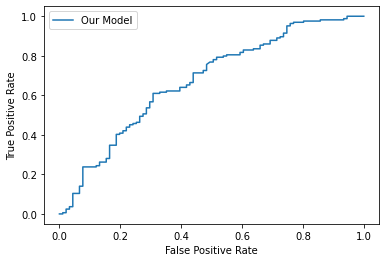

3
554
1582
554
255
y_train dataset shape Counter({1: 933, 0: 649})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 1582
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 79
n_resources: 20
Fitting 5 folds for each of 79 candidates, totalling 395 fits
----------
iter: 1
n_candidates: 40
n_resources: 40
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 20
n_resources: 80
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 3
n_candidates: 10
n_resources: 160
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 5
n_resources: 320
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 3
n_resources: 640
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 2
n_resources: 1280
F

/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.705417
[[62 29]
 [84 80]]
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        91
           1       0.73      0.49      0.59       164

    accuracy                           0.56       255
   macro avg       0.58      0.58      0.55       255
weighted avg       0.62      0.56      0.56       255

balanced_accuracy_score  0.5845617796837309
matthews_corrcoef  0.16377856196254484
Sensitivity 0.6813186813186813
Specificity 0.4878048780487805
f1 0.5860805860805861
LR+ 1.3301936159079015
ppv 0.7339449541284404
average_precision_score 0.7307126995157114
roc_auc_score 0.6316001072098633


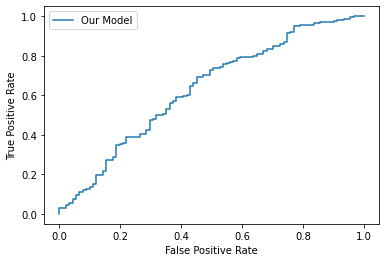

5
554
602
554
255
y_train dataset shape Counter({0: 399, 1: 203})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 602
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 30
n_resources: 20
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 15
n_resources: 40
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 2
n_candidates: 8
n_resources: 80
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 4
n_resources: 160
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.648368
[[ 88   3]
 [159   5]]
              precision    recall  f1-score   support

           0       0.36      0.97      0.52        91
           1       0.62      0.03      0.06       164

    accuracy                           0.36       255
   macro avg       0.49      0.50      0.29       255
weighted avg       0.53      0.36      0.22       255

balanced_accuracy_score  0.4987603859555079
matthews_corrcoef  -0.00681342741681289
Sensitivity 0.967032967032967
Specificity 0.03048780487804878
f1 0.05813953488372093
LR+ 0.9974428087635635
ppv 0.625
average_precision_score 0.6820943793539322
roc_auc_score 0.5583623693379791


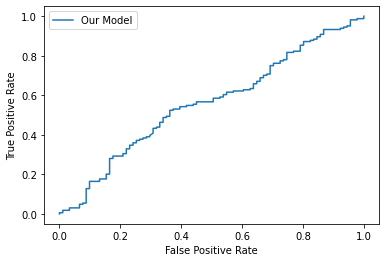

6
554
738
554
255
y_train dataset shape Counter({1: 410, 0: 328})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 738
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 36
n_resources: 20
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 18
n_resources: 40
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 9
n_resources: 80
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 5
n_resources: 160
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 320
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.632511
[[ 81  10]
 [151  13]]
              precision    recall  f1-score   support

           0       0.35      0.89      0.50        91
           1       0.57      0.08      0.14       164

    accuracy                           0.37       255
   macro avg       0.46      0.48      0.32       255
weighted avg       0.49      0.37      0.27       255

balanced_accuracy_score  0.4846890913964084
matthews_corrcoef  -0.051211284538746384
Sensitivity 0.8901098901098901
Specificity 0.07926829268292683
f1 0.13903743315508021
LR+ 0.9667418674041189
ppv 0.5652173913043478
average_precision_score 0.6452315247789486
roc_auc_score 0.5083757705708926


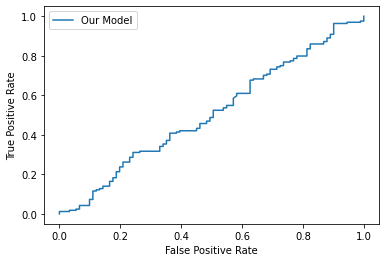

7
554
2750
554
255
y_train dataset shape Counter({1: 2112, 0: 638})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 20
max_resources_: 2750
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 137
n_resources: 20
Fitting 5 folds for each of 137 candidates, totalling 685 fits
----------
iter: 1
n_candidates: 69
n_resources: 40
Fitting 5 folds for each of 69 candidates, totalling 345 fits
----------
iter: 2
n_candidates: 35
n_resources: 80
Fitting 5 folds for each of 35 candidates, totalling 175 fits
----------
iter: 3
n_candidates: 18
n_resources: 160
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 4
n_candidates: 9
n_resources: 320
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 5
n_candidates: 5
n_resources: 640
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 6
n_candidates: 3
n_resources: 128

/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.634040
[[ 43  48]
 [ 38 126]]
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        91
           1       0.72      0.77      0.75       164

    accuracy                           0.66       255
   macro avg       0.63      0.62      0.62       255
weighted avg       0.66      0.66      0.66       255

balanced_accuracy_score  0.6204100777271508
matthews_corrcoef  0.24780970974173855
Sensitivity 0.4725274725274725
Specificity 0.7682926829268293
f1 0.7455621301775147
LR+ 2.039329091960671
ppv 0.7241379310344828
average_precision_score 0.7739679503166623
roc_auc_score 0.6687885285446261


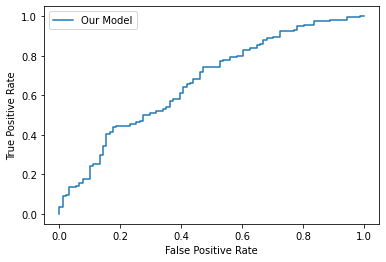

8
554
1230
554
255
y_train dataset shape Counter({0: 764, 1: 466})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 1230
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 61
n_resources: 20
Fitting 5 folds for each of 61 candidates, totalling 305 fits
----------
iter: 1
n_candidates: 31
n_resources: 40
Fitting 5 folds for each of 31 candidates, totalling 155 fits
----------
iter: 2
n_candidates: 16
n_resources: 80
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 3
n_candidates: 8
n_resources: 160
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 4
n_resources: 320
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.648368
[[ 81  10]
 [130  34]]
              precision    recall  f1-score   support

           0       0.38      0.89      0.54        91
           1       0.77      0.21      0.33       164

    accuracy                           0.45       255
   macro avg       0.58      0.55      0.43       255
weighted avg       0.63      0.45      0.40       255

balanced_accuracy_score  0.5487134816403109
matthews_corrcoef  0.12352481736547026
Sensitivity 0.8901098901098901
Specificity 0.2073170731707317
f1 0.3269230769230769
LR+ 1.1229078613693997
ppv 0.7727272727272727
average_precision_score 0.7513783224571646
roc_auc_score 0.621415170195658


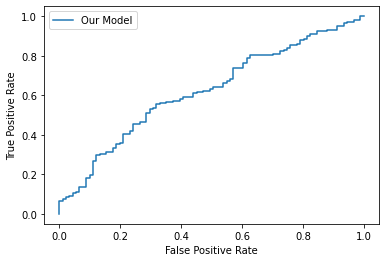

10
554
143
554
255
y_train dataset shape Counter({0: 72, 1: 71})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 143
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 7
n_resources: 20
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 1
n_candidates: 4
n_resources: 40
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 80
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.632511
[[ 75  16]
 [118  46]]
              precision    recall  f1-score   support

           0       0.39      0.82      0.53        91
           1       0.74      0.28      0.41       164

    accuracy                           0.47       255
   macro avg       0.57      0.55      0.47       255
weighted avg       0.62      0.47      0.45       255

balanced_accuracy_score  0.5523318145269365
matthews_corrcoef  0.11688638039548495
Sensitivity 0.8241758241758241
Specificity 0.2804878048780488
f1 0.40707964601769914
LR+ 1.1454647047867386
ppv 0.7419354838709677
average_precision_score 0.7351798135634791
roc_auc_score 0.6244974537657466


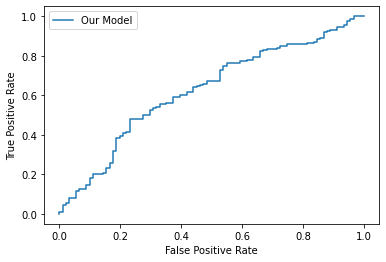

11
554
556
554
255
y_train dataset shape Counter({1: 286, 0: 270})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 556
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 20
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 40
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 80
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 160
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.687057
[[ 82   9]
 [136  28]]
              precision    recall  f1-score   support

           0       0.38      0.90      0.53        91
           1       0.76      0.17      0.28       164

    accuracy                           0.43       255
   macro avg       0.57      0.54      0.40       255
weighted avg       0.62      0.43      0.37       255

balanced_accuracy_score  0.5359153042079872
matthews_corrcoef  0.09770640998260613
Sensitivity 0.9010989010989011
Specificity 0.17073170731707318
f1 0.27860696517412936
LR+ 1.0866192630898515
ppv 0.7567567567567568
average_precision_score 0.7400031673022631
roc_auc_score 0.6317341195389976


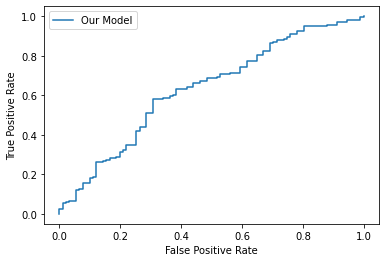

14
554
763
554
255
y_train dataset shape Counter({0: 409, 1: 354})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 763
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 38
n_resources: 20
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 1
n_candidates: 19
n_resources: 40
Fitting 5 folds for each of 19 candidates, totalling 95 fits
----------
iter: 2
n_candidates: 10
n_resources: 80
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 5
n_resources: 160
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 320
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.664658
[[ 70  21]
 [106  58]]
              precision    recall  f1-score   support

           0       0.40      0.77      0.52        91
           1       0.73      0.35      0.48       164

    accuracy                           0.50       255
   macro avg       0.57      0.56      0.50       255
weighted avg       0.61      0.50      0.49       255

balanced_accuracy_score  0.5614446529080676
matthews_corrcoef  0.127317127497328
Sensitivity 0.7692307692307693
Specificity 0.35365853658536583
f1 0.47736625514403286
LR+ 1.1901306240928882
ppv 0.7341772151898734
average_precision_score 0.7281253485509622
roc_auc_score 0.598030018761726


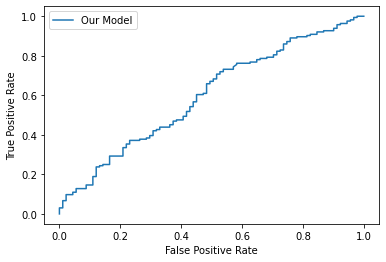

15
554
6111
554
255
y_train dataset shape Counter({0: 5237, 1: 874})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 20
max_resources_: 6111
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 305
n_resources: 20
Fitting 5 folds for each of 305 candidates, totalling 1525 fits
----------
iter: 1
n_candidates: 153
n_resources: 40
Fitting 5 folds for each of 153 candidates, totalling 765 fits
----------
iter: 2
n_candidates: 77
n_resources: 80
Fitting 5 folds for each of 77 candidates, totalling 385 fits
----------
iter: 3
n_candidates: 39
n_resources: 160
Fitting 5 folds for each of 39 candidates, totalling 195 fits
----------
iter: 4
n_candidates: 20
n_resources: 320
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 5
n_candidates: 10
n_resources: 640
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 6
n_candidates: 5
n_reso

/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.637165
[[ 89   2]
 [161   3]]
              precision    recall  f1-score   support

           0       0.36      0.98      0.52        91
           1       0.60      0.02      0.04       164

    accuracy                           0.36       255
   macro avg       0.48      0.50      0.28       255
weighted avg       0.51      0.36      0.21       255

balanced_accuracy_score  0.49815733047440364
matthews_corrcoef  -0.012734006370835506
Sensitivity 0.978021978021978
Specificity 0.018292682926829267
f1 0.03550295857988166
LR+ 0.9962459900348098
ppv 0.6
average_precision_score 0.7166816199137374
roc_auc_score 0.6076789064593944


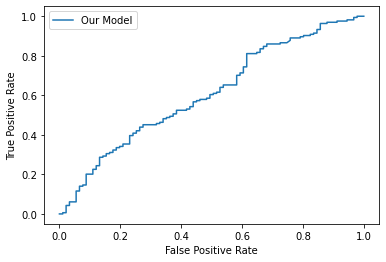

16
554
502
554
255
y_train dataset shape Counter({0: 384, 1: 118})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 502
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 25
n_resources: 20
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 1
n_candidates: 13
n_resources: 40
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 2
n_candidates: 7
n_resources: 80
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 160
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_4915/822316123.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.628551
[[ 89   2]
 [160   4]]
              precision    recall  f1-score   support

           0       0.36      0.98      0.52        91
           1       0.67      0.02      0.05       164

    accuracy                           0.36       255
   macro avg       0.51      0.50      0.29       255
weighted avg       0.56      0.36      0.22       255

balanced_accuracy_score  0.5012061109622085
matthews_corrcoef  0.007624029741811427
Sensitivity 0.978021978021978
Specificity 0.024390243902439025
f1 0.047058823529411764
LR+ 1.0024725274725275
ppv 0.6666666666666666
average_precision_score 0.6181837744167391
roc_auc_score 0.44572500670061643


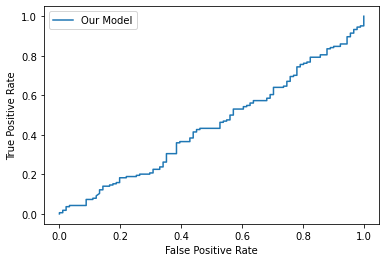

In [33]:
#built on individual Liv models, Predict DILI ext test set with models built on individual Liv datasets


for i in train_data.Source_rank.unique():
    print(i)
    
    df_subset = train_data[train_data["Source_rank"]==i]
    
    if(len(df_subset.TOXICITY.unique())<2):
        continue
    
    y_train = np.array(df_subset['TOXICITY'])
    features= df_subset.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

    feature_list = list(features.columns)
    X_train = np.array(features)
    
    print(len(X_train[0]))
    print(len(y_train))
    print(len(X_heldouttest[0]))
    print(len(y_heldouttest))
    
    print('y_train dataset shape %s' % Counter(y_train))
    print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))
          
    
    #Hyperparameter Optimisation
    rf = RandomForestClassifier(n_jobs=-1, random_state=42)
    # Instantiate the RandomHalving search model
    param_dist_grid = { 
            'max_depth': randint(5, 20),
            'max_features': randint(30, 50),
            'min_samples_leaf': randint(5, 15),
            'min_samples_split': randint(5, 15),
            'n_estimators':[200, 300, 400, 500, 600],
            'bootstrap': [True, False],
            'oob_score': [False],
            'random_state': [42],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [30],
            'class_weight' : [None, 'balanced_subsample', 'balanced']}

    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)    
    rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=42, n_jobs=30, verbose=1, cv = inner_cv)
    rsh.fit(X_train, y_train)
    classifier = rsh.best_estimator_
    classifier.fit(X_train, y_train)
    pickle.dump(classifier, open(f"bestlivmodel_{i}_model.sav",  'wb'))
    
    #Add predictions to held out test set dili
    y_proba = classifier.predict_proba(X_heldouttest)[:,1]
    test_data_heldouttest[i]=y_proba
    
    #Add predictions to NCV compounds  dili
    y_proba = classifier.predict_proba(X_ncv)[:,1]
    test_data_ncv[i]=y_proba
    
    #Find best threshold using NCV DIlI compounds
    cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
    # get the best threshold
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
    #Comapre for held out test set
    y_proba = classifier.predict_proba(X_heldouttest)[:,1]
    y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

    conf_matrix = confusion_matrix(y_heldouttest, y_pred)
    print(conf_matrix)
    print(classification_report(y_heldouttest, y_pred))
    print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
    print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    # Specificity or true negative rate
    Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
    f1= metrics.f1_score(y_heldouttest, y_pred)
    pos_LR = Sensitivity / (1 - Specificity) 
    ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')
    
    print("Sensitivity", Sensitivity)
    print("Specificity", Specificity)
    print("f1", f1)
    print("LR+", pos_LR)
    print("ppv", ppv)
       
    print("average_precision_score", metrics.average_precision_score(y_heldouttest, y_proba))
    
    print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba)) 
    # calculate roc curves
    best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
    # plot the roc curve for the model
    plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()  


In [34]:
test_data_ncv

smiles_r  TOXICITY  \
0           CCN1CC(CCN2CCOCC2)C(c2ccccc2)(c2ccccc2)C1=O         0   
1          COC1=CC(=O)CC(C)C12Oc1c(Cl)c(OC)cc(OC)c1C2=O         1   
2     NC1=NC(=O)C2C(=N1)NCC(CNc1ccc(C(=O)NC(CCC(=O)O...         0   
3                                  CC(=O)OCC[N+](C)(C)C         0   
4                                   S=C=Nc1cccc2ccccc12         1   
...                                                 ...       ...   
1015  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1016        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1017  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1018    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1019        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                              Source  Data        ABC  \
0               1  DILIst Classification  Intravenous  DILI  21.742822   
1               1         DILIst Classification  Oral  DILI  18.435306   
2               1         DILIst Classification  Oral  DILI  25.978932   
3               1         DILIst Classification  Oral  DILI   7.059496   
4               1             DILIst Classification    DILI   9.818615   
...           ...                                 ...   ...        ...   
1015            1         DILIst Classification  Oral  DILI  22.443398   
1016            1         DILIst Classification  Oral  DILI  18.078987   
1017            1         DILIst Classification  Oral  DILI  19.965399   
1018            1         DILIst Classification  Oral  DILI  18.677154   
1019            1             DILIst Classification    DILI  18.627175   

          ABCGG  nAcid  nBase  nAromAtom  ...         3         5         6  \
0     17.855679    0.0    1.0       12.0  ...  0.606698  0.211150  0.450238   
1     16.344872    0.0    0.0        6.0  ...  0.860303  0.728112  0.488938   
2     19.598907    2.0    4.0        6.0  ...  0.844776  0.094466  0.110516   
3      7.051645    0.0    1.0        0.0  ...  0.220813  0.130499  0.450693   
4      8.499990    0.0    0.0       10.0  ...  0.488944  0.393516  0.668888   
...         ...    ...    ...        ...  ...       ...       ...       ...   
1015  19.431962    0.0    1.0       12.0  ...  0.800188  0.243600  0.556210   
1016  16.178618    0.0    1.0        6.0  ...  0.355955  0.287075  0.571990   
1017  16.107023    0.0    0.0       15.0  ...  0.798359  0.579613  0.629839   
1018  17.017495    0.0    0.0        6.0  ...  0.880790  0.789385  0.583781   
1019  16.364961    0.0    1.0        6.0  ...  0.226861  0.259857  0.617057   

             7         8        10        11        14        15        16  
0     0.716878  0.445016  0.261905  0.429689  0.747660  0.043213  0.176512  
1     0.910111  0.491730  0.492356  0.531632  0.611083  0.141540  0.140882  
2     0.639452  0.475542  0.715021  0.461749  0.004942  0.009650  0.102408  
3     0.579509  0.462187  0.175666  0.331955  0.019073  0.000200  0.509107  
4     0.951181  0.560553  0.328466  0.699450  0.519308  0.155451  0.365166  
...        ...       ...       ...       ...       ...       ...       ...  
1015  0.779421  0.329983  0.444541  0.269732  0.187868  0.269013  0.153335  
1016  0.595370  0.449674  0.260887  0.255957  0.460429  0.046247  0.079296  
1017  0.831726  0.628673  0.566578  0.768182  0.653589  0.089000  0.254789  
1018  0.914036  0.563791  0.544296  0.433799  0.824570  0.268013  0.117781  
1019  0.520632  0.305643  0.230568  0.234973  0.612908  0.059007  0.145803  

[1020 rows x 572 columns]

In [35]:
test_data_heldouttest

smiles_r  TOXICITY  Source_rank  \
0                            CC(C)NCC(O)c1cc(O)cc(O)c1         0           13   
1              Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1         0            1   
2    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...         0           13   
3    CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...         1            1   
4    CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO         1            1   
..                                                 ...       ...          ...   
250                               NCC(O)c1ccc(O)c(O)c1         0            1   
251  Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...         1            1   
252                        COc1cc(NC(C)CCCN)c2ncccc2c1         0            1   
253                     CC12CCC3c4ccc(O)cc4CCC3C1CCC2O         1            1   
254  O=C1NCN(c2ccccc2)C12CCN(CCCC(c1ccc(F)cc1)c1ccc...         1            1   

                                    Source  Data        ABC      ABCGG  nAcid  \
0    DILIrank dataset CP Overlap REpsilber  DILI  11.113111  10.148350    0.0   
1           DILIst Classification  Topical  DILI  18.632065  15.271464    0.0   
2    DILIrank dataset CP Overlap REpsilber  DILI  18.334980  14.848566    0.0   
3              DILIst Classification  Oral  DILI  24.305499  20.006308    3.0   
4              DILIst Classification  Oral  DILI  20.848529  17.255118    0.0   
..                                     ...   ...        ...        ...    ...   
250     DILIst Classification  Intravenous  DILI   8.732571   8.336098    0.0   
251     DILIst Classification  Intravenous  DILI  22.891285  18.445302    3.0   
252            DILIst Classification  Oral  DILI  14.170645  11.989242    0.0   
253            DILIst Classification  Oral  DILI  16.356175  12.977056    0.0   
254   DILIst Classification  Intramuscular  DILI  27.660794  20.253545    0.0   

     nBase  nAromAtom  ...         3         5         6         7         8  \
0      1.0        6.0  ...  0.499094  0.220350  0.288708  0.542275  0.332715   
1      0.0       17.0  ...  0.567809  0.641096  0.778160  0.855955  0.505657   
2      0.0        0.0  ...  0.551261  0.096629  0.422820  0.430636  0.462722   
3      0.0       17.0  ...  0.830028  0.145256  0.509965  0.764704  0.527018   
4      0.0        0.0  ...  0.457768  0.067164  0.343394  0.271960  0.350366   
..     ...        ...  ...       ...       ...       ...       ...       ...   
250    1.0        6.0  ...  0.232796  0.167329  0.308276  0.419450  0.340450   
251    0.0       10.0  ...  0.893730  0.202307  0.302222  0.808419  0.790964   
252    1.0       10.0  ...  0.576872  0.524835  0.492122  0.661294  0.469878   
253    0.0        6.0  ...  0.412044  0.114721  0.517276  0.566964  0.407130   
254    1.0       18.0  ...  0.831248  0.196876  0.499080  0.690908  0.371438   

           10        11        14        15        16  
0    0.294181  0.253750  0.026997  0.067801  0.104456  
1    0.479769  0.507222  0.891707  0.306721  0.170294  
2    0.542910  0.414408  0.297146  0.188203  0.155574  
3    0.774434  0.589813  0.968304  0.250082  0.064662  
4    0.479720  0.266352  0.689398  0.042730  0.060388  
..        ...       ...       ...       ...       ...  
250  0.292893  0.395543  0.025085  0.025500  0.085091  
251  0.847622  0.647285  0.126679  0.041102  0.198911  
252  0.241885  0.503785  0.541935  0.058628  0.090357  
253  0.443519  0.296656  0.553984  0.306289  0.103064  
254  0.483333  0.460608  0.914541  0.301495  0.176151  

[255 rows x 572 columns]

In [36]:
test_data_ncv.to_csv("test_data_ncv_DILIst_1020_livpreds.csv", index=False)

In [37]:
test_data_heldouttest.to_csv("test_data_heldouttest_DILIst_255_livpreds.csv", index=False)

In [38]:
#Models to predict DILI with All : Mordred, Morgan, Physicochemical and Liv preds

In [39]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [40]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [41]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0                             CC(C)NCC(O)c1cc(O)cc(O)c1         0   
1               Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1         0   
2     C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...         0   
3     CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...         1   
4     CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO         1   
...                                                 ...       ...   
1270  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1271        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1272  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1273    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1274        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                                 Source  Data        ABC  \
0              13  DILIrank dataset CP Overlap REpsilber  DILI  11.113111   
1               1         DILIst Classification  Topical  DILI  18.632065   
2              13  DILIrank dataset CP Overlap REpsilber  DILI  18.334980   
3               1            DILIst Classification  Oral  DILI  24.305499   
4               1            DILIst Classification  Oral  DILI  20.848529   
...           ...                                    ...   ...        ...   
1270            1            DILIst Classification  Oral  DILI  22.443398   
1271            1            DILIst Classification  Oral  DILI  18.078987   
1272            1            DILIst Classification  Oral  DILI  19.965399   
1273            1            DILIst Classification  Oral  DILI  18.677154   
1274            1                DILIst Classification    DILI  18.627175   

          ABCGG  nAcid  nBase  nAromAtom  ...         3         5         6  \
0     10.148350    0.0    1.0        6.0  ...  0.499094  0.220350  0.288708   
1     15.271464    0.0    0.0       17.0  ...  0.567809  0.641096  0.778160   
2     14.848566    0.0    0.0        0.0  ...  0.551261  0.096629  0.422820   
3     20.006308    3.0    0.0       17.0  ...  0.830028  0.145256  0.509965   
4     17.255118    0.0    0.0        0.0  ...  0.457768  0.067164  0.343394   
...         ...    ...    ...        ...  ...       ...       ...       ...   
1270  19.431962    0.0    1.0       12.0  ...  0.800188  0.243600  0.556210   
1271  16.178618    0.0    1.0        6.0  ...  0.355955  0.287075  0.571990   
1272  16.107023    0.0    0.0       15.0  ...  0.798359  0.579613  0.629839   
1273  17.017495    0.0    0.0        6.0  ...  0.880790  0.789385  0.583781   
1274  16.364961    0.0    1.0        6.0  ...  0.226861  0.259857  0.617057   

             7         8        10        11        14        15        16  
0     0.542275  0.332715  0.294181  0.253750  0.026997  0.067801  0.104456  
1     0.855955  0.505657  0.479769  0.507222  0.891707  0.306721  0.170294  
2     0.430636  0.462722  0.542910  0.414408  0.297146  0.188203  0.155574  
3     0.764704  0.527018  0.774434  0.589813  0.968304  0.250082  0.064662  
4     0.271960  0.350366  0.479720  0.266352  0.689398  0.042730  0.060388  
...        ...       ...       ...       ...       ...       ...       ...  
1270  0.779421  0.329983  0.444541  0.269732  0.187868  0.269013  0.153335  
1271  0.595370  0.449674  0.260887  0.255957  0.460429  0.046247  0.079296  
1272  0.831726  0.628673  0.566578  0.768182  0.653589  0.089000  0.254789  
1273  0.914036  0.563791  0.544296  0.433799  0.824570  0.268013  0.117781  
1274  0.520632  0.305643  0.230568  0.234973  0.612908  0.059007  0.145803  

[1275 rows x 572 columns]

In [42]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [43]:
test_feature_list = list(test_feature_list)
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 'nBondsKD',
 'C1SP2',
 'C2SP2',
 'C3SP2',
 'C1SP3',
 'C2SP3',


In [44]:
len(test_feature_list)

567

In [45]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(1020, 567)
(255, 567)
1020
255


In [46]:
print(len(y_dili))
print(X_dili.shape)

1275
(1275, 567)


In [47]:

from tqdm import tqdm
from sklearn.model_selection import KFold
import pickle

  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.644678
[[52 23]
 [50 79]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        75
           1       0.77      0.61      0.68       129

    accuracy                           0.64       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.68      0.64      0.65       204

balanced_accuracy_score  0.6528682170542636
matthews_corrcoef  0.29483056930970236
Sensitivity 0.6933333333333334
Specificity 0.6124031007751938
f1 0.6839826839826839
LR+ 1.7888
ppv 0.7745098039215687
average_precision_score 0.7965116580222298
roc_auc_score 0.6941085271317831


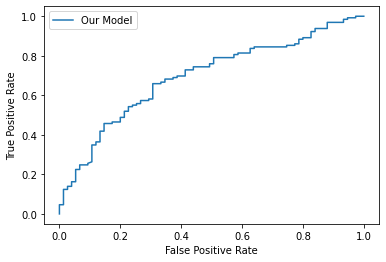

saving model


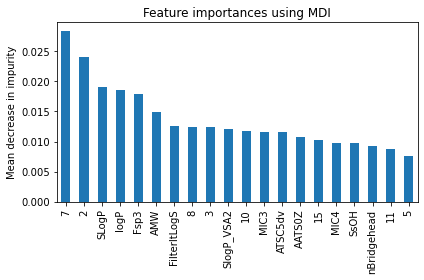

1
Best Threshold=0.631926
[[46 22]
 [39 97]]
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        68
           1       0.82      0.71      0.76       136

    accuracy                           0.70       204
   macro avg       0.68      0.69      0.68       204
weighted avg       0.72      0.70      0.71       204

balanced_accuracy_score  0.6948529411764706
matthews_corrcoef  0.37263009585131096
Sensitivity 0.6764705882352942
Specificity 0.7132352941176471
f1 0.7607843137254903
LR+ 2.3589743589743595
ppv 0.8151260504201681
average_precision_score 0.8445973574330772
roc_auc_score 0.7307525951557093


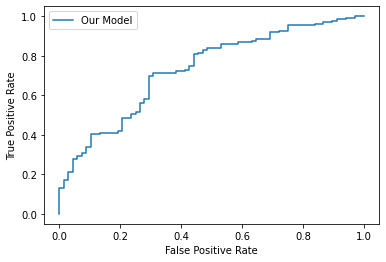

saving model


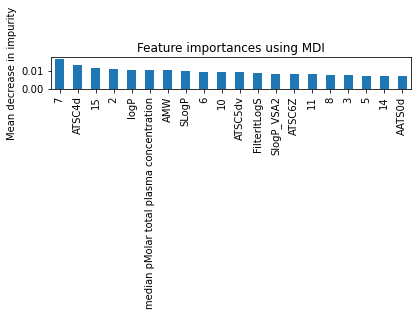

2
Best Threshold=0.614742
[[62 14]
 [57 71]]
              precision    recall  f1-score   support

           0       0.52      0.82      0.64        76
           1       0.84      0.55      0.67       128

    accuracy                           0.65       204
   macro avg       0.68      0.69      0.65       204
weighted avg       0.72      0.65      0.66       204

balanced_accuracy_score  0.6852384868421053
matthews_corrcoef  0.36332062933344167
Sensitivity 0.8157894736842105
Specificity 0.5546875
f1 0.6666666666666666
LR+ 1.8319482917820868
ppv 0.8352941176470589
average_precision_score 0.8419584813659753
roc_auc_score 0.7721011513157895


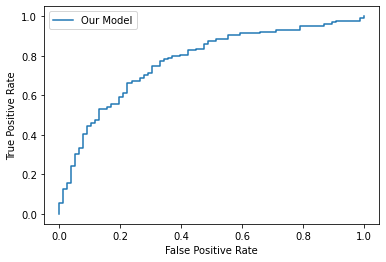

saving model


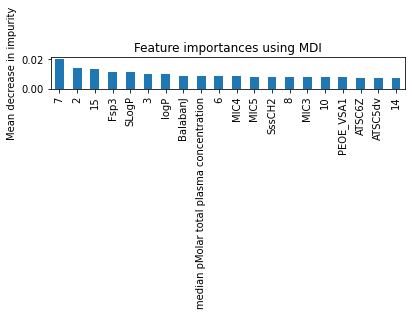

3
Best Threshold=0.648903
[[43 35]
 [43 83]]
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        78
           1       0.70      0.66      0.68       126

    accuracy                           0.62       204
   macro avg       0.60      0.61      0.60       204
weighted avg       0.63      0.62      0.62       204

balanced_accuracy_score  0.6050061050061051
matthews_corrcoef  0.20667449721504963
Sensitivity 0.5512820512820513
Specificity 0.6587301587301587
f1 0.680327868852459
LR+ 1.6153846153846154
ppv 0.7033898305084746
average_precision_score 0.7066933849332397
roc_auc_score 0.6315628815628815


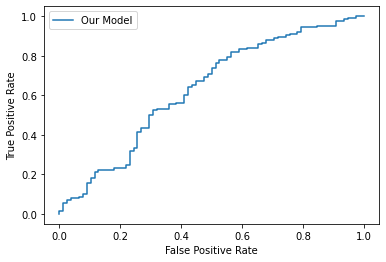

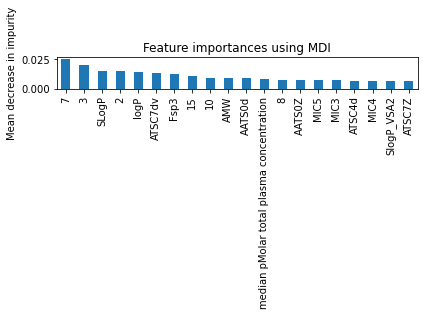

4
Best Threshold=0.608435
[[37 30]
 [43 94]]
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        67
           1       0.76      0.69      0.72       137

    accuracy                           0.64       204
   macro avg       0.61      0.62      0.61       204
weighted avg       0.66      0.64      0.65       204

balanced_accuracy_score  0.6191850964157316
matthews_corrcoef  0.22929458397758937
Sensitivity 0.5522388059701493
Specificity 0.6861313868613139
f1 0.7203065134099618
LR+ 1.759458521346755
ppv 0.7580645161290323
average_precision_score 0.827686123371834
roc_auc_score 0.7075934197625015


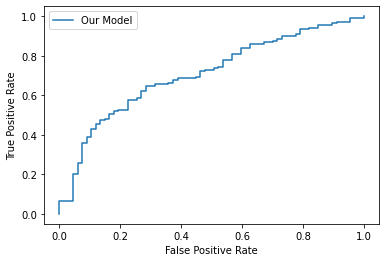

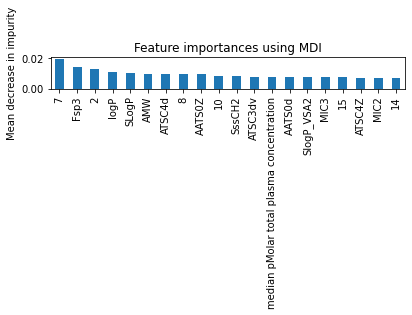

  9%|███▉                                       | 1/11 [02:34<25:44, 154.42s/it]

43
0
Best Threshold=0.600460
[[ 32  26]
 [ 43 103]]
              precision    recall  f1-score   support

           0       0.43      0.55      0.48        58
           1       0.80      0.71      0.75       146

    accuracy                           0.66       204
   macro avg       0.61      0.63      0.62       204
weighted avg       0.69      0.66      0.67       204

balanced_accuracy_score  0.6286017949929146
matthews_corrcoef  0.24062567431800774
Sensitivity 0.5517241379310345
Specificity 0.7054794520547946
f1 0.7490909090909091
LR+ 1.8732959101844429
ppv 0.7984496124031008
average_precision_score 0.8452100141546638
roc_auc_score 0.692017005196032


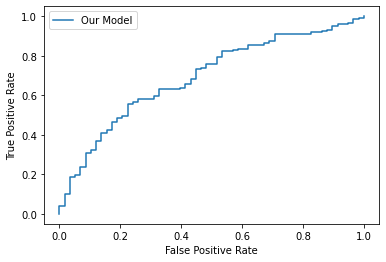

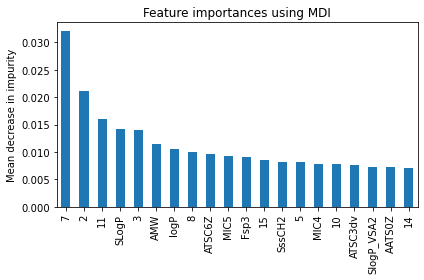

1
Best Threshold=0.633007
[[51 28]
 [35 90]]
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        79
           1       0.76      0.72      0.74       125

    accuracy                           0.69       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.70      0.69      0.69       204

balanced_accuracy_score  0.6827848101265823
matthews_corrcoef  0.3606188469975013
Sensitivity 0.6455696202531646
Specificity 0.72
f1 0.7407407407407408
LR+ 2.3056057866184445
ppv 0.7627118644067796
average_precision_score 0.819250660250171
roc_auc_score 0.7347848101265823


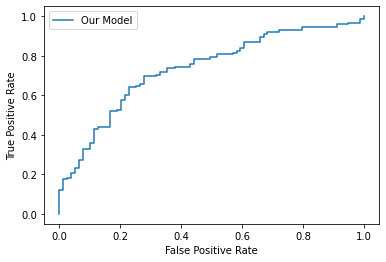

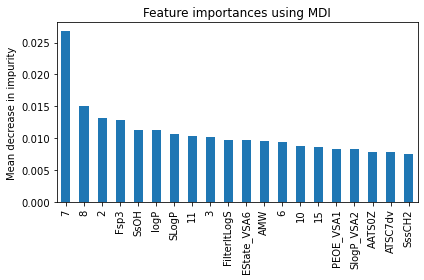

2
Best Threshold=0.656008
[[50 23]
 [47 84]]
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        73
           1       0.79      0.64      0.71       131

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.69      0.66      0.66       204

balanced_accuracy_score  0.6630764404475582
matthews_corrcoef  0.3130693423107579
Sensitivity 0.684931506849315
Specificity 0.6412213740458015
f1 0.7058823529411764
LR+ 1.909064412707665
ppv 0.7850467289719626
average_precision_score 0.8206842557598227
roc_auc_score 0.7240405730419325


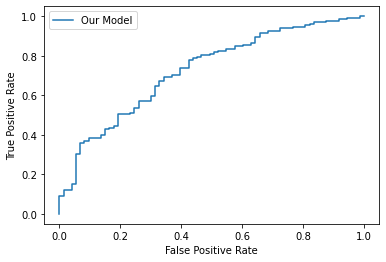

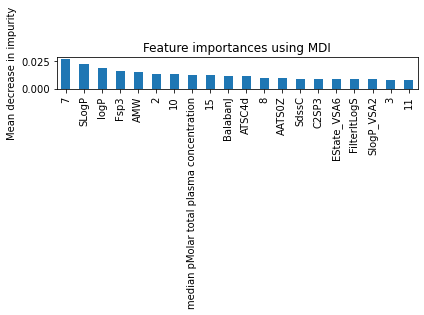

3
Best Threshold=0.525651
[[47 31]
 [42 84]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        78
           1       0.73      0.67      0.70       126

    accuracy                           0.64       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.65      0.64      0.65       204

balanced_accuracy_score  0.6346153846153846
matthews_corrcoef  0.26382341790733493
Sensitivity 0.6025641025641025
Specificity 0.6666666666666666
f1 0.6970954356846473
LR+ 1.8076923076923075
ppv 0.7304347826086957
average_precision_score 0.7479904494915178
roc_auc_score 0.6737891737891738


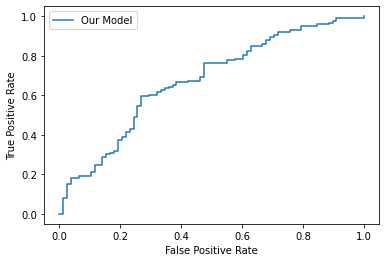

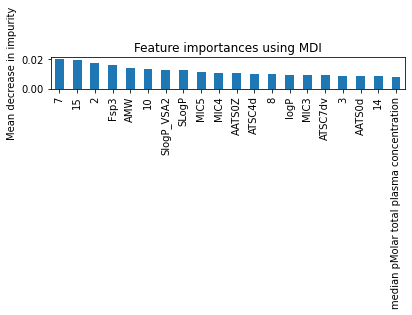

4
Best Threshold=0.624564
[[37 39]
 [31 97]]
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        76
           1       0.71      0.76      0.73       128

    accuracy                           0.66       204
   macro avg       0.63      0.62      0.62       204
weighted avg       0.65      0.66      0.65       204

balanced_accuracy_score  0.622327302631579
matthews_corrcoef  0.25092345892092693
Sensitivity 0.4868421052631579
Specificity 0.7578125
f1 0.7348484848484849
LR+ 2.0101867572156196
ppv 0.7132352941176471
average_precision_score 0.7569744986368412
roc_auc_score 0.6790707236842105


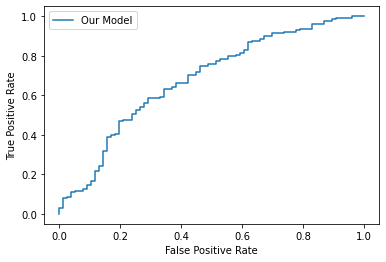

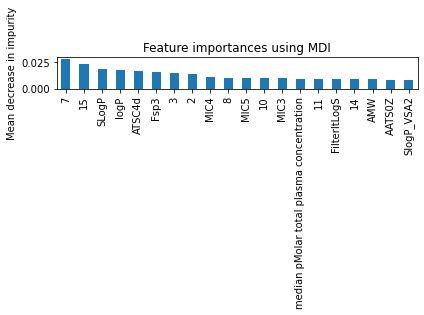

 18%|███████▊                                   | 2/11 [05:07<23:01, 153.51s/it]

44
0
Best Threshold=0.675564
[[53 28]
 [41 82]]
              precision    recall  f1-score   support

           0       0.56      0.65      0.61        81
           1       0.75      0.67      0.70       123

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.6604938271604939
matthews_corrcoef  0.3150816599993434
Sensitivity 0.654320987654321
Specificity 0.6666666666666666
f1 0.703862660944206
LR+ 1.9629629629629628
ppv 0.7454545454545455
average_precision_score 0.7659346702269858
roc_auc_score 0.6882465120947505


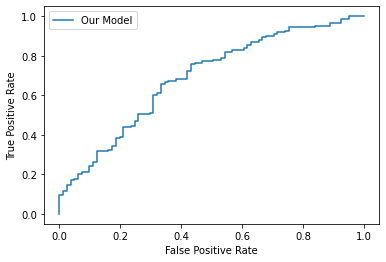

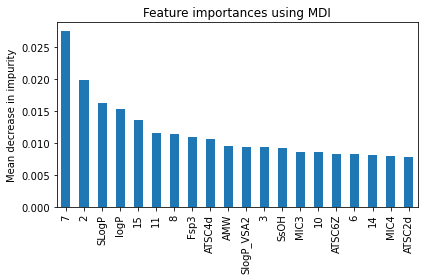

1
Best Threshold=0.655435
[[55 16]
 [52 81]]
              precision    recall  f1-score   support

           0       0.51      0.77      0.62        71
           1       0.84      0.61      0.70       133

    accuracy                           0.67       204
   macro avg       0.67      0.69      0.66       204
weighted avg       0.72      0.67      0.67       204

balanced_accuracy_score  0.6918352218574606
matthews_corrcoef  0.3659616552231476
Sensitivity 0.7746478873239436
Specificity 0.6090225563909775
f1 0.7043478260869566
LR+ 1.9813109425785482
ppv 0.8350515463917526
average_precision_score 0.8369263427665428
roc_auc_score 0.7568569310600444


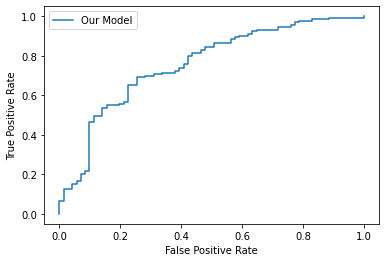

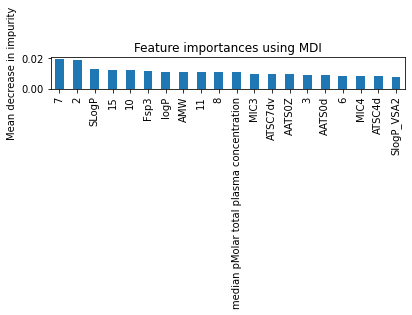

2
Best Threshold=0.654347
[[42 22]
 [47 93]]
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        64
           1       0.81      0.66      0.73       140

    accuracy                           0.66       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.70      0.66      0.67       204

balanced_accuracy_score  0.6602678571428571
matthews_corrcoef  0.2999069341769588
Sensitivity 0.65625
Specificity 0.6642857142857143
f1 0.7294117647058822
LR+ 1.954787234042553
ppv 0.808695652173913
average_precision_score 0.8113905217790971
roc_auc_score 0.7068080357142857


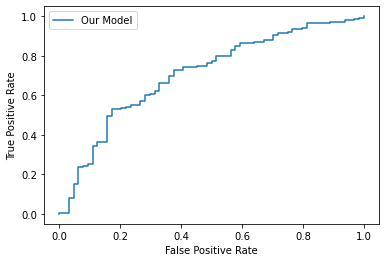

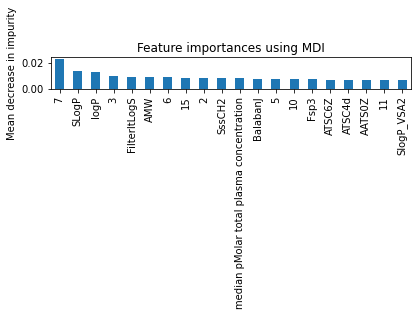

3
Best Threshold=0.673588
[[53 28]
 [50 73]]
              precision    recall  f1-score   support

           0       0.51      0.65      0.58        81
           1       0.72      0.59      0.65       123

    accuracy                           0.62       204
   macro avg       0.62      0.62      0.61       204
weighted avg       0.64      0.62      0.62       204

balanced_accuracy_score  0.6239084613068353
matthews_corrcoef  0.24251953425677192
Sensitivity 0.654320987654321
Specificity 0.5934959349593496
f1 0.6517857142857143
LR+ 1.6096296296296297
ppv 0.7227722772277227
average_precision_score 0.7221872108656697
roc_auc_score 0.6651610960554051


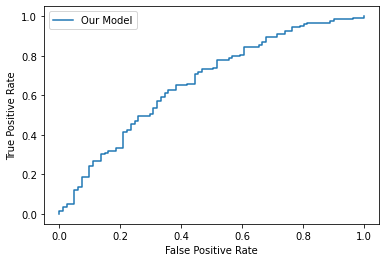

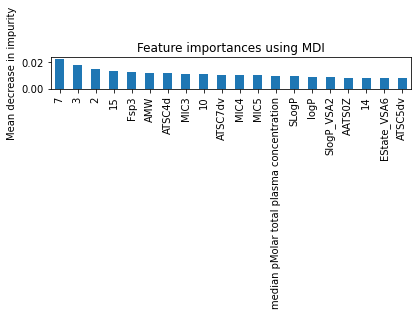

4
Best Threshold=0.599259
[[41 26]
 [39 98]]
              precision    recall  f1-score   support

           0       0.51      0.61      0.56        67
           1       0.79      0.72      0.75       137

    accuracy                           0.68       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.70      0.68      0.69       204

balanced_accuracy_score  0.6636343828303737
matthews_corrcoef  0.3148084690441858
Sensitivity 0.6119402985074627
Specificity 0.7153284671532847
f1 0.7509578544061303
LR+ 2.149636433218523
ppv 0.7903225806451613
average_precision_score 0.8582414052051306
roc_auc_score 0.7483930711406472


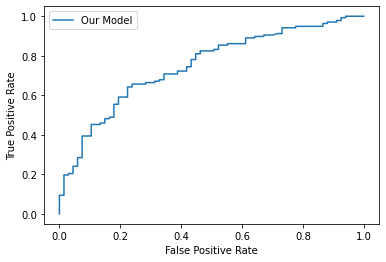

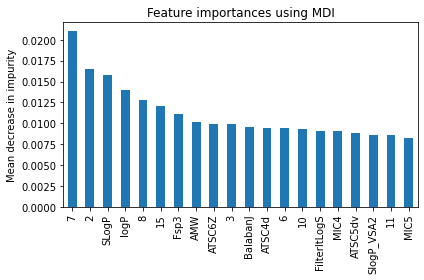

 27%|███████████▋                               | 3/11 [07:41<20:30, 153.87s/it]

45
0
Best Threshold=0.577971
[[51 30]
 [42 81]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        81
           1       0.73      0.66      0.69       123

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6440831074977417
matthews_corrcoef  0.2830969325517164
Sensitivity 0.6296296296296297
Specificity 0.6585365853658537
f1 0.6923076923076923
LR+ 1.8439153439153442
ppv 0.7297297297297297
average_precision_score 0.7126046517806657
roc_auc_score 0.6412727090233866


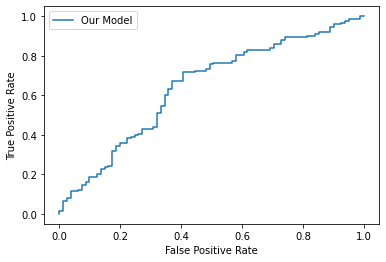

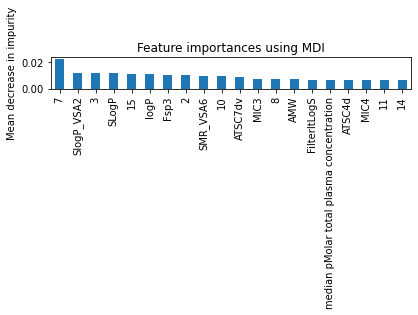

1
Best Threshold=0.631391
[[59 16]
 [51 78]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        75
           1       0.83      0.60      0.70       129

    accuracy                           0.67       204
   macro avg       0.68      0.70      0.67       204
weighted avg       0.72      0.67      0.68       204

balanced_accuracy_score  0.6956589147286821
matthews_corrcoef  0.3785252486443603
Sensitivity 0.7866666666666666
Specificity 0.6046511627906976
f1 0.6995515695067265
LR+ 1.9898039215686272
ppv 0.8297872340425532
average_precision_score 0.8285390520403024
roc_auc_score 0.7464599483204134


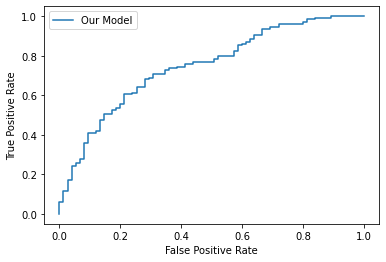

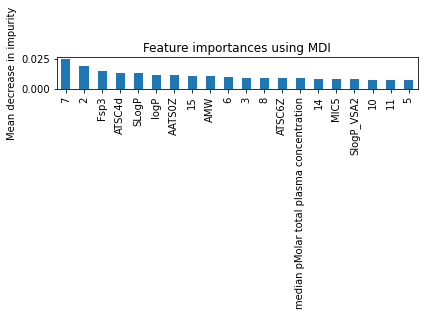

2
Best Threshold=0.645379
[[55 14]
 [43 92]]
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        69
           1       0.87      0.68      0.76       135

    accuracy                           0.72       204
   macro avg       0.71      0.74      0.71       204
weighted avg       0.76      0.72      0.73       204

balanced_accuracy_score  0.7392914653784219
matthews_corrcoef  0.453192447876914
Sensitivity 0.7971014492753623
Specificity 0.6814814814814815
f1 0.7634854771784232
LR+ 2.5025278058645095
ppv 0.8679245283018868
average_precision_score 0.868035460196309
roc_auc_score 0.7876543209876543


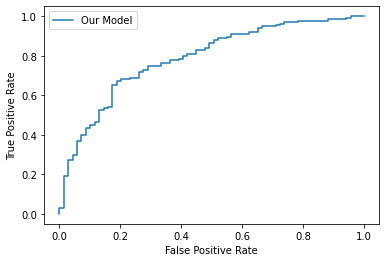

saving model


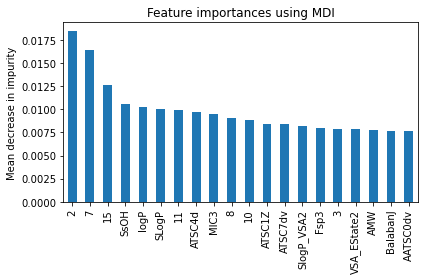

3
Best Threshold=0.608297
[[39 30]
 [44 91]]
              precision    recall  f1-score   support

           0       0.47      0.57      0.51        69
           1       0.75      0.67      0.71       135

    accuracy                           0.64       204
   macro avg       0.61      0.62      0.61       204
weighted avg       0.66      0.64      0.64       204

balanced_accuracy_score  0.6196457326892109
matthews_corrcoef  0.23045540987424645
Sensitivity 0.5652173913043478
Specificity 0.674074074074074
f1 0.7109375
LR+ 1.7341897233201577
ppv 0.7520661157024794
average_precision_score 0.8184546717588094
roc_auc_score 0.693719806763285


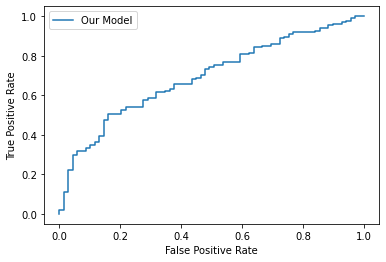

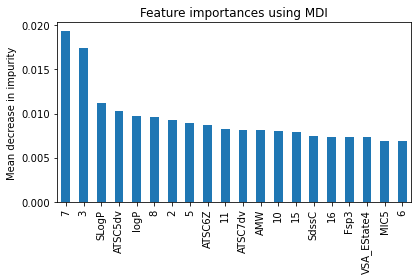

4
Best Threshold=0.583383
[[ 37  33]
 [ 28 106]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        70
           1       0.76      0.79      0.78       134

    accuracy                           0.70       204
   macro avg       0.67      0.66      0.66       204
weighted avg       0.70      0.70      0.70       204

balanced_accuracy_score  0.6598081023454158
matthews_corrcoef  0.32566128401325073
Sensitivity 0.5285714285714286
Specificity 0.7910447761194029
f1 0.7765567765567766
LR+ 2.5295918367346935
ppv 0.762589928057554
average_precision_score 0.8372788032106431
roc_auc_score 0.7486140724946695


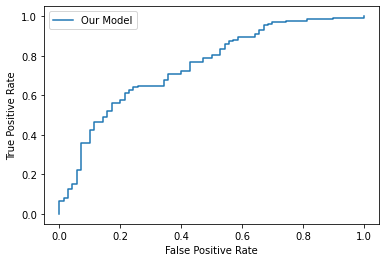

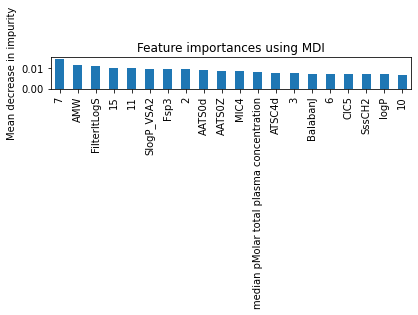

 36%|███████████████▋                           | 4/11 [10:06<17:32, 150.30s/it]

46
0
Best Threshold=0.600144
[[42 31]
 [35 96]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        73
           1       0.76      0.73      0.74       131

    accuracy                           0.68       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6540834466171703
matthews_corrcoef  0.30474447097929996
Sensitivity 0.5753424657534246
Specificity 0.732824427480916
f1 0.744186046511628
LR+ 2.1534246575342464
ppv 0.7559055118110236
average_precision_score 0.8049843882442533
roc_auc_score 0.7061591550768587


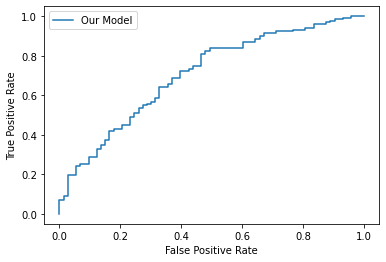

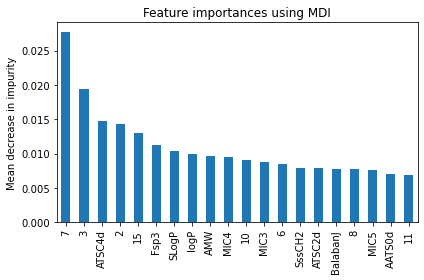

1
Best Threshold=0.625796
[[42 32]
 [33 97]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        74
           1       0.75      0.75      0.75       130

    accuracy                           0.68       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6568607068607069
matthews_corrcoef  0.3128284281991208
Sensitivity 0.5675675675675675
Specificity 0.7461538461538462
f1 0.749034749034749
LR+ 2.235872235872236
ppv 0.751937984496124
average_precision_score 0.8080447787152576
roc_auc_score 0.7363825363825365


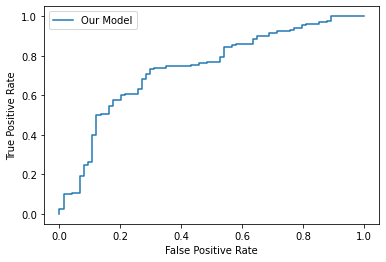

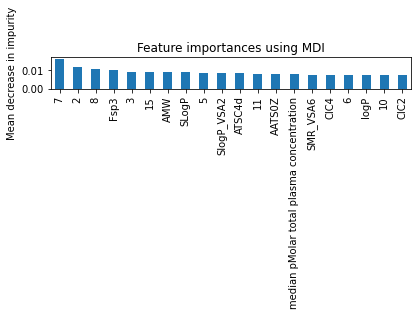

2
Best Threshold=0.630177
[[51 18]
 [48 87]]
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        69
           1       0.83      0.64      0.73       135

    accuracy                           0.68       204
   macro avg       0.67      0.69      0.67       204
weighted avg       0.72      0.68      0.69       204

balanced_accuracy_score  0.6917874396135266
matthews_corrcoef  0.3631025841633399
Sensitivity 0.7391304347826086
Specificity 0.6444444444444445
f1 0.7250000000000001
LR+ 2.078804347826087
ppv 0.8285714285714286
average_precision_score 0.8022725725648052
roc_auc_score 0.7133655394524959


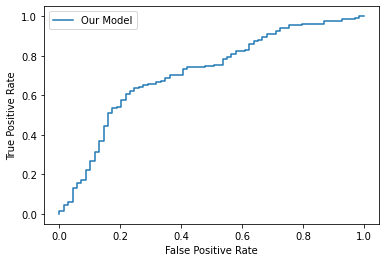

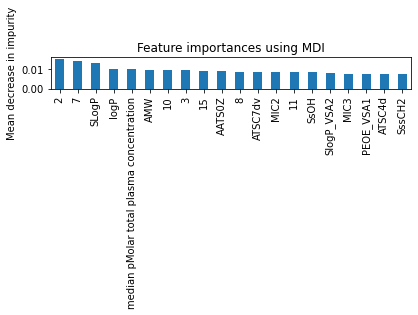

3
Best Threshold=0.645104
[[53 25]
 [37 89]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        78
           1       0.78      0.71      0.74       126

    accuracy                           0.70       204
   macro avg       0.68      0.69      0.69       204
weighted avg       0.71      0.70      0.70       204

balanced_accuracy_score  0.6929181929181929
matthews_corrcoef  0.3776261617527506
Sensitivity 0.6794871794871795
Specificity 0.7063492063492064
f1 0.7416666666666667
LR+ 2.3139293139293144
ppv 0.7807017543859649
average_precision_score 0.8408725076389779
roc_auc_score 0.7626678876678877


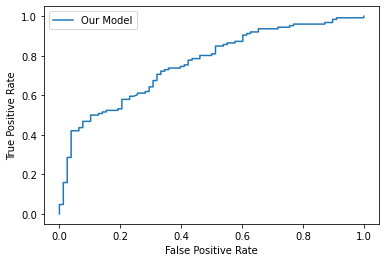

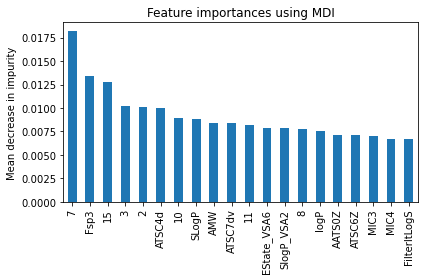

4
Best Threshold=0.613444
[[40 30]
 [49 85]]
              precision    recall  f1-score   support

           0       0.45      0.57      0.50        70
           1       0.74      0.63      0.68       134

    accuracy                           0.61       204
   macro avg       0.59      0.60      0.59       204
weighted avg       0.64      0.61      0.62       204

balanced_accuracy_score  0.6028784648187633
matthews_corrcoef  0.19697538877023393
Sensitivity 0.5714285714285714
Specificity 0.6343283582089553
f1 0.6827309236947792
LR+ 1.5626822157434404
ppv 0.7391304347826086
average_precision_score 0.7515340971559414
roc_auc_score 0.6406183368869937


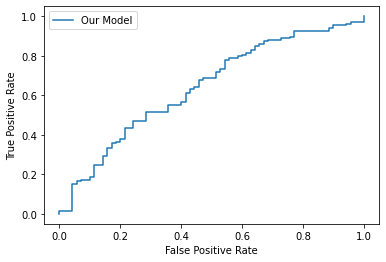

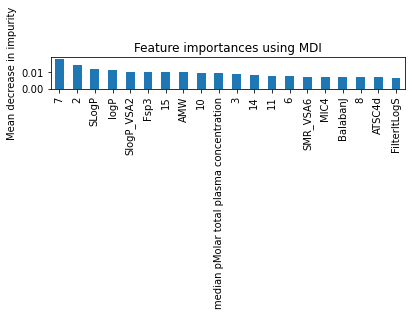

 45%|███████████████████▌                       | 5/11 [12:11<14:08, 141.33s/it]

47
0
Best Threshold=0.577352
[[52 22]
 [50 80]]
              precision    recall  f1-score   support

           0       0.51      0.70      0.59        74
           1       0.78      0.62      0.69       130

    accuracy                           0.65       204
   macro avg       0.65      0.66      0.64       204
weighted avg       0.68      0.65      0.65       204

balanced_accuracy_score  0.659043659043659
matthews_corrcoef  0.30586777135731963
Sensitivity 0.7027027027027027
Specificity 0.6153846153846154
f1 0.6896551724137931
LR+ 1.8270270270270272
ppv 0.7843137254901961
average_precision_score 0.8097832221638196
roc_auc_score 0.7256756756756757


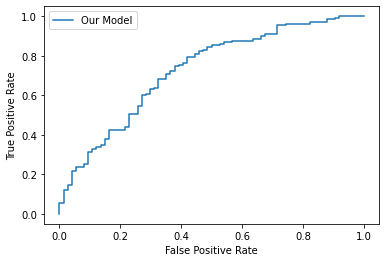

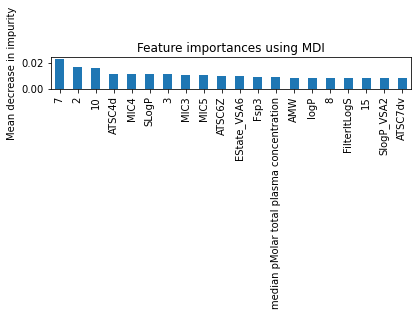

1
Best Threshold=0.630798
[[46 29]
 [37 92]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        75
           1       0.76      0.71      0.74       129

    accuracy                           0.68       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6632558139534883
matthews_corrcoef  0.32047370975113515
Sensitivity 0.6133333333333333
Specificity 0.7131782945736435
f1 0.736
LR+ 2.1383783783783787
ppv 0.7603305785123967
average_precision_score 0.7271371246452257
roc_auc_score 0.6590180878552973


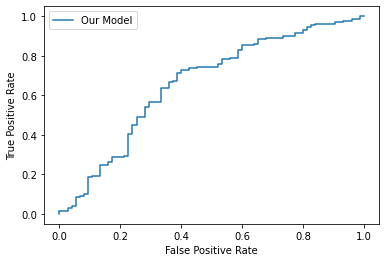

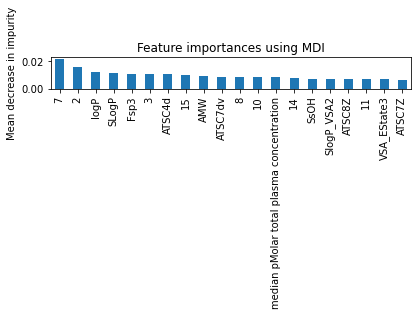

2
Best Threshold=0.654507
[[42 20]
 [63 79]]
              precision    recall  f1-score   support

           0       0.40      0.68      0.50        62
           1       0.80      0.56      0.66       142

    accuracy                           0.59       204
   macro avg       0.60      0.62      0.58       204
weighted avg       0.68      0.59      0.61       204

balanced_accuracy_score  0.6168786915038619
matthews_corrcoef  0.21512610130840795
Sensitivity 0.6774193548387096
Specificity 0.5563380281690141
f1 0.6556016597510375
LR+ 1.5268817204301075
ppv 0.797979797979798
average_precision_score 0.7904821253972337
roc_auc_score 0.647035438437074


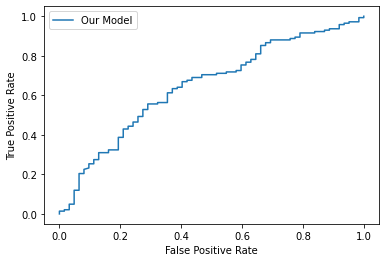

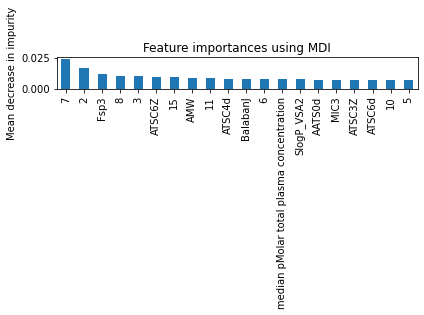

3
Best Threshold=0.610589
[[ 45  32]
 [ 26 101]]
              precision    recall  f1-score   support

           0       0.63      0.58      0.61        77
           1       0.76      0.80      0.78       127

    accuracy                           0.72       204
   macro avg       0.70      0.69      0.69       204
weighted avg       0.71      0.72      0.71       204

balanced_accuracy_score  0.6898455874833828
matthews_corrcoef  0.38638720033842333
Sensitivity 0.5844155844155844
Specificity 0.7952755905511811
f1 0.776923076923077
LR+ 2.854645354645355
ppv 0.7593984962406015
average_precision_score 0.8440392364322971
roc_auc_score 0.7619388485530217


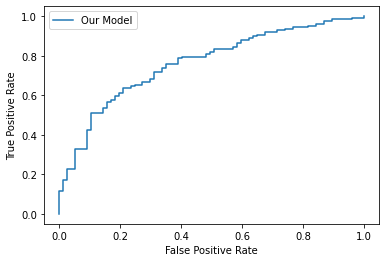

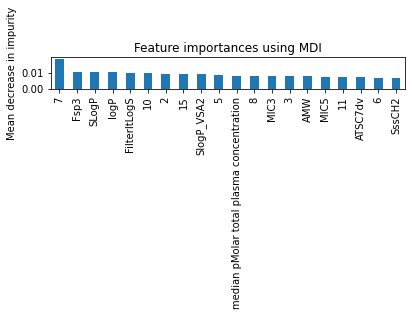

4
Best Threshold=0.674700
[[62 14]
 [44 84]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        76
           1       0.86      0.66      0.74       128

    accuracy                           0.72       204
   macro avg       0.72      0.74      0.71       204
weighted avg       0.76      0.72      0.72       204

balanced_accuracy_score  0.7360197368421053
matthews_corrcoef  0.4567979307671261
Sensitivity 0.8157894736842105
Specificity 0.65625
f1 0.743362831858407
LR+ 2.373205741626794
ppv 0.8571428571428571
average_precision_score 0.8439127862875468
roc_auc_score 0.7623355263157896


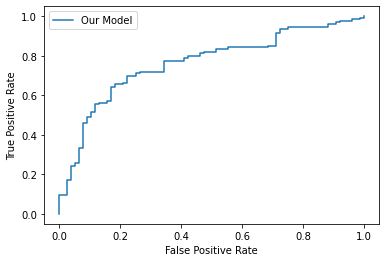

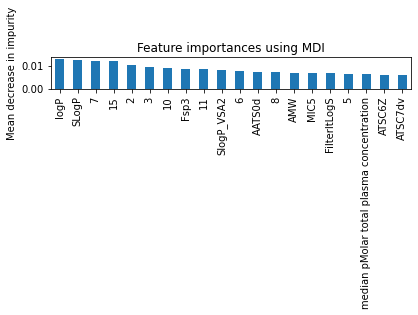

 55%|███████████████████████▍                   | 6/11 [14:57<12:28, 149.77s/it]

48
0
Best Threshold=0.516389
[[35 33]
 [41 95]]
              precision    recall  f1-score   support

           0       0.46      0.51      0.49        68
           1       0.74      0.70      0.72       136

    accuracy                           0.64       204
   macro avg       0.60      0.61      0.60       204
weighted avg       0.65      0.64      0.64       204

balanced_accuracy_score  0.6066176470588235
matthews_corrcoef  0.2079080088201966
Sensitivity 0.5147058823529411
Specificity 0.6985294117647058
f1 0.7196969696969697
LR+ 1.7073170731707312
ppv 0.7421875
average_precision_score 0.8122462548360914
roc_auc_score 0.6890138408304498


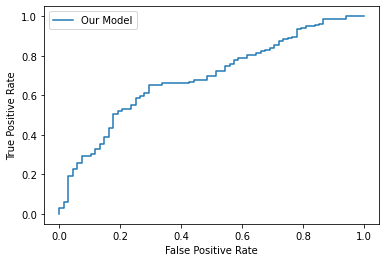

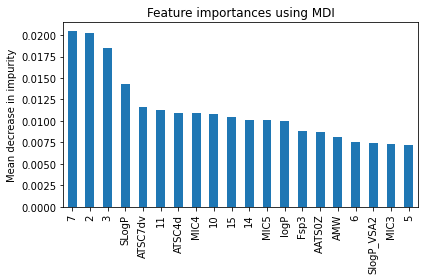

1
Best Threshold=0.599403
[[46 32]
 [35 91]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        78
           1       0.74      0.72      0.73       126

    accuracy                           0.67       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.655982905982906
matthews_corrcoef  0.309845013674521
Sensitivity 0.5897435897435898
Specificity 0.7222222222222222
f1 0.7309236947791166
LR+ 2.123076923076923
ppv 0.7398373983739838
average_precision_score 0.8127088080657972
roc_auc_score 0.7268009768009769


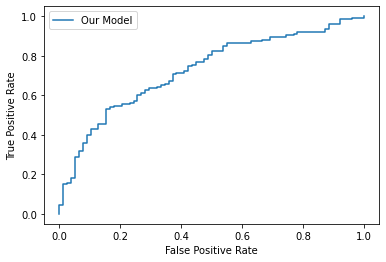

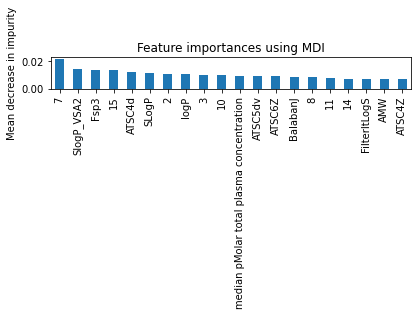

2
Best Threshold=0.625967
[[39 29]
 [40 96]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        68
           1       0.77      0.71      0.74       136

    accuracy                           0.66       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6397058823529411
matthews_corrcoef  0.27039586544663163
Sensitivity 0.5735294117647058
Specificity 0.7058823529411765
f1 0.7356321839080461
LR+ 1.9500000000000002
ppv 0.768
average_precision_score 0.778871272473729
roc_auc_score 0.6731185121107267


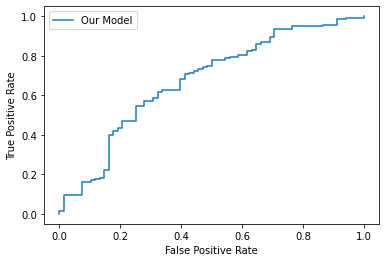

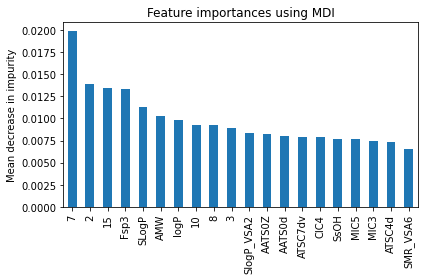

3
Best Threshold=0.674852
[[46 24]
 [65 69]]
              precision    recall  f1-score   support

           0       0.41      0.66      0.51        70
           1       0.74      0.51      0.61       134

    accuracy                           0.56       204
   macro avg       0.58      0.59      0.56       204
weighted avg       0.63      0.56      0.57       204

balanced_accuracy_score  0.5860341151385928
matthews_corrcoef  0.16402088373735726
Sensitivity 0.6571428571428571
Specificity 0.5149253731343284
f1 0.6079295154185023
LR+ 1.354725274725275
ppv 0.7419354838709677
average_precision_score 0.7527888728855958
roc_auc_score 0.6586353944562899


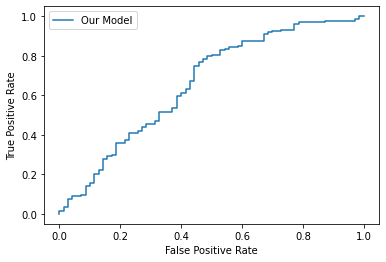

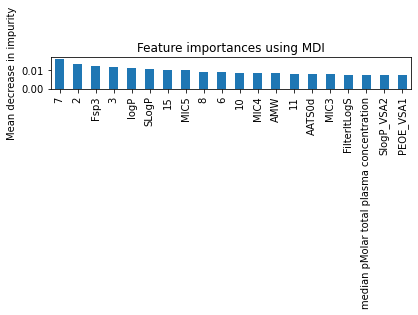

4
Best Threshold=0.632271
[[53 27]
 [27 97]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        80
           1       0.78      0.78      0.78       124

    accuracy                           0.74       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.74      0.74      0.74       204

balanced_accuracy_score  0.7223790322580645
matthews_corrcoef  0.44475806451612904
Sensitivity 0.6625
Specificity 0.782258064516129
f1 0.7822580645161291
LR+ 3.0425925925925923
ppv 0.782258064516129
average_precision_score 0.8136996937766918
roc_auc_score 0.761491935483871


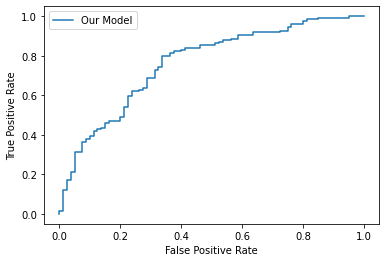

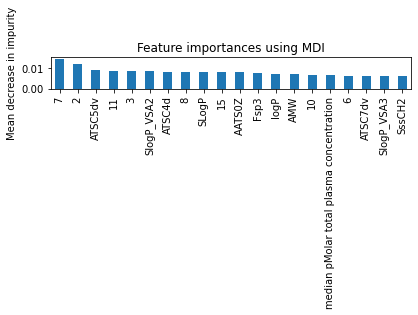

 64%|███████████████████████████▎               | 7/11 [17:42<10:18, 154.73s/it]

49
0
Best Threshold=0.584983
[[ 35  40]
 [ 28 101]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        75
           1       0.72      0.78      0.75       129

    accuracy                           0.67       204
   macro avg       0.64      0.62      0.63       204
weighted avg       0.66      0.67      0.66       204

balanced_accuracy_score  0.6248062015503876
matthews_corrcoef  0.2605024530206224
Sensitivity 0.4666666666666667
Specificity 0.7829457364341085
f1 0.748148148148148
LR+ 2.1499999999999995
ppv 0.7163120567375887
average_precision_score 0.8442783001866822
roc_auc_score 0.7438759689922482


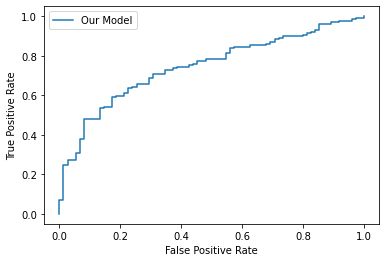

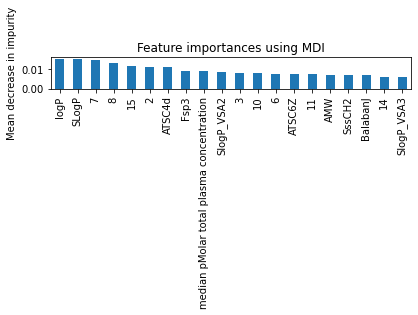

1
Best Threshold=0.633285
[[40 30]
 [55 79]]
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        70
           1       0.72      0.59      0.65       134

    accuracy                           0.58       204
   macro avg       0.57      0.58      0.57       204
weighted avg       0.62      0.58      0.59       204

balanced_accuracy_score  0.5804904051172708
matthews_corrcoef  0.15321471458147778
Sensitivity 0.5714285714285714
Specificity 0.5895522388059702
f1 0.6502057613168724
LR+ 1.3922077922077922
ppv 0.7247706422018348
average_precision_score 0.7713317217133324
roc_auc_score 0.6674840085287846


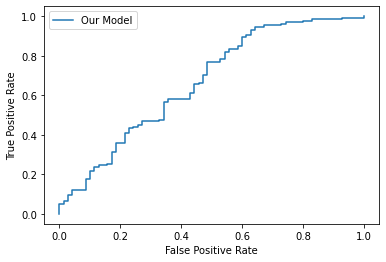

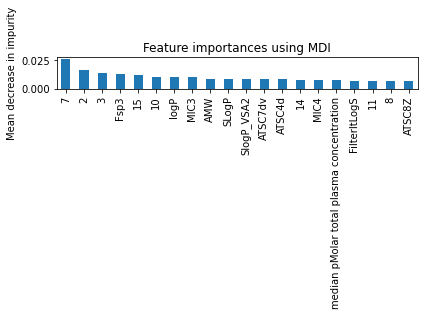

2
Best Threshold=0.663602
[[47 19]
 [48 90]]
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        66
           1       0.83      0.65      0.73       138

    accuracy                           0.67       204
   macro avg       0.66      0.68      0.66       204
weighted avg       0.72      0.67      0.68       204

balanced_accuracy_score  0.6821475625823452
matthews_corrcoef  0.34165660347470217
Sensitivity 0.7121212121212122
Specificity 0.6521739130434783
f1 0.728744939271255
LR+ 2.047348484848485
ppv 0.8256880733944955
average_precision_score 0.8031502542064161
roc_auc_score 0.6963109354413702


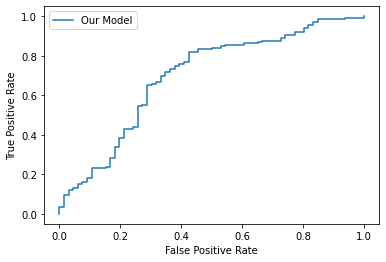

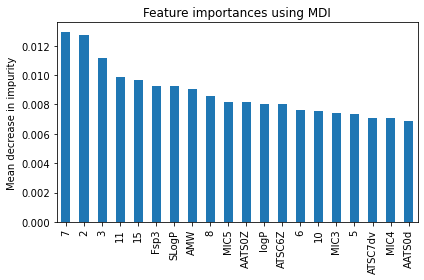

3
Best Threshold=0.602301
[[61 17]
 [48 78]]
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        78
           1       0.82      0.62      0.71       126

    accuracy                           0.68       204
   macro avg       0.69      0.70      0.68       204
weighted avg       0.72      0.68      0.69       204

balanced_accuracy_score  0.7005494505494505
matthews_corrcoef  0.3907590044130477
Sensitivity 0.782051282051282
Specificity 0.6190476190476191
f1 0.7058823529411765
LR+ 2.0528846153846154
ppv 0.8210526315789474
average_precision_score 0.798721717005175
roc_auc_score 0.7320919820919821


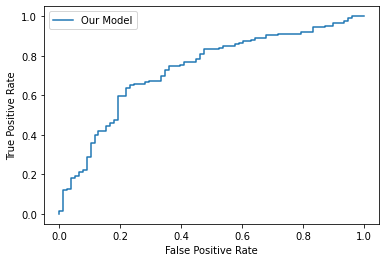

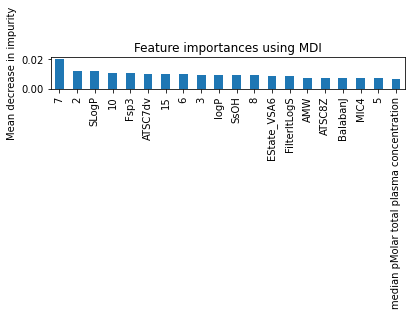

4
Best Threshold=0.664048
[[54 21]
 [52 77]]
              precision    recall  f1-score   support

           0       0.51      0.72      0.60        75
           1       0.79      0.60      0.68       129

    accuracy                           0.64       204
   macro avg       0.65      0.66      0.64       204
weighted avg       0.68      0.64      0.65       204

balanced_accuracy_score  0.6584496124031007
matthews_corrcoef  0.3058304284849288
Sensitivity 0.72
Specificity 0.5968992248062015
f1 0.6784140969162995
LR+ 1.7861538461538458
ppv 0.7857142857142857
average_precision_score 0.7958827160610287
roc_auc_score 0.7135917312661497


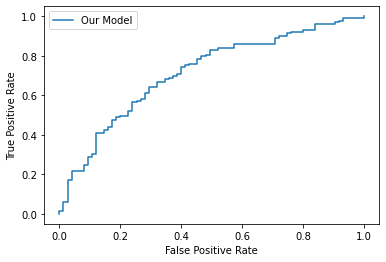

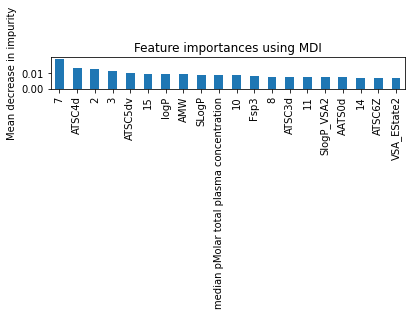

 73%|███████████████████████████████▎           | 8/11 [20:27<07:53, 157.94s/it]

50
0
Best Threshold=0.647085
[[53 30]
 [28 93]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        83
           1       0.76      0.77      0.76       121

    accuracy                           0.72       204
   macro avg       0.71      0.70      0.70       204
weighted avg       0.71      0.72      0.72       204

balanced_accuracy_score  0.7035746290948919
matthews_corrcoef  0.4087806350868447
Sensitivity 0.6385542168674698
Specificity 0.768595041322314
f1 0.762295081967213
LR+ 2.7594664371772804
ppv 0.7560975609756098
average_precision_score 0.8279948033803869
roc_auc_score 0.7677984665936474


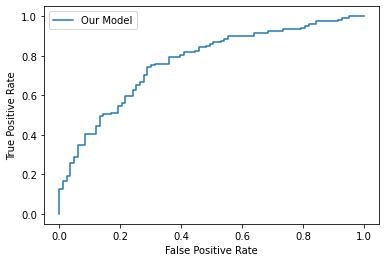

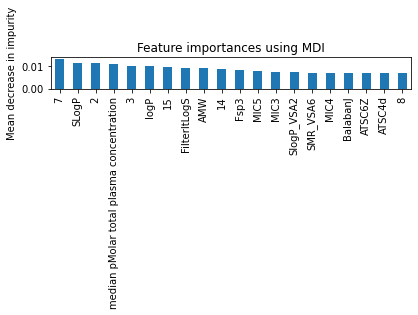

1
Best Threshold=0.629785
[[55 18]
 [54 77]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        73
           1       0.81      0.59      0.68       131

    accuracy                           0.65       204
   macro avg       0.66      0.67      0.64       204
weighted avg       0.70      0.65      0.65       204

balanced_accuracy_score  0.6706054585381156
matthews_corrcoef  0.3279026634229127
Sensitivity 0.7534246575342466
Specificity 0.5877862595419847
f1 0.6814159292035399
LR+ 1.8277524099441906
ppv 0.8105263157894737
average_precision_score 0.8376859800875198
roc_auc_score 0.7595942695806754


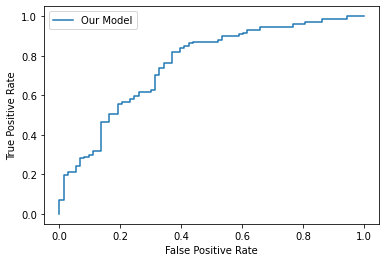

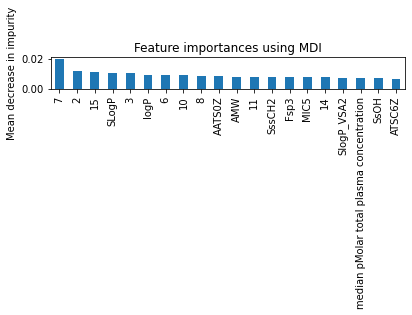

2
Best Threshold=0.618207
[[40 28]
 [39 97]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.54        68
           1       0.78      0.71      0.74       136

    accuracy                           0.67       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.69      0.67      0.68       204

balanced_accuracy_score  0.6507352941176471
matthews_corrcoef  0.2917429074555762
Sensitivity 0.5882352941176471
Specificity 0.7132352941176471
f1 0.7432950191570882
LR+ 2.0512820512820515
ppv 0.776
average_precision_score 0.7780260638399716
roc_auc_score 0.6802551903114187


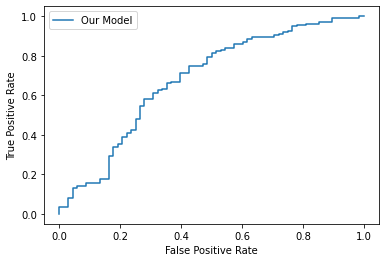

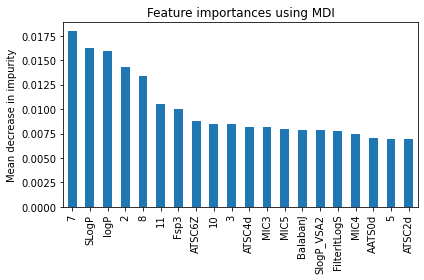

3
Best Threshold=0.639918
[[54 20]
 [45 85]]
              precision    recall  f1-score   support

           0       0.55      0.73      0.62        74
           1       0.81      0.65      0.72       130

    accuracy                           0.68       204
   macro avg       0.68      0.69      0.67       204
weighted avg       0.71      0.68      0.69       204

balanced_accuracy_score  0.6917879417879418
matthews_corrcoef  0.3690001845001384
Sensitivity 0.7297297297297297
Specificity 0.6538461538461539
f1 0.7234042553191489
LR+ 2.1081081081081083
ppv 0.8095238095238095
average_precision_score 0.8054451339264317
roc_auc_score 0.7216216216216217


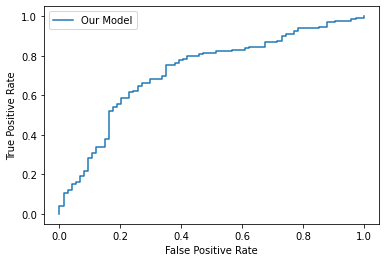

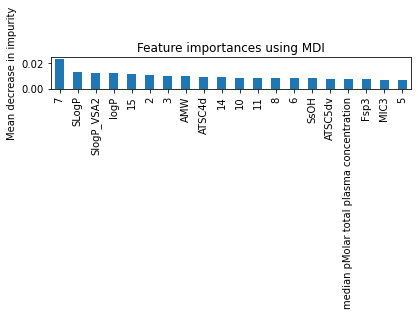

4
Best Threshold=0.595016
[[ 34  32]
 [ 36 102]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50        66
           1       0.76      0.74      0.75       138

    accuracy                           0.67       204
   macro avg       0.62      0.63      0.62       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.6271409749670619
matthews_corrcoef  0.25056801060156564
Sensitivity 0.5151515151515151
Specificity 0.7391304347826086
f1 0.75
LR+ 1.9747474747474743
ppv 0.7611940298507462
average_precision_score 0.8264709073844804
roc_auc_score 0.6994949494949495


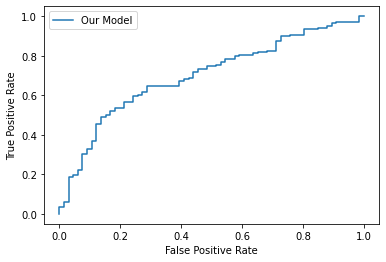

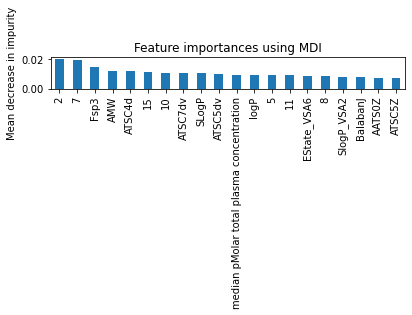

 82%|███████████████████████████████████▏       | 9/11 [23:15<05:21, 160.96s/it]

51
0
Best Threshold=0.596086
[[ 32  45]
 [ 25 102]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        77
           1       0.69      0.80      0.74       127

    accuracy                           0.66       204
   macro avg       0.63      0.61      0.61       204
weighted avg       0.64      0.66      0.64       204

balanced_accuracy_score  0.6093670109418141
matthews_corrcoef  0.236302037484007
Sensitivity 0.4155844155844156
Specificity 0.8031496062992126
f1 0.7445255474452555
LR+ 2.1111688311688317
ppv 0.6938775510204082
average_precision_score 0.758037251697362
roc_auc_score 0.6712342775334902


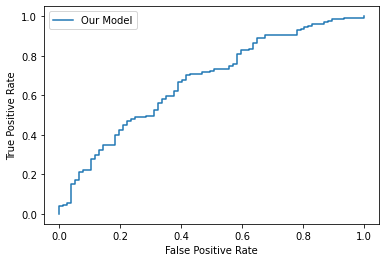

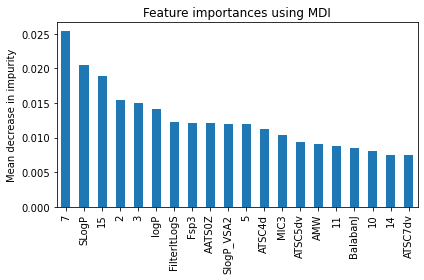

1
Best Threshold=0.660670
[[50 24]
 [52 78]]
              precision    recall  f1-score   support

           0       0.49      0.68      0.57        74
           1       0.76      0.60      0.67       130

    accuracy                           0.63       204
   macro avg       0.63      0.64      0.62       204
weighted avg       0.67      0.63      0.63       204

balanced_accuracy_score  0.6378378378378378
matthews_corrcoef  0.2650854018430103
Sensitivity 0.6756756756756757
Specificity 0.6
f1 0.6724137931034482
LR+ 1.689189189189189
ppv 0.7647058823529411
average_precision_score 0.7617419841115225
roc_auc_score 0.668087318087318


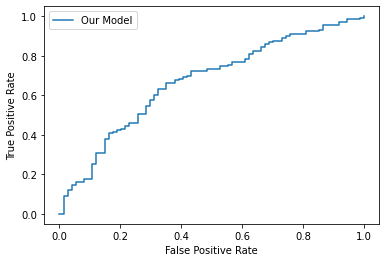

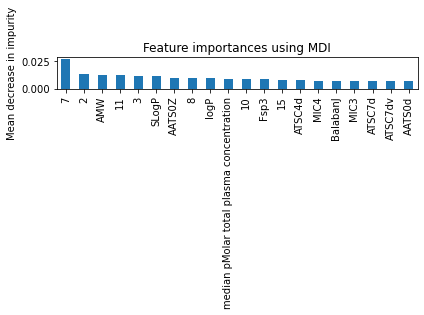

2
Best Threshold=0.666383
[[54 10]
 [51 89]]
              precision    recall  f1-score   support

           0       0.51      0.84      0.64        64
           1       0.90      0.64      0.74       140

    accuracy                           0.70       204
   macro avg       0.71      0.74      0.69       204
weighted avg       0.78      0.70      0.71       204

balanced_accuracy_score  0.7397321428571428
matthews_corrcoef  0.4451414345152845
Sensitivity 0.84375
Specificity 0.6357142857142857
f1 0.7447698744769875
LR+ 2.316176470588235
ppv 0.898989898989899
average_precision_score 0.8990203778422883
roc_auc_score 0.8197544642857143


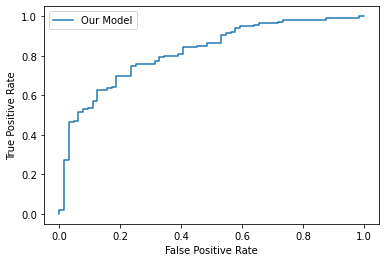

saving model


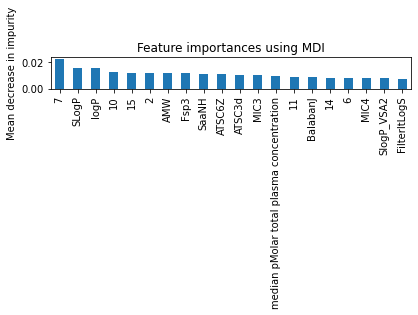

3
Best Threshold=0.623897
[[43 26]
 [40 95]]
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        69
           1       0.79      0.70      0.74       135

    accuracy                           0.68       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.69      0.68      0.68       204

balanced_accuracy_score  0.6634460547504026
matthews_corrcoef  0.3148213203531092
Sensitivity 0.6231884057971014
Specificity 0.7037037037037037
f1 0.7421875
LR+ 2.1032608695652173
ppv 0.7851239669421488
average_precision_score 0.7725030017227172
roc_auc_score 0.6679549114331722


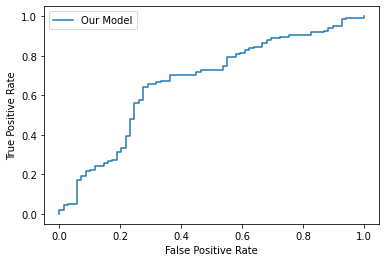

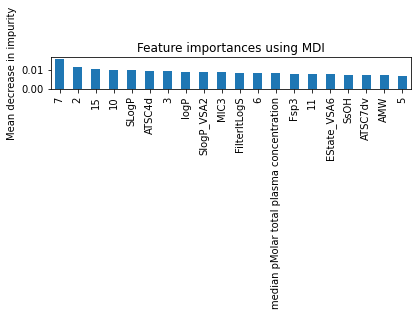

4
Best Threshold=0.606942
[[56 24]
 [47 77]]
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        80
           1       0.76      0.62      0.68       124

    accuracy                           0.65       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.68      0.65      0.66       204

balanced_accuracy_score  0.6604838709677419
matthews_corrcoef  0.3134280954850273
Sensitivity 0.7
Specificity 0.6209677419354839
f1 0.6844444444444445
LR+ 1.8468085106382979
ppv 0.7623762376237624
average_precision_score 0.7551907490576993
roc_auc_score 0.7070564516129032


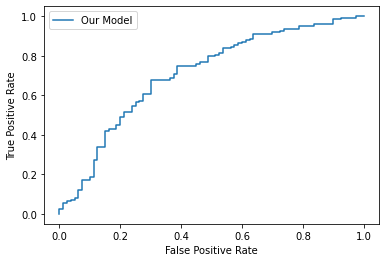

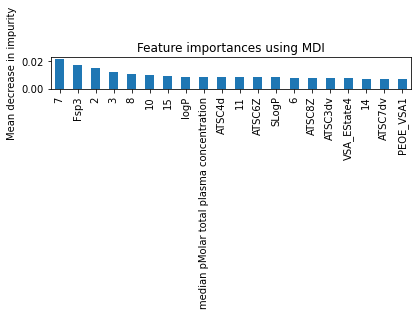

 91%|██████████████████████████████████████▏   | 10/11 [25:49<02:38, 158.74s/it]

52
0
Best Threshold=0.699698
[[48 18]
 [62 76]]
              precision    recall  f1-score   support

           0       0.44      0.73      0.55        66
           1       0.81      0.55      0.66       138

    accuracy                           0.61       204
   macro avg       0.62      0.64      0.60       204
weighted avg       0.69      0.61      0.62       204

balanced_accuracy_score  0.6389986824769434
matthews_corrcoef  0.260910718639334
Sensitivity 0.7272727272727273
Specificity 0.5507246376811594
f1 0.6551724137931035
LR+ 1.618768328445748
ppv 0.8085106382978723
average_precision_score 0.8209163272534525
roc_auc_score 0.6952129995608257


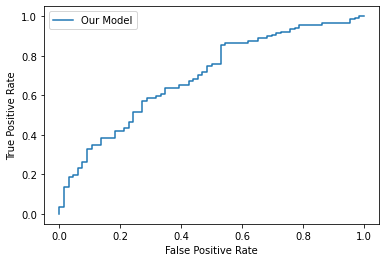

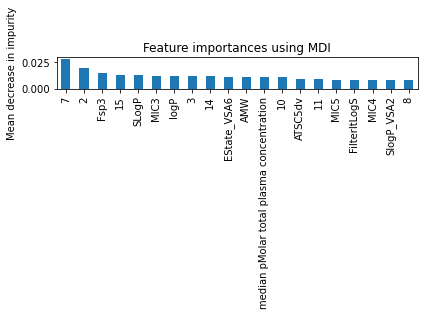

1
Best Threshold=0.537636
[[51 23]
 [38 92]]
              precision    recall  f1-score   support

           0       0.57      0.69      0.63        74
           1       0.80      0.71      0.75       130

    accuracy                           0.70       204
   macro avg       0.69      0.70      0.69       204
weighted avg       0.72      0.70      0.71       204

balanced_accuracy_score  0.6984407484407484
matthews_corrcoef  0.3847728893318539
Sensitivity 0.6891891891891891
Specificity 0.7076923076923077
f1 0.7510204081632654
LR+ 2.3577524893314368
ppv 0.8
average_precision_score 0.8379804494875492
roc_auc_score 0.7455301455301455


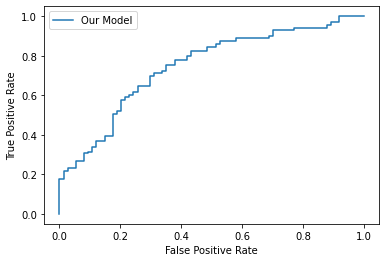

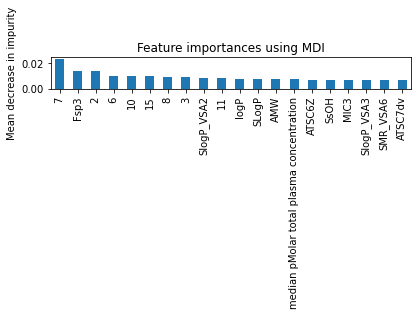

2
Best Threshold=0.550971
[[ 25  55]
 [ 21 103]]
              precision    recall  f1-score   support

           0       0.54      0.31      0.40        80
           1       0.65      0.83      0.73       124

    accuracy                           0.63       204
   macro avg       0.60      0.57      0.56       204
weighted avg       0.61      0.63      0.60       204

balanced_accuracy_score  0.5715725806451613
matthews_corrcoef  0.16723418151917968
Sensitivity 0.3125
Specificity 0.8306451612903226
f1 0.7304964539007093
LR+ 1.8452380952380956
ppv 0.6518987341772152
average_precision_score 0.7493254686912264
roc_auc_score 0.6825604838709678


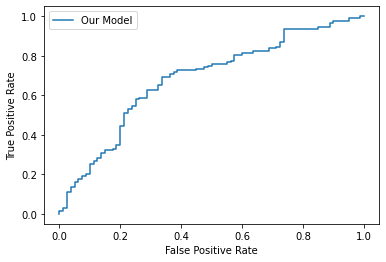

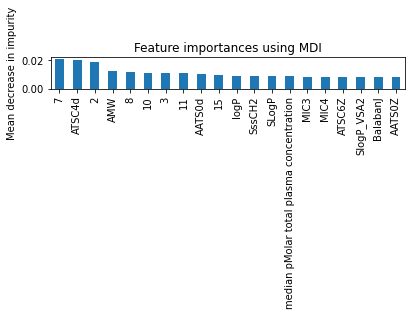

3
Best Threshold=0.681543
[[53 18]
 [60 73]]
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        71
           1       0.80      0.55      0.65       133

    accuracy                           0.62       204
   macro avg       0.64      0.65      0.61       204
weighted avg       0.69      0.62      0.63       204

balanced_accuracy_score  0.6476755268452823
matthews_corrcoef  0.28303073652185323
Sensitivity 0.7464788732394366
Specificity 0.5488721804511278
f1 0.6517857142857143
LR+ 1.6546948356807514
ppv 0.8021978021978022
average_precision_score 0.8155972866677175
roc_auc_score 0.6977655406120936


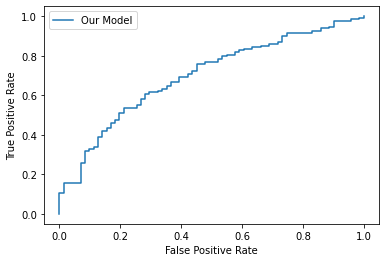

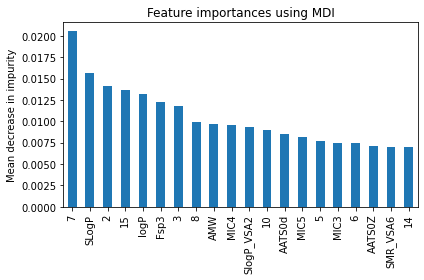

4
Best Threshold=0.621093
[[ 44  29]
 [ 30 101]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60        73
           1       0.78      0.77      0.77       131

    accuracy                           0.71       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.71      0.71      0.71       204

balanced_accuracy_score  0.6868660462198055
matthews_corrcoef  0.3726232370029967
Sensitivity 0.6027397260273972
Specificity 0.7709923664122137
f1 0.7739463601532567
LR+ 2.631963470319634
ppv 0.7769230769230769
average_precision_score 0.8375311456565185
roc_auc_score 0.7409808637456865


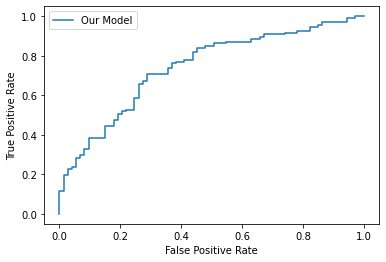

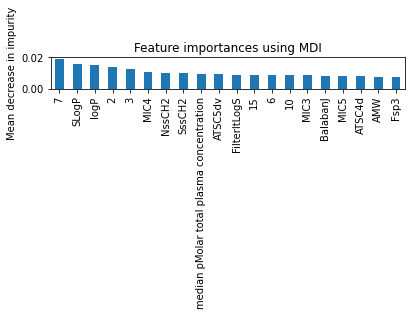

100%|██████████████████████████████████████████| 11/11 [28:38<00:00, 156.25s/it]


In [88]:
#Models to predict DILI with All : Mordred, Morgan, Physicochemical and Liv preds


list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_bestNCV_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [89]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity", "Specificity", "auc",
                                               "f1", "pos_LR", "ppv", "average_precision_score"])
results["Features"] = "Morgan, Mordred, Phisicochemical, Liv data"
results.to_csv("NCV_models_all_features.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.652868  0.294831     0.693333     0.612403   
1   NCV  DILI  42      1  0.694853  0.372630     0.676471     0.713235   
2   NCV  DILI  42      2  0.685238  0.363321     0.815789     0.554688   
3   NCV  DILI  42      3  0.605006  0.206674     0.551282     0.658730   
4   NCV  DILI  42      4  0.619185  0.229295     0.552239     0.686131   
5   NCV  DILI  43      0  0.628602  0.240626     0.551724     0.705479   
6   NCV  DILI  43      1  0.682785  0.360619     0.645570     0.720000   
7   NCV  DILI  43      2  0.663076  0.313069     0.684932     0.641221   
8   NCV  DILI  43      3  0.634615  0.263823     0.602564     0.666667   
9   NCV  DILI  43      4  0.622327  0.250923     0.486842     0.757812   
10  NCV  DILI  44      0  0.660494  0.315082     0.654321     0.666667   
11  NCV  DILI  44      1  0.691835  0.365962     0.774648     0.609023   
12  NCV  DILI  44      2  0.660268  0.299907     0.656250     0.664286   
13  NCV  DILI  44      3  0.623908  0.242520     0.654321     0.593496   
14  NCV  DILI  44      4  0.663634  0.314808     0.611940     0.715328   
15  NCV  DILI  45      0  0.644083  0.283097     0.629630     0.658537   
16  NCV  DILI  45      1  0.695659  0.378525     0.786667     0.604651   
17  NCV  DILI  45      2  0.739291  0.453192     0.797101     0.681481   
18  NCV  DILI  45      3  0.619646  0.230455     0.565217     0.674074   
19  NCV  DILI  45      4  0.659808  0.325661     0.528571     0.791045   
20  NCV  DILI  46      0  0.654083  0.304744     0.575342     0.732824   
21  NCV  DILI  46      1  0.656861  0.312828     0.567568     0.746154   
22  NCV  DILI  46      2  0.691787  0.363103     0.739130     0.644444   
23  NCV  DILI  46      3  0.692918  0.377626     0.679487     0.706349   
24  NCV  DILI  46      4  0.602878  0.196975     0.571429     0.634328   
25  NCV  DILI  47      0  0.659044  0.305868     0.702703     0.615385   
26  NCV  DILI  47      1  0.663256  0.320474     0.613333     0.713178   
27  NCV  DILI  47      2  0.616879  0.215126     0.677419     0.556338   
28  NCV  DILI  47      3  0.689846  0.386387     0.584416     0.795276   
29  NCV  DILI  47      4  0.736020  0.456798     0.815789     0.656250   
30  NCV  DILI  48      0  0.606618  0.207908     0.514706     0.698529   
31  NCV  DILI  48      1  0.655983  0.309845     0.589744     0.722222   
32  NCV  DILI  48      2  0.639706  0.270396     0.573529     0.705882   
33  NCV  DILI  48      3  0.586034  0.164021     0.657143     0.514925   
34  NCV  DILI  48      4  0.722379  0.444758     0.662500     0.782258   
35  NCV  DILI  49      0  0.624806  0.260502     0.466667     0.782946   
36  NCV  DILI  49      1  0.580490  0.153215     0.571429     0.589552   
37  NCV  DILI  49      2  0.682148  0.341657     0.712121     0.652174   
38  NCV  DILI  49      3  0.700549  0.390759     0.782051     0.619048   
39  NCV  DILI  49      4  0.658450  0.305830     0.720000     0.596899   
40  NCV  DILI  50      0  0.703575  0.408781     0.638554     0.768595   
41  NCV  DILI  50      1  0.670605  0.327903     0.753425     0.587786   
42  NCV  DILI  50      2  0.650735  0.291743     0.588235     0.713235   
43  NCV  DILI  50      3  0.691788  0.369000     0.729730     0.653846   
44  NCV  DILI  50      4  0.627141  0.250568     0.515152     0.739130   
45  NCV  DILI  51      0  0.609367  0.236302     0.415584     0.803150   
46  NCV  DILI  51      1  0.637838  0.265085     0.675676     0.600000   
47  NCV  DILI  51      2  0.739732  0.445141     0.843750     0.635714   
48  NCV  DILI  51      3  0.663446  0.314821     0.623188     0.703704   
49  NCV  DILI  51      4  0.660484  0.313428     0.700000     0.620968   
50  NCV  DILI  52      0  0.638999  0.260911     0.727273     0.550725   
51  NCV  DILI  52      1  0.698441  0.384773     0.689189     0.707692   
52  NCV  DILI  52      2  0.571573  0.167234     0.312500     0.830645   
53  NCV 

In [90]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.657567   0.307003     0.641044     0.674090   
std     3.191424   1.427248   0.038996   0.074035     0.104611     0.073761   
min    42.000000   0.000000   0.571573   0.153215     0.312500     0.514925   
25%    44.000000   1.000000   0.627871   0.255713     0.572479     0.617216   
50%    47.000000   2.000000   0.659044   0.309845     0.654321     0.666667   
75%    50.000000   3.000000   0.688356   0.364641     0.707412     0.717664   
max    52.000000   4.000000   0.739732   0.456798     0.843750     0.830645   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.711373   0.717565   2.019751   0.775305                 0.802861  
std     0.041483   0.038857   0.349472   0.045207                 0.041246  
min     0.631563   0.607930   1.354725   0.651899                 0.706693  
25%     0.679663   0.687050   1.798246   0.748696                 0.771917  
50%     0.707056   0.728745   1.981311   0.774510                 0.811391  
75%     0.744703   0.744648   2.151712   0.805354                 0.837103  
max     0.819754   0.782258   3.042593   0.898990                 0.899020

In [91]:
from sklearn.model_selection import KFold
import pickle

In [92]:


loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
#Important to retrain on entire data as previous one was the best of trained in NCV (on 4 out 5 folds)   
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, max_depth=8, max_features=49,
                       min_samples_leaf=8, min_samples_split=9,
                       n_estimators=600, n_jobs=40, random_state=42)

Best Threshold=0.612911
[[ 61  30]
 [ 44 120]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        91
           1       0.80      0.73      0.76       164

    accuracy                           0.71       255
   macro avg       0.69      0.70      0.69       255
weighted avg       0.72      0.71      0.71       255

balanced_accuracy_score  0.7010184937014206
matthews_corrcoef  0.3913527150564241
Sensitivity 0.6703296703296703
Specificity 0.7317073170731707
f1 0.7643312101910827
LR+ 2.4985014985014984
ppv 0.8
average_precision_score 0.8113397356736788
roc_auc_score 0.7392120075046904


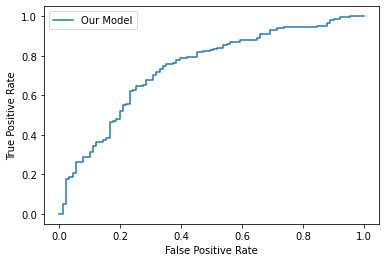

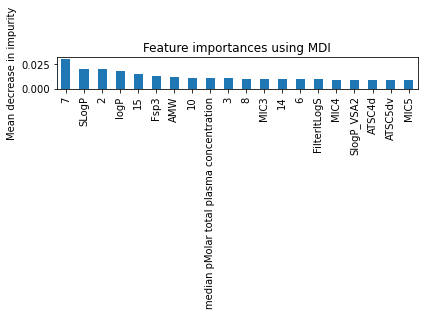

In [93]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [94]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_model.sav",  'wb'))

In [95]:
#Models to predict DILI with All : Morgan, MACCS, Mordred and Physicochemical 

In [96]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [97]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [98]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [99]:
test_feature_list = list(test_feature_list)
test_feature_list

['Mfp1',
 'Mfp13',
 'Mfp80',
 'Mfp114',
 'Mfp147',
 'Mfp216',
 'Mfp222',
 'Mfp227',
 'Mfp231',
 'Mfp249',
 'Mfp283',
 'Mfp294',
 'Mfp310',
 'Mfp314',
 'Mfp322',
 'Mfp350',
 'Mfp352',
 'Mfp366',
 'Mfp378',
 'Mfp389',
 'Mfp392',
 'Mfp486',
 'Mfp519',
 'Mfp561',
 'Mfp591',
 'Mfp650',
 'Mfp656',
 'Mfp675',
 'Mfp694',
 'Mfp695',
 'Mfp715',
 'Mfp718',
 'Mfp725',
 'Mfp739',
 'Mfp745',
 'Mfp753',
 'Mfp794',
 'Mfp807',
 'Mfp841',
 'Mfp875',
 'Mfp881',
 'Mfp926',
 'Mfp935',
 'Mfp1017',
 'Mfp1019',
 'Mfp1028',
 'Mfp1039',
 'Mfp1057',
 'Mfp1060',
 'Mfp1088',
 'Mfp1114',
 'Mfp1143',
 'Mfp1145',
 'Mfp1152',
 'Mfp1154',
 'Mfp1162',
 'Mfp1163',
 'Mfp1171',
 'Mfp1199',
 'Mfp1257',
 'Mfp1274',
 'Mfp1292',
 'Mfp1309',
 'Mfp1325',
 'Mfp1357',
 'Mfp1366',
 'Mfp1380',
 'Mfp1385',
 'Mfp1391',
 'Mfp1452',
 'Mfp1457',
 'Mfp1476',
 'Mfp1480',
 'Mfp1487',
 'Mfp1536',
 'Mfp1564',
 'Mfp1602',
 'Mfp1607',
 'Mfp1683',
 'Mfp1722',
 'Mfp1738',
 'Mfp1750',
 'Mfp1754',
 'Mfp1855',
 'Mfp1866',
 'Mfp1873',
 'Mfp1911',
 'M

In [100]:
len(test_feature_list)

554

In [101]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(1020, 554)
(255, 554)
1020
255
(1275, 554)
1275


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.610829
[[47 28]
 [41 88]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.58        75
           1       0.76      0.68      0.72       129

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6544186046511629
matthews_corrcoef  0.30066631551798734
Sensitivity 0.6266666666666667
Specificity 0.6821705426356589
f1 0.7183673469387755
LR+ 1.9717073170731707
ppv 0.7586206896551724
average_precision_score 0.8128006146267731
roc_auc_score 0.711937984496124


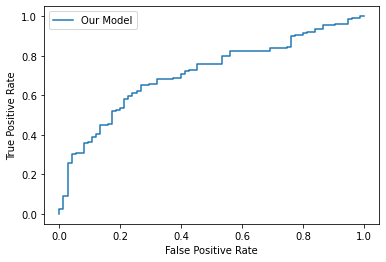

saving model


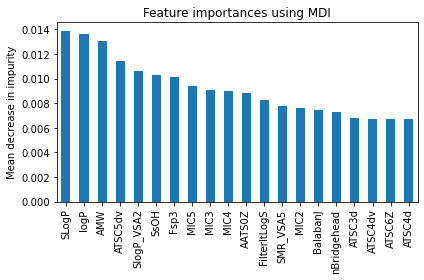

1
Best Threshold=0.582510
[[45 23]
 [46 90]]
              precision    recall  f1-score   support

           0       0.49      0.66      0.57        68
           1       0.80      0.66      0.72       136

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.64       204
weighted avg       0.70      0.66      0.67       204

balanced_accuracy_score  0.6617647058823529
matthews_corrcoef  0.3068158283775988
Sensitivity 0.6617647058823529
Specificity 0.6617647058823529
f1 0.7228915662650601
LR+ 1.9565217391304346
ppv 0.7964601769911505
average_precision_score 0.8391612609551063
roc_auc_score 0.71875


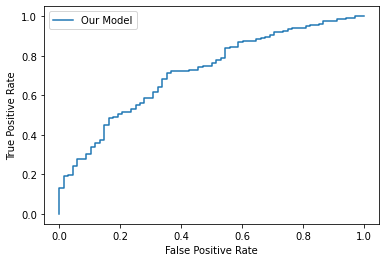

saving model


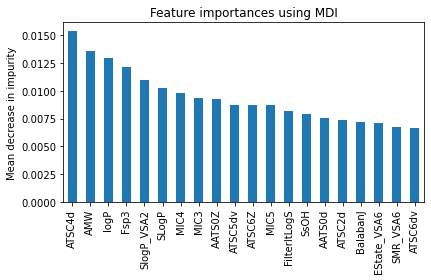

2
Best Threshold=0.644360
[[51 25]
 [36 92]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.63        76
           1       0.79      0.72      0.75       128

    accuracy                           0.70       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.71      0.70      0.70       204

balanced_accuracy_score  0.6949013157894737
matthews_corrcoef  0.3810693248370927
Sensitivity 0.6710526315789473
Specificity 0.71875
f1 0.7510204081632653
LR+ 2.3859649122807016
ppv 0.7863247863247863
average_precision_score 0.8402025935305908
roc_auc_score 0.7604851973684212


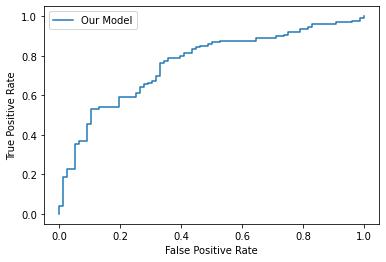

saving model


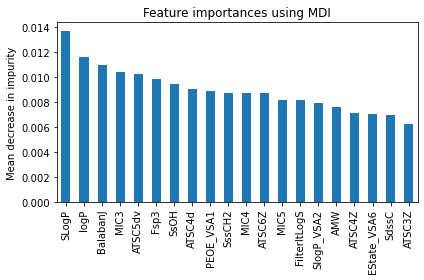

3
Best Threshold=0.689712
[[46 32]
 [56 70]]
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        78
           1       0.69      0.56      0.61       126

    accuracy                           0.57       204
   macro avg       0.57      0.57      0.56       204
weighted avg       0.60      0.57      0.57       204

balanced_accuracy_score  0.5726495726495726
matthews_corrcoef  0.14121975762272057
Sensitivity 0.5897435897435898
Specificity 0.5555555555555556
f1 0.6140350877192983
LR+ 1.326923076923077
ppv 0.6862745098039216
average_precision_score 0.6980704368068245
roc_auc_score 0.6164021164021163


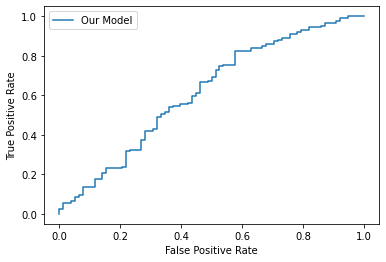

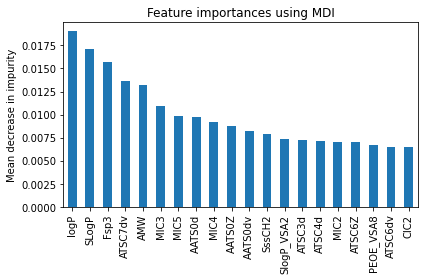

4
Best Threshold=0.660719
[[51 16]
 [59 78]]
              precision    recall  f1-score   support

           0       0.46      0.76      0.58        67
           1       0.83      0.57      0.68       137

    accuracy                           0.63       204
   macro avg       0.65      0.67      0.63       204
weighted avg       0.71      0.63      0.64       204

balanced_accuracy_score  0.6652685477720884
matthews_corrcoef  0.3114279752060053
Sensitivity 0.7611940298507462
Specificity 0.5693430656934306
f1 0.6753246753246752
LR+ 1.7675183405008852
ppv 0.8297872340425532
average_precision_score 0.813978299243166
roc_auc_score 0.6988778734066893


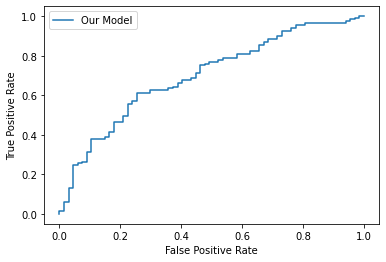

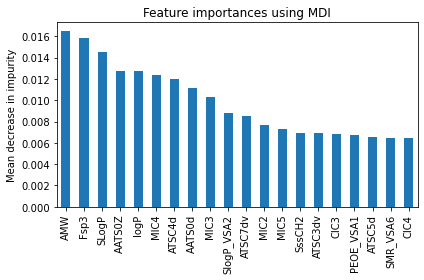

  9%|███▉                                       | 1/11 [02:47<27:56, 167.63s/it]

43
0
Best Threshold=0.617759
[[38 20]
 [48 98]]
              precision    recall  f1-score   support

           0       0.44      0.66      0.53        58
           1       0.83      0.67      0.74       146

    accuracy                           0.67       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.72      0.67      0.68       204

balanced_accuracy_score  0.6632026452527161
matthews_corrcoef  0.2981654957988993
Sensitivity 0.6551724137931034
Specificity 0.6712328767123288
f1 0.7424242424242425
LR+ 1.992816091954023
ppv 0.8305084745762712
average_precision_score 0.8468189338220953
roc_auc_score 0.696976854038734


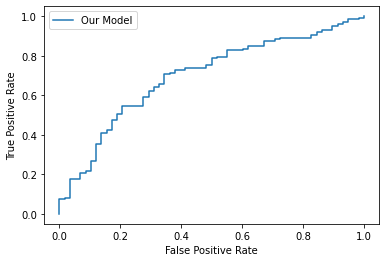

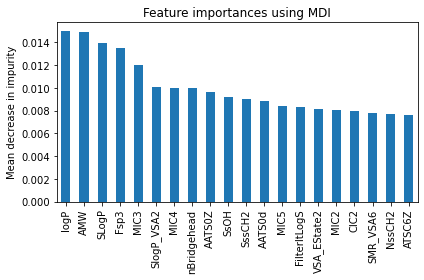

1
Best Threshold=0.659357
[[60 19]
 [43 82]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66        79
           1       0.81      0.66      0.73       125

    accuracy                           0.70       204
   macro avg       0.70      0.71      0.69       204
weighted avg       0.72      0.70      0.70       204

balanced_accuracy_score  0.7077468354430381
matthews_corrcoef  0.40481226806722925
Sensitivity 0.759493670886076
Specificity 0.656
f1 0.7256637168141593
LR+ 2.207830438622314
ppv 0.8118811881188119
average_precision_score 0.8124999855488673
roc_auc_score 0.735493670886076


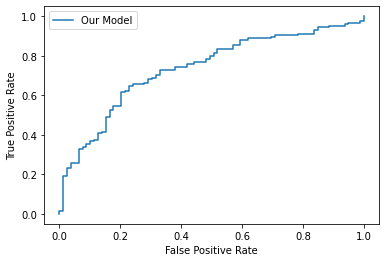

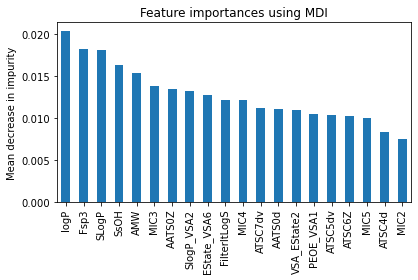

2
Best Threshold=0.658935
[[49 24]
 [54 77]]
              precision    recall  f1-score   support

           0       0.48      0.67      0.56        73
           1       0.76      0.59      0.66       131

    accuracy                           0.62       204
   macro avg       0.62      0.63      0.61       204
weighted avg       0.66      0.62      0.63       204

balanced_accuracy_score  0.6295095681271567
matthews_corrcoef  0.24834168841292245
Sensitivity 0.6712328767123288
Specificity 0.5877862595419847
f1 0.6637931034482758
LR+ 1.628361237950279
ppv 0.7623762376237624
average_precision_score 0.8034547981291065
roc_auc_score 0.7020809369444735


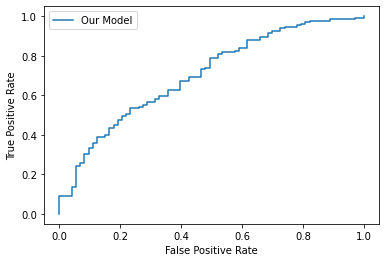

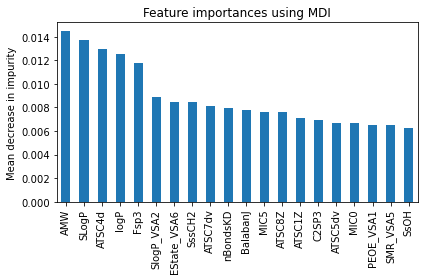

3
Best Threshold=0.624048
[[48 30]
 [42 84]]
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        78
           1       0.74      0.67      0.70       126

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.641025641025641
matthews_corrcoef  0.27604950431925757
Sensitivity 0.6153846153846154
Specificity 0.6666666666666666
f1 0.7
LR+ 1.846153846153846
ppv 0.7368421052631579
average_precision_score 0.7404168924399572
roc_auc_score 0.678011803011803


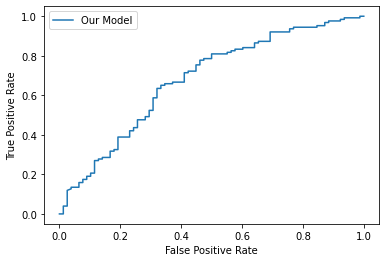

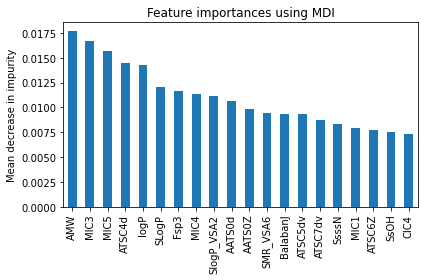

4
Best Threshold=0.642404
[[42 34]
 [40 88]]
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        76
           1       0.72      0.69      0.70       128

    accuracy                           0.64       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.6200657894736843
matthews_corrcoef  0.23679592040180442
Sensitivity 0.5526315789473685
Specificity 0.6875
f1 0.7040000000000001
LR+ 1.7684210526315791
ppv 0.7213114754098361
average_precision_score 0.7677965916429877
roc_auc_score 0.6769120065789473


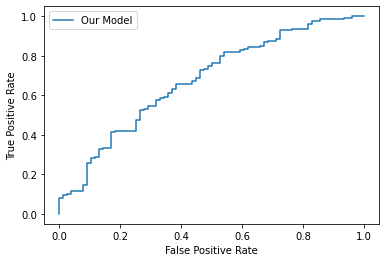

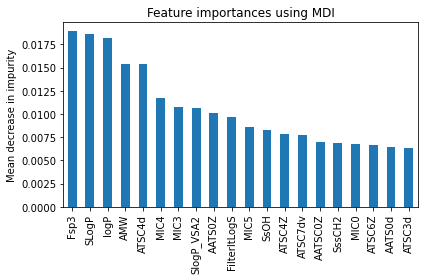

 18%|███████▊                                   | 2/11 [05:03<22:20, 148.90s/it]

44
0
Best Threshold=0.598085
[[48 33]
 [45 78]]
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        81
           1       0.70      0.63      0.67       123

    accuracy                           0.62       204
   macro avg       0.61      0.61      0.61       204
weighted avg       0.63      0.62      0.62       204

balanced_accuracy_score  0.6133694670280037
matthews_corrcoef  0.22275025100464207
Sensitivity 0.5925925925925926
Specificity 0.6341463414634146
f1 0.6666666666666667
LR+ 1.6197530864197531
ppv 0.7027027027027027
average_precision_score 0.7584265108750692
roc_auc_score 0.6730904346080498


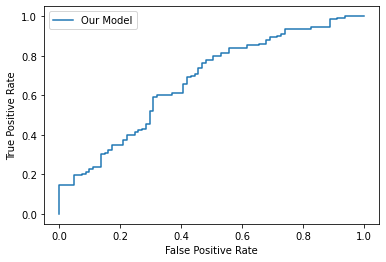

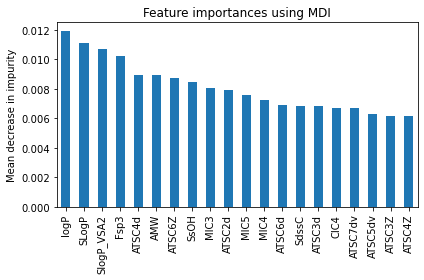

1
Best Threshold=0.620383
[[51 20]
 [46 87]]
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        71
           1       0.81      0.65      0.72       133

    accuracy                           0.68       204
   macro avg       0.67      0.69      0.67       204
weighted avg       0.71      0.68      0.68       204

balanced_accuracy_score  0.6862225987503972
matthews_corrcoef  0.3552545242671295
Sensitivity 0.7183098591549296
Specificity 0.6541353383458647
f1 0.7249999999999999
LR+ 2.0768524188609923
ppv 0.8130841121495327
average_precision_score 0.8243830916038933
roc_auc_score 0.7319707720004236


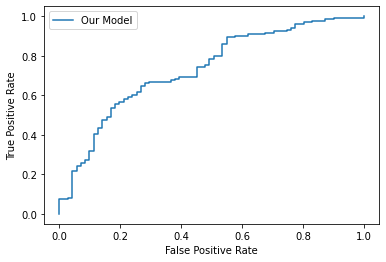

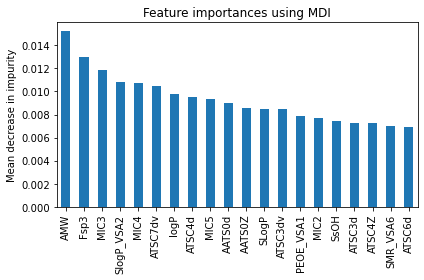

2
Best Threshold=0.591721
[[ 32  32]
 [ 36 104]]
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        64
           1       0.76      0.74      0.75       140

    accuracy                           0.67       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.6214285714285714
matthews_corrcoef  0.2390457218668787
Sensitivity 0.5
Specificity 0.7428571428571429
f1 0.7536231884057971
LR+ 1.9444444444444446
ppv 0.7647058823529411
average_precision_score 0.8031602323624146
roc_auc_score 0.6859375


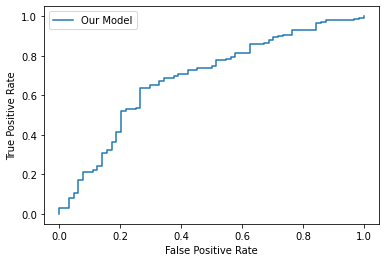

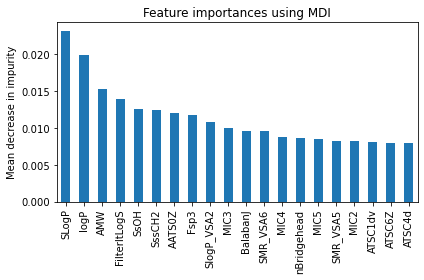

3
Best Threshold=0.680273
[[54 27]
 [53 70]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        81
           1       0.72      0.57      0.64       123

    accuracy                           0.61       204
   macro avg       0.61      0.62      0.61       204
weighted avg       0.64      0.61      0.61       204

balanced_accuracy_score  0.6178861788617886
matthews_corrcoef  0.23099905096482592
Sensitivity 0.6666666666666666
Specificity 0.5691056910569106
f1 0.6363636363636365
LR+ 1.5471698113207546
ppv 0.7216494845360825
average_precision_score 0.6939824119436633
roc_auc_score 0.6457894208571716


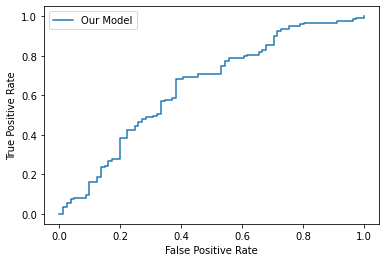

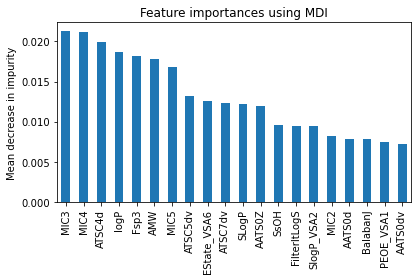

4
Best Threshold=0.587922
[[40 27]
 [41 96]]
              precision    recall  f1-score   support

           0       0.49      0.60      0.54        67
           1       0.78      0.70      0.74       137

    accuracy                           0.67       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.69      0.67      0.67       204

balanced_accuracy_score  0.6488724261902168
matthews_corrcoef  0.2857899033737773
Sensitivity 0.5970149253731343
Specificity 0.7007299270072993
f1 0.7384615384615385
LR+ 1.9949035311248635
ppv 0.7804878048780488
average_precision_score 0.8548810676602079
roc_auc_score 0.7382067763372917


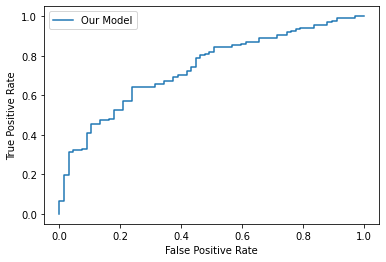

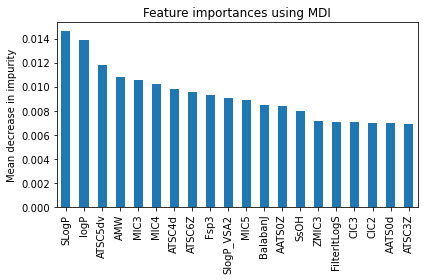

 27%|███████████▋                               | 3/11 [07:52<21:05, 158.23s/it]

45
0
Best Threshold=0.591326
[[53 28]
 [59 64]]
              precision    recall  f1-score   support

           0       0.47      0.65      0.55        81
           1       0.70      0.52      0.60       123

    accuracy                           0.57       204
   macro avg       0.58      0.59      0.57       204
weighted avg       0.61      0.57      0.58       204

balanced_accuracy_score  0.5873230954531767
matthews_corrcoef  0.17173201200054278
Sensitivity 0.654320987654321
Specificity 0.5203252032520326
f1 0.5953488372093023
LR+ 1.364092906465788
ppv 0.6956521739130435
average_precision_score 0.7169981551962914
roc_auc_score 0.6380608250526949


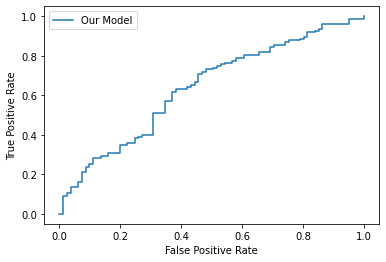

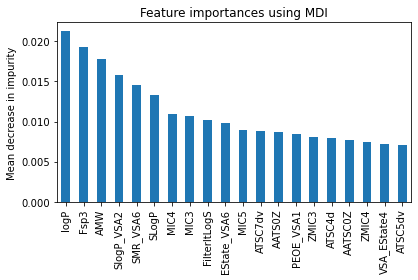

1
Best Threshold=0.616937
[[56 19]
 [52 77]]
              precision    recall  f1-score   support

           0       0.52      0.75      0.61        75
           1       0.80      0.60      0.68       129

    accuracy                           0.65       204
   macro avg       0.66      0.67      0.65       204
weighted avg       0.70      0.65      0.66       204

balanced_accuracy_score  0.6717829457364342
matthews_corrcoef  0.3318853130816938
Sensitivity 0.7466666666666667
Specificity 0.5968992248062015
f1 0.6844444444444445
LR+ 1.8523076923076922
ppv 0.8020833333333334
average_precision_score 0.8148575219552987
roc_auc_score 0.7362273901808783


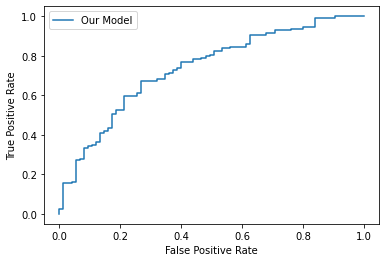

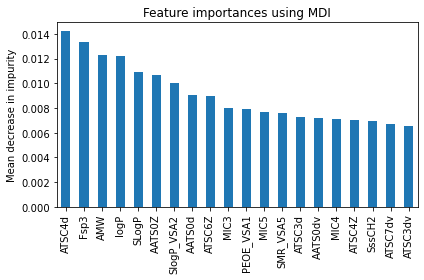

2
Best Threshold=0.600470
[[ 38  31]
 [ 31 104]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        69
           1       0.77      0.77      0.77       135

    accuracy                           0.70       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.70      0.70      0.70       204

balanced_accuracy_score  0.6605475040257649
matthews_corrcoef  0.3210950080515298
Sensitivity 0.5507246376811594
Specificity 0.7703703703703704
f1 0.7703703703703704
LR+ 2.3983169705469845
ppv 0.7703703703703704
average_precision_score 0.850959529879997
roc_auc_score 0.7637144390767578


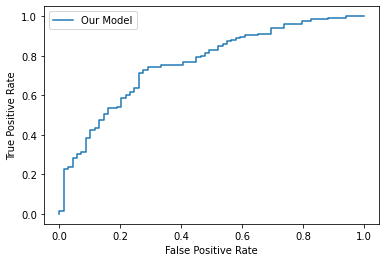

saving model


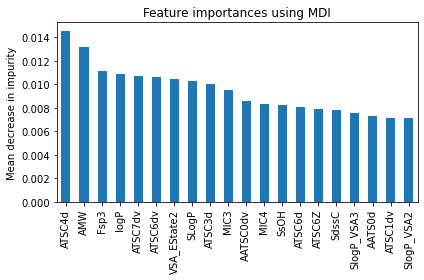

3
Best Threshold=0.550101
[[39 30]
 [44 91]]
              precision    recall  f1-score   support

           0       0.47      0.57      0.51        69
           1       0.75      0.67      0.71       135

    accuracy                           0.64       204
   macro avg       0.61      0.62      0.61       204
weighted avg       0.66      0.64      0.64       204

balanced_accuracy_score  0.6196457326892109
matthews_corrcoef  0.23045540987424645
Sensitivity 0.5652173913043478
Specificity 0.674074074074074
f1 0.7109375
LR+ 1.7341897233201577
ppv 0.7520661157024794
average_precision_score 0.8002733843706856
roc_auc_score 0.6842726784755769


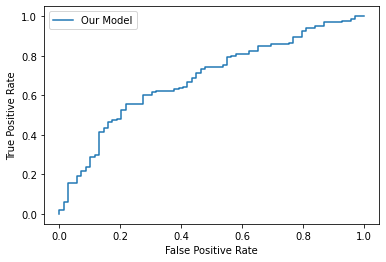

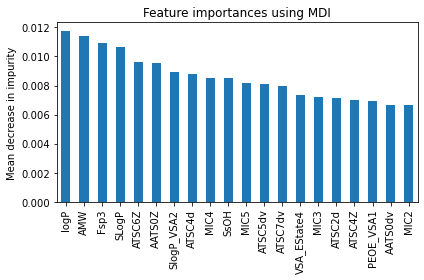

4
Best Threshold=0.587794
[[ 36  34]
 [ 32 102]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        70
           1       0.75      0.76      0.76       134

    accuracy                           0.68       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.67      0.68      0.68       204

balanced_accuracy_score  0.6377398720682302
matthews_corrcoef  0.2774387886541703
Sensitivity 0.5142857142857142
Specificity 0.7611940298507462
f1 0.7555555555555554
LR+ 2.153571428571428
ppv 0.75
average_precision_score 0.8533329811319011
roc_auc_score 0.7473347547974413


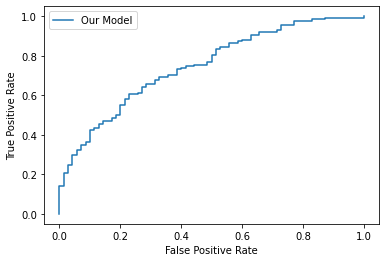

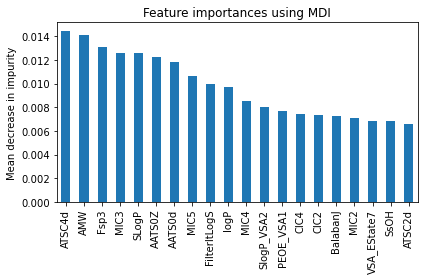

 36%|███████████████▋                           | 4/11 [10:31<18:29, 158.45s/it]

46
0
Best Threshold=0.667019
[[45 28]
 [48 83]]
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        73
           1       0.75      0.63      0.69       131

    accuracy                           0.63       204
   macro avg       0.62      0.63      0.61       204
weighted avg       0.65      0.63      0.63       204

balanced_accuracy_score  0.6250130712119628
matthews_corrcoef  0.2406464916575146
Sensitivity 0.6164383561643836
Specificity 0.6335877862595419
f1 0.6859504132231404
LR+ 1.6823630136986298
ppv 0.7477477477477478
average_precision_score 0.8145468591645169
roc_auc_score 0.6997804036390255


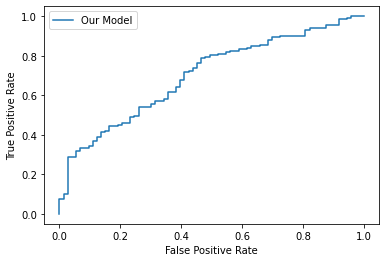

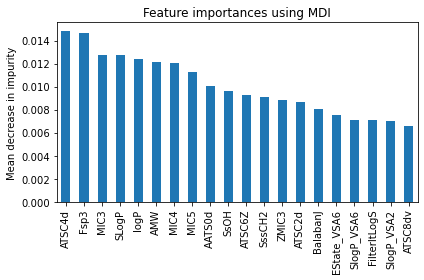

1
Best Threshold=0.664066
[[57 17]
 [42 88]]
              precision    recall  f1-score   support

           0       0.58      0.77      0.66        74
           1       0.84      0.68      0.75       130

    accuracy                           0.71       204
   macro avg       0.71      0.72      0.70       204
weighted avg       0.74      0.71      0.72       204

balanced_accuracy_score  0.7235966735966737
matthews_corrcoef  0.4302002151001614
Sensitivity 0.7702702702702703
Specificity 0.676923076923077
f1 0.748936170212766
LR+ 2.3841698841698844
ppv 0.8380952380952381
average_precision_score 0.8067547283765331
roc_auc_score 0.7352390852390852


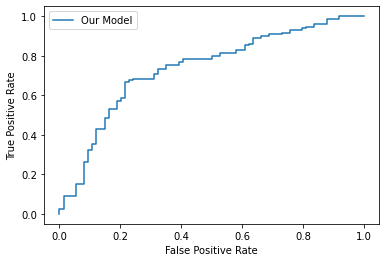

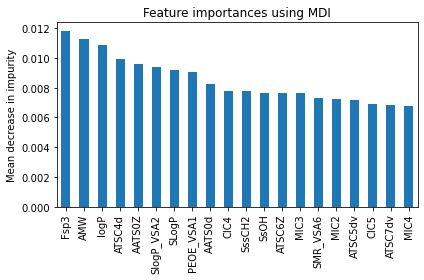

2
Best Threshold=0.611492
[[46 23]
 [46 89]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        69
           1       0.79      0.66      0.72       135

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.69      0.66      0.67       204

balanced_accuracy_score  0.662962962962963
matthews_corrcoef  0.3098898934004561
Sensitivity 0.6666666666666666
Specificity 0.6592592592592592
f1 0.7206477732793523
LR+ 1.9565217391304344
ppv 0.7946428571428571
average_precision_score 0.7880247027965052
roc_auc_score 0.7006977992485239


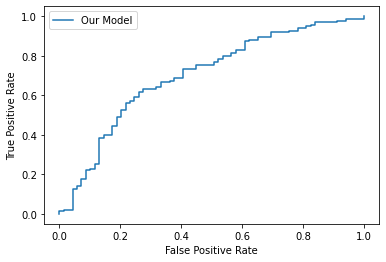

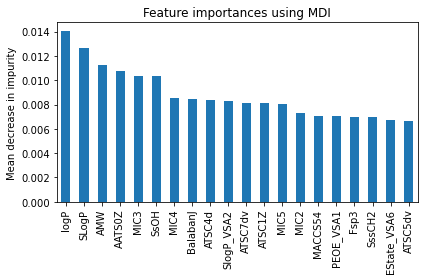

3
Best Threshold=0.632231
[[47 31]
 [35 91]]
              precision    recall  f1-score   support

           0       0.57      0.60      0.59        78
           1       0.75      0.72      0.73       126

    accuracy                           0.68       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6623931623931624
matthews_corrcoef  0.3219166704827524
Sensitivity 0.6025641025641025
Specificity 0.7222222222222222
f1 0.7338709677419354
LR+ 2.169230769230769
ppv 0.7459016393442623
average_precision_score 0.8327953721487579
roc_auc_score 0.7529507529507531


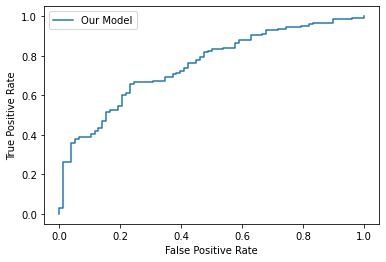

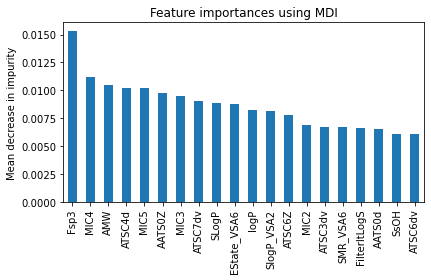

4
Best Threshold=0.564022
[[40 30]
 [51 83]]
              precision    recall  f1-score   support

           0       0.44      0.57      0.50        70
           1       0.73      0.62      0.67       134

    accuracy                           0.60       204
   macro avg       0.59      0.60      0.58       204
weighted avg       0.63      0.60      0.61       204

balanced_accuracy_score  0.5954157782515992
matthews_corrcoef  0.18226013763081608
Sensitivity 0.5714285714285714
Specificity 0.6194029850746269
f1 0.6720647773279352
LR+ 1.5014005602240896
ppv 0.7345132743362832
average_precision_score 0.7338435238905703
roc_auc_score 0.6132196162046909


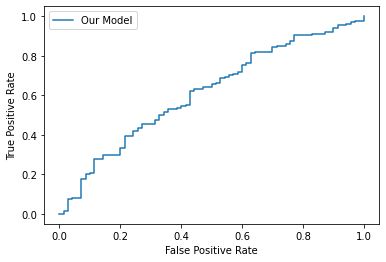

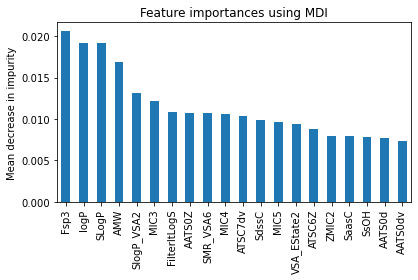

 45%|███████████████████▌                       | 5/11 [13:32<16:38, 166.44s/it]

47
0
Best Threshold=0.583547
[[56 18]
 [66 64]]
              precision    recall  f1-score   support

           0       0.46      0.76      0.57        74
           1       0.78      0.49      0.60       130

    accuracy                           0.59       204
   macro avg       0.62      0.62      0.59       204
weighted avg       0.66      0.59      0.59       204

balanced_accuracy_score  0.6245322245322246
matthews_corrcoef  0.24423755076433407
Sensitivity 0.7567567567567568
Specificity 0.49230769230769234
f1 0.6037735849056605
LR+ 1.4905814905814907
ppv 0.7804878048780488
average_precision_score 0.7915208630720563
roc_auc_score 0.6943866943866942


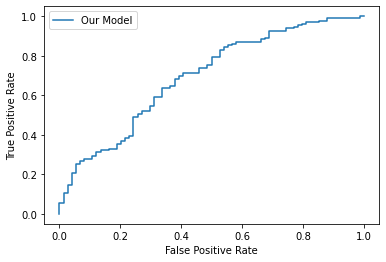

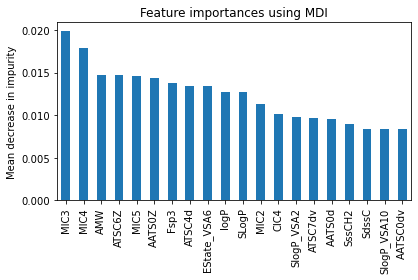

1
Best Threshold=0.660177
[[45 30]
 [42 87]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        75
           1       0.74      0.67      0.71       129

    accuracy                           0.65       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6372093023255814
matthews_corrcoef  0.2675386192605438
Sensitivity 0.6
Specificity 0.6744186046511628
f1 0.7073170731707318
LR+ 1.8428571428571427
ppv 0.7435897435897436
average_precision_score 0.7281228075005114
roc_auc_score 0.6513695090439277


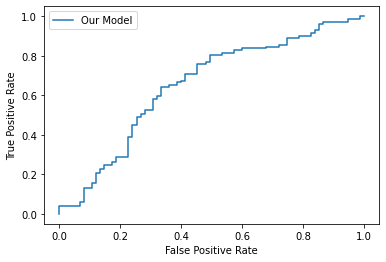

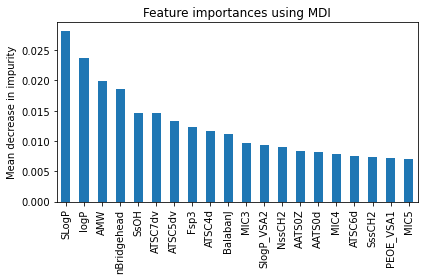

2
Best Threshold=0.581141
[[40 22]
 [57 85]]
              precision    recall  f1-score   support

           0       0.41      0.65      0.50        62
           1       0.79      0.60      0.68       142

    accuracy                           0.61       204
   macro avg       0.60      0.62      0.59       204
weighted avg       0.68      0.61      0.63       204

balanced_accuracy_score  0.6218764198091776
matthews_corrcoef  0.2244977251944793
Sensitivity 0.6451612903225806
Specificity 0.5985915492957746
f1 0.6827309236947791
LR+ 1.6072439162422183
ppv 0.794392523364486
average_precision_score 0.775510839704616
roc_auc_score 0.6284643343934575


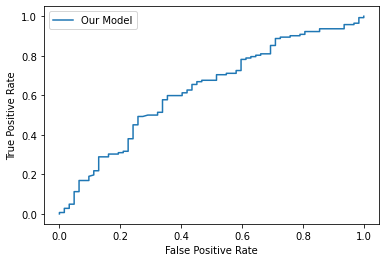

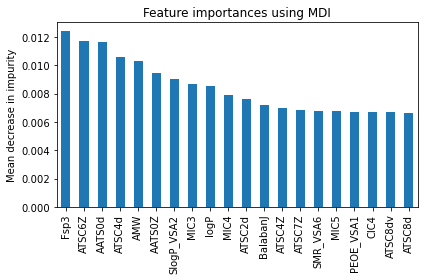

3
Best Threshold=0.644676
[[50 27]
 [32 95]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        77
           1       0.78      0.75      0.76       127

    accuracy                           0.71       204
   macro avg       0.69      0.70      0.70       204
weighted avg       0.71      0.71      0.71       204

balanced_accuracy_score  0.6986910727068207
matthews_corrcoef  0.39288797045062496
Sensitivity 0.6493506493506493
Specificity 0.7480314960629921
f1 0.7630522088353414
LR+ 2.5771103896103895
ppv 0.7786885245901639
average_precision_score 0.8366162091639655
roc_auc_score 0.7575416709274976


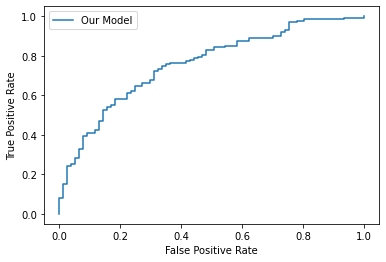

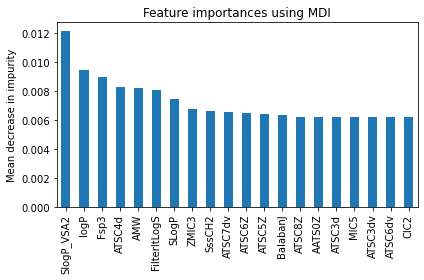

4
Best Threshold=0.659626
[[57 19]
 [34 94]]
              precision    recall  f1-score   support

           0       0.63      0.75      0.68        76
           1       0.83      0.73      0.78       128

    accuracy                           0.74       204
   macro avg       0.73      0.74      0.73       204
weighted avg       0.76      0.74      0.74       204

balanced_accuracy_score  0.7421875
matthews_corrcoef  0.4711222147213277
Sensitivity 0.75
Specificity 0.734375
f1 0.7800829875518672
LR+ 2.823529411764706
ppv 0.831858407079646
average_precision_score 0.8419224902497953
roc_auc_score 0.7688116776315789


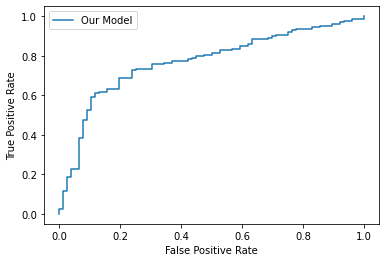

saving model


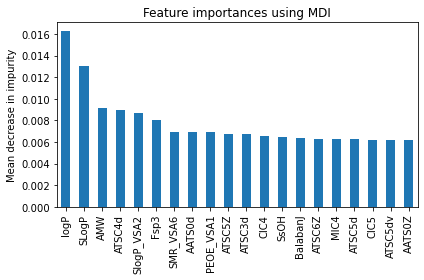

 55%|███████████████████████▍                   | 6/11 [15:52<13:07, 157.58s/it]

48
0
Best Threshold=0.595355
[[38 30]
 [42 94]]
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        68
           1       0.76      0.69      0.72       136

    accuracy                           0.65       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.625
matthews_corrcoef  0.24138377955500254
Sensitivity 0.5588235294117647
Specificity 0.6911764705882353
f1 0.7230769230769231
LR+ 1.8095238095238095
ppv 0.7580645161290323
average_precision_score 0.829298032365404
roc_auc_score 0.709666955017301


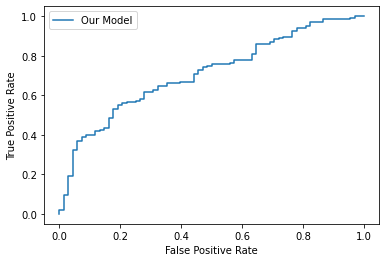

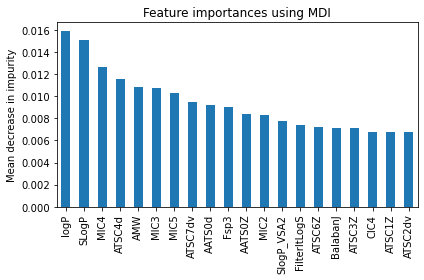

1
Best Threshold=0.618925
[[45 33]
 [40 86]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.55        78
           1       0.72      0.68      0.70       126

    accuracy                           0.64       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.65      0.64      0.64       204

balanced_accuracy_score  0.6297313797313797
matthews_corrcoef  0.2557553121569403
Sensitivity 0.5769230769230769
Specificity 0.6825396825396826
f1 0.7020408163265307
LR+ 1.8173076923076923
ppv 0.7226890756302521
average_precision_score 0.7777067264827673
roc_auc_score 0.6869658119658121


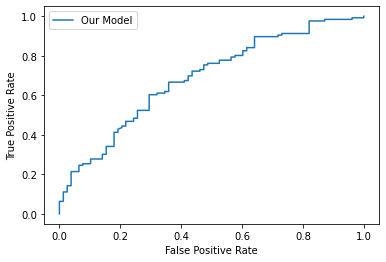

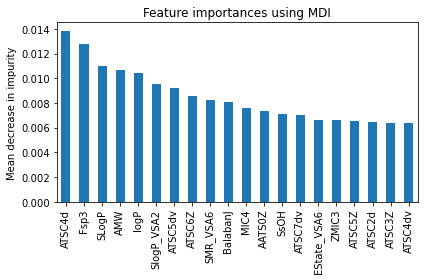

2
Best Threshold=0.595774
[[ 32  36]
 [ 32 104]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        68
           1       0.74      0.76      0.75       136

    accuracy                           0.67       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.66      0.67      0.66       204

balanced_accuracy_score  0.6176470588235294
matthews_corrcoef  0.2390457218668787
Sensitivity 0.47058823529411764
Specificity 0.7647058823529411
f1 0.7536231884057971
LR+ 1.9999999999999996
ppv 0.7428571428571429
average_precision_score 0.7793922612949014
roc_auc_score 0.6642517301038062


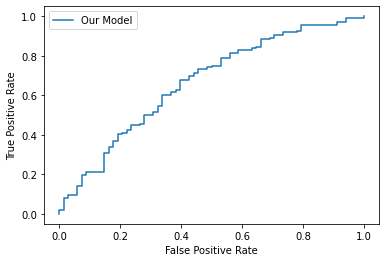

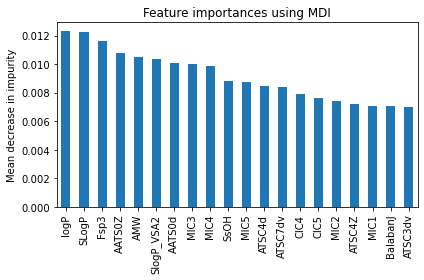

3
Best Threshold=0.652712
[[44 26]
 [62 72]]
              precision    recall  f1-score   support

           0       0.42      0.63      0.50        70
           1       0.73      0.54      0.62       134

    accuracy                           0.57       204
   macro avg       0.57      0.58      0.56       204
weighted avg       0.63      0.57      0.58       204

balanced_accuracy_score  0.5829424307036247
matthews_corrcoef  0.15763120771691083
Sensitivity 0.6285714285714286
Specificity 0.5373134328358209
f1 0.6206896551724138
LR+ 1.3585253456221198
ppv 0.7346938775510204
average_precision_score 0.7329357172944748
roc_auc_score 0.6327292110874201


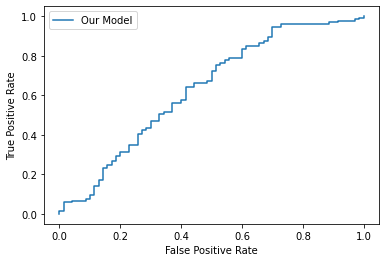

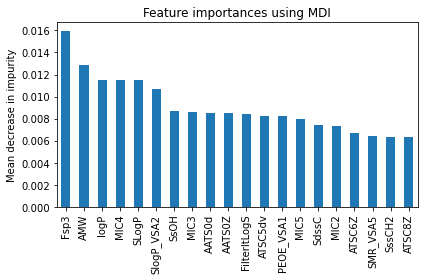

4
Best Threshold=0.662361
[[52 28]
 [44 80]]
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        80
           1       0.74      0.65      0.69       124

    accuracy                           0.65       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6475806451612903
matthews_corrcoef  0.2887139324089246
Sensitivity 0.65
Specificity 0.6451612903225806
f1 0.689655172413793
LR+ 1.8318181818181818
ppv 0.7407407407407407
average_precision_score 0.8056030871006546
roc_auc_score 0.7435483870967743


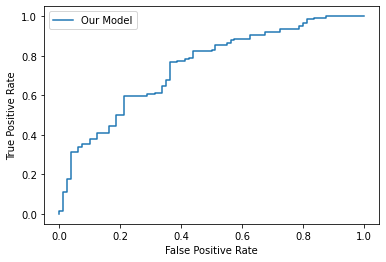

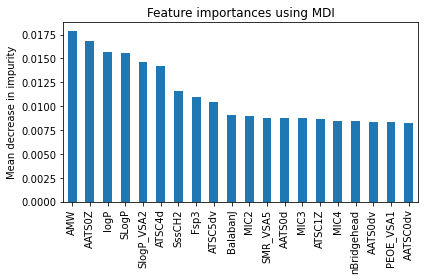

 64%|███████████████████████████▎               | 7/11 [18:05<09:58, 149.68s/it]

49
0
Best Threshold=0.564851
[[44 31]
 [36 93]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        75
           1       0.75      0.72      0.74       129

    accuracy                           0.67       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.67      0.67       204

balanced_accuracy_score  0.6537984496124031
matthews_corrcoef  0.3037747023164402
Sensitivity 0.5866666666666667
Specificity 0.7209302325581395
f1 0.7351778656126482
LR+ 2.1022222222222218
ppv 0.75
average_precision_score 0.8265914550446309
roc_auc_score 0.7167441860465116


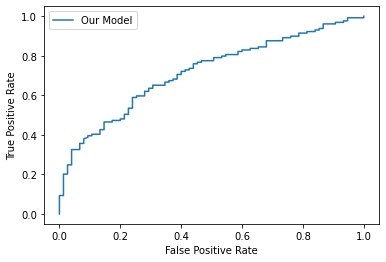

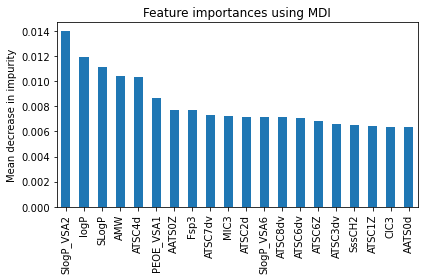

1
Best Threshold=0.629266
[[41 29]
 [50 84]]
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        70
           1       0.74      0.63      0.68       134

    accuracy                           0.61       204
   macro avg       0.60      0.61      0.59       204
weighted avg       0.64      0.61      0.62       204

balanced_accuracy_score  0.6062899786780385
matthews_corrcoef  0.20303168404237276
Sensitivity 0.5857142857142857
Specificity 0.6268656716417911
f1 0.680161943319838
LR+ 1.5697142857142858
ppv 0.7433628318584071
average_precision_score 0.7753949376656988
roc_auc_score 0.6694029850746269


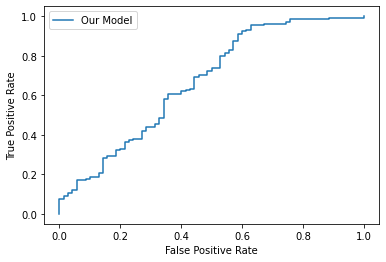

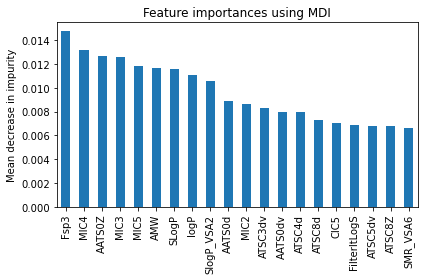

2
Best Threshold=0.647719
[[45 21]
 [49 89]]
              precision    recall  f1-score   support

           0       0.48      0.68      0.56        66
           1       0.81      0.64      0.72       138

    accuracy                           0.66       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.70      0.66      0.67       204

balanced_accuracy_score  0.663372859025033
matthews_corrcoef  0.306662835177985
Sensitivity 0.6818181818181818
Specificity 0.644927536231884
f1 0.717741935483871
LR+ 1.9202226345083486
ppv 0.8090909090909091
average_precision_score 0.7897172947746139
roc_auc_score 0.6870882740447958


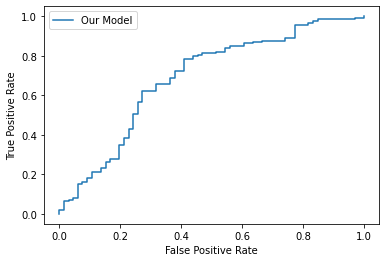

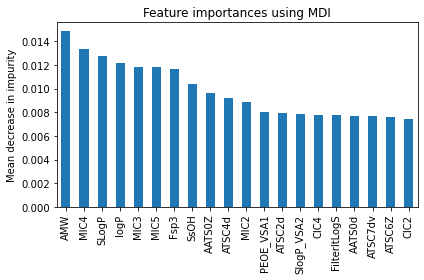

3
Best Threshold=0.541505
[[49 29]
 [38 88]]
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        78
           1       0.75      0.70      0.72       126

    accuracy                           0.67       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.68      0.67      0.67       204

balanced_accuracy_score  0.6633089133089133
matthews_corrcoef  0.3209370832425847
Sensitivity 0.6282051282051282
Specificity 0.6984126984126984
f1 0.7242798353909465
LR+ 2.0829959514170038
ppv 0.7521367521367521
average_precision_score 0.780091132130617
roc_auc_score 0.7136752136752137


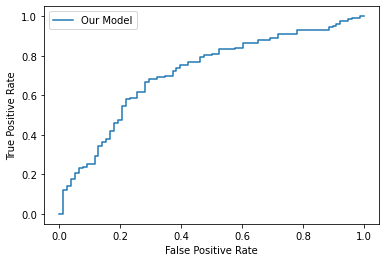

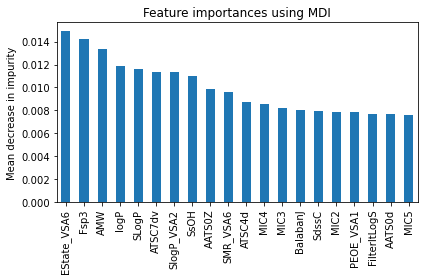

4
Best Threshold=0.659981
[[52 23]
 [45 84]]
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        75
           1       0.79      0.65      0.71       129

    accuracy                           0.67       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.69      0.67      0.67       204

balanced_accuracy_score  0.6722480620155039
matthews_corrcoef  0.33260752519319375
Sensitivity 0.6933333333333334
Specificity 0.6511627906976745
f1 0.7118644067796611
LR+ 1.987555555555556
ppv 0.7850467289719626
average_precision_score 0.7868358389745218
roc_auc_score 0.6971576227390182


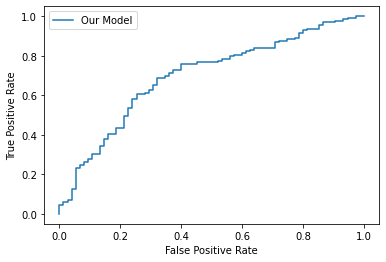

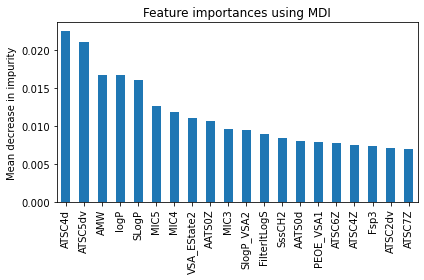

 73%|███████████████████████████████▎           | 8/11 [20:50<07:43, 154.49s/it]

50
0
Best Threshold=0.647503
[[52 31]
 [29 92]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.63        83
           1       0.75      0.76      0.75       121

    accuracy                           0.71       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.70      0.71      0.71       204

balanced_accuracy_score  0.6934183013043911
matthews_corrcoef  0.3883865901962318
Sensitivity 0.6265060240963856
Specificity 0.7603305785123967
f1 0.7540983606557377
LR+ 2.6140423764021605
ppv 0.7479674796747967
average_precision_score 0.8172708608173688
roc_auc_score 0.7636164492681469


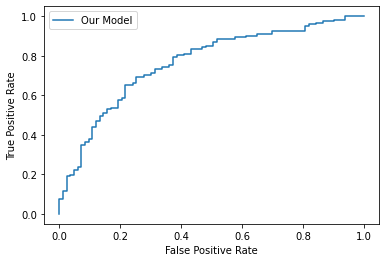

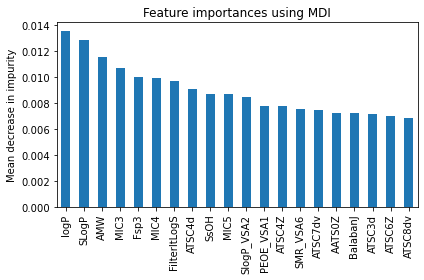

1
Best Threshold=0.614267
[[52 21]
 [51 80]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        73
           1       0.79      0.61      0.69       131

    accuracy                           0.65       204
   macro avg       0.65      0.66      0.64       204
weighted avg       0.69      0.65      0.65       204

balanced_accuracy_score  0.6615078950120254
matthews_corrcoef  0.30970023234053995
Sensitivity 0.7123287671232876
Specificity 0.6106870229007634
f1 0.6896551724137931
LR+ 1.8297072253558957
ppv 0.7920792079207921
average_precision_score 0.8262915120535597
roc_auc_score 0.7489281606190527


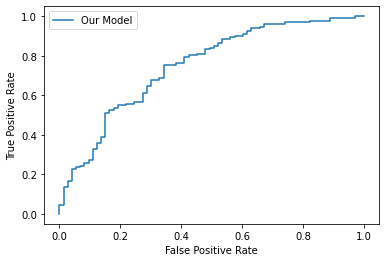

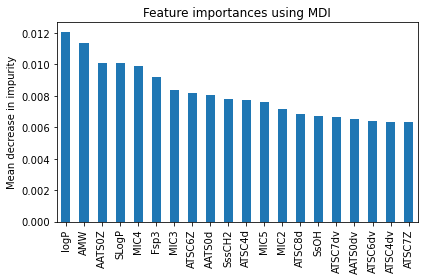

2
Best Threshold=0.645595
[[43 25]
 [37 99]]
              precision    recall  f1-score   support

           0       0.54      0.63      0.58        68
           1       0.80      0.73      0.76       136

    accuracy                           0.70       204
   macro avg       0.67      0.68      0.67       204
weighted avg       0.71      0.70      0.70       204

balanced_accuracy_score  0.6801470588235294
matthews_corrcoef  0.3478766234763272
Sensitivity 0.6323529411764706
Specificity 0.7279411764705882
f1 0.7615384615384615
LR+ 2.324324324324324
ppv 0.7983870967741935
average_precision_score 0.7618809497195589
roc_auc_score 0.6734429065743943


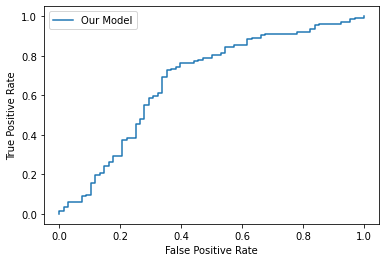

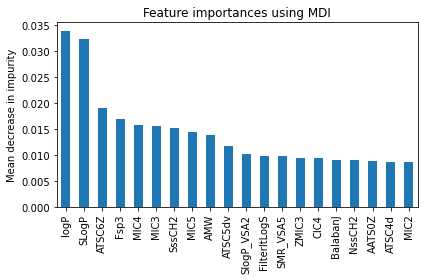

3
Best Threshold=0.633388
[[52 22]
 [43 87]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        74
           1       0.80      0.67      0.73       130

    accuracy                           0.68       204
   macro avg       0.67      0.69      0.67       204
weighted avg       0.71      0.68      0.69       204

balanced_accuracy_score  0.685966735966736
matthews_corrcoef  0.35849058027326297
Sensitivity 0.7027027027027027
Specificity 0.6692307692307692
f1 0.7280334728033473
LR+ 2.1244500314267754
ppv 0.7981651376146789
average_precision_score 0.8163201944775735
roc_auc_score 0.7246361746361747


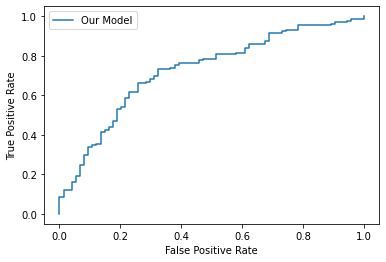

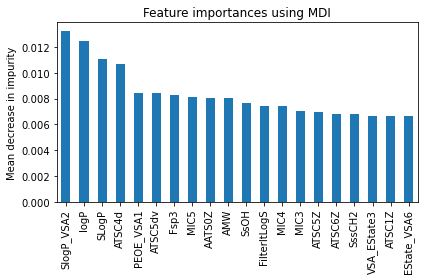

4
Best Threshold=0.698002
[[47 19]
 [57 81]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        66
           1       0.81      0.59      0.68       138

    accuracy                           0.63       204
   macro avg       0.63      0.65      0.62       204
weighted avg       0.69      0.63      0.64       204

balanced_accuracy_score  0.6495388669301714
matthews_corrcoef  0.2798845481477712
Sensitivity 0.7121212121212122
Specificity 0.5869565217391305
f1 0.680672268907563
LR+ 1.7240829346092508
ppv 0.81
average_precision_score 0.817339394747412
roc_auc_score 0.6809398331137462


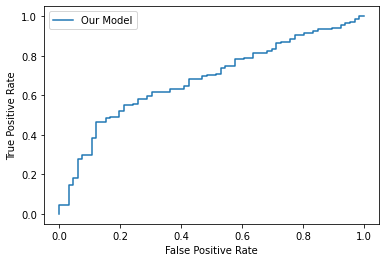

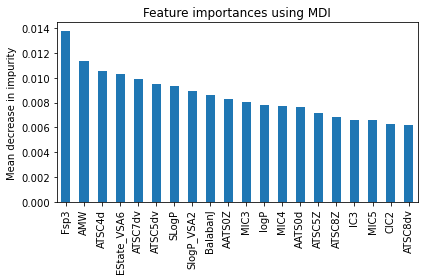

 82%|███████████████████████████████████▏       | 9/11 [23:23<05:07, 153.97s/it]

51
0
Best Threshold=0.623898
[[37 40]
 [33 94]]
              precision    recall  f1-score   support

           0       0.53      0.48      0.50        77
           1       0.70      0.74      0.72       127

    accuracy                           0.64       204
   macro avg       0.62      0.61      0.61       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.6103384804172206
matthews_corrcoef  0.22532158527089627
Sensitivity 0.4805194805194805
Specificity 0.7401574803149606
f1 0.7203065134099617
LR+ 1.8492719401810311
ppv 0.7014925373134329
average_precision_score 0.7826525818748861
roc_auc_score 0.6856529297474179


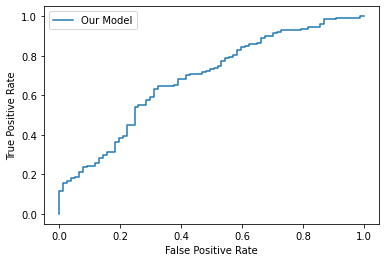

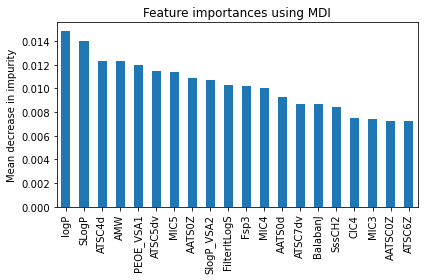

1
Best Threshold=0.638872
[[45 29]
 [51 79]]
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        74
           1       0.73      0.61      0.66       130

    accuracy                           0.61       204
   macro avg       0.60      0.61      0.60       204
weighted avg       0.64      0.61      0.62       204

balanced_accuracy_score  0.6079002079002078
matthews_corrcoef  0.20787024067922028
Sensitivity 0.6081081081081081
Specificity 0.6076923076923076
f1 0.6638655462184874
LR+ 1.5500794912559617
ppv 0.7314814814814815
average_precision_score 0.7570798438773441
roc_auc_score 0.6586278586278586


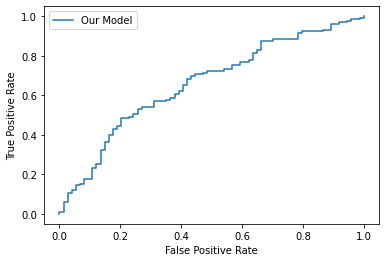

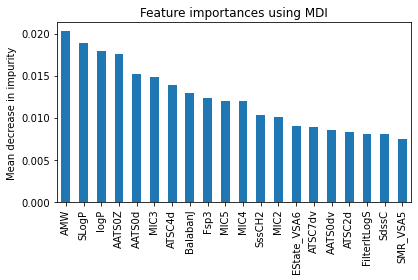

2
Best Threshold=0.655959
[[55  9]
 [51 89]]
              precision    recall  f1-score   support

           0       0.52      0.86      0.65        64
           1       0.91      0.64      0.75       140

    accuracy                           0.71       204
   macro avg       0.71      0.75      0.70       204
weighted avg       0.79      0.71      0.72       204

balanced_accuracy_score  0.7475446428571428
matthews_corrcoef  0.45980274765691287
Sensitivity 0.859375
Specificity 0.6357142857142857
f1 0.7478991596638656
LR+ 2.3590686274509802
ppv 0.9081632653061225
average_precision_score 0.8946286437279858
roc_auc_score 0.80703125


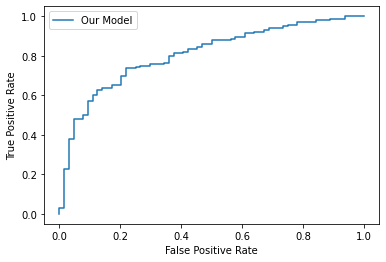

saving model


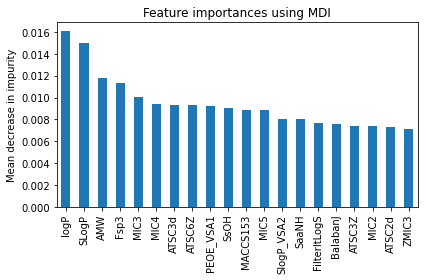

3
Best Threshold=0.631777
[[42 27]
 [40 95]]
              precision    recall  f1-score   support

           0       0.51      0.61      0.56        69
           1       0.78      0.70      0.74       135

    accuracy                           0.67       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.69      0.67      0.68       204

balanced_accuracy_score  0.6561996779388084
matthews_corrcoef  0.3014496041046671
Sensitivity 0.6086956521739131
Specificity 0.7037037037037037
f1 0.7392996108949416
LR+ 2.054347826086957
ppv 0.7786885245901639
average_precision_score 0.7528352175634643
roc_auc_score 0.6523886205045625


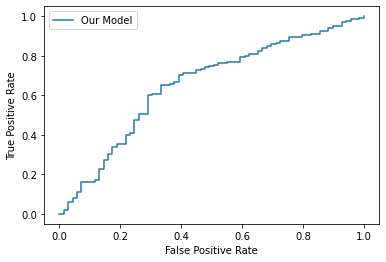

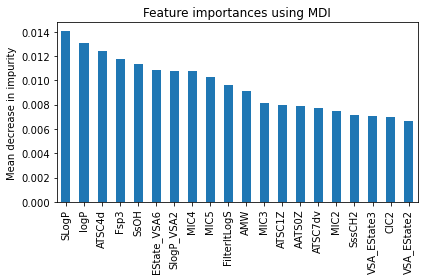

4
Best Threshold=0.636312
[[59 21]
 [56 68]]
              precision    recall  f1-score   support

           0       0.51      0.74      0.61        80
           1       0.76      0.55      0.64       124

    accuracy                           0.62       204
   macro avg       0.64      0.64      0.62       204
weighted avg       0.67      0.62      0.63       204

balanced_accuracy_score  0.6429435483870968
matthews_corrcoef  0.2814533789786621
Sensitivity 0.7375
Specificity 0.5483870967741935
f1 0.6384976525821595
LR+ 1.6330357142857141
ppv 0.7640449438202247
average_precision_score 0.7444792527644304
roc_auc_score 0.6944556451612903


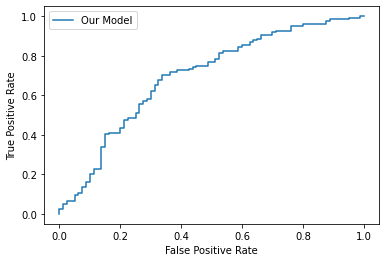

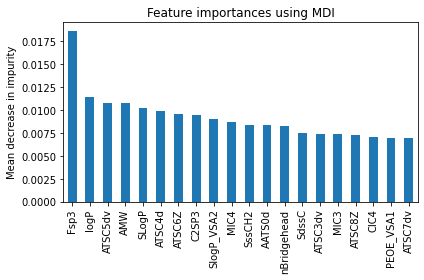

 91%|██████████████████████████████████████▏   | 10/11 [25:55<02:33, 153.25s/it]

52
0
Best Threshold=0.676034
[[45 21]
 [58 80]]
              precision    recall  f1-score   support

           0       0.44      0.68      0.53        66
           1       0.79      0.58      0.67       138

    accuracy                           0.61       204
   macro avg       0.61      0.63      0.60       204
weighted avg       0.68      0.61      0.63       204

balanced_accuracy_score  0.630764163372859
matthews_corrcoef  0.2447095660780484
Sensitivity 0.6818181818181818
Specificity 0.5797101449275363
f1 0.6694560669456067
LR+ 1.622257053291536
ppv 0.7920792079207921
average_precision_score 0.8134500067832364
roc_auc_score 0.6875274483970135


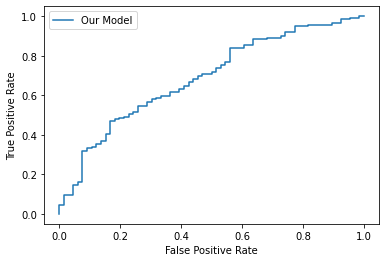

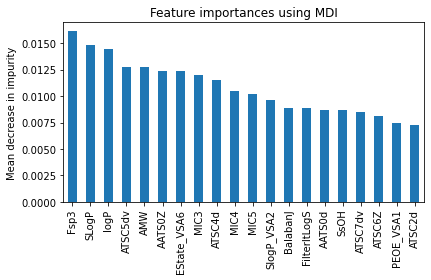

1
Best Threshold=0.603359
[[55 19]
 [56 74]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.59        74
           1       0.80      0.57      0.66       130

    accuracy                           0.63       204
   macro avg       0.65      0.66      0.63       204
weighted avg       0.69      0.63      0.64       204

balanced_accuracy_score  0.6562370062370062
matthews_corrcoef  0.3016466291843386
Sensitivity 0.7432432432432432
Specificity 0.5692307692307692
f1 0.6636771300448431
LR+ 1.7253861003861002
ppv 0.7956989247311828
average_precision_score 0.856255992698439
roc_auc_score 0.7679833679833679


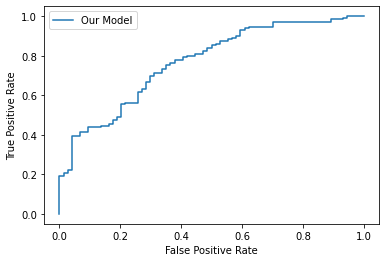

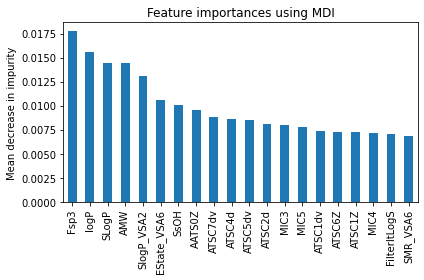

2
Best Threshold=0.626363
[[49 31]
 [38 86]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.59        80
           1       0.74      0.69      0.71       124

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.6530241935483871
matthews_corrcoef  0.3021296683532489
Sensitivity 0.6125
Specificity 0.6935483870967742
f1 0.7136929460580913
LR+ 1.9986842105263163
ppv 0.7350427350427351
average_precision_score 0.732262862189755
roc_auc_score 0.6785282258064516


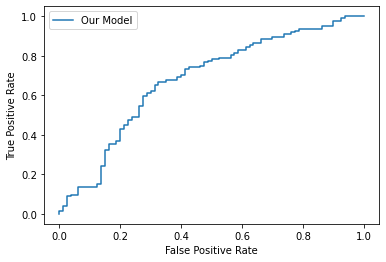

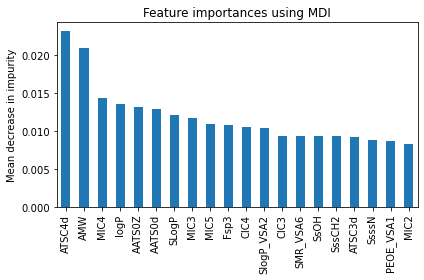

3
Best Threshold=0.657120
[[53 18]
 [58 75]]
              precision    recall  f1-score   support

           0       0.48      0.75      0.58        71
           1       0.81      0.56      0.66       133

    accuracy                           0.63       204
   macro avg       0.64      0.66      0.62       204
weighted avg       0.69      0.63      0.64       204

balanced_accuracy_score  0.6551943238377634
matthews_corrcoef  0.29686422216058456
Sensitivity 0.7464788732394366
Specificity 0.5639097744360902
f1 0.663716814159292
LR+ 1.7117532782904323
ppv 0.8064516129032258
average_precision_score 0.8097720724170432
roc_auc_score 0.6962829609234354


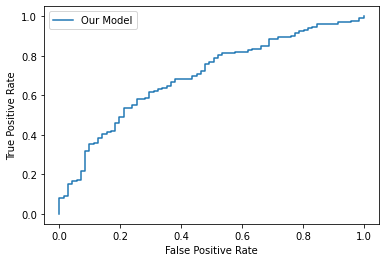

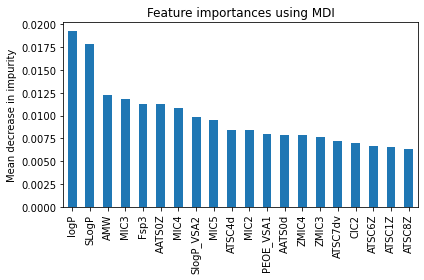

4
Best Threshold=0.631337
[[ 41  32]
 [ 26 105]]
              precision    recall  f1-score   support

           0       0.61      0.56      0.59        73
           1       0.77      0.80      0.78       131

    accuracy                           0.72       204
   macro avg       0.69      0.68      0.68       204
weighted avg       0.71      0.72      0.71       204

balanced_accuracy_score  0.6815852765868451
matthews_corrcoef  0.37068927461243717
Sensitivity 0.5616438356164384
Specificity 0.8015267175572519
f1 0.7835820895522388
LR+ 2.8298208640674396
ppv 0.7664233576642335
average_precision_score 0.828215016496687
roc_auc_score 0.7369026456133013


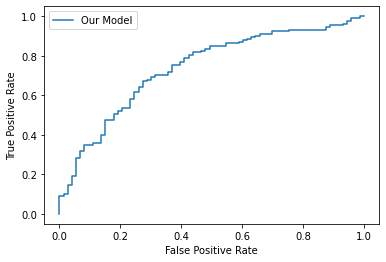

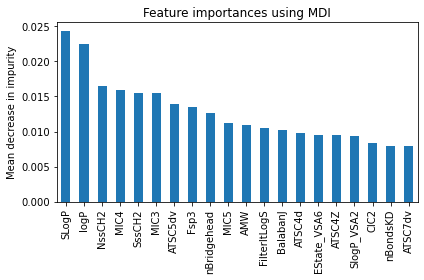

100%|██████████████████████████████████████████| 11/11 [28:53<00:00, 157.60s/it]


In [102]:
#Models to predict DILI with Morgan, MACCS, Mordred and Physicochemical 
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
            # save
            print("saving model")
            baseline=auc
            pickle.dump(classifier, open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [103]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "Morgan, MACCS, Mordred, Phisicochemical"
results.to_csv("NCV_models_MfpMACCSMordredPhyscochemical.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.654419  0.300666     0.626667     0.682171   
1   NCV  DILI  42      1  0.661765  0.306816     0.661765     0.661765   
2   NCV  DILI  42      2  0.694901  0.381069     0.671053     0.718750   
3   NCV  DILI  42      3  0.572650  0.141220     0.589744     0.555556   
4   NCV  DILI  42      4  0.665269  0.311428     0.761194     0.569343   
5   NCV  DILI  43      0  0.663203  0.298165     0.655172     0.671233   
6   NCV  DILI  43      1  0.707747  0.404812     0.759494     0.656000   
7   NCV  DILI  43      2  0.629510  0.248342     0.671233     0.587786   
8   NCV  DILI  43      3  0.641026  0.276050     0.615385     0.666667   
9   NCV  DILI  43      4  0.620066  0.236796     0.552632     0.687500   
10  NCV  DILI  44      0  0.613369  0.222750     0.592593     0.634146   
11  NCV  DILI  44      1  0.686223  0.355255     0.718310     0.654135   
12  NCV  DILI  44      2  0.621429  0.239046     0.500000     0.742857   
13  NCV  DILI  44      3  0.617886  0.230999     0.666667     0.569106   
14  NCV  DILI  44      4  0.648872  0.285790     0.597015     0.700730   
15  NCV  DILI  45      0  0.587323  0.171732     0.654321     0.520325   
16  NCV  DILI  45      1  0.671783  0.331885     0.746667     0.596899   
17  NCV  DILI  45      2  0.660548  0.321095     0.550725     0.770370   
18  NCV  DILI  45      3  0.619646  0.230455     0.565217     0.674074   
19  NCV  DILI  45      4  0.637740  0.277439     0.514286     0.761194   
20  NCV  DILI  46      0  0.625013  0.240646     0.616438     0.633588   
21  NCV  DILI  46      1  0.723597  0.430200     0.770270     0.676923   
22  NCV  DILI  46      2  0.662963  0.309890     0.666667     0.659259   
23  NCV  DILI  46      3  0.662393  0.321917     0.602564     0.722222   
24  NCV  DILI  46      4  0.595416  0.182260     0.571429     0.619403   
25  NCV  DILI  47      0  0.624532  0.244238     0.756757     0.492308   
26  NCV  DILI  47      1  0.637209  0.267539     0.600000     0.674419   
27  NCV  DILI  47      2  0.621876  0.224498     0.645161     0.598592   
28  NCV  DILI  47      3  0.698691  0.392888     0.649351     0.748031   
29  NCV  DILI  47      4  0.742188  0.471122     0.750000     0.734375   
30  NCV  DILI  48      0  0.625000  0.241384     0.558824     0.691176   
31  NCV  DILI  48      1  0.629731  0.255755     0.576923     0.682540   
32  NCV  DILI  48      2  0.617647  0.239046     0.470588     0.764706   
33  NCV  DILI  48      3  0.582942  0.157631     0.628571     0.537313   
34  NCV  DILI  48      4  0.647581  0.288714     0.650000     0.645161   
35  NCV  DILI  49      0  0.653798  0.303775     0.586667     0.720930   
36  NCV  DILI  49      1  0.606290  0.203032     0.585714     0.626866   
37  NCV  DILI  49      2  0.663373  0.306663     0.681818     0.644928   
38  NCV  DILI  49      3  0.663309  0.320937     0.628205     0.698413   
39  NCV  DILI  49      4  0.672248  0.332608     0.693333     0.651163   
40  NCV  DILI  50      0  0.693418  0.388387     0.626506     0.760331   
41  NCV  DILI  50      1  0.661508  0.309700     0.712329     0.610687   
42  NCV  DILI  50      2  0.680147  0.347877     0.632353     0.727941   
43  NCV  DILI  50      3  0.685967  0.358491     0.702703     0.669231   
44  NCV  DILI  50      4  0.649539  0.279885     0.712121     0.586957   
45  NCV  DILI  51      0  0.610338  0.225322     0.480519     0.740157   
46  NCV  DILI  51      1  0.607900  0.207870     0.608108     0.607692   
47  NCV  DILI  51      2  0.747545  0.459803     0.859375     0.635714   
48  NCV  DILI  51      3  0.656200  0.301450     0.608696     0.703704   
49  NCV  DILI  51      4  0.642944  0.281453     0.737500     0.548387   
50  NCV  DILI  52      0  0.630764  0.244710     0.681818     0.579710   
51  NCV  DILI  52      1  0.656237  0.301647     0.743243     0.569231   
52  NCV  DILI  52      2  0.653024  0.302130     0.612500     0.693548   
53  NCV 

In [104]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.649881   0.290597     0.643369     0.656394   
std     3.191424   1.427248   0.036810   0.070905     0.079993     0.070715   
min    42.000000   0.000000   0.572650   0.141220     0.470588     0.492308   
25%    44.000000   1.000000   0.623204   0.239846     0.591168     0.603142   
50%    47.000000   2.000000   0.653024   0.296864     0.632353     0.661765   
75%    50.000000   3.000000   0.664321   0.321506     0.698018     0.702217   
max    52.000000   4.000000   0.747545   0.471122     0.859375     0.801527   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.702203   0.705982   1.927328   0.769599                 0.796189  
std     0.042662   0.044776   0.345467   0.041119                 0.043143  
min     0.613220   0.595349   1.326923   0.686275                 0.693982  
25%     0.677462   0.677743   1.697058   0.743110                 0.771596  
50%     0.697158   0.713693   1.852308   0.764706                 0.805603  
75%     0.735861   0.738881   2.092609   0.796080                 0.826441  
max     0.807031   0.783582   2.829821   0.908163                 0.894629

In [105]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, max_depth=11, max_features=32,
                       min_samples_leaf=11, min_samples_split=5,
                       n_estimators=200, n_jobs=40, random_state=42)

Best Threshold=0.658761
[[ 67  24]
 [ 63 101]]
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        91
           1       0.81      0.62      0.70       164

    accuracy                           0.66       255
   macro avg       0.66      0.68      0.65       255
weighted avg       0.70      0.66      0.67       255

balanced_accuracy_score  0.6760586974001608
matthews_corrcoef  0.33744532636819075
Sensitivity 0.7362637362637363
Specificity 0.6158536585365854
f1 0.6989619377162629
LR+ 1.9166230594802025
ppv 0.808
average_precision_score 0.8206920887883284
roc_auc_score 0.7448405253283302


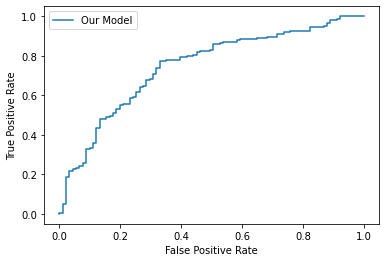

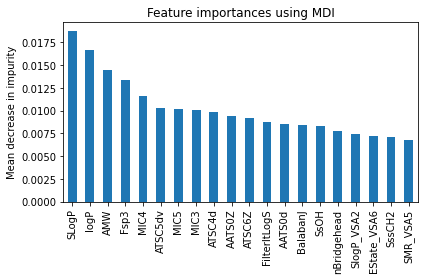

In [106]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [107]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMfpMACCSMordredPhyscochemical_model.sav",  'wb'))

In [52]:
#Models using just liv data preds

In [108]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[[2, 3,  5, 6, 7, 8, 10, 11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [109]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [110]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [111]:
test_feature_list = list(test_feature_list)
test_feature_list

[2,
 3,
 5,
 6,
 7,
 8,
 10,
 11,
 14,
 15,
 16,
 'median pMolar unbound plasma concentration',
 'median pMolar total plasma concentration']

In [112]:
len(test_feature_list)

13

In [113]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(1020, 13)
(255, 13)
1020
255
(1275, 13)
1275


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.654766
[[50 25]
 [51 78]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        75
           1       0.76      0.60      0.67       129

    accuracy                           0.63       204
   macro avg       0.63      0.64      0.62       204
weighted avg       0.66      0.63      0.63       204

balanced_accuracy_score  0.6356589147286822
matthews_corrcoef  0.26165227890429127
Sensitivity 0.6666666666666666
Specificity 0.6046511627906976
f1 0.6724137931034483
LR+ 1.6862745098039214
ppv 0.7572815533980582
average_precision_score 0.8073724829364473
roc_auc_score 0.7079069767441861


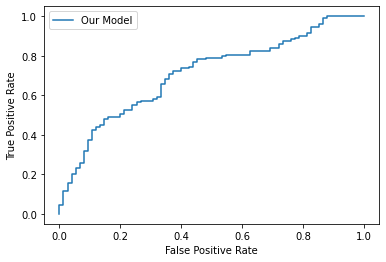

saving model


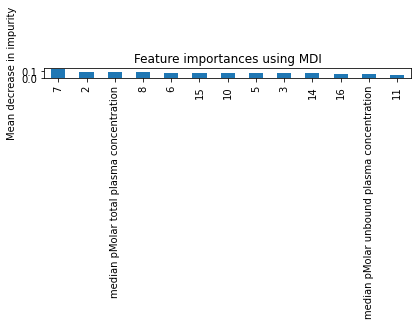

1
Best Threshold=0.582002
[[ 34  34]
 [ 26 110]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        68
           1       0.76      0.81      0.79       136

    accuracy                           0.71       204
   macro avg       0.67      0.65      0.66       204
weighted avg       0.70      0.71      0.70       204

balanced_accuracy_score  0.6544117647058824
matthews_corrcoef  0.3195048252113469
Sensitivity 0.5
Specificity 0.8088235294117647
f1 0.7857142857142858
LR+ 2.6153846153846154
ppv 0.7638888888888888
average_precision_score 0.8190992781915709
roc_auc_score 0.7094506920415224


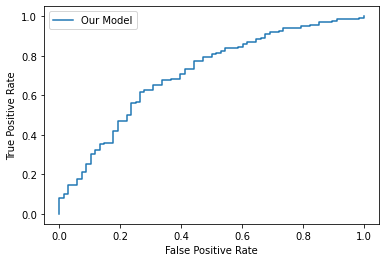

saving model


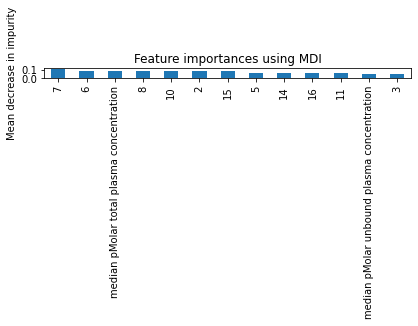

2
Best Threshold=0.513349
[[ 39  37]
 [ 27 101]]
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        76
           1       0.73      0.79      0.76       128

    accuracy                           0.69       204
   macro avg       0.66      0.65      0.65       204
weighted avg       0.68      0.69      0.68       204

balanced_accuracy_score  0.651110197368421
matthews_corrcoef  0.3123374343124655
Sensitivity 0.5131578947368421
Specificity 0.7890625
f1 0.7593984962406015
LR+ 2.432748538011696
ppv 0.7318840579710145
average_precision_score 0.7897766051125523
roc_auc_score 0.7325246710526315


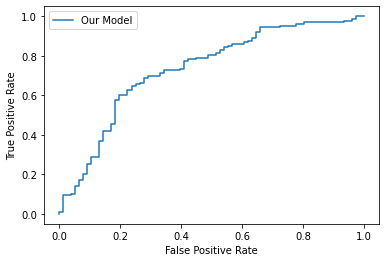

saving model


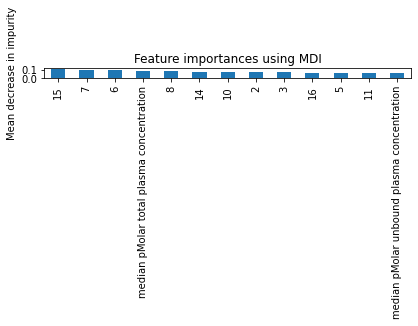

3
Best Threshold=0.594961
[[37 41]
 [33 93]]
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        78
           1       0.69      0.74      0.72       126

    accuracy                           0.64       204
   macro avg       0.61      0.61      0.61       204
weighted avg       0.63      0.64      0.63       204

balanced_accuracy_score  0.6062271062271063
matthews_corrcoef  0.2174685712666121
Sensitivity 0.47435897435897434
Specificity 0.7380952380952381
f1 0.7153846153846155
LR+ 1.8111888111888115
ppv 0.6940298507462687
average_precision_score 0.6993935285594839
roc_auc_score 0.632987382987383


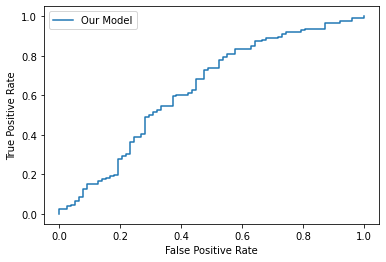

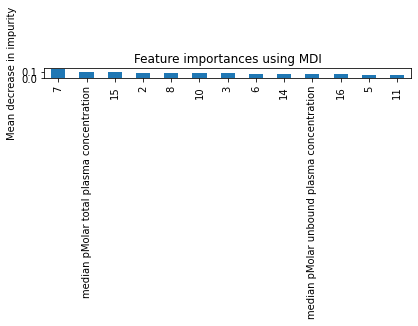

4
Best Threshold=0.542162
[[ 33  34]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.52      0.49      0.51        67
           1       0.76      0.78      0.77       137

    accuracy                           0.69       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.68      0.69      0.68       204

balanced_accuracy_score  0.6367796056215274
matthews_corrcoef  0.2780796426864221
Sensitivity 0.4925373134328358
Specificity 0.781021897810219
f1 0.7697841726618706
LR+ 2.249253731343284
ppv 0.7588652482269503
average_precision_score 0.8611878198290046
roc_auc_score 0.7219740712495915


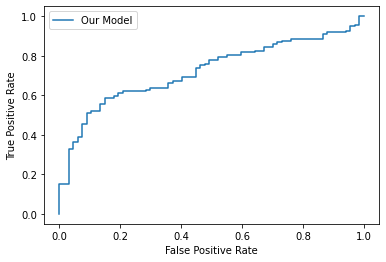

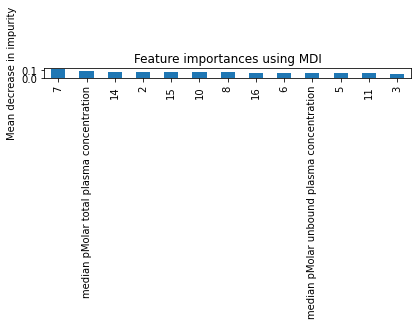

  9%|███▉                                       | 1/11 [02:19<23:14, 139.46s/it]

43
0
Best Threshold=0.541525
[[ 26  32]
 [ 30 116]]
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        58
           1       0.78      0.79      0.79       146

    accuracy                           0.70       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.69      0.70      0.69       204

balanced_accuracy_score  0.6213982050070854
matthews_corrcoef  0.24541879220078372
Sensitivity 0.4482758620689655
Specificity 0.7945205479452054
f1 0.7891156462585033
LR+ 2.1816091954022983
ppv 0.7837837837837838
average_precision_score 0.8559148148965938
roc_auc_score 0.701700519603212


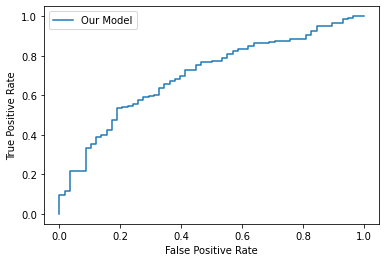

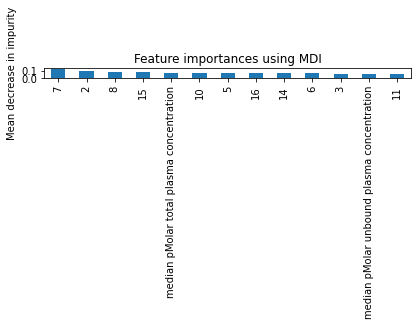

1
Best Threshold=0.649945
[[54 25]
 [44 81]]
              precision    recall  f1-score   support

           0       0.55      0.68      0.61        79
           1       0.76      0.65      0.70       125

    accuracy                           0.66       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6657721518987342
matthews_corrcoef  0.32325418223079316
Sensitivity 0.6835443037974683
Specificity 0.648
f1 0.7012987012987013
LR+ 1.9418872266973533
ppv 0.7641509433962265
average_precision_score 0.7913491528341621
roc_auc_score 0.7160506329113924


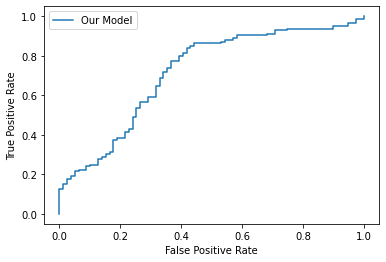

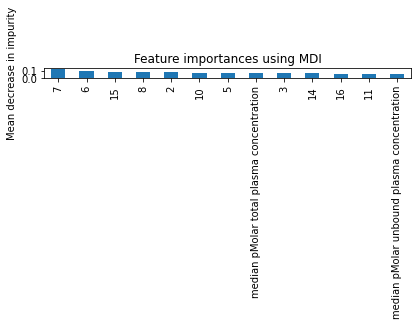

2
Best Threshold=0.578390
[[54 19]
 [47 84]]
              precision    recall  f1-score   support

           0       0.53      0.74      0.62        73
           1       0.82      0.64      0.72       131

    accuracy                           0.68       204
   macro avg       0.68      0.69      0.67       204
weighted avg       0.72      0.68      0.68       204

balanced_accuracy_score  0.6904737007215309
matthews_corrcoef  0.36524375086325256
Sensitivity 0.7397260273972602
Specificity 0.6412213740458015
f1 0.717948717948718
LR+ 2.061789565724278
ppv 0.8155339805825242
average_precision_score 0.7957209397532112
roc_auc_score 0.7153612882986512


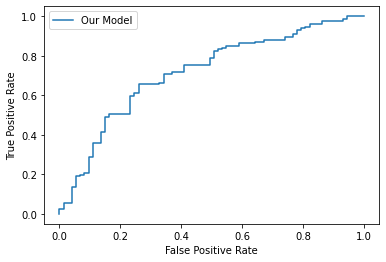

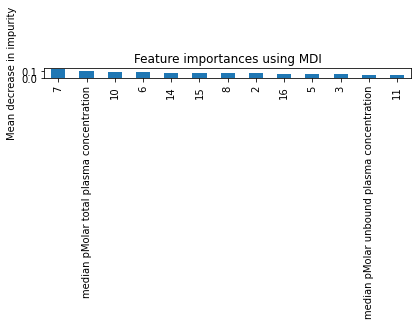

3
Best Threshold=0.476190
[[34 44]
 [38 88]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        78
           1       0.67      0.70      0.68       126

    accuracy                           0.60       204
   macro avg       0.57      0.57      0.57       204
weighted avg       0.59      0.60      0.59       204

balanced_accuracy_score  0.5671550671550671
matthews_corrcoef  0.13658032552623378
Sensitivity 0.4358974358974359
Specificity 0.6984126984126984
f1 0.6821705426356589
LR+ 1.4453441295546556
ppv 0.6666666666666666
average_precision_score 0.703786519497041
roc_auc_score 0.6024114774114774


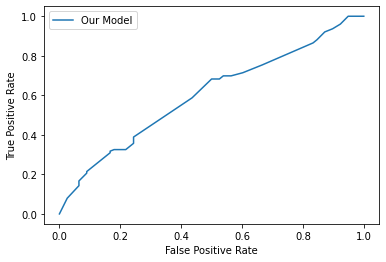

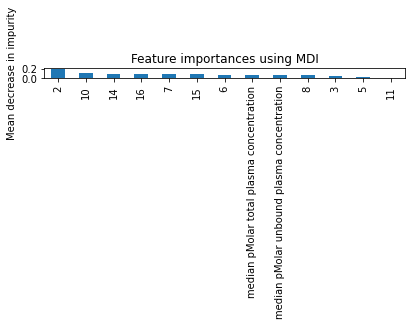

4
Best Threshold=0.616456
[[40 36]
 [37 91]]
              precision    recall  f1-score   support

           0       0.52      0.53      0.52        76
           1       0.72      0.71      0.71       128

    accuracy                           0.64       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.618626644736842
matthews_corrcoef  0.23663381227348135
Sensitivity 0.5263157894736842
Specificity 0.7109375
f1 0.7137254901960783
LR+ 1.82076813655761
ppv 0.7165354330708661
average_precision_score 0.7443014896265403
roc_auc_score 0.6717722039473685


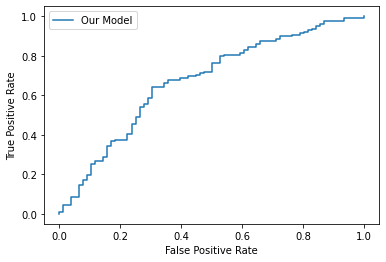

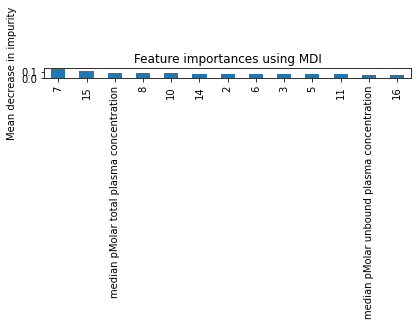

 18%|███████▊                                   | 2/11 [04:37<20:49, 138.80s/it]

44
0
Best Threshold=0.645347
[[50 31]
 [39 84]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        81
           1       0.73      0.68      0.71       123

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.66      0.66      0.66       204

balanced_accuracy_score  0.6501053899427883
matthews_corrcoef  0.2961947963176977
Sensitivity 0.6172839506172839
Specificity 0.6829268292682927
f1 0.7058823529411765
LR+ 1.9468186134852803
ppv 0.7304347826086957
average_precision_score 0.7683167701790717
roc_auc_score 0.6898524540800962


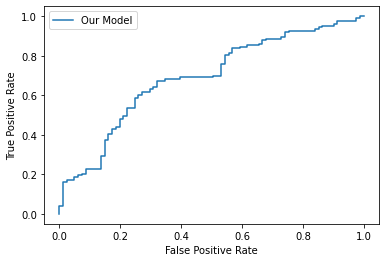

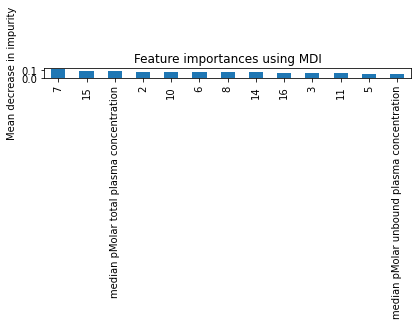

1
Best Threshold=0.569789
[[50 21]
 [46 87]]
              precision    recall  f1-score   support

           0       0.52      0.70      0.60        71
           1       0.81      0.65      0.72       133

    accuracy                           0.67       204
   macro avg       0.66      0.68      0.66       204
weighted avg       0.71      0.67      0.68       204

balanced_accuracy_score  0.6791803452292704
matthews_corrcoef  0.34200138534839025
Sensitivity 0.704225352112676
Specificity 0.6541353383458647
f1 0.7219917012448134
LR+ 2.0361298224127373
ppv 0.8055555555555556
average_precision_score 0.8326588241943174
roc_auc_score 0.7428783225669808


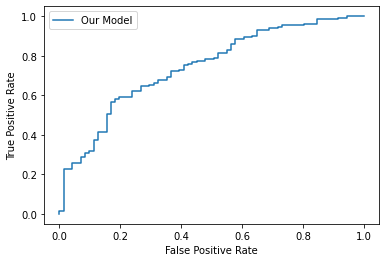

saving model


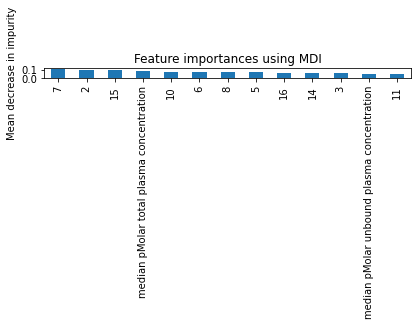

2
Best Threshold=0.528602
[[41 23]
 [45 95]]
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        64
           1       0.81      0.68      0.74       140

    accuracy                           0.67       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.70      0.67      0.68       204

balanced_accuracy_score  0.6595982142857143
matthews_corrcoef  0.29993130630463505
Sensitivity 0.640625
Specificity 0.6785714285714286
f1 0.7364341085271318
LR+ 1.9930555555555558
ppv 0.8050847457627118
average_precision_score 0.8559820493273713
roc_auc_score 0.7260044642857142


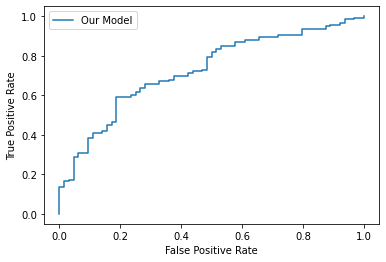

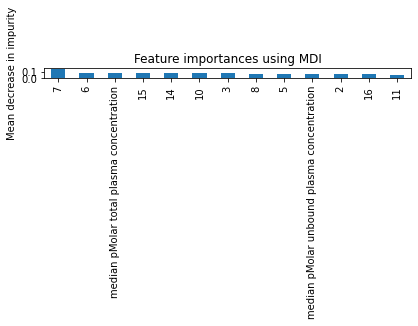

3
Best Threshold=0.704394
[[52 29]
 [60 63]]
              precision    recall  f1-score   support

           0       0.46      0.64      0.54        81
           1       0.68      0.51      0.59       123

    accuracy                           0.56       204
   macro avg       0.57      0.58      0.56       204
weighted avg       0.60      0.56      0.57       204

balanced_accuracy_score  0.5770852152965974
matthews_corrcoef  0.15159791404185846
Sensitivity 0.6419753086419753
Specificity 0.5121951219512195
f1 0.586046511627907
LR+ 1.3160493827160493
ppv 0.6847826086956522
average_precision_score 0.7067769648407829
roc_auc_score 0.6449864498644986


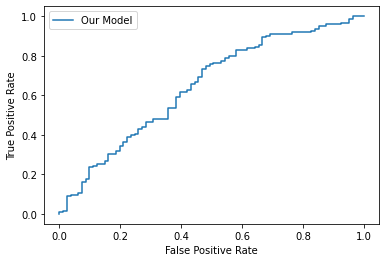

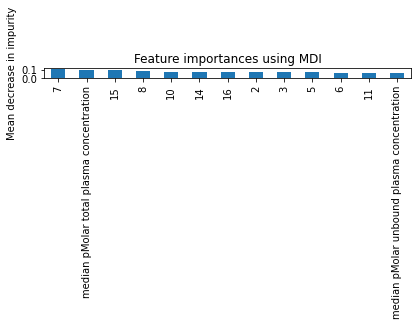

4
Best Threshold=0.567347
[[ 48  19]
 [ 35 102]]
              precision    recall  f1-score   support

           0       0.58      0.72      0.64        67
           1       0.84      0.74      0.79       137

    accuracy                           0.74       204
   macro avg       0.71      0.73      0.72       204
weighted avg       0.76      0.74      0.74       204

balanced_accuracy_score  0.7304717289465084
matthews_corrcoef  0.44067012531976024
Sensitivity 0.7164179104477612
Specificity 0.7445255474452555
f1 0.7906976744186046
LR+ 2.8042643923240935
ppv 0.8429752066115702
average_precision_score 0.8434480748019384
roc_auc_score 0.750626429894324


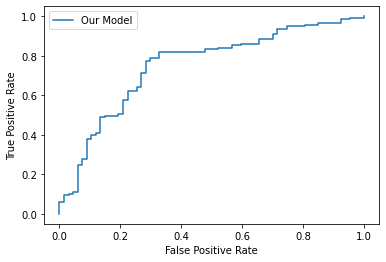

saving model


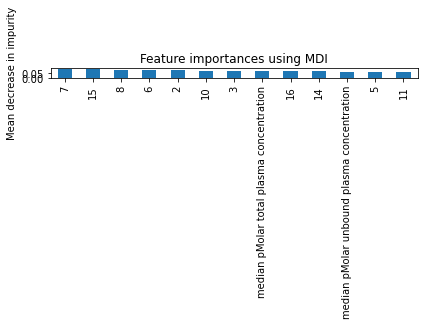

 27%|███████████▋                               | 3/11 [07:19<19:53, 149.19s/it]

45
0
Best Threshold=0.693997
[[62 19]
 [64 59]]
              precision    recall  f1-score   support

           0       0.49      0.77      0.60        81
           1       0.76      0.48      0.59       123

    accuracy                           0.59       204
   macro avg       0.62      0.62      0.59       204
weighted avg       0.65      0.59      0.59       204

balanced_accuracy_score  0.6225534477566997
matthews_corrcoef  0.24678458036307252
Sensitivity 0.7654320987654321
Specificity 0.4796747967479675
f1 0.5870646766169154
LR+ 1.4710648148148149
ppv 0.7564102564102564
average_precision_score 0.7101877237875809
roc_auc_score 0.6569306433805079


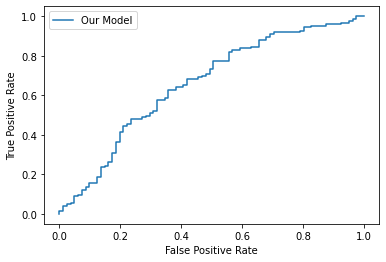

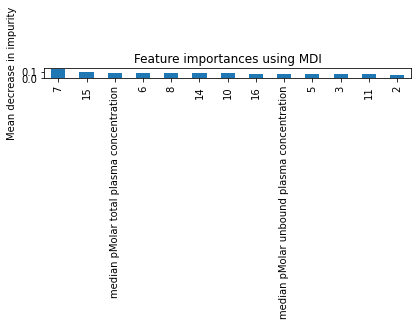

1
Best Threshold=0.632149
[[51 24]
 [67 62]]
              precision    recall  f1-score   support

           0       0.43      0.68      0.53        75
           1       0.72      0.48      0.58       129

    accuracy                           0.55       204
   macro avg       0.58      0.58      0.55       204
weighted avg       0.61      0.55      0.56       204

balanced_accuracy_score  0.5803100775193799
matthews_corrcoef  0.1568322229955041
Sensitivity 0.68
Specificity 0.4806201550387597
f1 0.5767441860465117
LR+ 1.3092537313432835
ppv 0.7209302325581395
average_precision_score 0.7690882168886263
roc_auc_score 0.6874418604651164


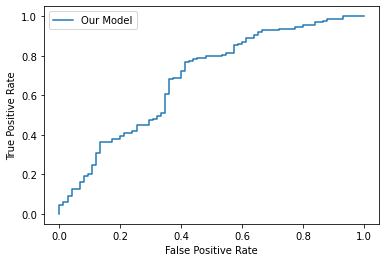

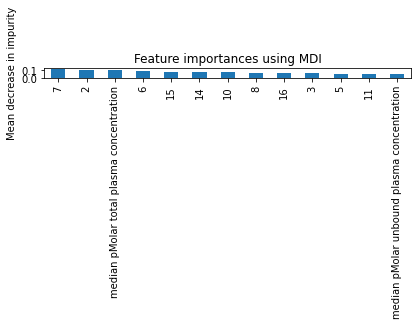

2
Best Threshold=0.598772
[[ 46  23]
 [ 34 101]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        69
           1       0.81      0.75      0.78       135

    accuracy                           0.72       204
   macro avg       0.69      0.71      0.70       204
weighted avg       0.73      0.72      0.72       204

balanced_accuracy_score  0.7074074074074074
matthews_corrcoef  0.4019664922999175
Sensitivity 0.6666666666666666
Specificity 0.7481481481481481
f1 0.7799227799227799
LR+ 2.6470588235294112
ppv 0.8145161290322581
average_precision_score 0.8469462320051713
roc_auc_score 0.7467525496511004


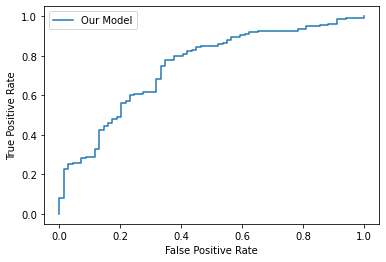

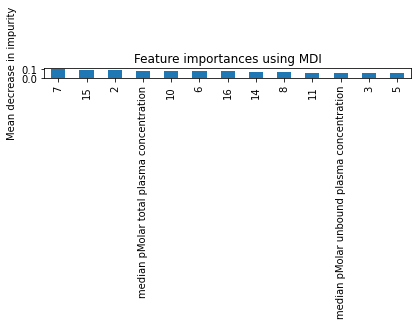

3
Best Threshold=0.658065
[[52 17]
 [78 57]]
              precision    recall  f1-score   support

           0       0.40      0.75      0.52        69
           1       0.77      0.42      0.55       135

    accuracy                           0.53       204
   macro avg       0.59      0.59      0.53       204
weighted avg       0.65      0.53      0.54       204

balanced_accuracy_score  0.5879227053140097
matthews_corrcoef  0.17303538826904602
Sensitivity 0.7536231884057971
Specificity 0.4222222222222222
f1 0.5454545454545455
LR+ 1.3043478260869568
ppv 0.7702702702702703
average_precision_score 0.7555444564934881
roc_auc_score 0.6382179280730006


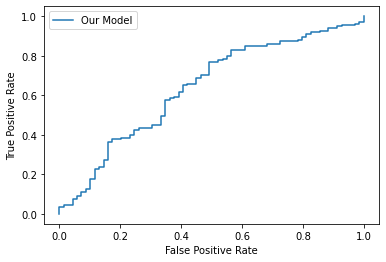

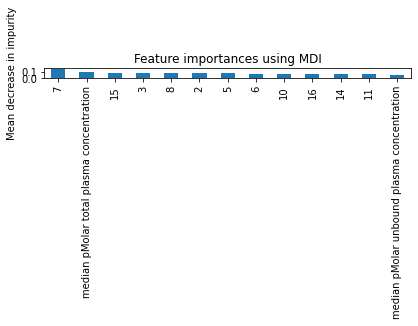

4
Best Threshold=0.607409
[[ 40  30]
 [ 32 102]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        70
           1       0.77      0.76      0.77       134

    accuracy                           0.70       204
   macro avg       0.66      0.67      0.67       204
weighted avg       0.70      0.70      0.70       204

balanced_accuracy_score  0.6663113006396588
matthews_corrcoef  0.33044559052704264
Sensitivity 0.5714285714285714
Specificity 0.7611940298507462
f1 0.7669172932330827
LR+ 2.3928571428571423
ppv 0.7727272727272727
average_precision_score 0.8397788019265351
roc_auc_score 0.7650319829424307


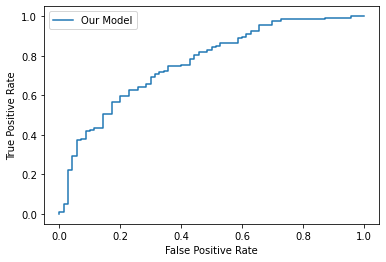

saving model


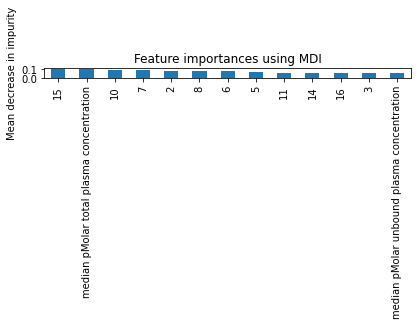

 36%|███████████████▋                           | 4/11 [09:55<17:43, 151.93s/it]

46
0
Best Threshold=0.635223
[[47 26]
 [44 87]]
              precision    recall  f1-score   support

           0       0.52      0.64      0.57        73
           1       0.77      0.66      0.71       131

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.68      0.66      0.66       204

balanced_accuracy_score  0.6539788769214682
matthews_corrcoef  0.29698075249200817
Sensitivity 0.6438356164383562
Specificity 0.6641221374045801
f1 0.7131147540983606
LR+ 1.9168742216687422
ppv 0.7699115044247787
average_precision_score 0.7519328710031837
roc_auc_score 0.6930879431140855


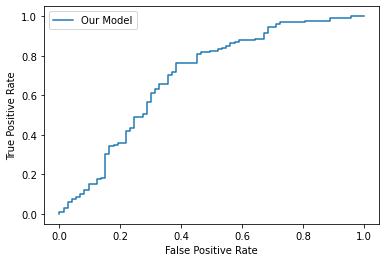

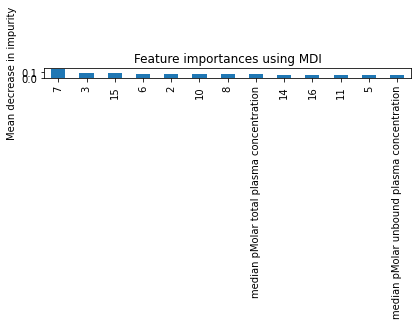

1
Best Threshold=0.603002
[[46 28]
 [47 83]]
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        74
           1       0.75      0.64      0.69       130

    accuracy                           0.63       204
   macro avg       0.62      0.63      0.62       204
weighted avg       0.66      0.63      0.64       204

balanced_accuracy_score  0.63004158004158
matthews_corrcoef  0.2510711464468447
Sensitivity 0.6216216216216216
Specificity 0.6384615384615384
f1 0.6887966804979253
LR+ 1.7193789534215063
ppv 0.7477477477477478
average_precision_score 0.7738213407681644
roc_auc_score 0.6844074844074844


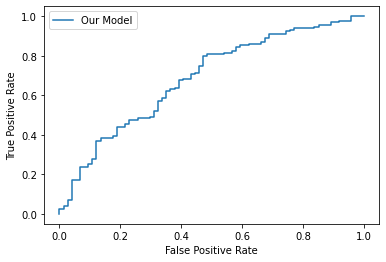

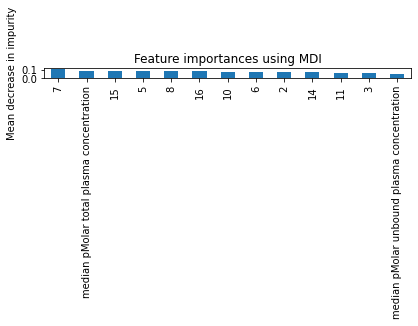

2
Best Threshold=0.525706
[[41 28]
 [40 95]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        69
           1       0.77      0.70      0.74       135

    accuracy                           0.67       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.68      0.67      0.67       204

balanced_accuracy_score  0.6489533011272142
matthews_corrcoef  0.2880557127921454
Sensitivity 0.5942028985507246
Specificity 0.7037037037037037
f1 0.7364341085271316
LR+ 2.005434782608696
ppv 0.7723577235772358
average_precision_score 0.7995828224496728
roc_auc_score 0.6805152979066023


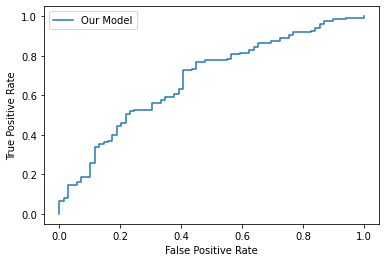

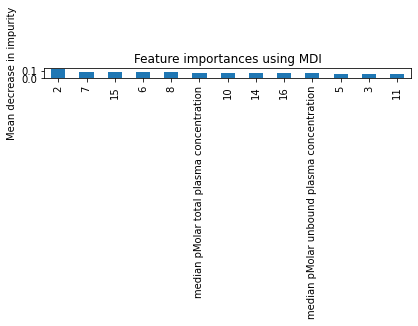

3
Best Threshold=0.634044
[[51 27]
 [33 93]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        78
           1       0.78      0.74      0.76       126

    accuracy                           0.71       204
   macro avg       0.69      0.70      0.69       204
weighted avg       0.71      0.71      0.71       204

balanced_accuracy_score  0.6959706959706959
matthews_corrcoef  0.38701111527840115
Sensitivity 0.6538461538461539
Specificity 0.7380952380952381
f1 0.7560975609756099
LR+ 2.496503496503497
ppv 0.775
average_precision_score 0.8234107073548556
roc_auc_score 0.7420634920634921


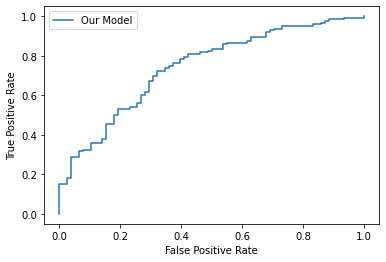

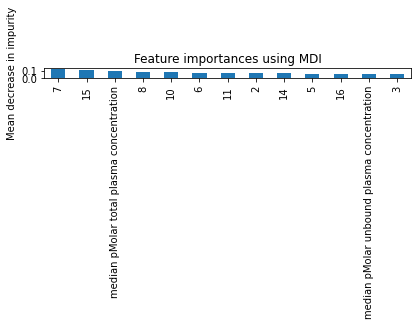

4
Best Threshold=0.580616
[[46 24]
 [62 72]]
              precision    recall  f1-score   support

           0       0.43      0.66      0.52        70
           1       0.75      0.54      0.63       134

    accuracy                           0.58       204
   macro avg       0.59      0.60      0.57       204
weighted avg       0.64      0.58      0.59       204

balanced_accuracy_score  0.5972281449893391
matthews_corrcoef  0.18495919243611356
Sensitivity 0.6571428571428571
Specificity 0.5373134328358209
f1 0.6260869565217392
LR+ 1.4202764976958526
ppv 0.75
average_precision_score 0.7578357082990826
roc_auc_score 0.6390191897654584


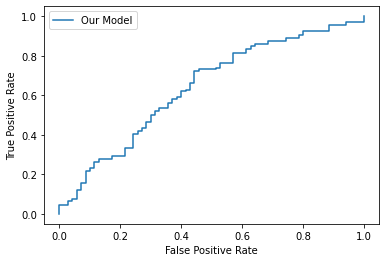

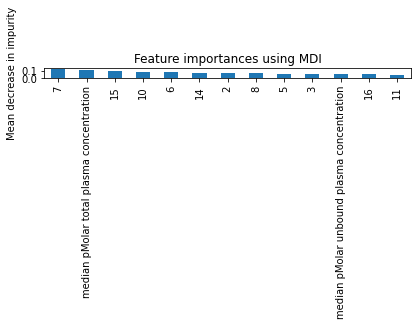

 45%|███████████████████▌                       | 5/11 [12:22<15:00, 150.05s/it]

47
0
Best Threshold=0.562844
[[51 23]
 [49 81]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        74
           1       0.78      0.62      0.69       130

    accuracy                           0.65       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.68      0.65      0.65       204

balanced_accuracy_score  0.6561330561330561
matthews_corrcoef  0.3003279299441825
Sensitivity 0.6891891891891891
Specificity 0.6230769230769231
f1 0.6923076923076924
LR+ 1.8284611141753997
ppv 0.7788461538461539
average_precision_score 0.7990053579551699
roc_auc_score 0.7238045738045737


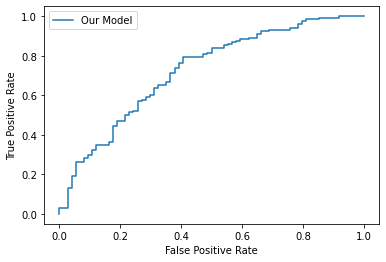

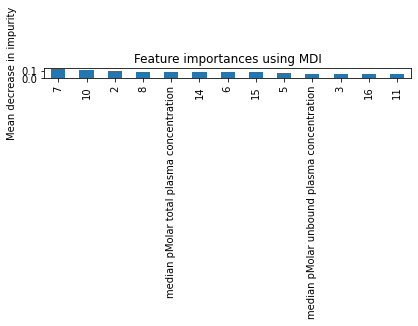

1
Best Threshold=0.582258
[[ 39  36]
 [ 27 102]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        75
           1       0.74      0.79      0.76       129

    accuracy                           0.69       204
   macro avg       0.67      0.66      0.66       204
weighted avg       0.68      0.69      0.69       204

balanced_accuracy_score  0.6553488372093024
matthews_corrcoef  0.32022259929403857
Sensitivity 0.52
Specificity 0.7906976744186046
f1 0.7640449438202247
LR+ 2.4844444444444442
ppv 0.7391304347826086
average_precision_score 0.7465064883743312
roc_auc_score 0.6708010335917313


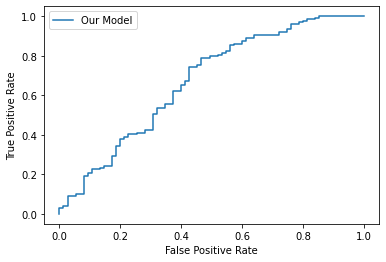

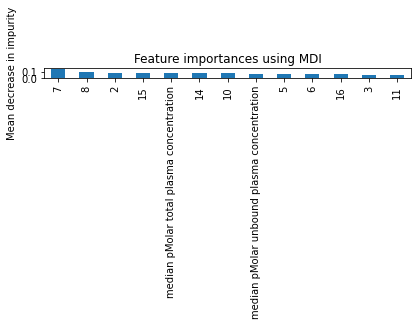

2
Best Threshold=0.597607
[[35 27]
 [52 90]]
              precision    recall  f1-score   support

           0       0.40      0.56      0.47        62
           1       0.77      0.63      0.69       142

    accuracy                           0.61       204
   macro avg       0.59      0.60      0.58       204
weighted avg       0.66      0.61      0.63       204

balanced_accuracy_score  0.5991594729668333
matthews_corrcoef  0.18443853555107656
Sensitivity 0.5645161290322581
Specificity 0.6338028169014085
f1 0.6949806949806951
LR+ 1.5415632754342434
ppv 0.7692307692307693
average_precision_score 0.7855668549995263
roc_auc_score 0.6276692412539754


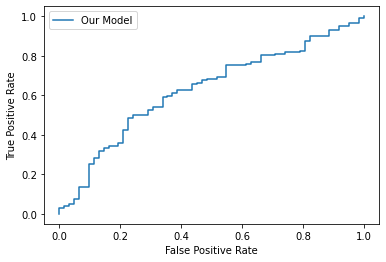

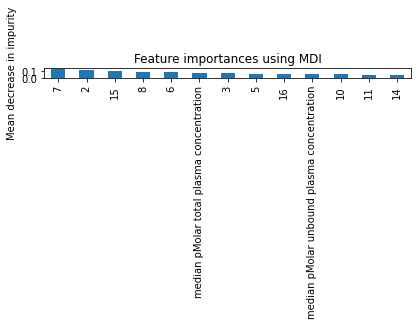

3
Best Threshold=0.636437
[[49 28]
 [36 91]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.60        77
           1       0.76      0.72      0.74       127

    accuracy                           0.69       204
   macro avg       0.67      0.68      0.67       204
weighted avg       0.69      0.69      0.69       204

balanced_accuracy_score  0.6764495347172512
matthews_corrcoef  0.34698826923043974
Sensitivity 0.6363636363636364
Specificity 0.7165354330708661
f1 0.7398373983739835
LR+ 2.2449494949494944
ppv 0.7647058823529411
average_precision_score 0.8339522109445237
roc_auc_score 0.7651089068411902


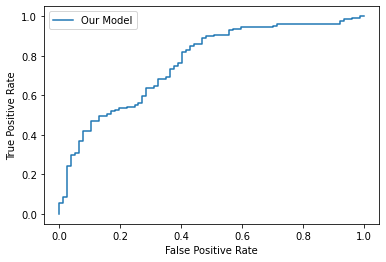

saving model


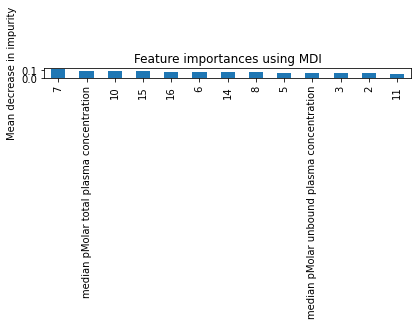

4
Best Threshold=0.489853
[[ 38  38]
 [ 25 103]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        76
           1       0.73      0.80      0.77       128

    accuracy                           0.69       204
   macro avg       0.67      0.65      0.66       204
weighted avg       0.68      0.69      0.68       204

balanced_accuracy_score  0.65234375
matthews_corrcoef  0.31885012184823486
Sensitivity 0.5
Specificity 0.8046875
f1 0.7657992565055763
LR+ 2.56
ppv 0.7304964539007093
average_precision_score 0.8163892781209978
roc_auc_score 0.7290296052631579


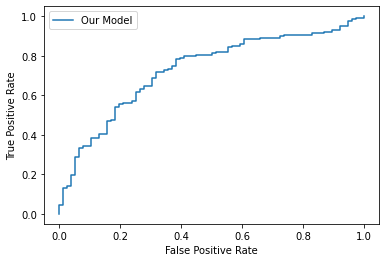

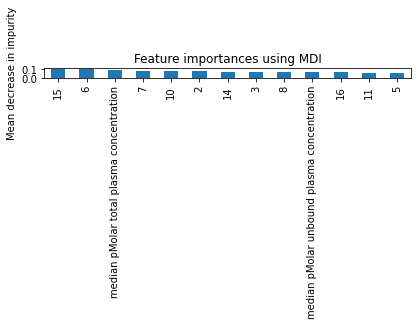

 55%|███████████████████████▍                   | 6/11 [14:12<11:22, 136.40s/it]

48
0
Best Threshold=0.508476
[[37 31]
 [38 98]]
              precision    recall  f1-score   support

           0       0.49      0.54      0.52        68
           1       0.76      0.72      0.74       136

    accuracy                           0.66       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.67      0.66      0.67       204

balanced_accuracy_score  0.6323529411764706
matthews_corrcoef  0.25879865568825217
Sensitivity 0.5441176470588235
Specificity 0.7205882352941176
f1 0.7396226415094339
LR+ 1.9473684210526314
ppv 0.7596899224806202
average_precision_score 0.7874194450896654
roc_auc_score 0.6554930795847751


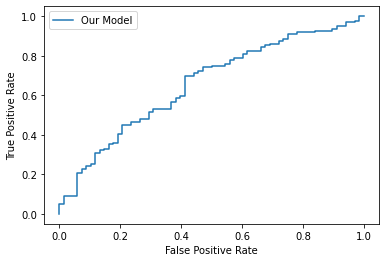

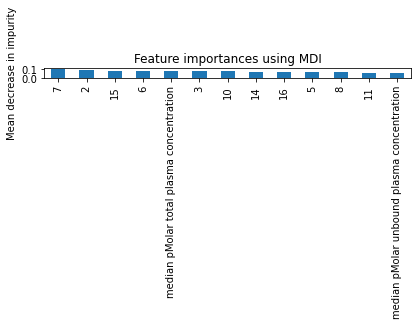

1
Best Threshold=0.457510
[[ 35  43]
 [ 17 109]]
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        78
           1       0.72      0.87      0.78       126

    accuracy                           0.71       204
   macro avg       0.70      0.66      0.66       204
weighted avg       0.70      0.71      0.69       204

balanced_accuracy_score  0.6568986568986569
matthews_corrcoef  0.3499115915942898
Sensitivity 0.44871794871794873
Specificity 0.8650793650793651
f1 0.7841726618705036
LR+ 3.325791855203621
ppv 0.7171052631578947
average_precision_score 0.8235888990785402
roc_auc_score 0.7662800162800162


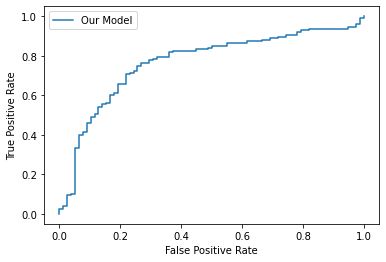

saving model


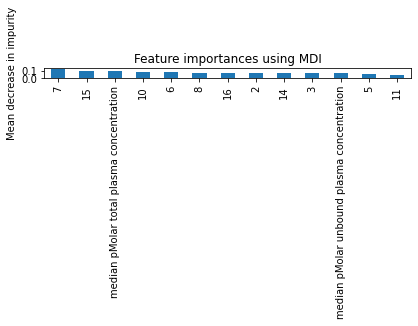

2
Best Threshold=0.591961
[[ 30  38]
 [ 32 104]]
              precision    recall  f1-score   support

           0       0.48      0.44      0.46        68
           1       0.73      0.76      0.75       136

    accuracy                           0.66       204
   macro avg       0.61      0.60      0.60       204
weighted avg       0.65      0.66      0.65       204

balanced_accuracy_score  0.6029411764705882
matthews_corrcoef  0.21100998983696245
Sensitivity 0.4411764705882353
Specificity 0.7647058823529411
f1 0.7482014388489209
LR+ 1.8749999999999996
ppv 0.7323943661971831
average_precision_score 0.7886258786098861
roc_auc_score 0.6703070934256056


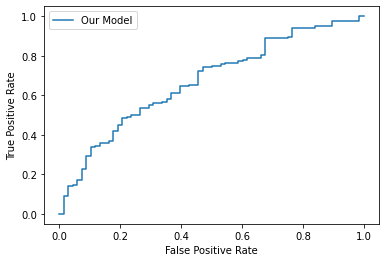

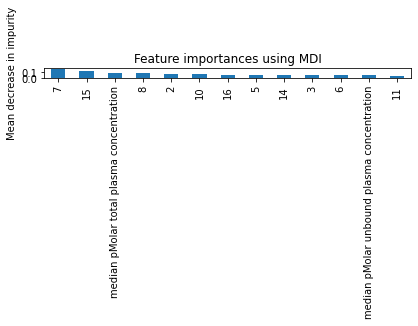

3
Best Threshold=0.606368
[[39 31]
 [47 87]]
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        70
           1       0.74      0.65      0.69       134

    accuracy                           0.62       204
   macro avg       0.60      0.60      0.60       204
weighted avg       0.64      0.62      0.63       204

balanced_accuracy_score  0.6031982942430704
matthews_corrcoef  0.19843291145810638
Sensitivity 0.5571428571428572
Specificity 0.6492537313432836
f1 0.6904761904761905
LR+ 1.588449848024316
ppv 0.7372881355932204
average_precision_score 0.7191740726081242
roc_auc_score 0.6410447761194029


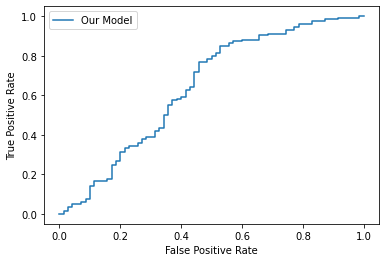

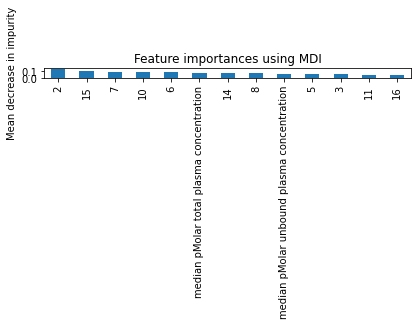

4
Best Threshold=0.616948
[[ 46  34]
 [ 22 102]]
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        80
           1       0.75      0.82      0.78       124

    accuracy                           0.73       204
   macro avg       0.71      0.70      0.70       204
weighted avg       0.72      0.73      0.72       204

balanced_accuracy_score  0.6987903225806451
matthews_corrcoef  0.411772329829122
Sensitivity 0.575
Specificity 0.8225806451612904
f1 0.7846153846153845
LR+ 3.2409090909090916
ppv 0.75
average_precision_score 0.7909073634807959
roc_auc_score 0.7484879032258064


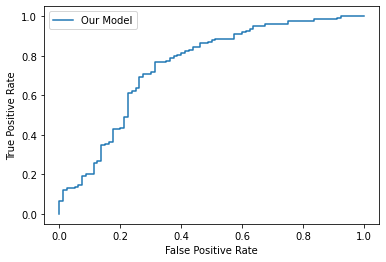

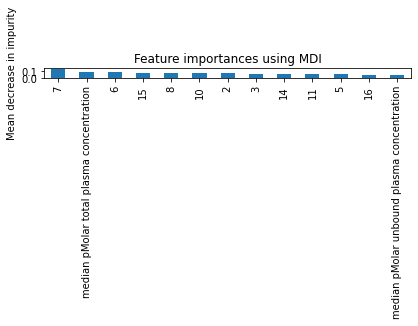

 64%|███████████████████████████▎               | 7/11 [16:52<09:36, 144.15s/it]

49
0
Best Threshold=0.593657
[[ 39  36]
 [ 27 102]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        75
           1       0.74      0.79      0.76       129

    accuracy                           0.69       204
   macro avg       0.67      0.66      0.66       204
weighted avg       0.68      0.69      0.69       204

balanced_accuracy_score  0.6553488372093024
matthews_corrcoef  0.32022259929403857
Sensitivity 0.52
Specificity 0.7906976744186046
f1 0.7640449438202247
LR+ 2.4844444444444442
ppv 0.7391304347826086
average_precision_score 0.8172941862860221
roc_auc_score 0.7155555555555556


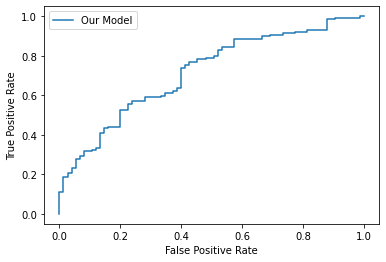

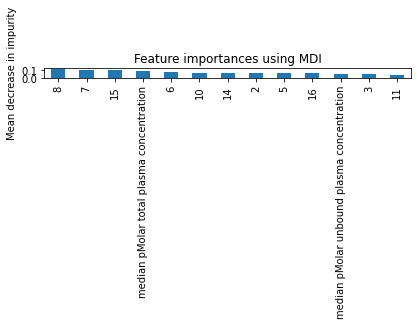

1
Best Threshold=0.642493
[[44 26]
 [59 75]]
              precision    recall  f1-score   support

           0       0.43      0.63      0.51        70
           1       0.74      0.56      0.64       134

    accuracy                           0.58       204
   macro avg       0.58      0.59      0.57       204
weighted avg       0.63      0.58      0.59       204

balanced_accuracy_score  0.594136460554371
matthews_corrcoef  0.178776314837037
Sensitivity 0.6285714285714286
Specificity 0.5597014925373134
f1 0.6382978723404255
LR+ 1.4276029055690072
ppv 0.7425742574257426
average_precision_score 0.7389176345406823
roc_auc_score 0.6312366737739872


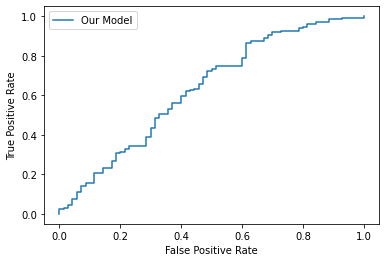

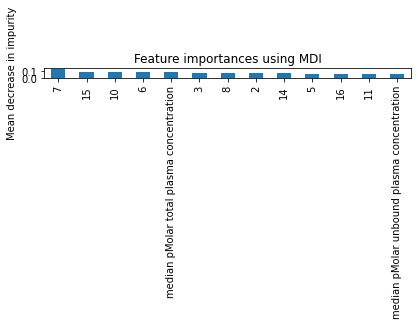

2
Best Threshold=0.592851
[[ 38  28]
 [ 35 103]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        66
           1       0.79      0.75      0.77       138

    accuracy                           0.69       204
   macro avg       0.65      0.66      0.66       204
weighted avg       0.70      0.69      0.69       204

balanced_accuracy_score  0.6610671936758894
matthews_corrcoef  0.3143775467824598
Sensitivity 0.5757575757575758
Specificity 0.7463768115942029
f1 0.7657992565055763
LR+ 2.27012987012987
ppv 0.7862595419847328
average_precision_score 0.8003781101181422
roc_auc_score 0.686649099692578


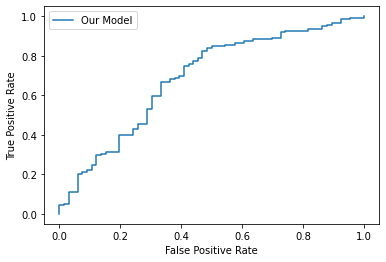

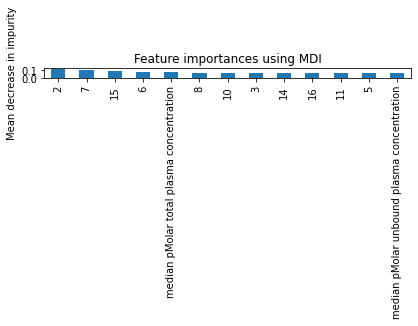

3
Best Threshold=0.492483
[[ 39  39]
 [ 23 103]]
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        78
           1       0.73      0.82      0.77       126

    accuracy                           0.70       204
   macro avg       0.68      0.66      0.66       204
weighted avg       0.69      0.70      0.69       204

balanced_accuracy_score  0.6587301587301587
matthews_corrcoef  0.3354146312227256
Sensitivity 0.5
Specificity 0.8174603174603174
f1 0.7686567164179104
LR+ 2.7391304347826084
ppv 0.7253521126760564
average_precision_score 0.7705900724127451
roc_auc_score 0.7144892144892145


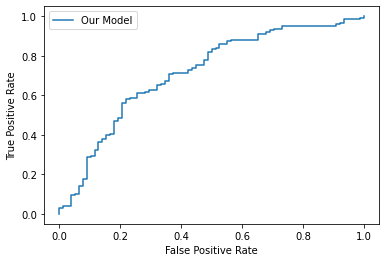

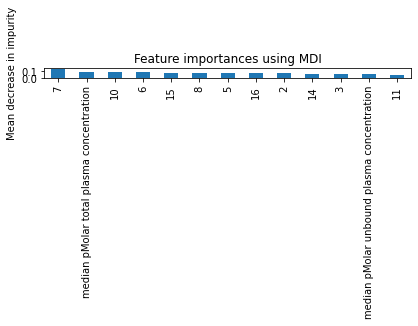

4
Best Threshold=0.626568
[[43 32]
 [39 90]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.55        75
           1       0.74      0.70      0.72       129

    accuracy                           0.65       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6355038759689923
matthews_corrcoef  0.26651420342992527
Sensitivity 0.5733333333333334
Specificity 0.6976744186046512
f1 0.7171314741035857
LR+ 1.8964102564102565
ppv 0.7377049180327869
average_precision_score 0.7640256447082229
roc_auc_score 0.6748320413436693


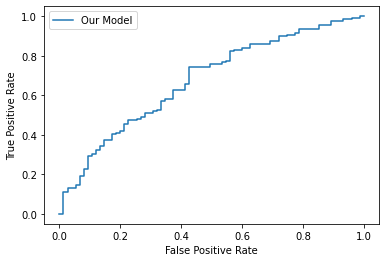

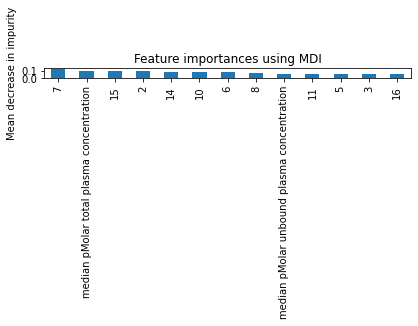

 73%|███████████████████████████████▎           | 8/11 [19:22<07:18, 146.09s/it]

50
0
Best Threshold=0.566774
[[ 39  44]
 [ 12 109]]
              precision    recall  f1-score   support

           0       0.76      0.47      0.58        83
           1       0.71      0.90      0.80       121

    accuracy                           0.73       204
   macro avg       0.74      0.69      0.69       204
weighted avg       0.73      0.73      0.71       204

balanced_accuracy_score  0.6853529821766404
matthews_corrcoef  0.42056245716624446
Sensitivity 0.46987951807228917
Specificity 0.9008264462809917
f1 0.7956204379562044
LR+ 4.7379518072289155
ppv 0.7124183006535948
average_precision_score 0.7869088638204118
roc_auc_score 0.7297620232998108


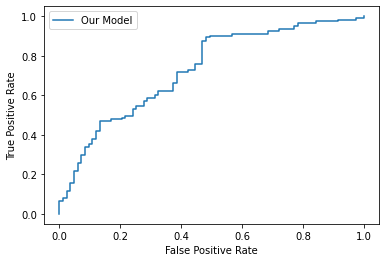

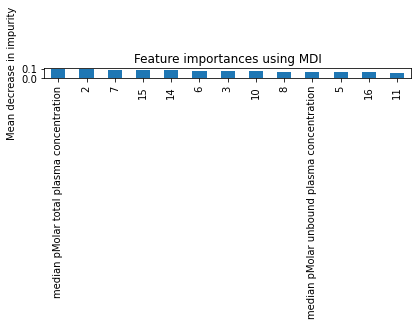

1
Best Threshold=0.643688
[[55 18]
 [52 79]]
              precision    recall  f1-score   support

           0       0.51      0.75      0.61        73
           1       0.81      0.60      0.69       131

    accuracy                           0.66       204
   macro avg       0.66      0.68      0.65       204
weighted avg       0.71      0.66      0.66       204

balanced_accuracy_score  0.6782390463243753
matthews_corrcoef  0.3421780660267309
Sensitivity 0.7534246575342466
Specificity 0.6030534351145038
f1 0.6929824561403509
LR+ 1.898050579557429
ppv 0.8144329896907216
average_precision_score 0.8276372284364893
roc_auc_score 0.7302101850883614


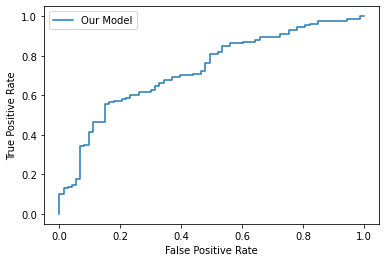

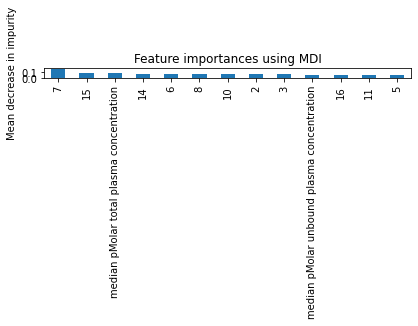

2
Best Threshold=0.679024
[[48 20]
 [61 75]]
              precision    recall  f1-score   support

           0       0.44      0.71      0.54        68
           1       0.79      0.55      0.65       136

    accuracy                           0.60       204
   macro avg       0.61      0.63      0.60       204
weighted avg       0.67      0.60      0.61       204

balanced_accuracy_score  0.6286764705882353
matthews_corrcoef  0.24320807758066518
Sensitivity 0.7058823529411765
Specificity 0.5514705882352942
f1 0.6493506493506493
LR+ 1.5737704918032789
ppv 0.7894736842105263
average_precision_score 0.7672290043258994
roc_auc_score 0.6740916955017301


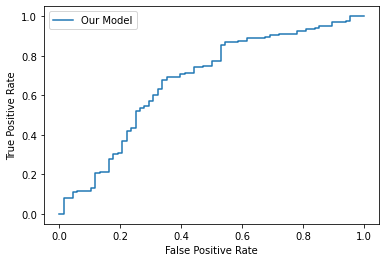

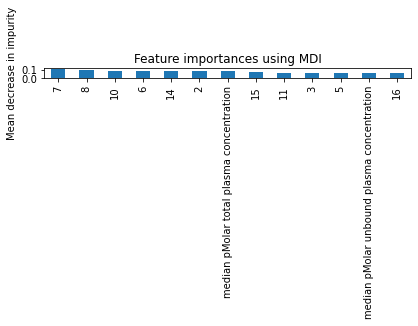

3
Best Threshold=0.577835
[[44 30]
 [36 94]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        74
           1       0.76      0.72      0.74       130

    accuracy                           0.68       204
   macro avg       0.65      0.66      0.66       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6588357588357588
matthews_corrcoef  0.31283114036082055
Sensitivity 0.5945945945945946
Specificity 0.7230769230769231
f1 0.7401574803149606
LR+ 2.1471471471471473
ppv 0.7580645161290323
average_precision_score 0.7858585372671432
roc_auc_score 0.6906444906444906


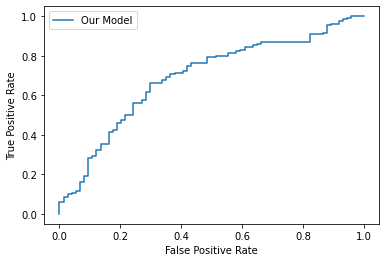

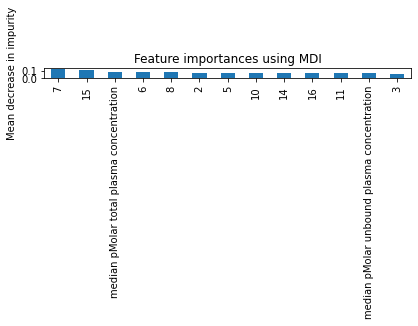

4
Best Threshold=0.624877
[[40 26]
 [47 91]]
              precision    recall  f1-score   support

           0       0.46      0.61      0.52        66
           1       0.78      0.66      0.71       138

    accuracy                           0.64       204
   macro avg       0.62      0.63      0.62       204
weighted avg       0.67      0.64      0.65       204

balanced_accuracy_score  0.6327404479578393
matthews_corrcoef  0.2511263175819461
Sensitivity 0.6060606060606061
Specificity 0.6594202898550725
f1 0.7137254901960784
LR+ 1.779497098646035
ppv 0.7777777777777778
average_precision_score 0.8028723059658234
roc_auc_score 0.6798418972332017


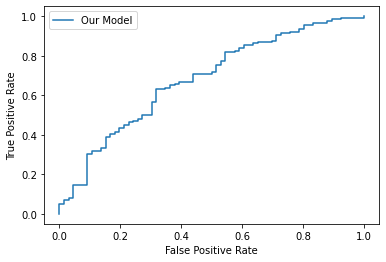

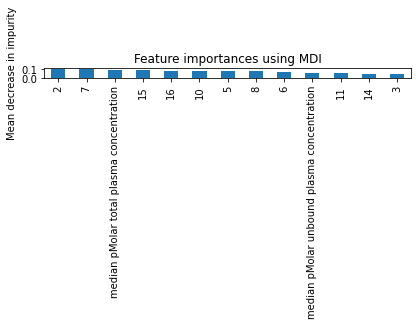

 82%|███████████████████████████████████▏       | 9/11 [21:16<04:32, 136.16s/it]

51
0
Best Threshold=0.617791
[[38 39]
 [34 93]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51        77
           1       0.70      0.73      0.72       127

    accuracy                           0.64       204
   macro avg       0.62      0.61      0.61       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.6128949790367113
matthews_corrcoef  0.22903330082270712
Sensitivity 0.4935064935064935
Specificity 0.7322834645669292
f1 0.7181467181467182
LR+ 1.843391902215432
ppv 0.7045454545454546
average_precision_score 0.7416117332025349
roc_auc_score 0.6511913283566827


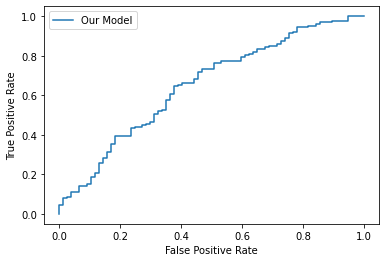

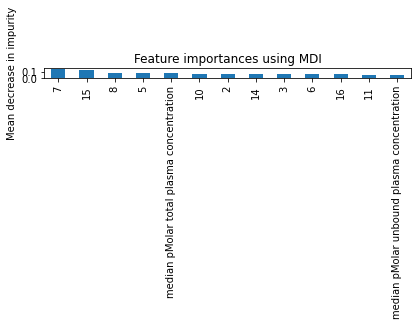

1
Best Threshold=0.668226
[[51 23]
 [58 72]]
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        74
           1       0.76      0.55      0.64       130

    accuracy                           0.60       204
   macro avg       0.61      0.62      0.60       204
weighted avg       0.65      0.60      0.61       204

balanced_accuracy_score  0.6215176715176716
matthews_corrcoef  0.23425125116793985
Sensitivity 0.6891891891891891
Specificity 0.5538461538461539
f1 0.6400000000000001
LR+ 1.5447343895619758
ppv 0.7578947368421053
average_precision_score 0.7585874792413755
roc_auc_score 0.6442827442827442


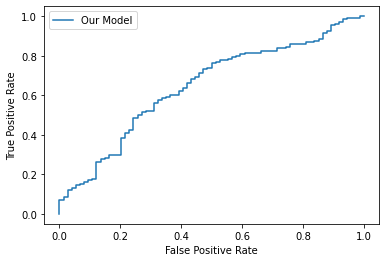

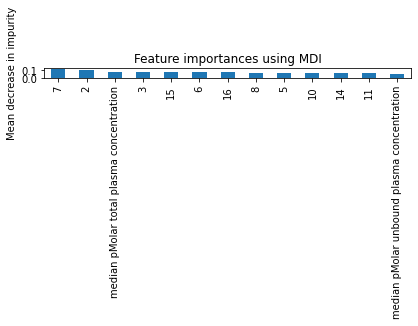

2
Best Threshold=0.504323
[[37 27]
 [51 89]]
              precision    recall  f1-score   support

           0       0.42      0.58      0.49        64
           1       0.77      0.64      0.70       140

    accuracy                           0.62       204
   macro avg       0.59      0.61      0.59       204
weighted avg       0.66      0.62      0.63       204

balanced_accuracy_score  0.6069196428571428
matthews_corrcoef  0.20034161445692317
Sensitivity 0.578125
Specificity 0.6357142857142857
f1 0.6953125000000001
LR+ 1.5870098039215685
ppv 0.7672413793103449
average_precision_score 0.7539217704208274
roc_auc_score 0.6160714285714286


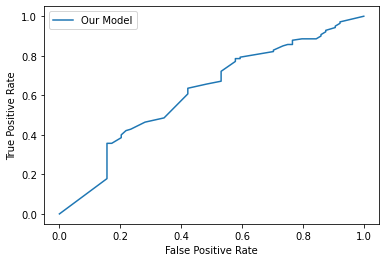

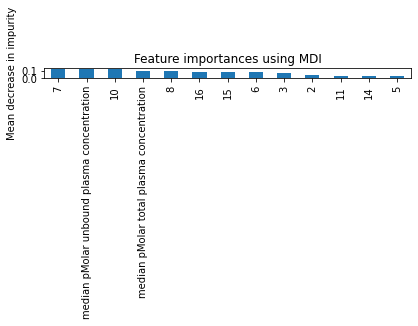

3
Best Threshold=0.578998
[[ 35  34]
 [ 33 102]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        69
           1       0.75      0.76      0.75       135

    accuracy                           0.67       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.6314009661835749
matthews_corrcoef  0.2637521893583148
Sensitivity 0.5072463768115942
Specificity 0.7555555555555555
f1 0.7527675276752768
LR+ 2.075098814229249
ppv 0.75
average_precision_score 0.7935456441619936
roc_auc_score 0.6869565217391304


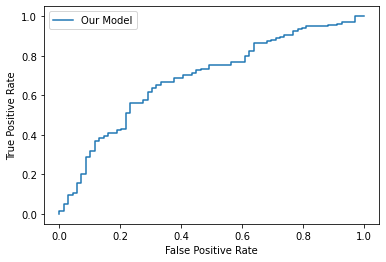

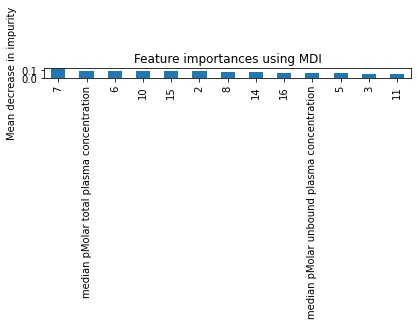

4
Best Threshold=0.600450
[[59 21]
 [50 74]]
              precision    recall  f1-score   support

           0       0.54      0.74      0.62        80
           1       0.78      0.60      0.68       124

    accuracy                           0.65       204
   macro avg       0.66      0.67      0.65       204
weighted avg       0.69      0.65      0.66       204

balanced_accuracy_score  0.6671370967741936
matthews_corrcoef  0.32717765413337063
Sensitivity 0.7375
Specificity 0.5967741935483871
f1 0.6757990867579908
LR+ 1.8290000000000002
ppv 0.7789473684210526
average_precision_score 0.7503200918198684
roc_auc_score 0.6826612903225806


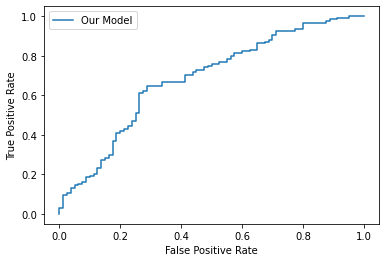

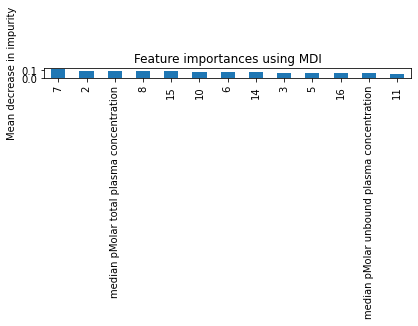

 91%|██████████████████████████████████████▏   | 10/11 [23:28<02:14, 134.69s/it]

52
0
Best Threshold=0.589770
[[40 26]
 [51 87]]
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        66
           1       0.77      0.63      0.69       138

    accuracy                           0.62       204
   macro avg       0.60      0.62      0.60       204
weighted avg       0.66      0.62      0.63       204

balanced_accuracy_score  0.6182476943346509
matthews_corrcoef  0.22257391762760165
Sensitivity 0.6060606060606061
Specificity 0.6304347826086957
f1 0.6932270916334662
LR+ 1.6399286987522284
ppv 0.7699115044247787
average_precision_score 0.7863695199053901
roc_auc_score 0.6571146245059288


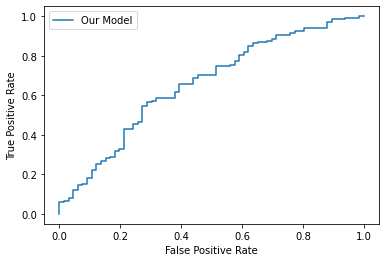

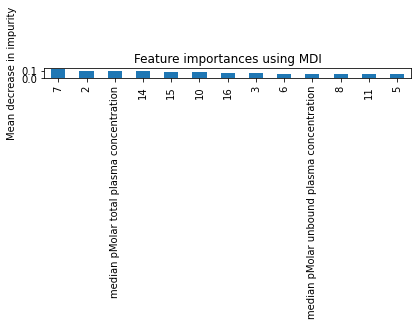

1
Best Threshold=0.523410
[[52 22]
 [39 91]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        74
           1       0.81      0.70      0.75       130

    accuracy                           0.70       204
   macro avg       0.69      0.70      0.69       204
weighted avg       0.72      0.70      0.71       204

balanced_accuracy_score  0.7013513513513514
matthews_corrcoef  0.3895042156568
Sensitivity 0.7027027027027027
Specificity 0.7
f1 0.7489711934156379
LR+ 2.342342342342342
ppv 0.8053097345132744
average_precision_score 0.7946229062945652
roc_auc_score 0.7193347193347195


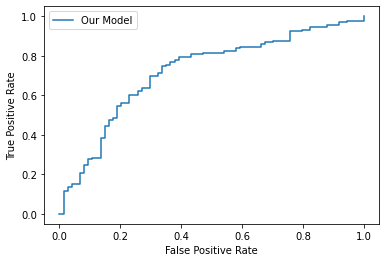

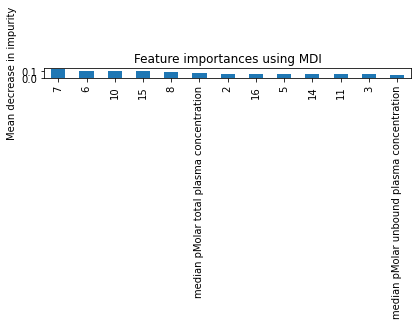

2
Best Threshold=0.586205
[[39 41]
 [26 98]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        80
           1       0.71      0.79      0.75       124

    accuracy                           0.67       204
   macro avg       0.65      0.64      0.64       204
weighted avg       0.66      0.67      0.66       204

balanced_accuracy_score  0.6389112903225806
matthews_corrcoef  0.29111145754638895
Sensitivity 0.4875
Specificity 0.7903225806451613
f1 0.7452471482889734
LR+ 2.3249999999999997
ppv 0.7050359712230215
average_precision_score 0.7676306279186246
roc_auc_score 0.6972782258064516


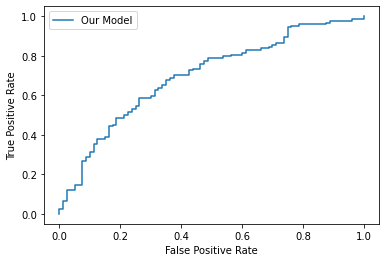

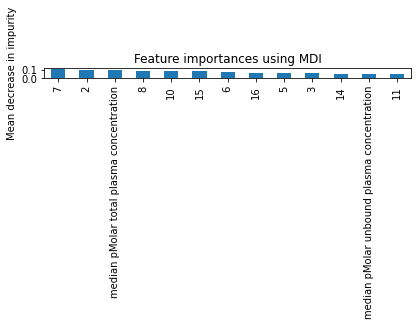

3
Best Threshold=0.578651
[[38 33]
 [35 98]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        71
           1       0.75      0.74      0.74       133

    accuracy                           0.67       204
   macro avg       0.63      0.64      0.64       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.6360266864343957
matthews_corrcoef  0.2703410719624124
Sensitivity 0.5352112676056338
Specificity 0.7368421052631579
f1 0.7424242424242424
LR+ 2.033802816901408
ppv 0.7480916030534351
average_precision_score 0.8192601758752848
roc_auc_score 0.7022132796780685


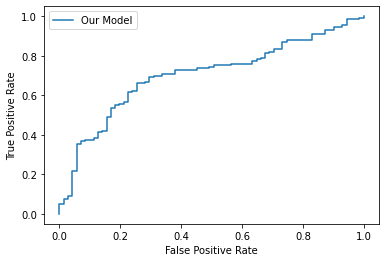

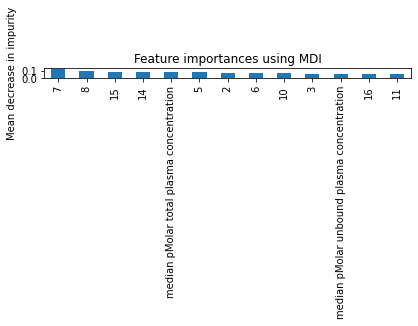

4
Best Threshold=0.558676
[[ 34  39]
 [ 19 112]]
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        73
           1       0.74      0.85      0.79       131

    accuracy                           0.72       204
   macro avg       0.69      0.66      0.67       204
weighted avg       0.71      0.72      0.70       204

balanced_accuracy_score  0.6603576283593015
matthews_corrcoef  0.350582545200299
Sensitivity 0.4657534246575342
Specificity 0.8549618320610687
f1 0.7943262411347518
LR+ 3.2112472963229988
ppv 0.7417218543046358
average_precision_score 0.8097226120380204
roc_auc_score 0.7284325002614243


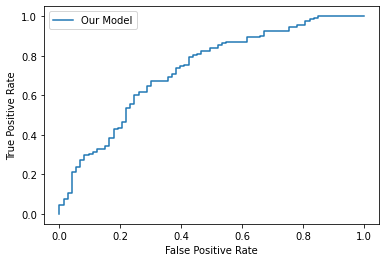

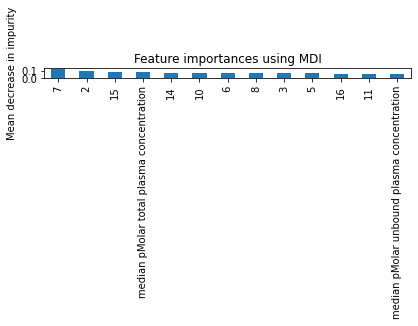

100%|██████████████████████████████████████████| 11/11 [25:15<00:00, 137.80s/it]


In [114]:
#Models to predict DILI with Liv preds only
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
            # save
            print("saving model")
            baseline=auc
            pickle.dump(classifier, open("dili_NCV_bestLivdataonly_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [115]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "Liv data only"
results.to_csv("NCV_models_Livdataonly.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.635659  0.261652     0.666667     0.604651   
1   NCV  DILI  42      1  0.654412  0.319505     0.500000     0.808824   
2   NCV  DILI  42      2  0.651110  0.312337     0.513158     0.789062   
3   NCV  DILI  42      3  0.606227  0.217469     0.474359     0.738095   
4   NCV  DILI  42      4  0.636780  0.278080     0.492537     0.781022   
5   NCV  DILI  43      0  0.621398  0.245419     0.448276     0.794521   
6   NCV  DILI  43      1  0.665772  0.323254     0.683544     0.648000   
7   NCV  DILI  43      2  0.690474  0.365244     0.739726     0.641221   
8   NCV  DILI  43      3  0.567155  0.136580     0.435897     0.698413   
9   NCV  DILI  43      4  0.618627  0.236634     0.526316     0.710938   
10  NCV  DILI  44      0  0.650105  0.296195     0.617284     0.682927   
11  NCV  DILI  44      1  0.679180  0.342001     0.704225     0.654135   
12  NCV  DILI  44      2  0.659598  0.299931     0.640625     0.678571   
13  NCV  DILI  44      3  0.577085  0.151598     0.641975     0.512195   
14  NCV  DILI  44      4  0.730472  0.440670     0.716418     0.744526   
15  NCV  DILI  45      0  0.622553  0.246785     0.765432     0.479675   
16  NCV  DILI  45      1  0.580310  0.156832     0.680000     0.480620   
17  NCV  DILI  45      2  0.707407  0.401966     0.666667     0.748148   
18  NCV  DILI  45      3  0.587923  0.173035     0.753623     0.422222   
19  NCV  DILI  45      4  0.666311  0.330446     0.571429     0.761194   
20  NCV  DILI  46      0  0.653979  0.296981     0.643836     0.664122   
21  NCV  DILI  46      1  0.630042  0.251071     0.621622     0.638462   
22  NCV  DILI  46      2  0.648953  0.288056     0.594203     0.703704   
23  NCV  DILI  46      3  0.695971  0.387011     0.653846     0.738095   
24  NCV  DILI  46      4  0.597228  0.184959     0.657143     0.537313   
25  NCV  DILI  47      0  0.656133  0.300328     0.689189     0.623077   
26  NCV  DILI  47      1  0.655349  0.320223     0.520000     0.790698   
27  NCV  DILI  47      2  0.599159  0.184439     0.564516     0.633803   
28  NCV  DILI  47      3  0.676450  0.346988     0.636364     0.716535   
29  NCV  DILI  47      4  0.652344  0.318850     0.500000     0.804688   
30  NCV  DILI  48      0  0.632353  0.258799     0.544118     0.720588   
31  NCV  DILI  48      1  0.656899  0.349912     0.448718     0.865079   
32  NCV  DILI  48      2  0.602941  0.211010     0.441176     0.764706   
33  NCV  DILI  48      3  0.603198  0.198433     0.557143     0.649254   
34  NCV  DILI  48      4  0.698790  0.411772     0.575000     0.822581   
35  NCV  DILI  49      0  0.655349  0.320223     0.520000     0.790698   
36  NCV  DILI  49      1  0.594136  0.178776     0.628571     0.559701   
37  NCV  DILI  49      2  0.661067  0.314378     0.575758     0.746377   
38  NCV  DILI  49      3  0.658730  0.335415     0.500000     0.817460   
39  NCV  DILI  49      4  0.635504  0.266514     0.573333     0.697674   
40  NCV  DILI  50      0  0.685353  0.420562     0.469880     0.900826   
41  NCV  DILI  50      1  0.678239  0.342178     0.753425     0.603053   
42  NCV  DILI  50      2  0.628676  0.243208     0.705882     0.551471   
43  NCV  DILI  50      3  0.658836  0.312831     0.594595     0.723077   
44  NCV  DILI  50      4  0.632740  0.251126     0.606061     0.659420   
45  NCV  DILI  51      0  0.612895  0.229033     0.493506     0.732283   
46  NCV  DILI  51      1  0.621518  0.234251     0.689189     0.553846   
47  NCV  DILI  51      2  0.606920  0.200342     0.578125     0.635714   
48  NCV  DILI  51      3  0.631401  0.263752     0.507246     0.755556   
49  NCV  DILI  51      4  0.667137  0.327178     0.737500     0.596774   
50  NCV  DILI  52      0  0.618248  0.222574     0.606061     0.630435   
51  NCV  DILI  52      1  0.701351  0.389504     0.702703     0.700000   
52  NCV  DILI  52      2  0.638911  0.291111     0.487500     0.790323   
53  NCV 

In [116]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.642759   0.283788     0.593006     0.692512   
std     3.191424   1.427248   0.035159   0.072129     0.093442     0.103434   
min    42.000000   0.000000   0.567155   0.136580     0.435897     0.422222   
25%    44.000000   1.000000   0.620012   0.235443     0.510202     0.634759   
50%    47.000000   2.000000   0.648953   0.291111     0.594203     0.703704   
75%    50.000000   3.000000   0.660712   0.328812     0.666667     0.762950   
max    52.000000   4.000000   0.730472   0.440670     0.765432     0.900826   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.692924   0.717831   2.091786   0.755675                 0.786030  
std     0.040975   0.058636   0.605866   0.034748                 0.040131  
min     0.602411   0.545455   1.304348   0.666667                 0.699394  
25%     0.663711   0.692645   1.702827   0.734841                 0.758212  
50%     0.690644   0.721992   1.947368   0.757895                 0.788626  
75%     0.724905   0.764045   2.367600   0.773864                 0.816842  
max     0.766280   0.795620   4.737952   0.842975                 0.861188

In [117]:
loaded_rf = pickle.load(open("dili_NCV_bestLivdataonly_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(class_weight='balanced', max_depth=19, max_features=32,
                       min_samples_leaf=7, min_samples_split=10,
                       n_estimators=400, n_jobs=40, random_state=42)

Best Threshold=0.568056
[[ 62  29]
 [ 57 107]]
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        91
           1       0.79      0.65      0.71       164

    accuracy                           0.66       255
   macro avg       0.65      0.67      0.65       255
weighted avg       0.69      0.66      0.67       255

balanced_accuracy_score  0.6668788528544627
matthews_corrcoef  0.32050217911908
Sensitivity 0.6813186813186813
Specificity 0.6524390243902439
f1 0.7133333333333333
LR+ 1.9602853287063815
ppv 0.7867647058823529
average_precision_score 0.8450925994351922
roc_auc_score 0.7443714821763601


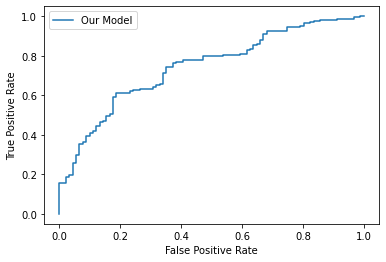

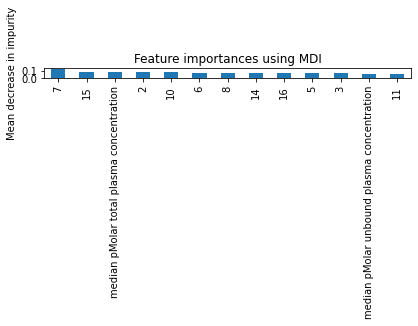

In [118]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [119]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestLivdataonly_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestLivdataonly_model.sav",  'wb'))

In [38]:
#Morgan and MACCS model

In [39]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [40]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [41]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0                             CC(C)NCC(O)c1cc(O)cc(O)c1         0   
1               Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1         0   
2     C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...         0   
3     CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...         1   
4     CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO         1   
...                                                 ...       ...   
1270  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1271        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1272  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1273    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1274        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                                 Source  Data        ABC  \
0              13  DILIrank dataset CP Overlap REpsilber  DILI  11.113111   
1               1         DILIst Classification  Topical  DILI  18.632065   
2              13  DILIrank dataset CP Overlap REpsilber  DILI  18.334980   
3               1            DILIst Classification  Oral  DILI  24.305499   
4               1            DILIst Classification  Oral  DILI  20.848529   
...           ...                                    ...   ...        ...   
1270            1            DILIst Classification  Oral  DILI  22.443398   
1271            1            DILIst Classification  Oral  DILI  18.078987   
1272            1            DILIst Classification  Oral  DILI  19.965399   
1273            1            DILIst Classification  Oral  DILI  18.677154   
1274            1                DILIst Classification    DILI  18.627175   

          ABCGG  nAcid  nBase  nAromAtom  ...         3         5         6  \
0     10.148350    0.0    1.0        6.0  ...  0.499094  0.220350  0.288708   
1     15.271464    0.0    0.0       17.0  ...  0.567809  0.641096  0.778160   
2     14.848566    0.0    0.0        0.0  ...  0.551261  0.096629  0.422820   
3     20.006308    3.0    0.0       17.0  ...  0.830028  0.145256  0.509965   
4     17.255118    0.0    0.0        0.0  ...  0.457768  0.067164  0.343394   
...         ...    ...    ...        ...  ...       ...       ...       ...   
1270  19.431962    0.0    1.0       12.0  ...  0.800188  0.243600  0.556210   
1271  16.178618    0.0    1.0        6.0  ...  0.355955  0.287075  0.571990   
1272  16.107023    0.0    0.0       15.0  ...  0.798359  0.579613  0.629839   
1273  17.017495    0.0    0.0        6.0  ...  0.880790  0.789385  0.583781   
1274  16.364961    0.0    1.0        6.0  ...  0.226861  0.259857  0.617057   

             7         8        10        11        14        15        16  
0     0.542275  0.332715  0.294181  0.253750  0.026997  0.067801  0.104456  
1     0.855955  0.505657  0.479769  0.507222  0.891707  0.306721  0.170294  
2     0.430636  0.462722  0.542910  0.414408  0.297146  0.188203  0.155574  
3     0.764704  0.527018  0.774434  0.589813  0.968304  0.250082  0.064662  
4     0.271960  0.350366  0.479720  0.266352  0.689398  0.042730  0.060388  
...        ...       ...       ...       ...       ...       ...       ...  
1270  0.779421  0.329983  0.444541  0.269732  0.187868  0.269013  0.153335  
1271  0.595370  0.449674  0.260887  0.255957  0.460429  0.046247  0.079296  
1272  0.831726  0.628673  0.566578  0.768182  0.653589  0.089000  0.254789  
1273  0.914036  0.563791  0.544296  0.433799  0.824570  0.268013  0.117781  
1274  0.520632  0.305643  0.230568  0.234973  0.612908  0.059007  0.145803  

[1275 rows x 572 columns]

In [42]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [43]:
test_feature_list = list(test_feature_list)
test_feature_list

['Mfp1',
 'Mfp13',
 'Mfp80',
 'Mfp114',
 'Mfp147',
 'Mfp216',
 'Mfp222',
 'Mfp227',
 'Mfp231',
 'Mfp249',
 'Mfp283',
 'Mfp294',
 'Mfp310',
 'Mfp314',
 'Mfp322',
 'Mfp350',
 'Mfp352',
 'Mfp366',
 'Mfp378',
 'Mfp389',
 'Mfp392',
 'Mfp486',
 'Mfp519',
 'Mfp561',
 'Mfp591',
 'Mfp650',
 'Mfp656',
 'Mfp675',
 'Mfp694',
 'Mfp695',
 'Mfp715',
 'Mfp718',
 'Mfp725',
 'Mfp739',
 'Mfp745',
 'Mfp753',
 'Mfp794',
 'Mfp807',
 'Mfp841',
 'Mfp875',
 'Mfp881',
 'Mfp926',
 'Mfp935',
 'Mfp1017',
 'Mfp1019',
 'Mfp1028',
 'Mfp1039',
 'Mfp1057',
 'Mfp1060',
 'Mfp1088',
 'Mfp1114',
 'Mfp1143',
 'Mfp1145',
 'Mfp1152',
 'Mfp1154',
 'Mfp1162',
 'Mfp1163',
 'Mfp1171',
 'Mfp1199',
 'Mfp1257',
 'Mfp1274',
 'Mfp1292',
 'Mfp1309',
 'Mfp1325',
 'Mfp1357',
 'Mfp1366',
 'Mfp1380',
 'Mfp1385',
 'Mfp1391',
 'Mfp1452',
 'Mfp1457',
 'Mfp1476',
 'Mfp1480',
 'Mfp1487',
 'Mfp1536',
 'Mfp1564',
 'Mfp1602',
 'Mfp1607',
 'Mfp1683',
 'Mfp1722',
 'Mfp1738',
 'Mfp1750',
 'Mfp1754',
 'Mfp1855',
 'Mfp1866',
 'Mfp1873',
 'Mfp1911',
 'M

In [44]:
len(test_feature_list)

193

In [45]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(1020, 193)
(255, 193)
1020
255
(1275, 193)
1275


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.606466
[[46 29]
 [41 88]]
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        75
           1       0.75      0.68      0.72       129

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.647751937984496
matthews_corrcoef  0.2880952589325404
Sensitivity 0.6133333333333333
Specificity 0.6821705426356589
f1 0.7154471544715447
LR+ 1.9297560975609753
ppv 0.7521367521367521
average_precision_score 0.7875853884442592
roc_auc_score 0.684857881136951


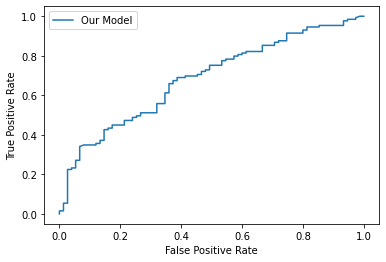

saving model


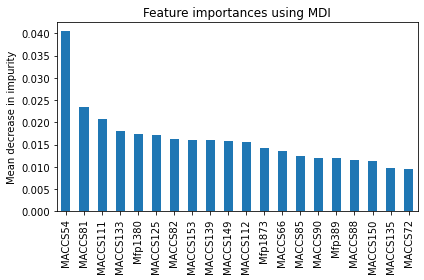

1
Best Threshold=0.623804
[[43 25]
 [38 98]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.58        68
           1       0.80      0.72      0.76       136

    accuracy                           0.69       204
   macro avg       0.66      0.68      0.67       204
weighted avg       0.71      0.69      0.70       204

balanced_accuracy_score  0.6764705882352942
matthews_corrcoef  0.3400409136337805
Sensitivity 0.6323529411764706
Specificity 0.7205882352941176
f1 0.7567567567567567
LR+ 2.263157894736842
ppv 0.7967479674796748
average_precision_score 0.8272933530230252
roc_auc_score 0.708910034602076


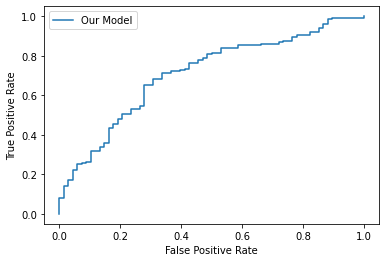

saving model


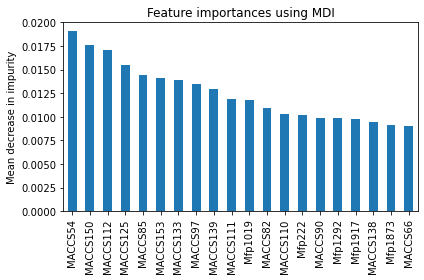

2
Best Threshold=0.650347
[[56 20]
 [46 82]]
              precision    recall  f1-score   support

           0       0.55      0.74      0.63        76
           1       0.80      0.64      0.71       128

    accuracy                           0.68       204
   macro avg       0.68      0.69      0.67       204
weighted avg       0.71      0.68      0.68       204

balanced_accuracy_score  0.688733552631579
matthews_corrcoef  0.36499819754421575
Sensitivity 0.7368421052631579
Specificity 0.640625
f1 0.7130434782608696
LR+ 2.0503432494279177
ppv 0.803921568627451
average_precision_score 0.8246615864019906
roc_auc_score 0.7581208881578948


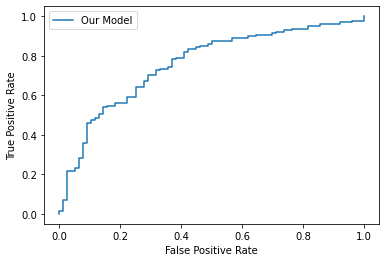

saving model


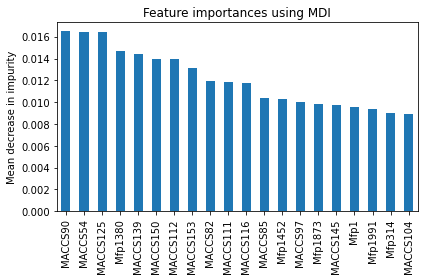

3
Best Threshold=0.649823
[[40 38]
 [48 78]]
              precision    recall  f1-score   support

           0       0.45      0.51      0.48        78
           1       0.67      0.62      0.64       126

    accuracy                           0.58       204
   macro avg       0.56      0.57      0.56       204
weighted avg       0.59      0.58      0.58       204

balanced_accuracy_score  0.5659340659340659
matthews_corrcoef  0.12939041236059312
Sensitivity 0.5128205128205128
Specificity 0.6190476190476191
f1 0.6446280991735537
LR+ 1.346153846153846
ppv 0.6724137931034483
average_precision_score 0.6830591793811172
roc_auc_score 0.6178266178266179


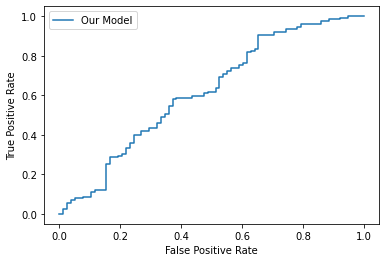

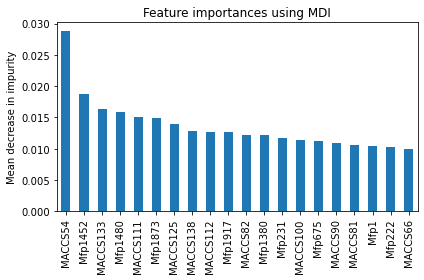

4
Best Threshold=0.639026
[[46 21]
 [47 90]]
              precision    recall  f1-score   support

           0       0.49      0.69      0.58        67
           1       0.81      0.66      0.73       137

    accuracy                           0.67       204
   macro avg       0.65      0.67      0.65       204
weighted avg       0.71      0.67      0.68       204

balanced_accuracy_score  0.6717507353742238
matthews_corrcoef  0.3239092288546791
Sensitivity 0.6865671641791045
Specificity 0.656934306569343
f1 0.7258064516129032
LR+ 2.0012702445220705
ppv 0.8108108108108109
average_precision_score 0.8098640347363698
roc_auc_score 0.6932127682754113


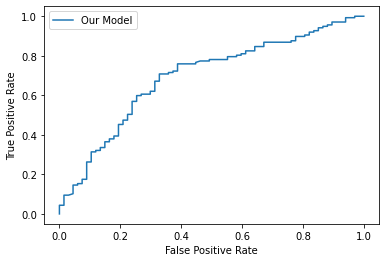

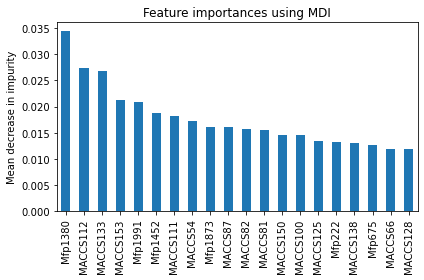

  9%|████                                        | 1/11 [00:43<07:12, 43.30s/it]

43
0
Best Threshold=0.606861
[[ 39  19]
 [ 46 100]]
              precision    recall  f1-score   support

           0       0.46      0.67      0.55        58
           1       0.84      0.68      0.75       146

    accuracy                           0.68       204
   macro avg       0.65      0.68      0.65       204
weighted avg       0.73      0.68      0.70       204

balanced_accuracy_score  0.6786726499763817
matthews_corrcoef  0.32696070072380484
Sensitivity 0.6724137931034483
Specificity 0.684931506849315
f1 0.7547169811320755
LR+ 2.134182908545727
ppv 0.8403361344537815
average_precision_score 0.8352817701083828
roc_auc_score 0.6875295229097781


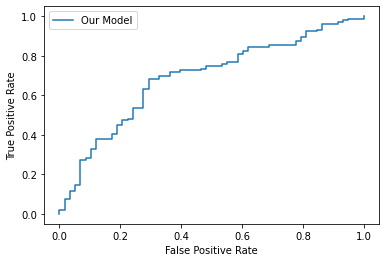

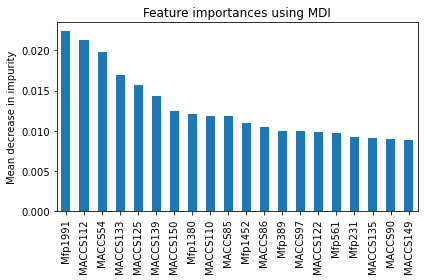

1
Best Threshold=0.585569
[[39 40]
 [26 99]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        79
           1       0.71      0.79      0.75       125

    accuracy                           0.68       204
   macro avg       0.66      0.64      0.65       204
weighted avg       0.67      0.68      0.67       204

balanced_accuracy_score  0.6428354430379747
matthews_corrcoef  0.29865545770181495
Sensitivity 0.4936708860759494
Specificity 0.792
f1 0.75
LR+ 2.373417721518988
ppv 0.7122302158273381
average_precision_score 0.8165805355270308
roc_auc_score 0.7273417721518988


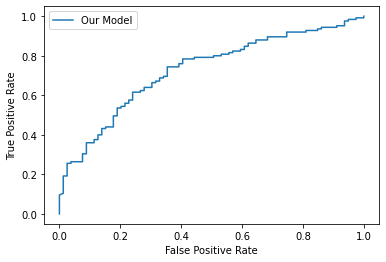

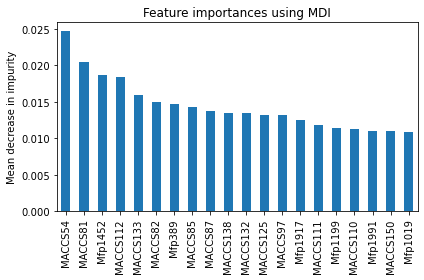

2
Best Threshold=0.656684
[[52 21]
 [54 77]]
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        73
           1       0.79      0.59      0.67       131

    accuracy                           0.63       204
   macro avg       0.64      0.65      0.63       204
weighted avg       0.68      0.63      0.64       204

balanced_accuracy_score  0.6500575133326362
matthews_corrcoef  0.28795117058162356
Sensitivity 0.7123287671232876
Specificity 0.5877862595419847
f1 0.6724890829694323
LR+ 1.7280568239472347
ppv 0.7857142857142857
average_precision_score 0.8038488092628949
roc_auc_score 0.7024992157272822


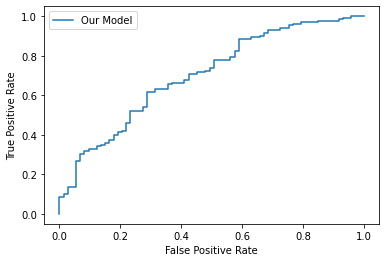

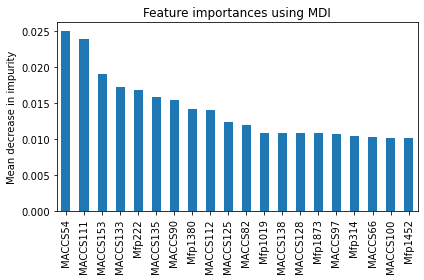

3
Best Threshold=0.744256
[[60 18]
 [82 44]]
              precision    recall  f1-score   support

           0       0.42      0.77      0.55        78
           1       0.71      0.35      0.47       126

    accuracy                           0.51       204
   macro avg       0.57      0.56      0.51       204
weighted avg       0.60      0.51      0.50       204

balanced_accuracy_score  0.5592185592185592
matthews_corrcoef  0.1251354585715553
Sensitivity 0.7692307692307693
Specificity 0.3492063492063492
f1 0.4680851063829788
LR+ 1.1819887429643527
ppv 0.7096774193548387
average_precision_score 0.7373332153141181
roc_auc_score 0.6494200244200243


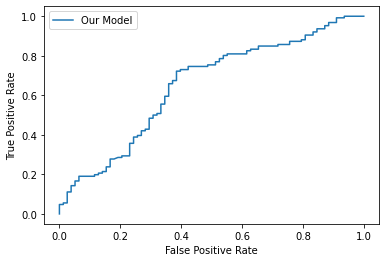

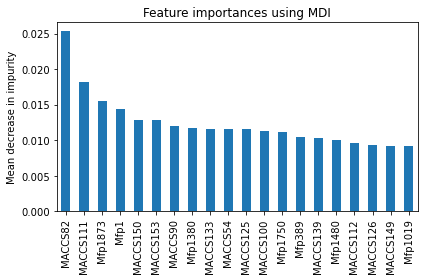

4
Best Threshold=0.637725
[[46 30]
 [41 87]]
              precision    recall  f1-score   support

           0       0.53      0.61      0.56        76
           1       0.74      0.68      0.71       128

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.66      0.65      0.66       204

balanced_accuracy_score  0.6424753289473684
matthews_corrcoef  0.27856650011825446
Sensitivity 0.6052631578947368
Specificity 0.6796875
f1 0.710204081632653
LR+ 1.889602053915276
ppv 0.7435897435897436
average_precision_score 0.7448452883363399
roc_auc_score 0.6906866776315789


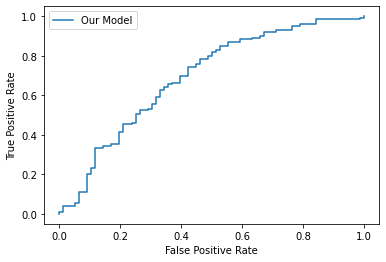

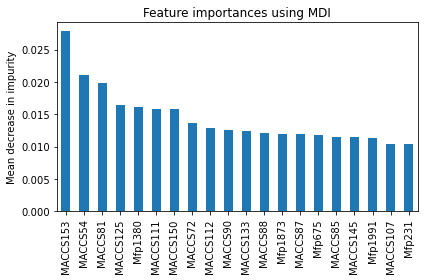

 18%|████████                                    | 2/11 [01:21<06:05, 40.57s/it]

44
0
Best Threshold=0.651911
[[48 33]
 [47 76]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        81
           1       0.70      0.62      0.66       123

    accuracy                           0.61       204
   macro avg       0.60      0.61      0.60       204
weighted avg       0.62      0.61      0.61       204

balanced_accuracy_score  0.6052393857271906
matthews_corrcoef  0.2064563826273131
Sensitivity 0.5925925925925926
Specificity 0.6178861788617886
f1 0.6551724137931035
LR+ 1.5508274231678487
ppv 0.6972477064220184
average_precision_score 0.7245135580569634
roc_auc_score 0.6551239586469939


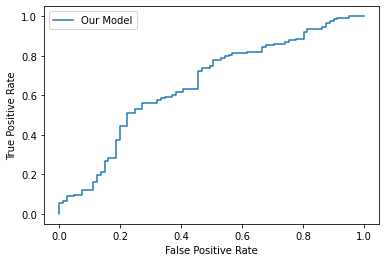

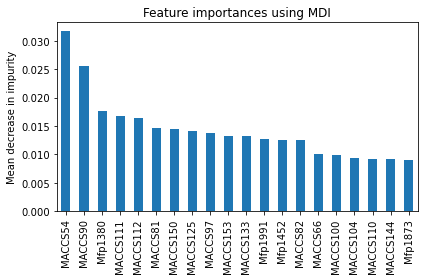

1
Best Threshold=0.568662
[[ 29  42]
 [ 24 109]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        71
           1       0.72      0.82      0.77       133

    accuracy                           0.68       204
   macro avg       0.63      0.61      0.62       204
weighted avg       0.66      0.68      0.66       204

balanced_accuracy_score  0.6139997882029016
matthews_corrcoef  0.2476638538039643
Sensitivity 0.4084507042253521
Specificity 0.8195488721804511
f1 0.767605633802817
LR+ 2.26349765258216
ppv 0.7218543046357616
average_precision_score 0.8136558540504147
roc_auc_score 0.7225458011225245


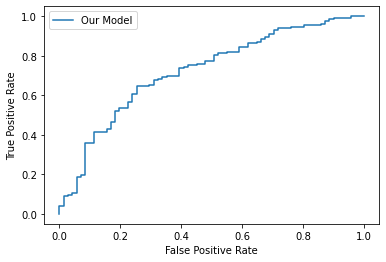

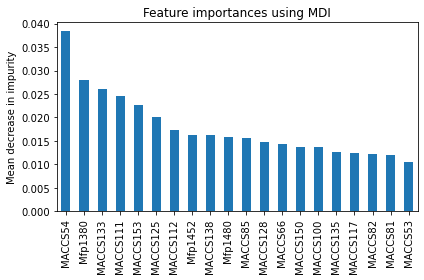

2
Best Threshold=0.594999
[[44 20]
 [62 78]]
              precision    recall  f1-score   support

           0       0.42      0.69      0.52        64
           1       0.80      0.56      0.66       140

    accuracy                           0.60       204
   macro avg       0.61      0.62      0.59       204
weighted avg       0.68      0.60      0.61       204

balanced_accuracy_score  0.6223214285714286
matthews_corrcoef  0.2272064073182942
Sensitivity 0.6875
Specificity 0.5571428571428572
f1 0.6554621848739496
LR+ 1.5524193548387097
ppv 0.7959183673469388
average_precision_score 0.793709533335719
roc_auc_score 0.6874999999999999


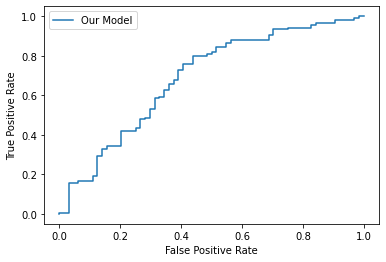

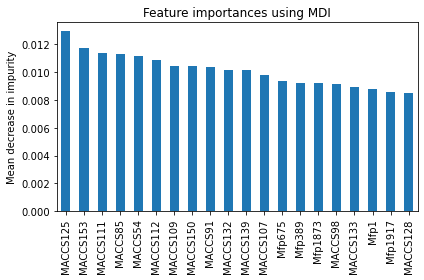

3
Best Threshold=0.663007
[[48 33]
 [44 79]]
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        81
           1       0.71      0.64      0.67       123

    accuracy                           0.62       204
   macro avg       0.61      0.62      0.61       204
weighted avg       0.63      0.62      0.63       204

balanced_accuracy_score  0.6174345076784101
matthews_corrcoef  0.23094994717314374
Sensitivity 0.5925925925925926
Specificity 0.6422764227642277
f1 0.6723404255319149
LR+ 1.6565656565656568
ppv 0.7053571428571429
average_precision_score 0.7077864469529782
roc_auc_score 0.6641071966275219


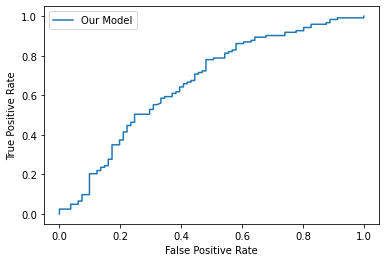

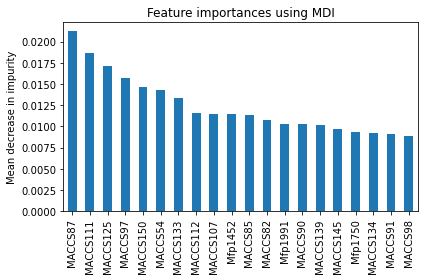

4
Best Threshold=0.577035
[[ 35  32]
 [ 32 105]]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        67
           1       0.77      0.77      0.77       137

    accuracy                           0.69       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.69      0.69      0.69       204

balanced_accuracy_score  0.644405708682863
matthews_corrcoef  0.28881141736572613
Sensitivity 0.5223880597014925
Specificity 0.7664233576642335
f1 0.7664233576642334
LR+ 2.236473880597014
ppv 0.7664233576642335
average_precision_score 0.8510934305873846
roc_auc_score 0.740004357773178


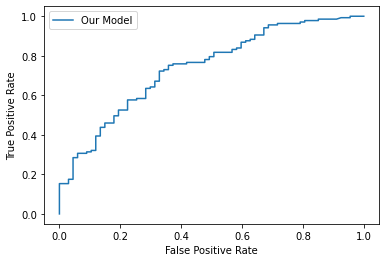

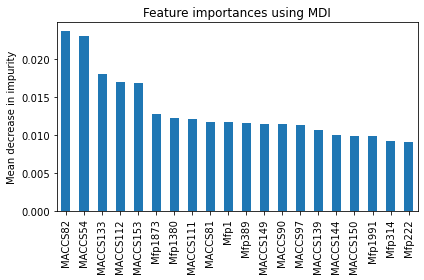

 27%|████████████                                | 3/11 [02:10<05:53, 44.23s/it]

45
0
Best Threshold=0.608330
[[37 44]
 [40 83]]
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        81
           1       0.65      0.67      0.66       123

    accuracy                           0.59       204
   macro avg       0.57      0.57      0.57       204
weighted avg       0.58      0.59      0.59       204

balanced_accuracy_score  0.5657934357121349
matthews_corrcoef  0.1328190603622175
Sensitivity 0.4567901234567901
Specificity 0.6747967479674797
f1 0.664
LR+ 1.4046296296296297
ppv 0.6535433070866141
average_precision_score 0.7084970086365507
roc_auc_score 0.6247114322995082


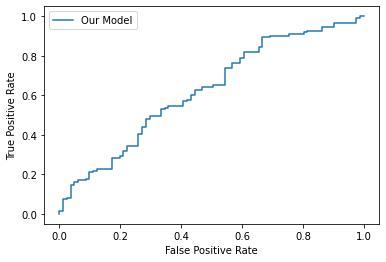

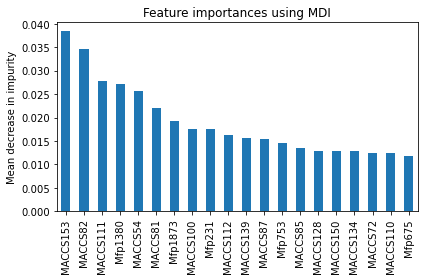

1
Best Threshold=0.575490
[[57 18]
 [50 79]]
              precision    recall  f1-score   support

           0       0.53      0.76      0.63        75
           1       0.81      0.61      0.70       129

    accuracy                           0.67       204
   macro avg       0.67      0.69      0.66       204
weighted avg       0.71      0.67      0.67       204

balanced_accuracy_score  0.6862015503875969
matthews_corrcoef  0.3595514291242356
Sensitivity 0.76
Specificity 0.6124031007751938
f1 0.6991150442477876
LR+ 1.9607999999999999
ppv 0.8144329896907216
average_precision_score 0.7868360823420342
roc_auc_score 0.7403617571059432


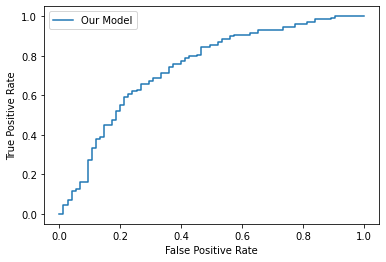

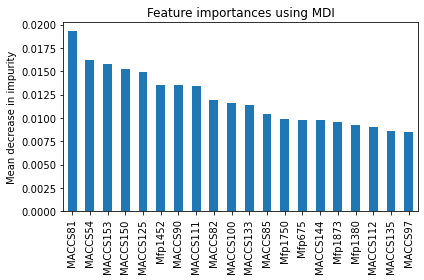

2
Best Threshold=0.595168
[[39 30]
 [39 96]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        69
           1       0.76      0.71      0.74       135

    accuracy                           0.66       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.67      0.66      0.67       204

balanced_accuracy_score  0.6381642512077295
matthews_corrcoef  0.26901998184636805
Sensitivity 0.5652173913043478
Specificity 0.7111111111111111
f1 0.735632183908046
LR+ 1.9565217391304348
ppv 0.7619047619047619
average_precision_score 0.8147891319970728
roc_auc_score 0.7055287171229201


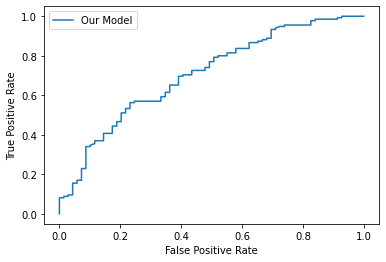

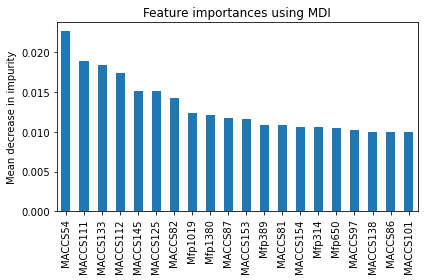

3
Best Threshold=0.581158
[[ 38  31]
 [ 34 101]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        69
           1       0.77      0.75      0.76       135

    accuracy                           0.68       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6494363929146538
matthews_corrcoef  0.29588611631637446
Sensitivity 0.5507246376811594
Specificity 0.7481481481481481
f1 0.7565543071161048
LR+ 2.1867007672634267
ppv 0.7651515151515151
average_precision_score 0.8126058678678187
roc_auc_score 0.7003220611916264


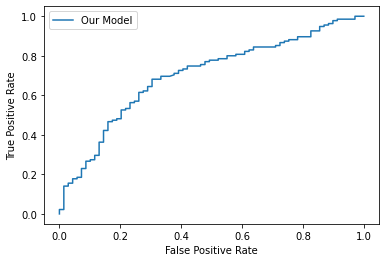

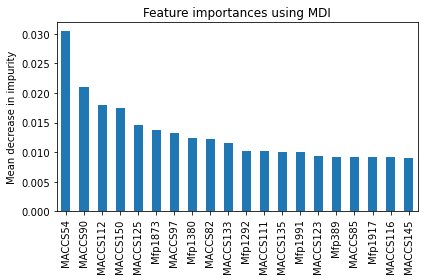

4
Best Threshold=0.613856
[[ 37  33]
 [ 31 103]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        70
           1       0.76      0.77      0.76       134

    accuracy                           0.69       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.69      0.69       204

balanced_accuracy_score  0.6486140724946695
matthews_corrcoef  0.2993418509163417
Sensitivity 0.5285714285714286
Specificity 0.7686567164179104
f1 0.7629629629629631
LR+ 2.2847926267281107
ppv 0.7573529411764706
average_precision_score 0.8067011535266051
roc_auc_score 0.7109808102345416


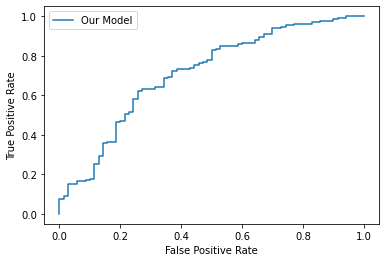

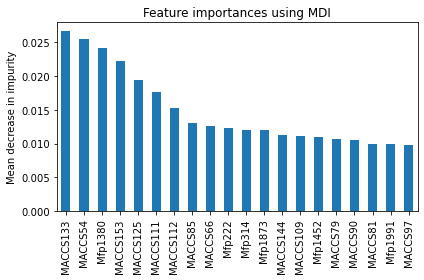

 36%|████████████████                            | 4/11 [02:54<05:10, 44.30s/it]

46
0
Best Threshold=0.534347
[[45 28]
 [41 90]]
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        73
           1       0.76      0.69      0.72       131

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6517306284638712
matthews_corrcoef  0.2945846416837023
Sensitivity 0.6164383561643836
Specificity 0.6870229007633588
f1 0.7228915662650602
LR+ 1.969595723354494
ppv 0.7627118644067796
average_precision_score 0.8117947004583272
roc_auc_score 0.7061591550768587


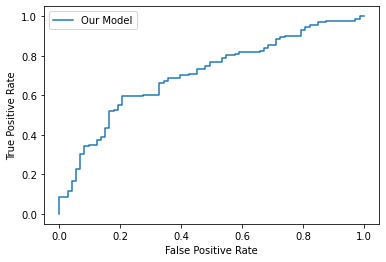

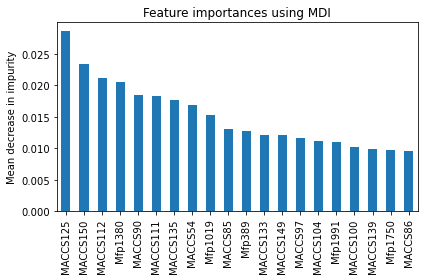

1
Best Threshold=0.546634
[[ 25  49]
 [ 19 111]]
              precision    recall  f1-score   support

           0       0.57      0.34      0.42        74
           1       0.69      0.85      0.77       130

    accuracy                           0.67       204
   macro avg       0.63      0.60      0.59       204
weighted avg       0.65      0.67      0.64       204

balanced_accuracy_score  0.5958419958419958
matthews_corrcoef  0.2240717216833406
Sensitivity 0.33783783783783783
Specificity 0.8538461538461538
f1 0.7655172413793103
LR+ 2.311522048364153
ppv 0.69375
average_precision_score 0.7579162702115745
roc_auc_score 0.6898128898128898


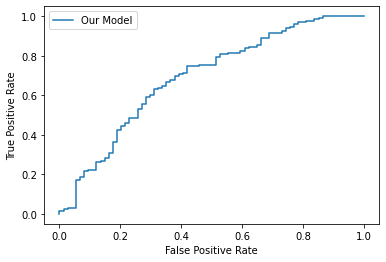

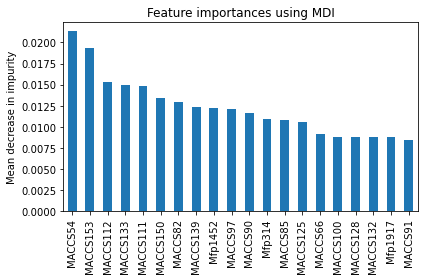

2
Best Threshold=0.668800
[[51 18]
 [69 66]]
              precision    recall  f1-score   support

           0       0.42      0.74      0.54        69
           1       0.79      0.49      0.60       135

    accuracy                           0.57       204
   macro avg       0.61      0.61      0.57       204
weighted avg       0.66      0.57      0.58       204

balanced_accuracy_score  0.6140096618357488
matthews_corrcoef  0.21919609694630543
Sensitivity 0.7391304347826086
Specificity 0.4888888888888889
f1 0.6027397260273972
LR+ 1.446124763705104
ppv 0.7857142857142857
average_precision_score 0.7588446266146562
roc_auc_score 0.6542136339237787


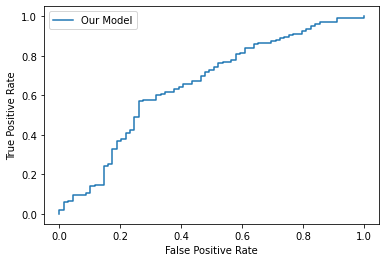

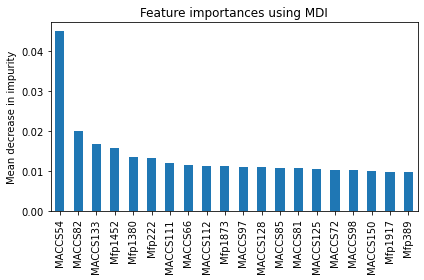

3
Best Threshold=0.662551
[[56 22]
 [48 78]]
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        78
           1       0.78      0.62      0.69       126

    accuracy                           0.66       204
   macro avg       0.66      0.67      0.65       204
weighted avg       0.69      0.66      0.66       204

balanced_accuracy_score  0.6684981684981686
matthews_corrcoef  0.32759788145797974
Sensitivity 0.717948717948718
Specificity 0.6190476190476191
f1 0.6902654867256637
LR+ 1.8846153846153848
ppv 0.78
average_precision_score 0.8490914803430591
roc_auc_score 0.766025641025641


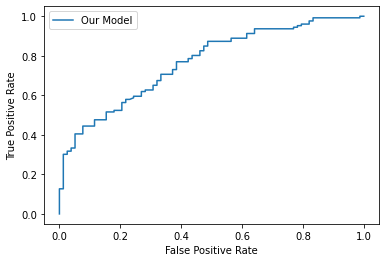

saving model


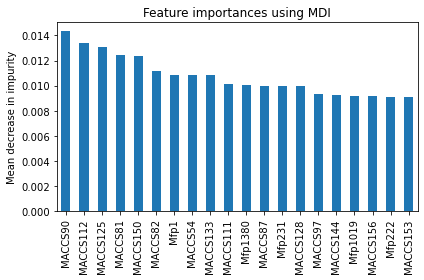

4
Best Threshold=0.596735
[[32 38]
 [36 98]]
              precision    recall  f1-score   support

           0       0.47      0.46      0.46        70
           1       0.72      0.73      0.73       134

    accuracy                           0.64       204
   macro avg       0.60      0.59      0.59       204
weighted avg       0.63      0.64      0.64       204

balanced_accuracy_score  0.5942430703624734
matthews_corrcoef  0.18982653960548496
Sensitivity 0.45714285714285713
Specificity 0.7313432835820896
f1 0.7259259259259259
LR+ 1.7015873015873015
ppv 0.7205882352941176
average_precision_score 0.7488835976888413
roc_auc_score 0.6373134328358209


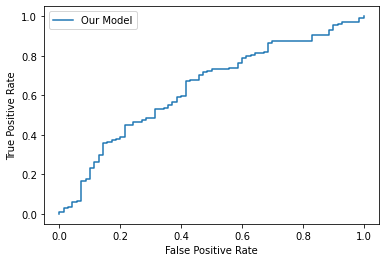

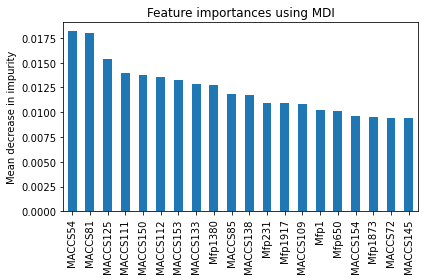

 45%|████████████████████                        | 5/11 [03:43<04:34, 45.75s/it]

47
0
Best Threshold=0.521207
[[42 32]
 [38 92]]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        74
           1       0.74      0.71      0.72       130

    accuracy                           0.66       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.66      0.66      0.66       204

balanced_accuracy_score  0.6376299376299377
matthews_corrcoef  0.27106572633359055
Sensitivity 0.5675675675675675
Specificity 0.7076923076923077
f1 0.7244094488188977
LR+ 1.9416785206258893
ppv 0.7419354838709677
average_precision_score 0.8245349250734394
roc_auc_score 0.7323284823284824


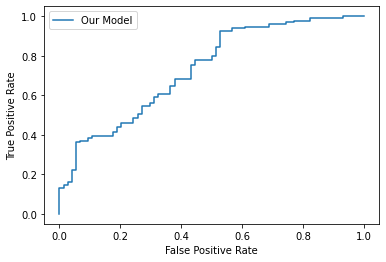

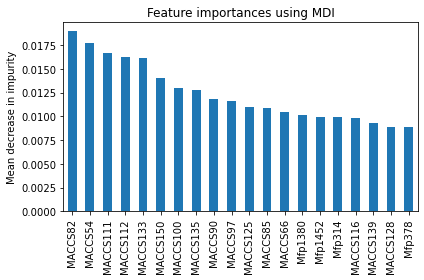

1
Best Threshold=0.651980
[[44 31]
 [49 80]]
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        75
           1       0.72      0.62      0.67       129

    accuracy                           0.61       204
   macro avg       0.60      0.60      0.60       204
weighted avg       0.63      0.61      0.61       204

balanced_accuracy_score  0.6034108527131783
matthews_corrcoef  0.2002251548088917
Sensitivity 0.5866666666666667
Specificity 0.6201550387596899
f1 0.6666666666666666
LR+ 1.5444897959183672
ppv 0.7207207207207207
average_precision_score 0.7157164571585253
roc_auc_score 0.6363824289405685


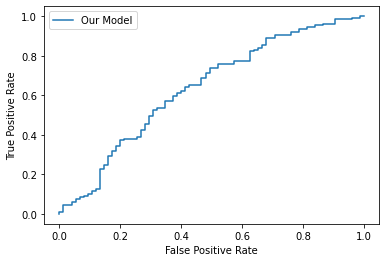

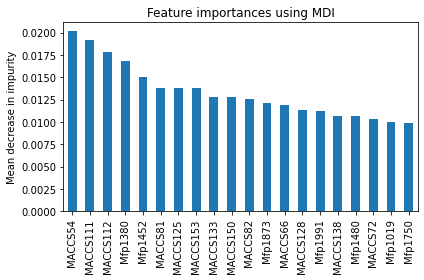

2
Best Threshold=0.547935
[[ 24  38]
 [ 37 105]]
              precision    recall  f1-score   support

           0       0.39      0.39      0.39        62
           1       0.73      0.74      0.74       142

    accuracy                           0.63       204
   macro avg       0.56      0.56      0.56       204
weighted avg       0.63      0.63      0.63       204

balanced_accuracy_score  0.5632666969559291
matthews_corrcoef  0.12711951805100005
Sensitivity 0.3870967741935484
Specificity 0.7394366197183099
f1 0.736842105263158
LR+ 1.4856146469049696
ppv 0.7342657342657343
average_precision_score 0.7538176174978597
roc_auc_score 0.6042707860063607


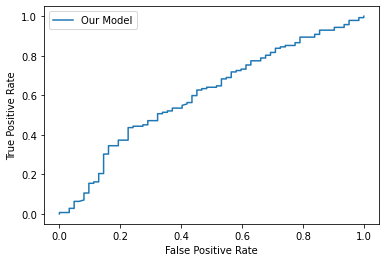

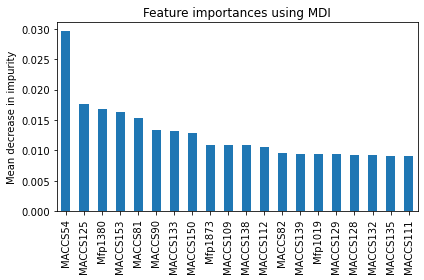

3
Best Threshold=0.625353
[[43 34]
 [32 95]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57        77
           1       0.74      0.75      0.74       127

    accuracy                           0.68       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.67      0.68      0.68       204

balanced_accuracy_score  0.6532365272522753
matthews_corrcoef  0.3081158452482402
Sensitivity 0.5584415584415584
Specificity 0.7480314960629921
f1 0.7421875
LR+ 2.216314935064935
ppv 0.7364341085271318
average_precision_score 0.8074069028561417
roc_auc_score 0.7221597300337458


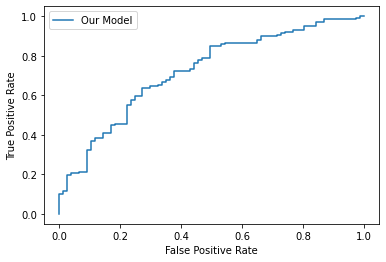

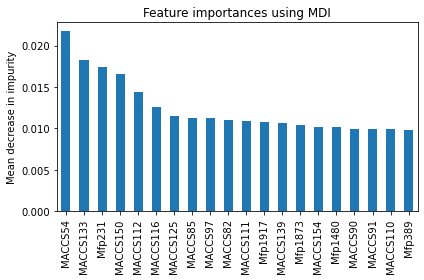

4
Best Threshold=0.682711
[[63 13]
 [48 80]]
              precision    recall  f1-score   support

           0       0.57      0.83      0.67        76
           1       0.86      0.62      0.72       128

    accuracy                           0.70       204
   macro avg       0.71      0.73      0.70       204
weighted avg       0.75      0.70      0.71       204

balanced_accuracy_score  0.7269736842105263
matthews_corrcoef  0.44067084678870116
Sensitivity 0.8289473684210527
Specificity 0.625
f1 0.7239819004524886
LR+ 2.210526315789474
ppv 0.8602150537634409
average_precision_score 0.8393342492503432
roc_auc_score 0.7712787828947368


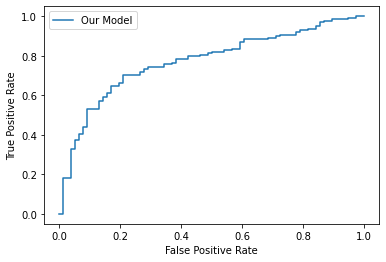

saving model


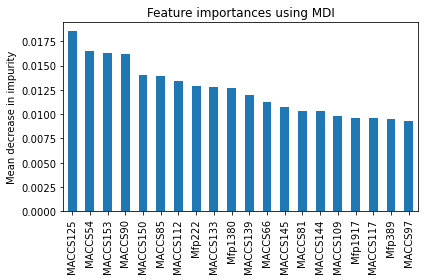

 55%|████████████████████████                    | 6/11 [04:27<03:46, 45.34s/it]

48
0
Best Threshold=0.618249
[[55 13]
 [64 72]]
              precision    recall  f1-score   support

           0       0.46      0.81      0.59        68
           1       0.85      0.53      0.65       136

    accuracy                           0.62       204
   macro avg       0.65      0.67      0.62       204
weighted avg       0.72      0.62      0.63       204

balanced_accuracy_score  0.6691176470588236
matthews_corrcoef  0.3234148001728359
Sensitivity 0.8088235294117647
Specificity 0.5294117647058824
f1 0.6515837104072398
LR+ 1.71875
ppv 0.8470588235294118
average_precision_score 0.8289712025656333
roc_auc_score 0.7222642733564014


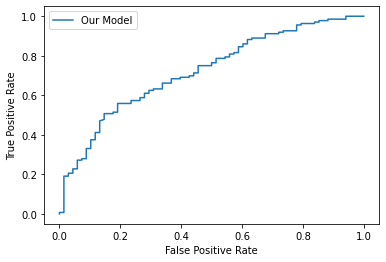

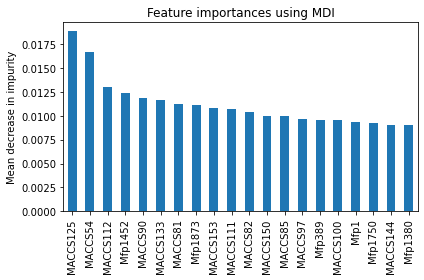

1
Best Threshold=0.509411
[[39 39]
 [34 92]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        78
           1       0.70      0.73      0.72       126

    accuracy                           0.64       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.6150793650793651
matthews_corrcoef  0.2333258995188606
Sensitivity 0.5
Specificity 0.7301587301587301
f1 0.7159533073929961
LR+ 1.8529411764705879
ppv 0.7022900763358778
average_precision_score 0.7511149964219438
roc_auc_score 0.6797415547415547


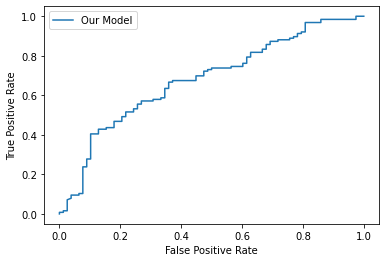

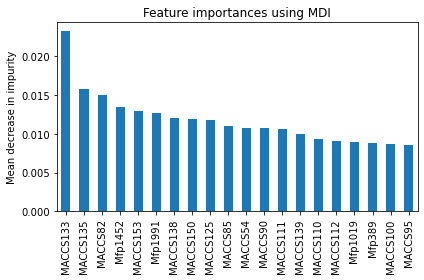

2
Best Threshold=0.664167
[[45 23]
 [61 75]]
              precision    recall  f1-score   support

           0       0.42      0.66      0.52        68
           1       0.77      0.55      0.64       136

    accuracy                           0.59       204
   macro avg       0.59      0.61      0.58       204
weighted avg       0.65      0.59      0.60       204

balanced_accuracy_score  0.6066176470588236
matthews_corrcoef  0.20119492863114757
Sensitivity 0.6617647058823529
Specificity 0.5514705882352942
f1 0.6410256410256411
LR+ 1.4754098360655739
ppv 0.7653061224489796
average_precision_score 0.7375667196322014
roc_auc_score 0.6262975778546712


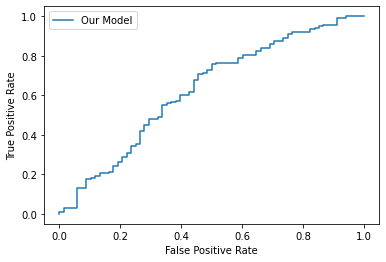

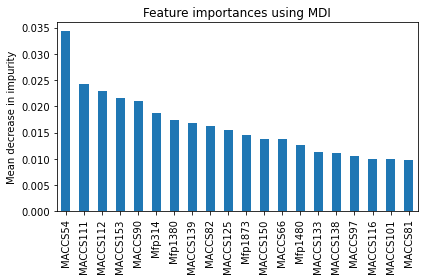

3
Best Threshold=0.665574
[[44 26]
 [66 68]]
              precision    recall  f1-score   support

           0       0.40      0.63      0.49        70
           1       0.72      0.51      0.60       134

    accuracy                           0.55       204
   macro avg       0.56      0.57      0.54       204
weighted avg       0.61      0.55      0.56       204

balanced_accuracy_score  0.5680170575692964
matthews_corrcoef  0.12956538379010576
Sensitivity 0.6285714285714286
Specificity 0.5074626865671642
f1 0.5964912280701754
LR+ 1.2761904761904763
ppv 0.723404255319149
average_precision_score 0.7400772295406154
roc_auc_score 0.6329957356076759


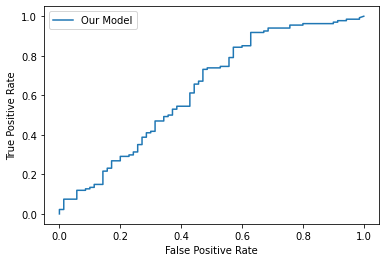

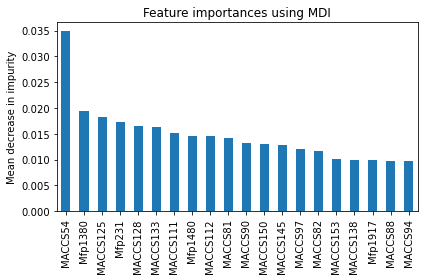

4
Best Threshold=0.650945
[[50 30]
 [42 82]]
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        80
           1       0.73      0.66      0.69       124

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6431451612903225
matthews_corrcoef  0.280905070772698
Sensitivity 0.625
Specificity 0.6612903225806451
f1 0.6949152542372881
LR+ 1.8452380952380951
ppv 0.7321428571428571
average_precision_score 0.7919054580139842
roc_auc_score 0.7037298387096773


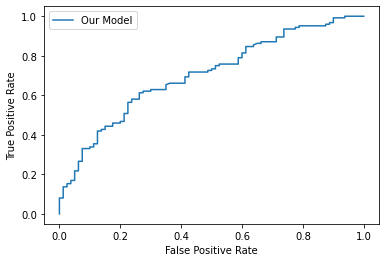

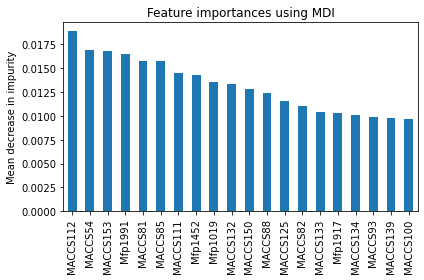

 64%|████████████████████████████                | 7/11 [05:21<03:12, 48.06s/it]

49
0
Best Threshold=0.678335
[[56 19]
 [52 77]]
              precision    recall  f1-score   support

           0       0.52      0.75      0.61        75
           1       0.80      0.60      0.68       129

    accuracy                           0.65       204
   macro avg       0.66      0.67      0.65       204
weighted avg       0.70      0.65      0.66       204

balanced_accuracy_score  0.6717829457364342
matthews_corrcoef  0.3318853130816938
Sensitivity 0.7466666666666667
Specificity 0.5968992248062015
f1 0.6844444444444445
LR+ 1.8523076923076922
ppv 0.8020833333333334
average_precision_score 0.8064059340488478
roc_auc_score 0.7160206718346253


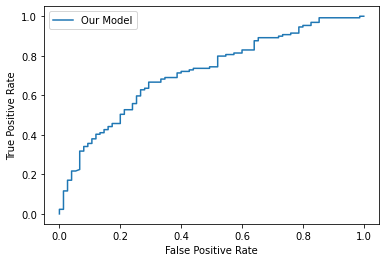

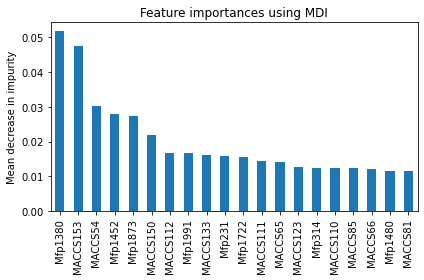

1
Best Threshold=0.628390
[[43 27]
 [53 81]]
              precision    recall  f1-score   support

           0       0.45      0.61      0.52        70
           1       0.75      0.60      0.67       134

    accuracy                           0.61       204
   macro avg       0.60      0.61      0.59       204
weighted avg       0.65      0.61      0.62       204

balanced_accuracy_score  0.6093816631130065
matthews_corrcoef  0.20807909149062775
Sensitivity 0.6142857142857143
Specificity 0.6044776119402985
f1 0.6694214876033057
LR+ 1.553099730458221
ppv 0.75
average_precision_score 0.7640611752005744
roc_auc_score 0.679637526652452


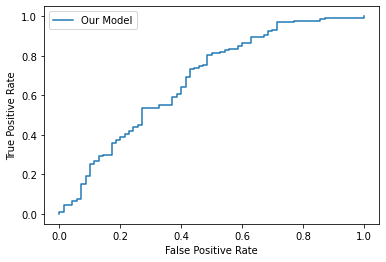

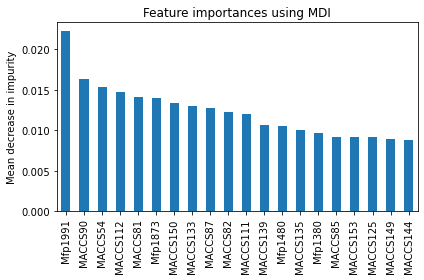

2
Best Threshold=0.648698
[[45 21]
 [61 77]]
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        66
           1       0.79      0.56      0.65       138

    accuracy                           0.60       204
   macro avg       0.61      0.62      0.59       204
weighted avg       0.67      0.60      0.61       204

balanced_accuracy_score  0.6198945981554678
matthews_corrcoef  0.22453040130724833
Sensitivity 0.6818181818181818
Specificity 0.5579710144927537
f1 0.6525423728813559
LR+ 1.5424739195230999
ppv 0.7857142857142857
average_precision_score 0.7743055919525467
roc_auc_score 0.6732542819499341


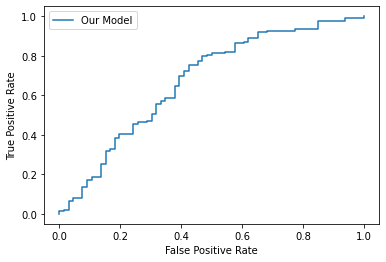

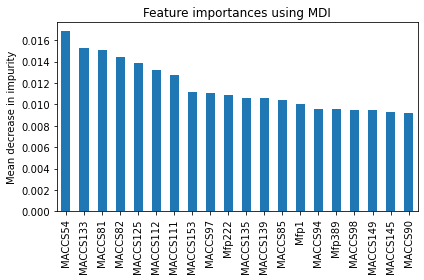

3
Best Threshold=0.443480
[[ 32  46]
 [ 22 104]]
              precision    recall  f1-score   support

           0       0.59      0.41      0.48        78
           1       0.69      0.83      0.75       126

    accuracy                           0.67       204
   macro avg       0.64      0.62      0.62       204
weighted avg       0.65      0.67      0.65       204

balanced_accuracy_score  0.6178266178266179
matthews_corrcoef  0.25957536401128634
Sensitivity 0.41025641025641024
Specificity 0.8253968253968254
f1 0.7536231884057971
LR+ 2.349650349650349
ppv 0.6933333333333334
average_precision_score 0.7798881599936208
roc_auc_score 0.702991452991453


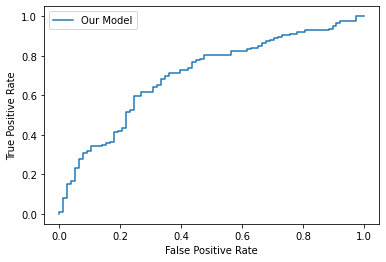

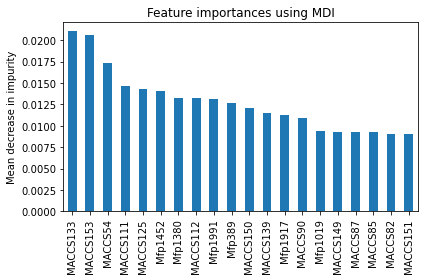

4
Best Threshold=0.598316
[[42 33]
 [33 96]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        75
           1       0.74      0.74      0.74       129

    accuracy                           0.68       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.652093023255814
matthews_corrcoef  0.3041860465116279
Sensitivity 0.56
Specificity 0.7441860465116279
f1 0.7441860465116278
LR+ 2.1890909090909094
ppv 0.7441860465116279
average_precision_score 0.807943008958466
roc_auc_score 0.7172093023255816


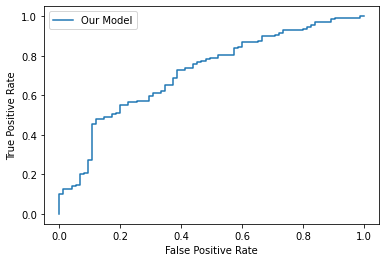

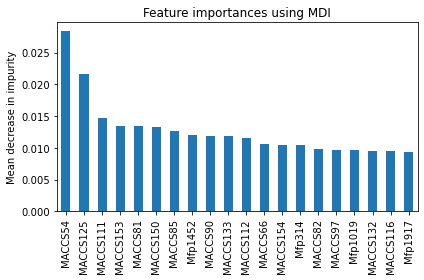

 73%|████████████████████████████████            | 8/11 [06:07<02:21, 47.29s/it]

50
0
Best Threshold=0.657953
[[55 28]
 [42 79]]
              precision    recall  f1-score   support

           0       0.57      0.66      0.61        83
           1       0.74      0.65      0.69       121

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.6577715821965548
matthews_corrcoef  0.3103935956401949
Sensitivity 0.6626506024096386
Specificity 0.6528925619834711
f1 0.6929824561403509
LR+ 1.909064830751578
ppv 0.7383177570093458
average_precision_score 0.7554407083012404
roc_auc_score 0.7112416608583093


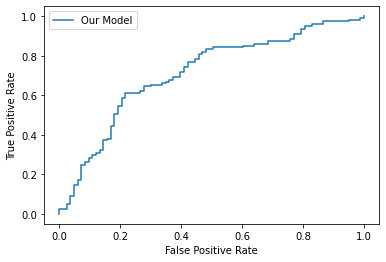

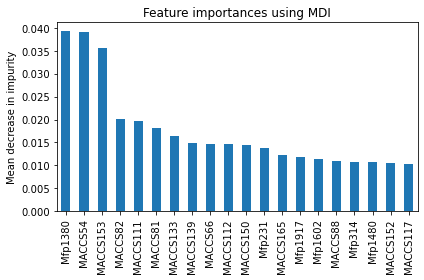

1
Best Threshold=0.648525
[[54 19]
 [62 69]]
              precision    recall  f1-score   support

           0       0.47      0.74      0.57        73
           1       0.78      0.53      0.63       131

    accuracy                           0.60       204
   macro avg       0.62      0.63      0.60       204
weighted avg       0.67      0.60      0.61       204

balanced_accuracy_score  0.6332217923245843
matthews_corrcoef  0.2578885231431099
Sensitivity 0.7397260273972602
Specificity 0.5267175572519084
f1 0.6301369863013698
LR+ 1.5629695095006628
ppv 0.7840909090909091
average_precision_score 0.7845853498133699
roc_auc_score 0.7298964760012548


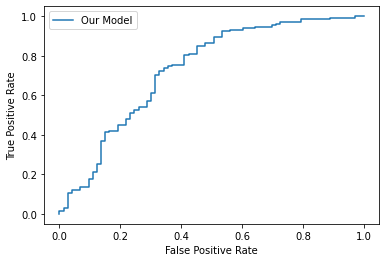

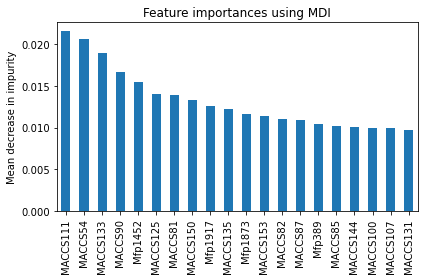

2
Best Threshold=0.644468
[[46 22]
 [39 97]]
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        68
           1       0.82      0.71      0.76       136

    accuracy                           0.70       204
   macro avg       0.68      0.69      0.68       204
weighted avg       0.72      0.70      0.71       204

balanced_accuracy_score  0.6948529411764706
matthews_corrcoef  0.37263009585131096
Sensitivity 0.6764705882352942
Specificity 0.7132352941176471
f1 0.7607843137254903
LR+ 2.3589743589743595
ppv 0.8151260504201681
average_precision_score 0.8502753845367247
roc_auc_score 0.7453503460207612


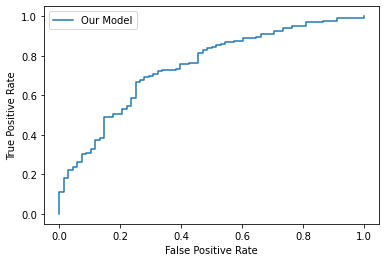

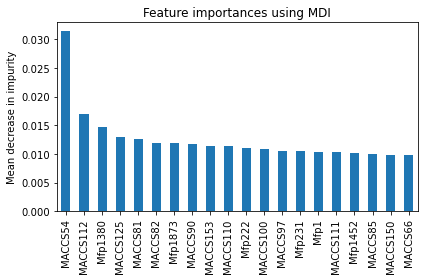

3
Best Threshold=0.594310
[[ 39  35]
 [ 30 100]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        74
           1       0.74      0.77      0.75       130

    accuracy                           0.68       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.68      0.68      0.68       204

balanced_accuracy_score  0.6481288981288982
matthews_corrcoef  0.3010688990029189
Sensitivity 0.527027027027027
Specificity 0.7692307692307693
f1 0.7547169811320754
LR+ 2.2837837837837838
ppv 0.7407407407407407
average_precision_score 0.8012034627147088
roc_auc_score 0.6987525987525988


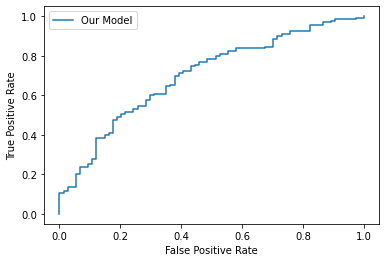

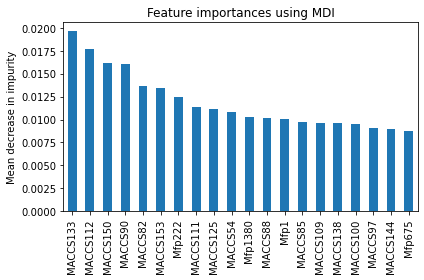

4
Best Threshold=0.637718
[[40 26]
 [44 94]]
              precision    recall  f1-score   support

           0       0.48      0.61      0.53        66
           1       0.78      0.68      0.73       138

    accuracy                           0.66       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6436100131752306
matthews_corrcoef  0.27302094317103337
Sensitivity 0.6060606060606061
Specificity 0.6811594202898551
f1 0.7286821705426356
LR+ 1.9008264462809918
ppv 0.7833333333333333
average_precision_score 0.7974740920505461
roc_auc_score 0.6793478260869565


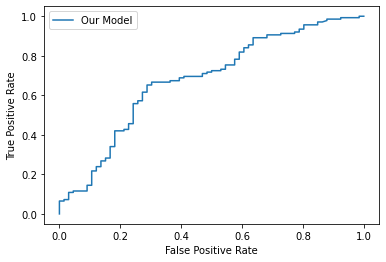

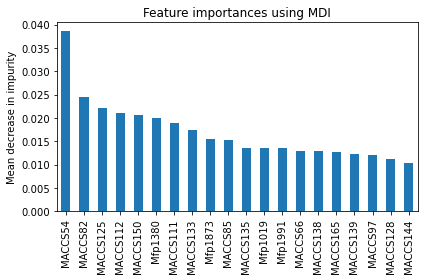

 82%|████████████████████████████████████        | 9/11 [06:51<01:32, 46.33s/it]

51
0
Best Threshold=0.678711
[[50 27]
 [57 70]]
              precision    recall  f1-score   support

           0       0.47      0.65      0.54        77
           1       0.72      0.55      0.62       127

    accuracy                           0.59       204
   macro avg       0.59      0.60      0.58       204
weighted avg       0.63      0.59      0.59       204

balanced_accuracy_score  0.600265875856427
matthews_corrcoef  0.19464919619122167
Sensitivity 0.6493506493506493
Specificity 0.5511811023622047
f1 0.625
LR+ 1.4467988152198679
ppv 0.7216494845360825
average_precision_score 0.7406230997190353
roc_auc_score 0.6374884957562122


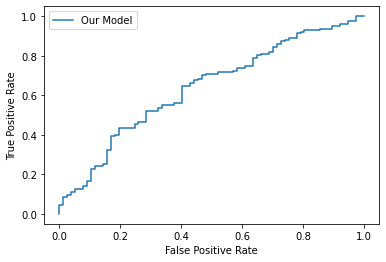

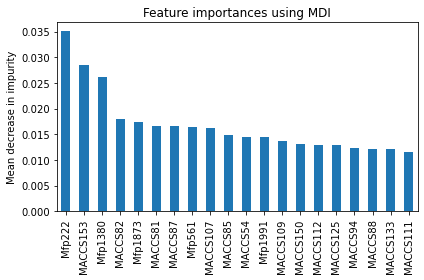

1
Best Threshold=0.580268
[[ 32  42]
 [ 30 100]]
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        74
           1       0.70      0.77      0.74       130

    accuracy                           0.65       204
   macro avg       0.61      0.60      0.60       204
weighted avg       0.64      0.65      0.64       204

balanced_accuracy_score  0.6008316008316008
matthews_corrcoef  0.21080173304014202
Sensitivity 0.43243243243243246
Specificity 0.7692307692307693
f1 0.7352941176470589
LR+ 1.8738738738738743
ppv 0.704225352112676
average_precision_score 0.7454419196193589
roc_auc_score 0.6607068607068607


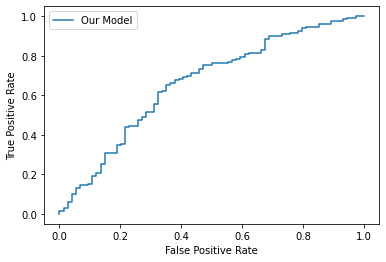

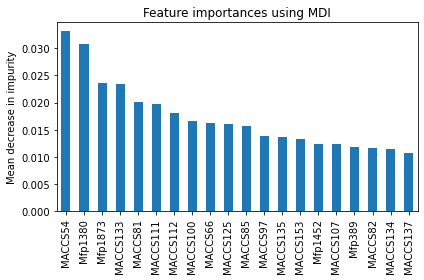

2
Best Threshold=0.605576
[[41 23]
 [43 97]]
              precision    recall  f1-score   support

           0       0.49      0.64      0.55        64
           1       0.81      0.69      0.75       140

    accuracy                           0.68       204
   macro avg       0.65      0.67      0.65       204
weighted avg       0.71      0.68      0.69       204

balanced_accuracy_score  0.6667410714285714
matthews_corrcoef  0.3144099794918756
Sensitivity 0.640625
Specificity 0.6928571428571428
f1 0.7461538461538462
LR+ 2.0857558139534884
ppv 0.8083333333333333
average_precision_score 0.844933511160568
roc_auc_score 0.7543526785714284


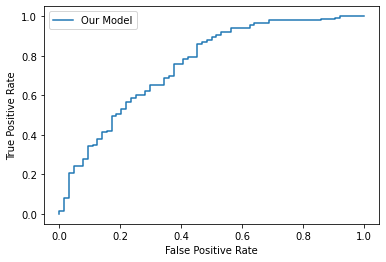

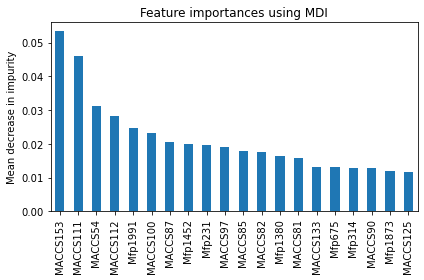

3
Best Threshold=0.616203
[[28 41]
 [42 93]]
              precision    recall  f1-score   support

           0       0.40      0.41      0.40        69
           1       0.69      0.69      0.69       135

    accuracy                           0.59       204
   macro avg       0.55      0.55      0.55       204
weighted avg       0.59      0.59      0.59       204

balanced_accuracy_score  0.5473429951690821
matthews_corrcoef  0.09435735021321985
Sensitivity 0.4057971014492754
Specificity 0.6888888888888889
f1 0.691449814126394
LR+ 1.3043478260869565
ppv 0.6940298507462687
average_precision_score 0.7230572410572174
roc_auc_score 0.5911433172302737


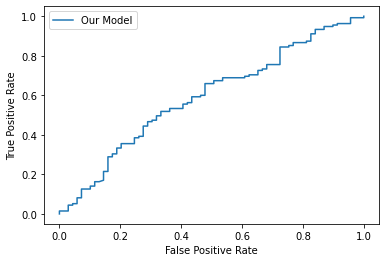

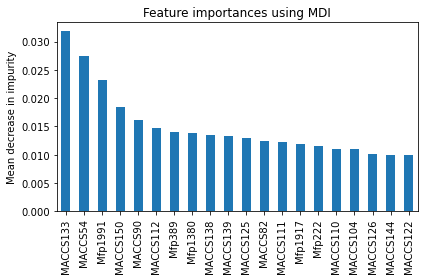

4
Best Threshold=0.691379
[[57 23]
 [63 61]]
              precision    recall  f1-score   support

           0       0.47      0.71      0.57        80
           1       0.73      0.49      0.59       124

    accuracy                           0.58       204
   macro avg       0.60      0.60      0.58       204
weighted avg       0.63      0.58      0.58       204

balanced_accuracy_score  0.6022177419354839
matthews_corrcoef  0.20280648991151742
Sensitivity 0.7125
Specificity 0.49193548387096775
f1 0.5865384615384616
LR+ 1.4023809523809525
ppv 0.7261904761904762
average_precision_score 0.7365822337226737
roc_auc_score 0.6715725806451613


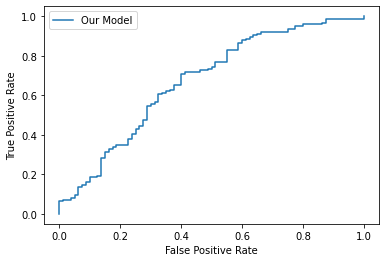

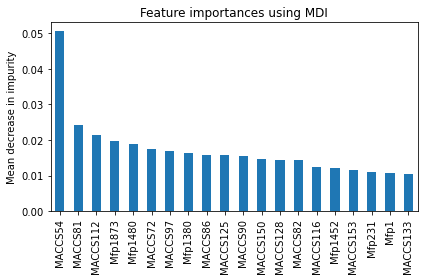

 91%|███████████████████████████████████████    | 10/11 [07:36<00:45, 45.88s/it]

52
0
Best Threshold=0.627012
[[38 28]
 [43 95]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        66
           1       0.77      0.69      0.73       138

    accuracy                           0.65       204
   macro avg       0.62      0.63      0.62       204
weighted avg       0.67      0.65      0.66       204

balanced_accuracy_score  0.6320816864295125
matthews_corrcoef  0.2525742353527539
Sensitivity 0.5757575757575758
Specificity 0.6884057971014492
f1 0.7279693486590038
LR+ 1.8477801268498941
ppv 0.7723577235772358
average_precision_score 0.7868061494742418
roc_auc_score 0.65689503732982


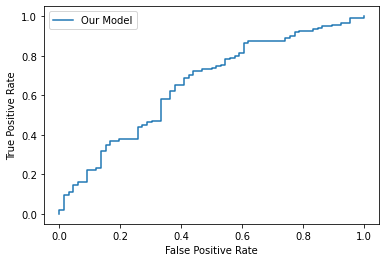

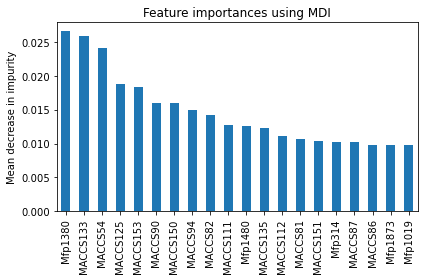

1
Best Threshold=0.613985
[[46 28]
 [41 89]]
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        74
           1       0.76      0.68      0.72       130

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.65       204
weighted avg       0.68      0.66      0.67       204

balanced_accuracy_score  0.6531185031185032
matthews_corrcoef  0.2977094698170128
Sensitivity 0.6216216216216216
Specificity 0.6846153846153846
f1 0.7206477732793521
LR+ 1.970995385629532
ppv 0.7606837606837606
average_precision_score 0.7882907122711036
roc_auc_score 0.6817047817047817


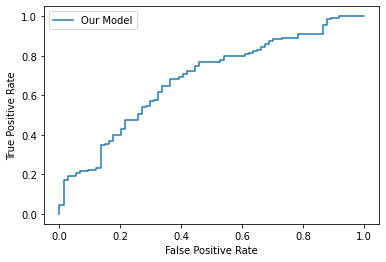

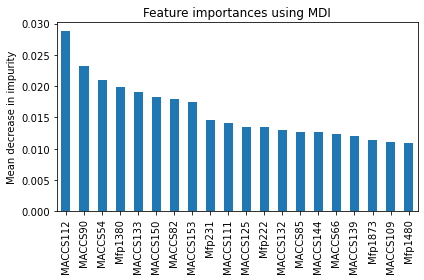

2
Best Threshold=0.648704
[[49 31]
 [40 84]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        80
           1       0.73      0.68      0.70       124

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.66      0.65      0.65       204

balanced_accuracy_score  0.6449596774193549
matthews_corrcoef  0.28542310223647116
Sensitivity 0.6125
Specificity 0.6774193548387096
f1 0.702928870292887
LR+ 1.89875
ppv 0.7304347826086957
average_precision_score 0.7467592366452134
roc_auc_score 0.6874495967741936


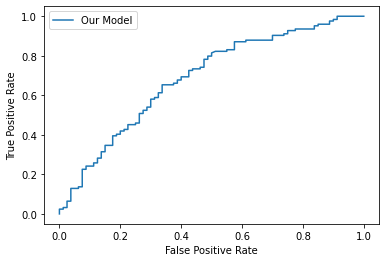

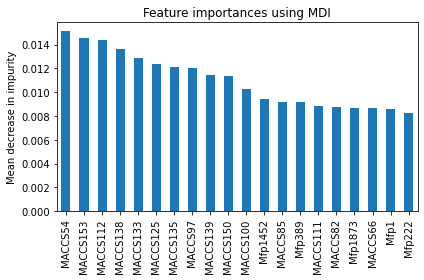

3
Best Threshold=0.617759
[[44 27]
 [46 87]]
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        71
           1       0.76      0.65      0.70       133

    accuracy                           0.64       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.67      0.64      0.65       204

balanced_accuracy_score  0.6369268241025098
matthews_corrcoef  0.2627240590700586
Sensitivity 0.6197183098591549
Specificity 0.6541353383458647
f1 0.7044534412955465
LR+ 1.7917942437232088
ppv 0.7631578947368421
average_precision_score 0.7894386626256932
roc_auc_score 0.6807158741925236


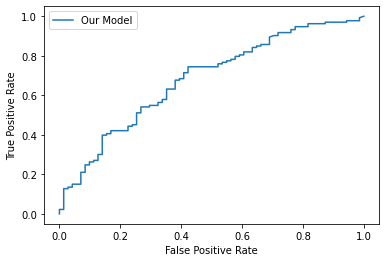

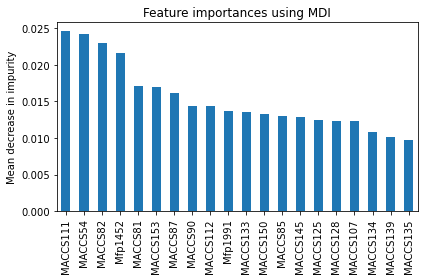

4
Best Threshold=0.610795
[[ 42  31]
 [ 28 103]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        73
           1       0.77      0.79      0.78       131

    accuracy                           0.71       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.71      0.71      0.71       204

balanced_accuracy_score  0.6808010038690787
matthews_corrcoef  0.3651123235702583
Sensitivity 0.5753424657534246
Specificity 0.7862595419847328
f1 0.7773584905660378
LR+ 2.6917808219178077
ppv 0.7686567164179104
average_precision_score 0.7942983212403323
roc_auc_score 0.7206420579316115


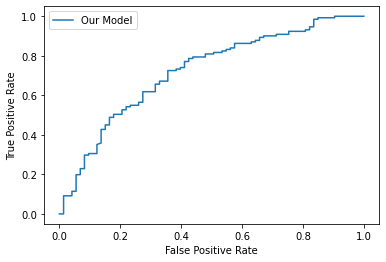

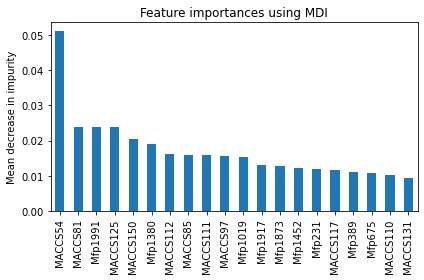

100%|███████████████████████████████████████████| 11/11 [08:22<00:00, 45.71s/it]


In [48]:
#Models to predict DILI with All : MACCS, Morgan
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_NCV_bestMfpMACCS_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [49]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "MfpMACCS"
results.to_csv("NCV_models_MfpMACCS.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.647752  0.288095     0.613333     0.682171   
1   NCV  DILI  42      1  0.676471  0.340041     0.632353     0.720588   
2   NCV  DILI  42      2  0.688734  0.364998     0.736842     0.640625   
3   NCV  DILI  42      3  0.565934  0.129390     0.512821     0.619048   
4   NCV  DILI  42      4  0.671751  0.323909     0.686567     0.656934   
5   NCV  DILI  43      0  0.678673  0.326961     0.672414     0.684932   
6   NCV  DILI  43      1  0.642835  0.298655     0.493671     0.792000   
7   NCV  DILI  43      2  0.650058  0.287951     0.712329     0.587786   
8   NCV  DILI  43      3  0.559219  0.125135     0.769231     0.349206   
9   NCV  DILI  43      4  0.642475  0.278567     0.605263     0.679688   
10  NCV  DILI  44      0  0.605239  0.206456     0.592593     0.617886   
11  NCV  DILI  44      1  0.614000  0.247664     0.408451     0.819549   
12  NCV  DILI  44      2  0.622321  0.227206     0.687500     0.557143   
13  NCV  DILI  44      3  0.617435  0.230950     0.592593     0.642276   
14  NCV  DILI  44      4  0.644406  0.288811     0.522388     0.766423   
15  NCV  DILI  45      0  0.565793  0.132819     0.456790     0.674797   
16  NCV  DILI  45      1  0.686202  0.359551     0.760000     0.612403   
17  NCV  DILI  45      2  0.638164  0.269020     0.565217     0.711111   
18  NCV  DILI  45      3  0.649436  0.295886     0.550725     0.748148   
19  NCV  DILI  45      4  0.648614  0.299342     0.528571     0.768657   
20  NCV  DILI  46      0  0.651731  0.294585     0.616438     0.687023   
21  NCV  DILI  46      1  0.595842  0.224072     0.337838     0.853846   
22  NCV  DILI  46      2  0.614010  0.219196     0.739130     0.488889   
23  NCV  DILI  46      3  0.668498  0.327598     0.717949     0.619048   
24  NCV  DILI  46      4  0.594243  0.189827     0.457143     0.731343   
25  NCV  DILI  47      0  0.637630  0.271066     0.567568     0.707692   
26  NCV  DILI  47      1  0.603411  0.200225     0.586667     0.620155   
27  NCV  DILI  47      2  0.563267  0.127120     0.387097     0.739437   
28  NCV  DILI  47      3  0.653237  0.308116     0.558442     0.748031   
29  NCV  DILI  47      4  0.726974  0.440671     0.828947     0.625000   
30  NCV  DILI  48      0  0.669118  0.323415     0.808824     0.529412   
31  NCV  DILI  48      1  0.615079  0.233326     0.500000     0.730159   
32  NCV  DILI  48      2  0.606618  0.201195     0.661765     0.551471   
33  NCV  DILI  48      3  0.568017  0.129565     0.628571     0.507463   
34  NCV  DILI  48      4  0.643145  0.280905     0.625000     0.661290   
35  NCV  DILI  49      0  0.671783  0.331885     0.746667     0.596899   
36  NCV  DILI  49      1  0.609382  0.208079     0.614286     0.604478   
37  NCV  DILI  49      2  0.619895  0.224530     0.681818     0.557971   
38  NCV  DILI  49      3  0.617827  0.259575     0.410256     0.825397   
39  NCV  DILI  49      4  0.652093  0.304186     0.560000     0.744186   
40  NCV  DILI  50      0  0.657772  0.310394     0.662651     0.652893   
41  NCV  DILI  50      1  0.633222  0.257889     0.739726     0.526718   
42  NCV  DILI  50      2  0.694853  0.372630     0.676471     0.713235   
43  NCV  DILI  50      3  0.648129  0.301069     0.527027     0.769231   
44  NCV  DILI  50      4  0.643610  0.273021     0.606061     0.681159   
45  NCV  DILI  51      0  0.600266  0.194649     0.649351     0.551181   
46  NCV  DILI  51      1  0.600832  0.210802     0.432432     0.769231   
47  NCV  DILI  51      2  0.666741  0.314410     0.640625     0.692857   
48  NCV  DILI  51      3  0.547343  0.094357     0.405797     0.688889   
49  NCV  DILI  51      4  0.602218  0.202806     0.712500     0.491935   
50  NCV  DILI  52      0  0.632082  0.252574     0.575758     0.688406   
51  NCV  DILI  52      1  0.653119  0.297709     0.621622     0.684615   
52  NCV  DILI  52      2  0.644960  0.285423     0.612500     0.677419   
53  NCV 

In [50]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.633458   0.262111     0.603484     0.663431   
std     3.191424   1.427248   0.037812   0.071554     0.110988     0.096899   
min    42.000000   0.000000   0.547343   0.094357     0.337838     0.349206   
25%    44.000000   1.000000   0.608000   0.214999     0.539648     0.615145   
50%    47.000000   2.000000   0.642475   0.273021     0.613333     0.679688   
75%    50.000000   3.000000   0.653178   0.306151     0.679144     0.730751   
max    52.000000   4.000000   0.726974   0.440671     0.828947     0.853846   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.690053   0.700676   1.866332   0.753817                 0.782279  
std     0.041325   0.057428   0.341156   0.044448                 0.041352  
min     0.591143   0.468085   1.181989   0.653543                 0.683059  
25%     0.662407   0.668044   1.552760   0.721752                 0.747821  
50%     0.690687   0.715447   1.889602   0.752137                 0.788291  
75%     0.718926   0.743187   2.160442   0.784903                 0.812200  
max     0.771279   0.777358   2.691781   0.860215                 0.851093

In [51]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=17, max_features=39, min_samples_leaf=8,
                       min_samples_split=12, n_estimators=400, n_jobs=40,
                       random_state=42)

Best Threshold=0.640359
[[65 26]
 [70 94]]
              precision    recall  f1-score   support

           0       0.48      0.71      0.58        91
           1       0.78      0.57      0.66       164

    accuracy                           0.62       255
   macro avg       0.63      0.64      0.62       255
weighted avg       0.68      0.62      0.63       255

balanced_accuracy_score  0.6437282229965157
matthews_corrcoef  0.2759034713681026
Sensitivity 0.7142857142857143
Specificity 0.573170731707317
f1 0.6619718309859154
LR+ 1.673469387755102
ppv 0.7833333333333333
average_precision_score 0.8162432416399972
roc_auc_score 0.734186545162155


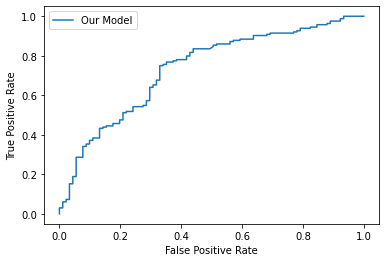

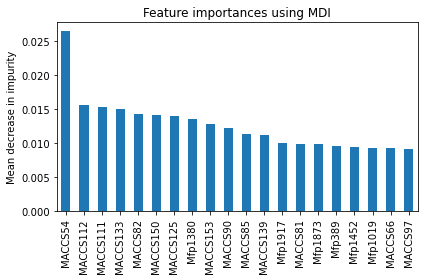

In [52]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [53]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMfpMACCS_model.sav",  'wb'))

In [54]:
#Mordred and PhysicoChemical model

In [55]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [56]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [57]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0                             CC(C)NCC(O)c1cc(O)cc(O)c1         0   
1               Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1         0   
2     C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...         0   
3     CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...         1   
4     CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO         1   
...                                                 ...       ...   
1270  CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1         0   
1271        C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1         0   
1272  COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC         1   
1273    CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl         1   
1274        CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1         0   

      Source_rank                                 Source  Data        ABC  \
0              13  DILIrank dataset CP Overlap REpsilber  DILI  11.113111   
1               1         DILIst Classification  Topical  DILI  18.632065   
2              13  DILIrank dataset CP Overlap REpsilber  DILI  18.334980   
3               1            DILIst Classification  Oral  DILI  24.305499   
4               1            DILIst Classification  Oral  DILI  20.848529   
...           ...                                    ...   ...        ...   
1270            1            DILIst Classification  Oral  DILI  22.443398   
1271            1            DILIst Classification  Oral  DILI  18.078987   
1272            1            DILIst Classification  Oral  DILI  19.965399   
1273            1            DILIst Classification  Oral  DILI  18.677154   
1274            1                DILIst Classification    DILI  18.627175   

          ABCGG  nAcid  nBase  nAromAtom  ...         3         5         6  \
0     10.148350    0.0    1.0        6.0  ...  0.499094  0.220350  0.288708   
1     15.271464    0.0    0.0       17.0  ...  0.567809  0.641096  0.778160   
2     14.848566    0.0    0.0        0.0  ...  0.551261  0.096629  0.422820   
3     20.006308    3.0    0.0       17.0  ...  0.830028  0.145256  0.509965   
4     17.255118    0.0    0.0        0.0  ...  0.457768  0.067164  0.343394   
...         ...    ...    ...        ...  ...       ...       ...       ...   
1270  19.431962    0.0    1.0       12.0  ...  0.800188  0.243600  0.556210   
1271  16.178618    0.0    1.0        6.0  ...  0.355955  0.287075  0.571990   
1272  16.107023    0.0    0.0       15.0  ...  0.798359  0.579613  0.629839   
1273  17.017495    0.0    0.0        6.0  ...  0.880790  0.789385  0.583781   
1274  16.364961    0.0    1.0        6.0  ...  0.226861  0.259857  0.617057   

             7         8        10        11        14        15        16  
0     0.542275  0.332715  0.294181  0.253750  0.026997  0.067801  0.104456  
1     0.855955  0.505657  0.479769  0.507222  0.891707  0.306721  0.170294  
2     0.430636  0.462722  0.542910  0.414408  0.297146  0.188203  0.155574  
3     0.764704  0.527018  0.774434  0.589813  0.968304  0.250082  0.064662  
4     0.271960  0.350366  0.479720  0.266352  0.689398  0.042730  0.060388  
...        ...       ...       ...       ...       ...       ...       ...  
1270  0.779421  0.329983  0.444541  0.269732  0.187868  0.269013  0.153335  
1271  0.595370  0.449674  0.260887  0.255957  0.460429  0.046247  0.079296  
1272  0.831726  0.628673  0.566578  0.768182  0.653589  0.089000  0.254789  
1273  0.914036  0.563791  0.544296  0.433799  0.824570  0.268013  0.117781  
1274  0.520632  0.305643  0.230568  0.234973  0.612908  0.059007  0.145803  

[1275 rows x 572 columns]

In [58]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [59]:
test_feature_list = list(test_feature_list)
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 'nBondsKD',
 'C1SP2',
 'C2SP2',
 'C3SP2',
 'C1SP3',
 'C2SP3',


In [60]:
len(test_feature_list)

361

In [61]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(1020, 361)
(255, 361)
1020
255
(1275, 361)
1275


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.634861
[[52 23]
 [45 84]]
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        75
           1       0.79      0.65      0.71       129

    accuracy                           0.67       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.69      0.67      0.67       204

balanced_accuracy_score  0.6722480620155039
matthews_corrcoef  0.33260752519319375
Sensitivity 0.6933333333333334
Specificity 0.6511627906976745
f1 0.7118644067796611
LR+ 1.987555555555556
ppv 0.7850467289719626
average_precision_score 0.7978775352570021
roc_auc_score 0.7071834625322998


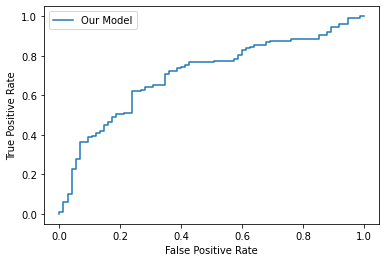

saving model


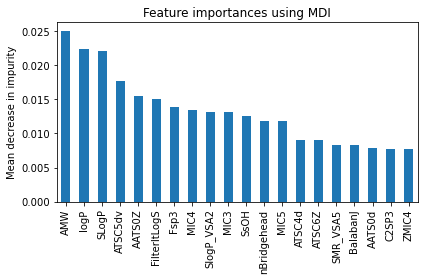

1
Best Threshold=0.642733
[[44 24]
 [42 94]]
              precision    recall  f1-score   support

           0       0.51      0.65      0.57        68
           1       0.80      0.69      0.74       136

    accuracy                           0.68       204
   macro avg       0.65      0.67      0.66       204
weighted avg       0.70      0.68      0.68       204

balanced_accuracy_score  0.6691176470588236
matthews_corrcoef  0.32288852016214975
Sensitivity 0.6470588235294118
Specificity 0.6911764705882353
f1 0.7401574803149606
LR+ 2.0952380952380953
ppv 0.7966101694915254
average_precision_score 0.8423170428501505
roc_auc_score 0.728589965397924


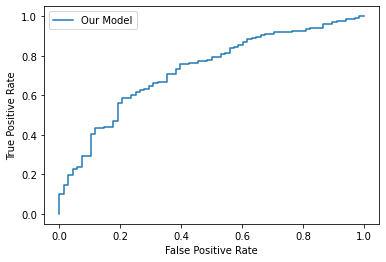

saving model


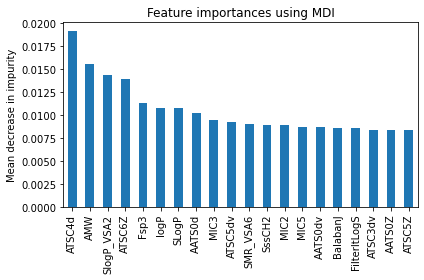

2
Best Threshold=0.663471
[[54 22]
 [47 81]]
              precision    recall  f1-score   support

           0       0.53      0.71      0.61        76
           1       0.79      0.63      0.70       128

    accuracy                           0.66       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.69      0.66      0.67       204

balanced_accuracy_score  0.6716694078947368
matthews_corrcoef  0.3320132276076284
Sensitivity 0.7105263157894737
Specificity 0.6328125
f1 0.7012987012987012
LR+ 1.93505039193729
ppv 0.7864077669902912
average_precision_score 0.8036044555226629
roc_auc_score 0.7369449013157896


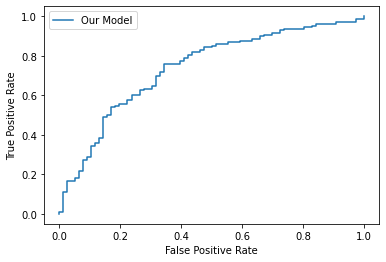

saving model


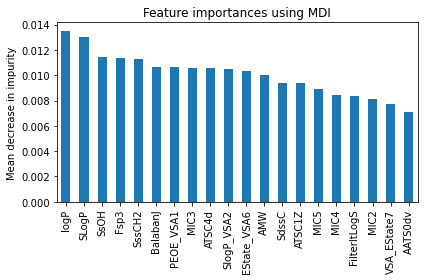

3
Best Threshold=0.649399
[[41 37]
 [45 81]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        78
           1       0.69      0.64      0.66       126

    accuracy                           0.60       204
   macro avg       0.58      0.58      0.58       204
weighted avg       0.61      0.60      0.60       204

balanced_accuracy_score  0.5842490842490843
matthews_corrcoef  0.1658202361376561
Sensitivity 0.5256410256410257
Specificity 0.6428571428571429
f1 0.6639344262295083
LR+ 1.4717948717948721
ppv 0.6864406779661016
average_precision_score 0.6782167711873497
roc_auc_score 0.6106023606023606


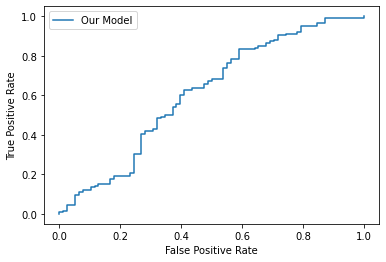

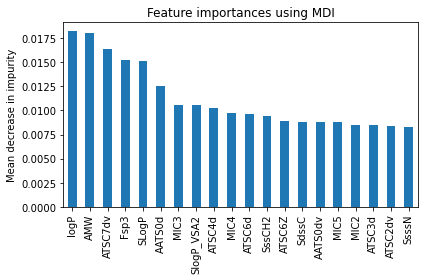

4
Best Threshold=0.657272
[[43 24]
 [52 85]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        67
           1       0.78      0.62      0.69       137

    accuracy                           0.63       204
   macro avg       0.62      0.63      0.61       204
weighted avg       0.67      0.63      0.64       204

balanced_accuracy_score  0.6311145004902494
matthews_corrcoef  0.246889917029555
Sensitivity 0.6417910447761194
Specificity 0.6204379562043796
f1 0.6910569105691057
LR+ 1.6908725602755454
ppv 0.7798165137614679
average_precision_score 0.8164975399617853
roc_auc_score 0.6857500817082471


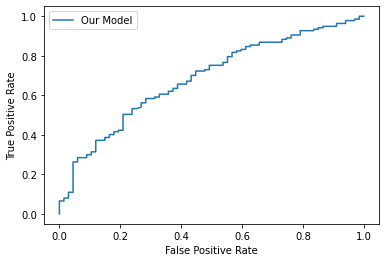

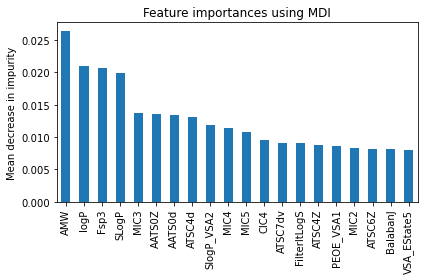

  9%|████                                        | 1/11 [00:48<08:02, 48.23s/it]

43
0
Best Threshold=0.648756
[[39 19]
 [56 90]]
              precision    recall  f1-score   support

           0       0.41      0.67      0.51        58
           1       0.83      0.62      0.71       146

    accuracy                           0.63       204
   macro avg       0.62      0.64      0.61       204
weighted avg       0.71      0.63      0.65       204

balanced_accuracy_score  0.6444260746339159
matthews_corrcoef  0.26121070805726465
Sensitivity 0.6724137931034483
Specificity 0.6164383561643836
f1 0.7058823529411764
LR+ 1.7530788177339902
ppv 0.8256880733944955
average_precision_score 0.8378057842492774
roc_auc_score 0.6924893717524799


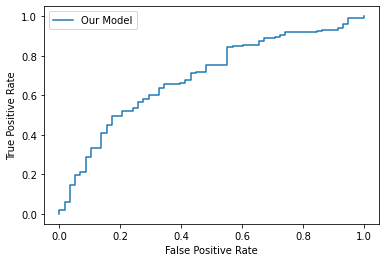

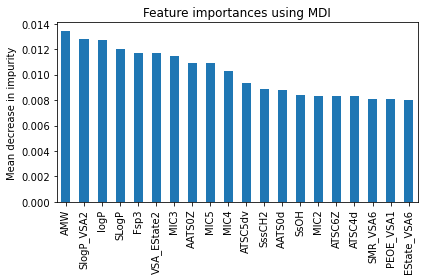

1
Best Threshold=0.639224
[[55 24]
 [37 88]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.64        79
           1       0.79      0.70      0.74       125

    accuracy                           0.70       204
   macro avg       0.69      0.70      0.69       204
weighted avg       0.71      0.70      0.70       204

balanced_accuracy_score  0.7001012658227848
matthews_corrcoef  0.3917828839180476
Sensitivity 0.6962025316455697
Specificity 0.704
f1 0.7426160337552741
LR+ 2.352035579883681
ppv 0.7857142857142857
average_precision_score 0.811129092407622
roc_auc_score 0.7362025316455696


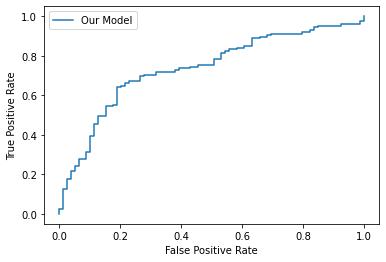

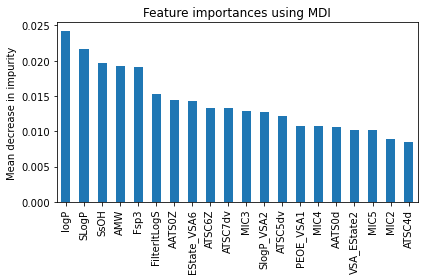

2
Best Threshold=0.654101
[[50 23]
 [52 79]]
              precision    recall  f1-score   support

           0       0.49      0.68      0.57        73
           1       0.77      0.60      0.68       131

    accuracy                           0.63       204
   macro avg       0.63      0.64      0.62       204
weighted avg       0.67      0.63      0.64       204

balanced_accuracy_score  0.6439924709819094
matthews_corrcoef  0.2761001777741065
Sensitivity 0.684931506849315
Specificity 0.6030534351145038
f1 0.6781115879828326
LR+ 1.7255005268703898
ppv 0.7745098039215687
average_precision_score 0.789362566501532
roc_auc_score 0.6934016522011921


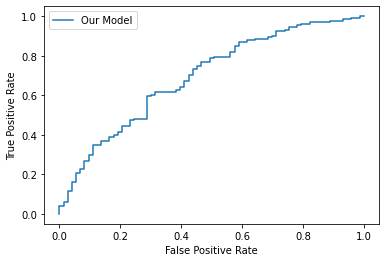

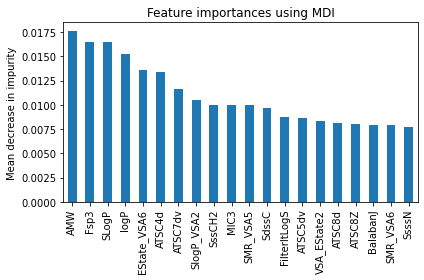

3
Best Threshold=0.622025
[[60 18]
 [68 58]]
              precision    recall  f1-score   support

           0       0.47      0.77      0.58        78
           1       0.76      0.46      0.57       126

    accuracy                           0.58       204
   macro avg       0.62      0.61      0.58       204
weighted avg       0.65      0.58      0.58       204

balanced_accuracy_score  0.6147741147741148
matthews_corrcoef  0.23072504557394563
Sensitivity 0.7692307692307693
Specificity 0.4603174603174603
f1 0.5742574257425742
LR+ 1.425339366515837
ppv 0.7631578947368421
average_precision_score 0.7446646001975374
roc_auc_score 0.6673789173789174


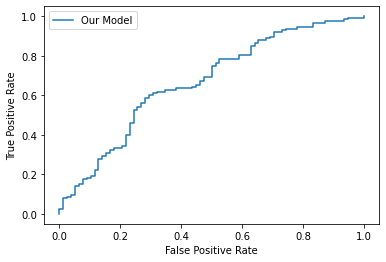

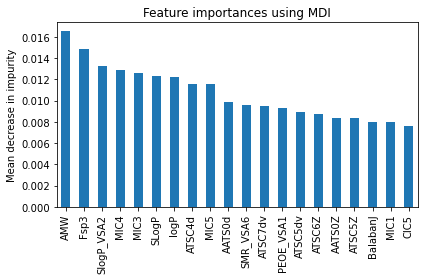

4
Best Threshold=0.668791
[[51 25]
 [51 77]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        76
           1       0.75      0.60      0.67       128

    accuracy                           0.63       204
   macro avg       0.63      0.64      0.62       204
weighted avg       0.66      0.63      0.63       204

balanced_accuracy_score  0.6363075657894737
matthews_corrcoef  0.2636098093374891
Sensitivity 0.6710526315789473
Specificity 0.6015625
f1 0.6695652173913044
LR+ 1.6842105263157894
ppv 0.7549019607843137
average_precision_score 0.7749309461034264
roc_auc_score 0.6833881578947368


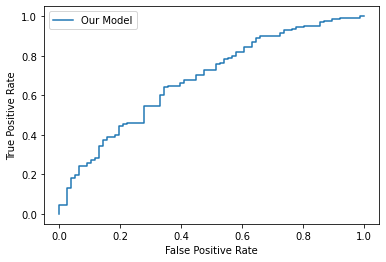

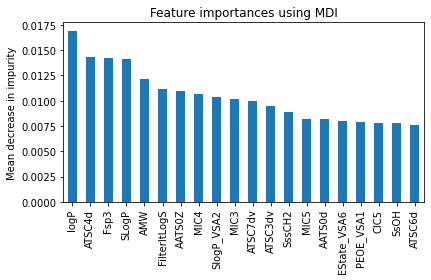

 18%|████████                                    | 2/11 [01:33<06:58, 46.47s/it]

44
0
Best Threshold=0.607223
[[41 40]
 [33 90]]
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        81
           1       0.69      0.73      0.71       123

    accuracy                           0.64       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.64      0.64      0.64       204

balanced_accuracy_score  0.6189400782896718
matthews_corrcoef  0.2420838094538599
Sensitivity 0.5061728395061729
Specificity 0.7317073170731707
f1 0.7114624505928854
LR+ 1.8866442199775533
ppv 0.6923076923076923
average_precision_score 0.7492132423356167
roc_auc_score 0.6733915487303022


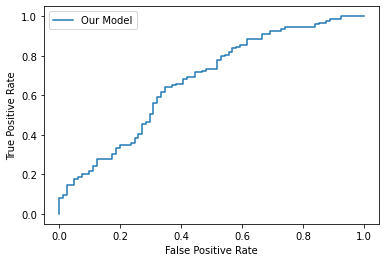

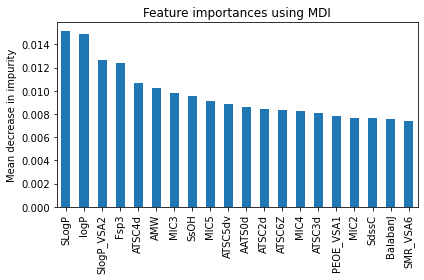

1
Best Threshold=0.621054
[[52 19]
 [46 87]]
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        71
           1       0.82      0.65      0.73       133

    accuracy                           0.68       204
   macro avg       0.68      0.69      0.67       204
weighted avg       0.72      0.68      0.69       204

balanced_accuracy_score  0.6932648522715239
matthews_corrcoef  0.3685291955345105
Sensitivity 0.7323943661971831
Specificity 0.6541353383458647
f1 0.7280334728033473
LR+ 2.117575015309247
ppv 0.8207547169811321
average_precision_score 0.8251147435017971
roc_auc_score 0.735889018320449


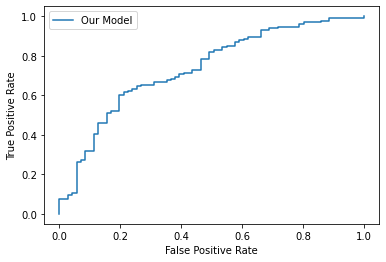

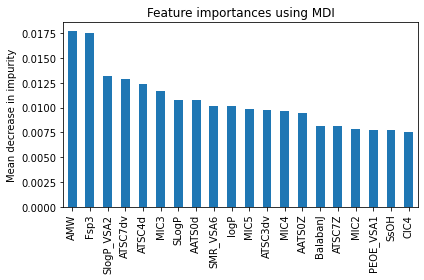

2
Best Threshold=0.572653
[[ 29  35]
 [ 32 108]]
              precision    recall  f1-score   support

           0       0.48      0.45      0.46        64
           1       0.76      0.77      0.76       140

    accuracy                           0.67       204
   macro avg       0.62      0.61      0.61       204
weighted avg       0.67      0.67      0.67       204

balanced_accuracy_score  0.6122767857142857
matthews_corrcoef  0.22758363791171787
Sensitivity 0.453125
Specificity 0.7714285714285715
f1 0.7632508833922261
LR+ 1.9824218750000002
ppv 0.7552447552447552
average_precision_score 0.7993965642910191
roc_auc_score 0.6871651785714284


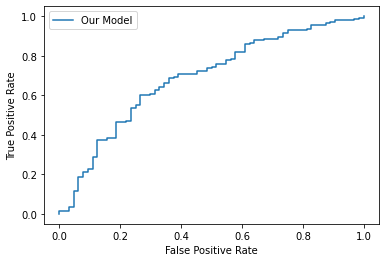

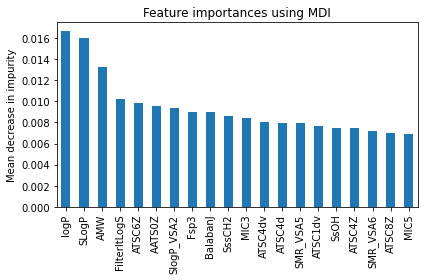

3
Best Threshold=0.667250
[[49 32]
 [47 76]]
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        81
           1       0.70      0.62      0.66       123

    accuracy                           0.61       204
   macro avg       0.61      0.61      0.61       204
weighted avg       0.63      0.61      0.62       204

balanced_accuracy_score  0.6114122252333635
matthews_corrcoef  0.21842905910503255
Sensitivity 0.6049382716049383
Specificity 0.6178861788617886
f1 0.658008658008658
LR+ 1.583136327817179
ppv 0.7037037037037037
average_precision_score 0.6926471323191485
roc_auc_score 0.6409715949011342


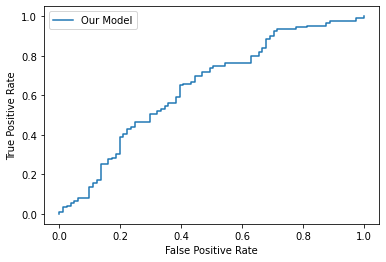

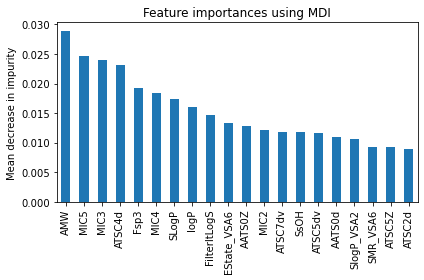

4
Best Threshold=0.599597
[[40 27]
 [38 99]]
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        67
           1       0.79      0.72      0.75       137

    accuracy                           0.68       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.70      0.68      0.69       204

balanced_accuracy_score  0.6598213312997059
matthews_corrcoef  0.308908494351065
Sensitivity 0.5970149253731343
Specificity 0.7226277372262774
f1 0.752851711026616
LR+ 2.1523959151610366
ppv 0.7857142857142857
average_precision_score 0.8618033236229895
roc_auc_score 0.7455060464102844


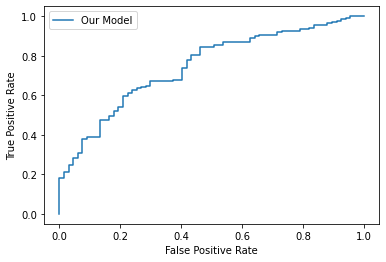

saving model


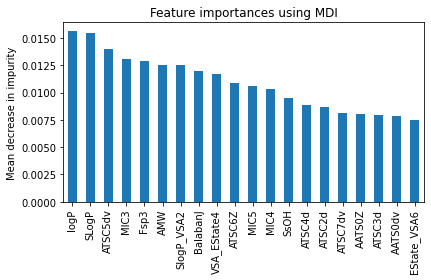

 27%|████████████                                | 3/11 [02:29<06:45, 50.68s/it]

45
0
Best Threshold=0.631127
[[55 26]
 [62 61]]
              precision    recall  f1-score   support

           0       0.47      0.68      0.56        81
           1       0.70      0.50      0.58       123

    accuracy                           0.57       204
   macro avg       0.59      0.59      0.57       204
weighted avg       0.61      0.57      0.57       204

balanced_accuracy_score  0.587473652514303
matthews_corrcoef  0.17308114707365232
Sensitivity 0.6790123456790124
Specificity 0.4959349593495935
f1 0.5809523809523809
LR+ 1.3470728793309437
ppv 0.7011494252873564
average_precision_score 0.7006201471137941
roc_auc_score 0.6345478269597511


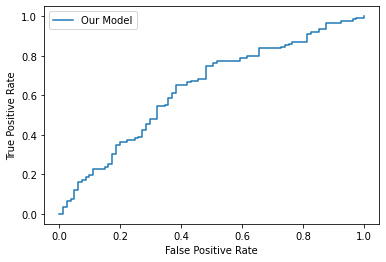

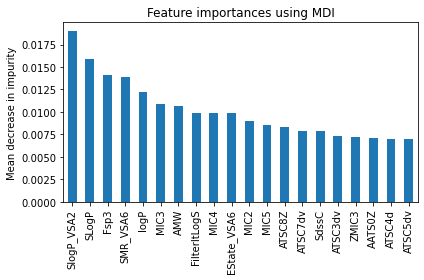

1
Best Threshold=0.574089
[[53 22]
 [41 88]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        75
           1       0.80      0.68      0.74       129

    accuracy                           0.69       204
   macro avg       0.68      0.69      0.68       204
weighted avg       0.71      0.69      0.70       204

balanced_accuracy_score  0.6944186046511628
matthews_corrcoef  0.376125722503984
Sensitivity 0.7066666666666667
Specificity 0.6821705426356589
f1 0.7364016736401673
LR+ 2.223414634146341
ppv 0.8
average_precision_score 0.820164116863521
roc_auc_score 0.7369509043927649


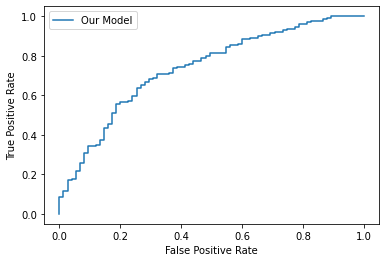

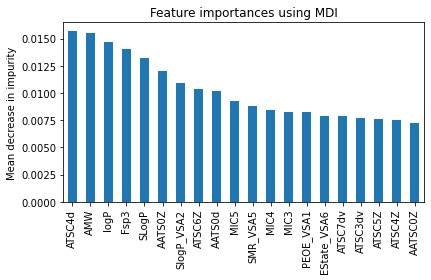

2
Best Threshold=0.596068
[[ 41  28]
 [ 31 104]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        69
           1       0.79      0.77      0.78       135

    accuracy                           0.71       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.71      0.71      0.71       204

balanced_accuracy_score  0.6822866344605475
matthews_corrcoef  0.36093004705833603
Sensitivity 0.5942028985507246
Specificity 0.7703703703703704
f1 0.7790262172284643
LR+ 2.58765778401122
ppv 0.7878787878787878
average_precision_score 0.8681917249310205
roc_auc_score 0.7818035426731079


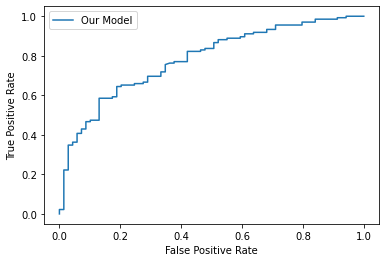

saving model


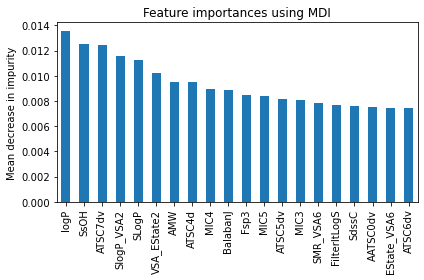

3
Best Threshold=0.636872
[[40 29]
 [42 93]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.53        69
           1       0.76      0.69      0.72       135

    accuracy                           0.65       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.67      0.65      0.66       204

balanced_accuracy_score  0.6342995169082126
matthews_corrcoef  0.25918450497246637
Sensitivity 0.5797101449275363
Specificity 0.6888888888888889
f1 0.7237354085603113
LR+ 1.8633540372670807
ppv 0.7622950819672131
average_precision_score 0.810704256108301
roc_auc_score 0.6860976918947934


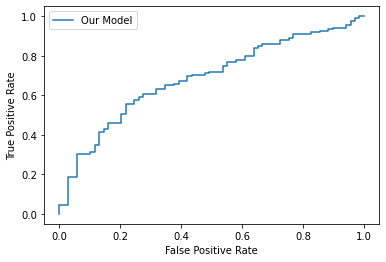

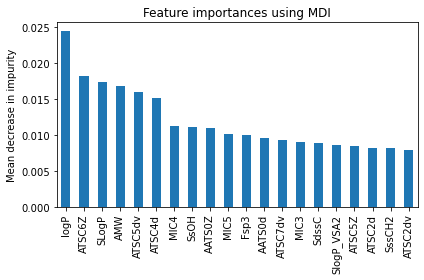

4
Best Threshold=0.584304
[[ 35  35]
 [ 31 103]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        70
           1       0.75      0.77      0.76       134

    accuracy                           0.68       204
   macro avg       0.64      0.63      0.64       204
weighted avg       0.67      0.68      0.67       204

balanced_accuracy_score  0.6343283582089552
matthews_corrcoef  0.2726387680120662
Sensitivity 0.5
Specificity 0.7686567164179104
f1 0.7573529411764706
LR+ 2.161290322580645
ppv 0.7463768115942029
average_precision_score 0.8448020894959397
roc_auc_score 0.7442430703624733


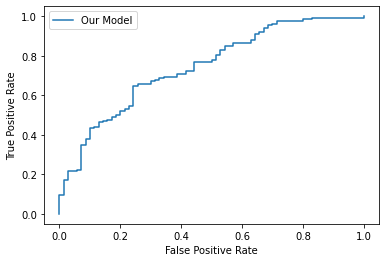

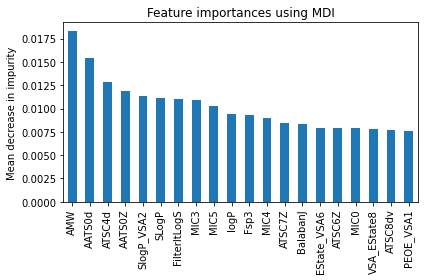

 36%|████████████████                            | 4/11 [03:21<05:58, 51.18s/it]

46
0
Best Threshold=0.639704
[[44 29]
 [40 91]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        73
           1       0.76      0.69      0.73       131

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.67      0.66      0.67       204

balanced_accuracy_score  0.6486981072885079
matthews_corrcoef  0.2896691521101779
Sensitivity 0.6027397260273972
Specificity 0.6946564885496184
f1 0.7250996015936256
LR+ 1.9739726027397262
ppv 0.7583333333333333
average_precision_score 0.8055673099501022
roc_auc_score 0.6964341733765556


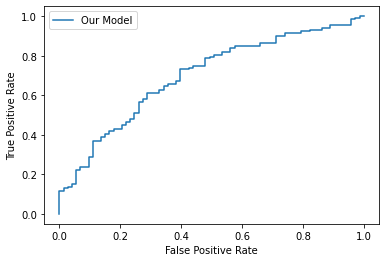

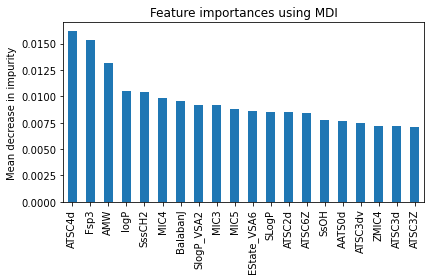

1
Best Threshold=0.587273
[[ 31  43]
 [ 24 106]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        74
           1       0.71      0.82      0.76       130

    accuracy                           0.67       204
   macro avg       0.64      0.62      0.62       204
weighted avg       0.66      0.67      0.66       204

balanced_accuracy_score  0.6171517671517671
matthews_corrcoef  0.25385860941025884
Sensitivity 0.4189189189189189
Specificity 0.8153846153846154
f1 0.7598566308243728
LR+ 2.269144144144144
ppv 0.7114093959731543
average_precision_score 0.8075166700032597
roc_auc_score 0.7446985446985447


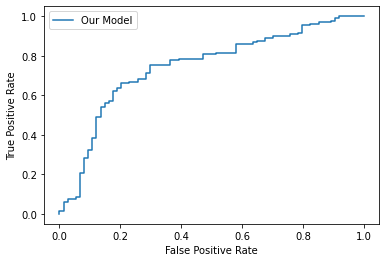

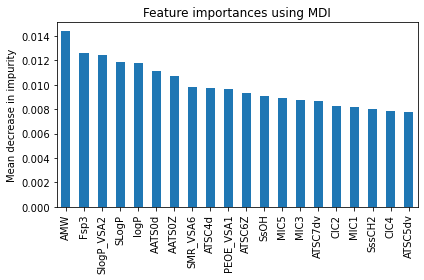

2
Best Threshold=0.651937
[[50 19]
 [58 77]]
              precision    recall  f1-score   support

           0       0.46      0.72      0.56        69
           1       0.80      0.57      0.67       135

    accuracy                           0.62       204
   macro avg       0.63      0.65      0.62       204
weighted avg       0.69      0.62      0.63       204

balanced_accuracy_score  0.6475040257648954
matthews_corrcoef  0.279626163717843
Sensitivity 0.7246376811594203
Specificity 0.5703703703703704
f1 0.6666666666666667
LR+ 1.686656671664168
ppv 0.8020833333333334
average_precision_score 0.7909660474445477
roc_auc_score 0.6883521202361782


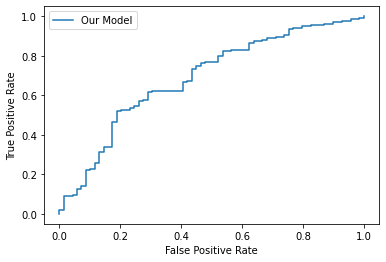

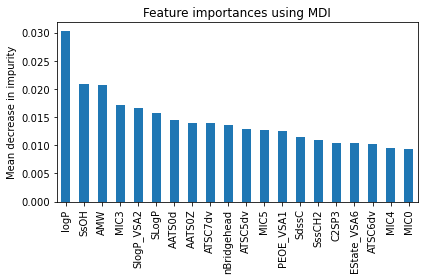

3
Best Threshold=0.613709
[[46 32]
 [31 95]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        78
           1       0.75      0.75      0.75       126

    accuracy                           0.69       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.69      0.69      0.69       204

balanced_accuracy_score  0.6718559218559219
matthews_corrcoef  0.3445718925652339
Sensitivity 0.5897435897435898
Specificity 0.753968253968254
f1 0.7509881422924901
LR+ 2.3970223325062032
ppv 0.7480314960629921
average_precision_score 0.8276275483003204
roc_auc_score 0.7575295075295075


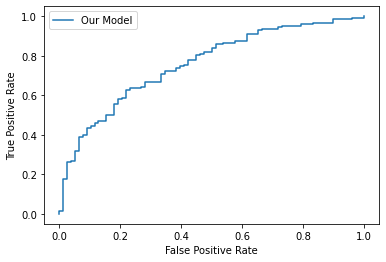

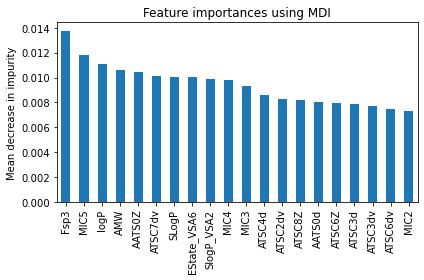

4
Best Threshold=0.632516
[[38 32]
 [49 85]]
              precision    recall  f1-score   support

           0       0.44      0.54      0.48        70
           1       0.73      0.63      0.68       134

    accuracy                           0.60       204
   macro avg       0.58      0.59      0.58       204
weighted avg       0.63      0.60      0.61       204

balanced_accuracy_score  0.588592750533049
matthews_corrcoef  0.17008931929186547
Sensitivity 0.5428571428571428
Specificity 0.6343283582089553
f1 0.6772908366533865
LR+ 1.4845481049562683
ppv 0.7264957264957265
average_precision_score 0.7211701085782952
roc_auc_score 0.6093816631130065


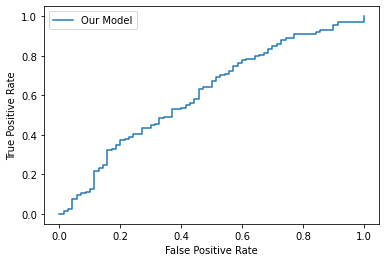

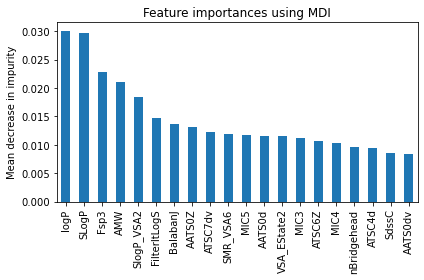

 45%|████████████████████                        | 5/11 [04:15<05:14, 52.36s/it]

47
0
Best Threshold=0.586459
[[51 23]
 [49 81]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        74
           1       0.78      0.62      0.69       130

    accuracy                           0.65       204
   macro avg       0.64      0.66      0.64       204
weighted avg       0.68      0.65      0.65       204

balanced_accuracy_score  0.6561330561330561
matthews_corrcoef  0.3003279299441825
Sensitivity 0.6891891891891891
Specificity 0.6230769230769231
f1 0.6923076923076924
LR+ 1.8284611141753997
ppv 0.7788461538461539
average_precision_score 0.7861903740750003
roc_auc_score 0.707068607068607


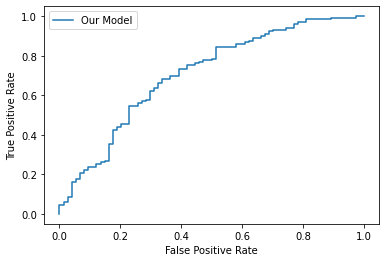

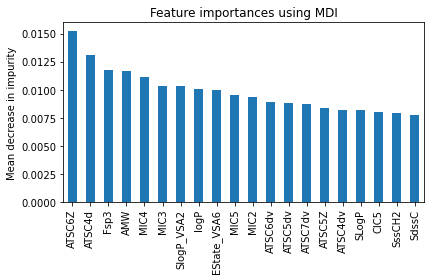

1
Best Threshold=0.655578
[[47 28]
 [45 84]]
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        75
           1       0.75      0.65      0.70       129

    accuracy                           0.64       204
   macro avg       0.63      0.64      0.63       204
weighted avg       0.66      0.64      0.65       204

balanced_accuracy_score  0.6389147286821706
matthews_corrcoef  0.2692159908831929
Sensitivity 0.6266666666666667
Specificity 0.6511627906976745
f1 0.6970954356846474
LR+ 1.7964444444444447
ppv 0.75
average_precision_score 0.7424701272364149
roc_auc_score 0.6643927648578812


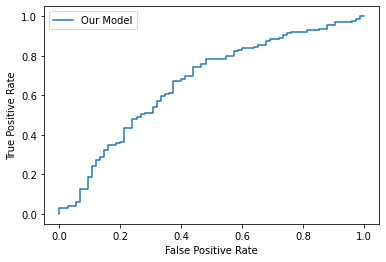

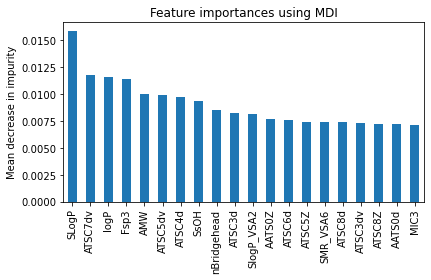

2
Best Threshold=0.637246
[[40 22]
 [61 81]]
              precision    recall  f1-score   support

           0       0.40      0.65      0.49        62
           1       0.79      0.57      0.66       142

    accuracy                           0.59       204
   macro avg       0.59      0.61      0.58       204
weighted avg       0.67      0.59      0.61       204

balanced_accuracy_score  0.6077919127669241
matthews_corrcoef  0.198324739223684
Sensitivity 0.6451612903225806
Specificity 0.5704225352112676
f1 0.6612244897959184
LR+ 1.5018508725542041
ppv 0.7864077669902912
average_precision_score 0.7637539008729548
roc_auc_score 0.6264766015447524


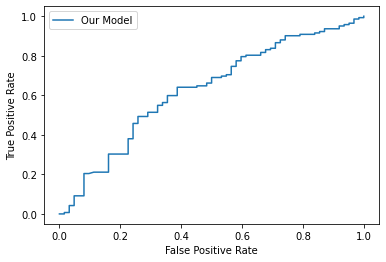

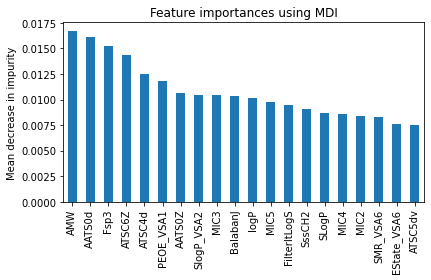

3
Best Threshold=0.662996
[[53 24]
 [43 84]]
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        77
           1       0.78      0.66      0.71       127

    accuracy                           0.67       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.69      0.67      0.68       204

balanced_accuracy_score  0.674864505573167
matthews_corrcoef  0.3396498199683314
Sensitivity 0.6883116883116883
Specificity 0.6614173228346457
f1 0.7148936170212766
LR+ 2.032920567804289
ppv 0.7777777777777778
average_precision_score 0.8325928844382541
roc_auc_score 0.7444523979957051


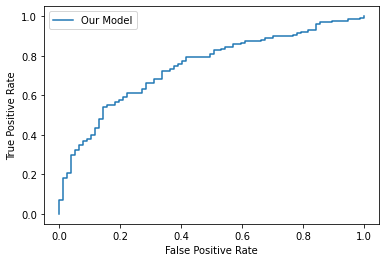

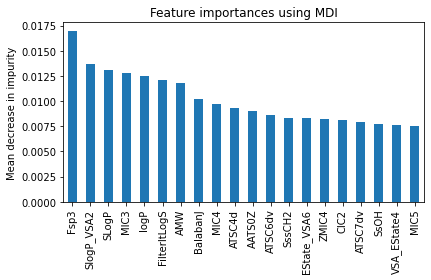

4
Best Threshold=0.585181
[[55 21]
 [46 82]]
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        76
           1       0.80      0.64      0.71       128

    accuracy                           0.67       204
   macro avg       0.67      0.68      0.67       204
weighted avg       0.70      0.67      0.68       204

balanced_accuracy_score  0.682154605263158
matthews_corrcoef  0.352291879832765
Sensitivity 0.7236842105263158
Specificity 0.640625
f1 0.7099567099567099
LR+ 2.013729977116705
ppv 0.7961165048543689
average_precision_score 0.8302529314247425
roc_auc_score 0.7488692434210525


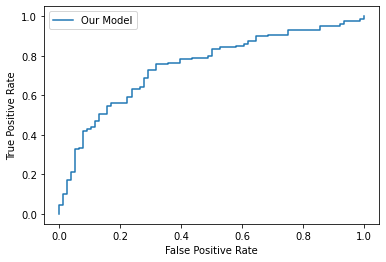

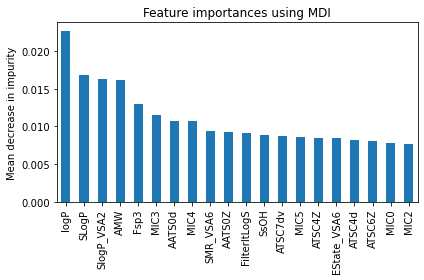

 55%|████████████████████████                    | 6/11 [05:02<04:13, 50.64s/it]

48
0
Best Threshold=0.546263
[[40 28]
 [50 86]]
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        68
           1       0.75      0.63      0.69       136

    accuracy                           0.62       204
   macro avg       0.60      0.61      0.60       204
weighted avg       0.65      0.62      0.63       204

balanced_accuracy_score  0.6102941176470589
matthews_corrcoef  0.20942695414584775
Sensitivity 0.5882352941176471
Specificity 0.6323529411764706
f1 0.688
LR+ 1.5999999999999999
ppv 0.7543859649122807
average_precision_score 0.823409409974897
roc_auc_score 0.7004757785467128


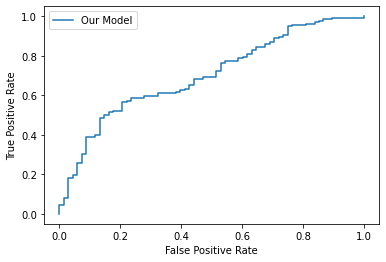

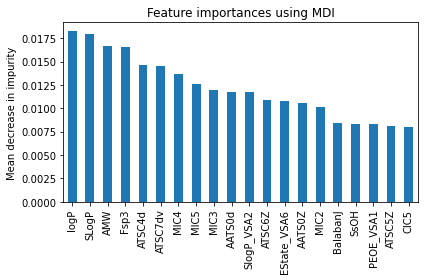

1
Best Threshold=0.628314
[[48 30]
 [40 86]]
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        78
           1       0.74      0.68      0.71       126

    accuracy                           0.66       204
   macro avg       0.64      0.65      0.64       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.648962148962149
matthews_corrcoef  0.2923264871850437
Sensitivity 0.6153846153846154
Specificity 0.6825396825396826
f1 0.7107438016528926
LR+ 1.9384615384615387
ppv 0.7413793103448276
average_precision_score 0.7861750413555886
roc_auc_score 0.7004477004477004


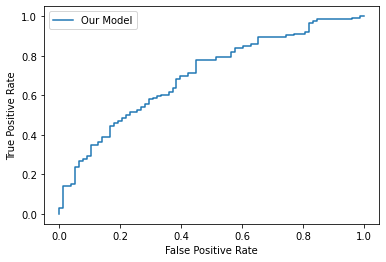

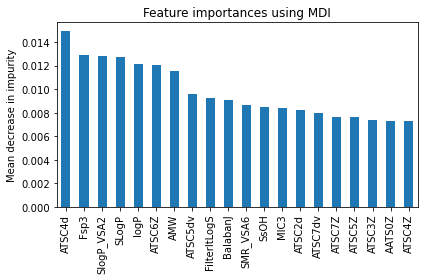

2
Best Threshold=0.609616
[[36 32]
 [37 99]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        68
           1       0.76      0.73      0.74       136

    accuracy                           0.66       204
   macro avg       0.62      0.63      0.63       204
weighted avg       0.67      0.66      0.66       204

balanced_accuracy_score  0.6286764705882353
matthews_corrcoef  0.25307891776595814
Sensitivity 0.5294117647058824
Specificity 0.7279411764705882
f1 0.7415730337078652
LR+ 1.9459459459459458
ppv 0.7557251908396947
average_precision_score 0.7835678092509524
roc_auc_score 0.6668468858131487


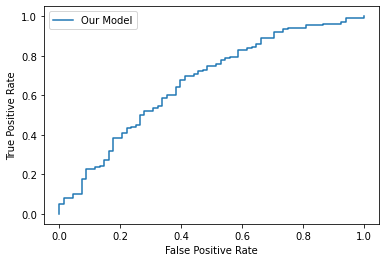

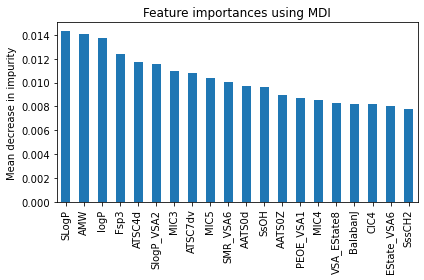

3
Best Threshold=0.627908
[[40 30]
 [57 77]]
              precision    recall  f1-score   support

           0       0.41      0.57      0.48        70
           1       0.72      0.57      0.64       134

    accuracy                           0.57       204
   macro avg       0.57      0.57      0.56       204
weighted avg       0.61      0.57      0.58       204

balanced_accuracy_score  0.5730277185501066
matthews_corrcoef  0.1388485638219942
Sensitivity 0.5714285714285714
Specificity 0.5746268656716418
f1 0.6390041493775933
LR+ 1.3433583959899749
ppv 0.719626168224299
average_precision_score 0.7443981778667158
roc_auc_score 0.6384861407249466


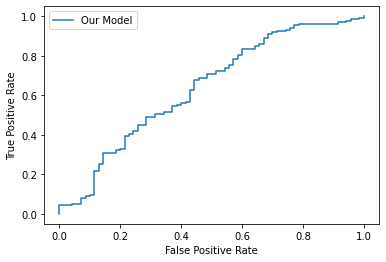

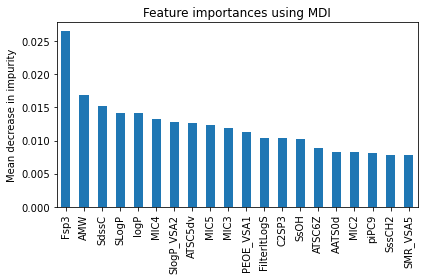

4
Best Threshold=0.649289
[[50 30]
 [31 93]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        80
           1       0.76      0.75      0.75       124

    accuracy                           0.70       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.70      0.70      0.70       204

balanced_accuracy_score  0.6875
matthews_corrcoef  0.3741898807388237
Sensitivity 0.625
Specificity 0.75
f1 0.7530364372469637
LR+ 2.5
ppv 0.7560975609756098
average_precision_score 0.8000746284116704
roc_auc_score 0.7514112903225806


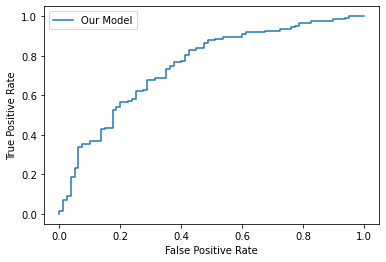

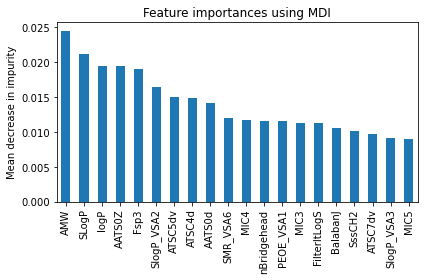

 64%|████████████████████████████                | 7/11 [06:00<03:32, 53.04s/it]

49
0
Best Threshold=0.618483
[[46 29]
 [32 97]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        75
           1       0.77      0.75      0.76       129

    accuracy                           0.70       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.70      0.70      0.70       204

balanced_accuracy_score  0.6826356589147287
matthews_corrcoef  0.3624169360447743
Sensitivity 0.6133333333333333
Specificity 0.751937984496124
f1 0.7607843137254903
LR+ 2.4724999999999997
ppv 0.7698412698412699
average_precision_score 0.8361032908632222
roc_auc_score 0.7365374677002584


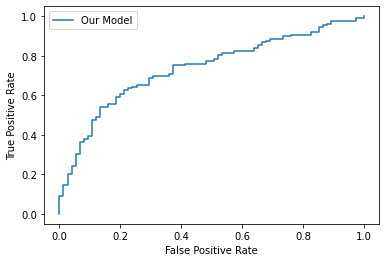

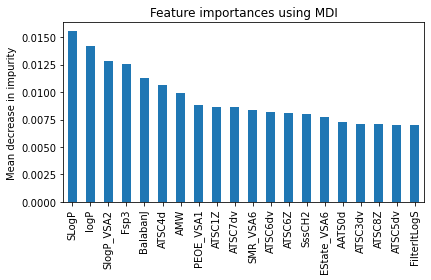

1
Best Threshold=0.642779
[[43 27]
 [60 74]]
              precision    recall  f1-score   support

           0       0.42      0.61      0.50        70
           1       0.73      0.55      0.63       134

    accuracy                           0.57       204
   macro avg       0.58      0.58      0.56       204
weighted avg       0.62      0.57      0.58       204

balanced_accuracy_score  0.5832622601279318
matthews_corrcoef  0.15812491720014257
Sensitivity 0.6142857142857143
Specificity 0.5522388059701493
f1 0.6297872340425532
LR+ 1.3719047619047622
ppv 0.7326732673267327
average_precision_score 0.7658364339174915
roc_auc_score 0.6634328358208955


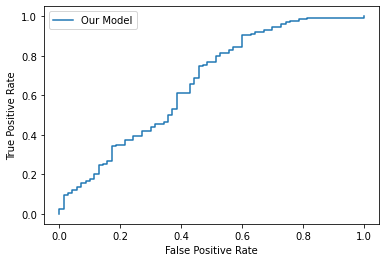

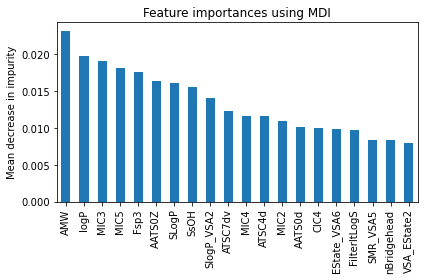

2
Best Threshold=0.641048
[[44 22]
 [57 81]]
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        66
           1       0.79      0.59      0.67       138

    accuracy                           0.61       204
   macro avg       0.61      0.63      0.60       204
weighted avg       0.67      0.61      0.63       204

balanced_accuracy_score  0.6268115942028986
matthews_corrcoef  0.23731280337543736
Sensitivity 0.6666666666666666
Specificity 0.5869565217391305
f1 0.6721991701244814
LR+ 1.6140350877192984
ppv 0.7864077669902912
average_precision_score 0.7723546421677107
roc_auc_score 0.6606280193236714


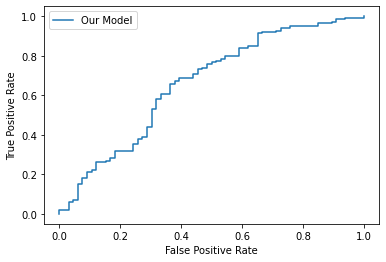

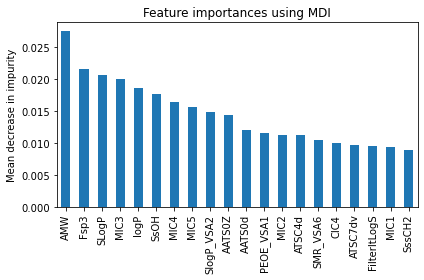

3
Best Threshold=0.607026
[[60 18]
 [50 76]]
              precision    recall  f1-score   support

           0       0.55      0.77      0.64        78
           1       0.81      0.60      0.69       126

    accuracy                           0.67       204
   macro avg       0.68      0.69      0.66       204
weighted avg       0.71      0.67      0.67       204

balanced_accuracy_score  0.6862026862026862
matthews_corrcoef  0.36306822509530523
Sensitivity 0.7692307692307693
Specificity 0.6031746031746031
f1 0.6909090909090909
LR+ 1.9384615384615385
ppv 0.8085106382978723
average_precision_score 0.8015255566265014
roc_auc_score 0.725071225071225


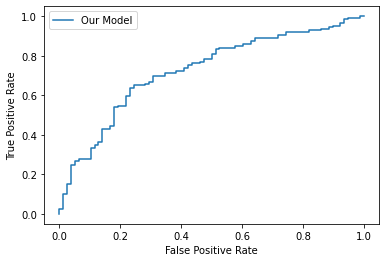

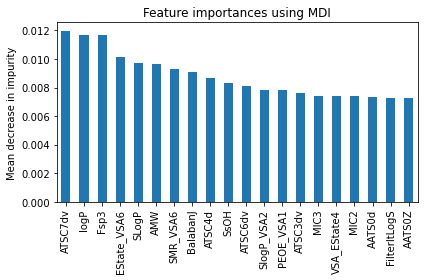

4
Best Threshold=0.665812
[[54 21]
 [53 76]]
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        75
           1       0.78      0.59      0.67       129

    accuracy                           0.64       204
   macro avg       0.64      0.65      0.63       204
weighted avg       0.68      0.64      0.64       204

balanced_accuracy_score  0.6545736434108527
matthews_corrcoef  0.2984785802138742
Sensitivity 0.72
Specificity 0.5891472868217055
f1 0.672566371681416
LR+ 1.7524528301886795
ppv 0.7835051546391752
average_precision_score 0.7959379235850453
roc_auc_score 0.7061498708010336


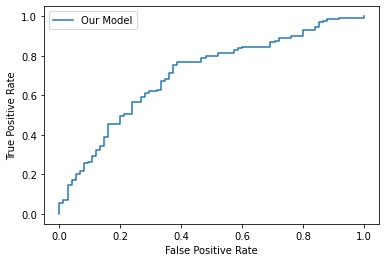

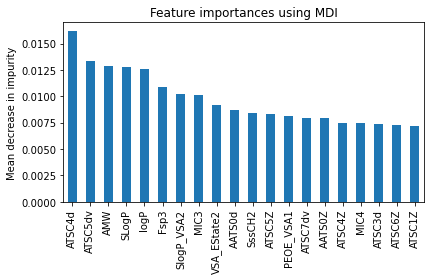

 73%|████████████████████████████████            | 8/11 [06:51<02:37, 52.38s/it]

50
0
Best Threshold=0.599631
[[ 46  37]
 [ 21 100]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        83
           1       0.73      0.83      0.78       121

    accuracy                           0.72       204
   macro avg       0.71      0.69      0.69       204
weighted avg       0.71      0.72      0.71       204

balanced_accuracy_score  0.6903315742308076
matthews_corrcoef  0.3981758187420098
Sensitivity 0.5542168674698795
Specificity 0.8264462809917356
f1 0.7751937984496124
LR+ 3.1933448078026396
ppv 0.7299270072992701
average_precision_score 0.807177618682863
roc_auc_score 0.7593348601015633


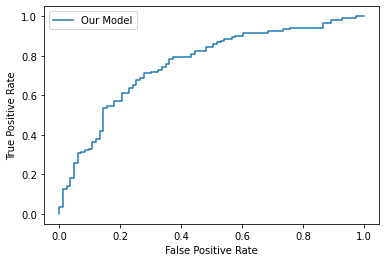

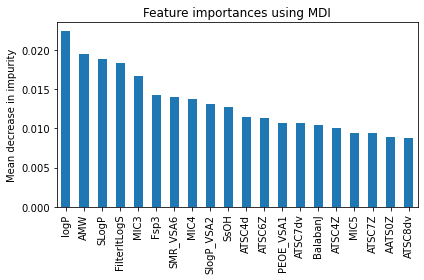

1
Best Threshold=0.643626
[[54 19]
 [55 76]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.59        73
           1       0.80      0.58      0.67       131

    accuracy                           0.64       204
   macro avg       0.65      0.66      0.63       204
weighted avg       0.69      0.64      0.64       204

balanced_accuracy_score  0.6599393495764927
matthews_corrcoef  0.30740246626132084
Sensitivity 0.7397260273972602
Specificity 0.5801526717557252
f1 0.672566371681416
LR+ 1.7618929016189289
ppv 0.8
average_precision_score 0.8121457545879948
roc_auc_score 0.7375300637875144


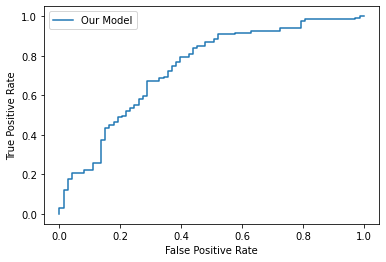

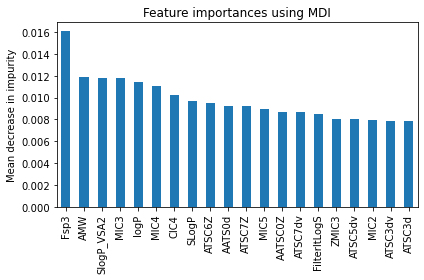

2
Best Threshold=0.689380
[[46 22]
 [62 74]]
              precision    recall  f1-score   support

           0       0.43      0.68      0.52        68
           1       0.77      0.54      0.64       136

    accuracy                           0.59       204
   macro avg       0.60      0.61      0.58       204
weighted avg       0.66      0.59      0.60       204

balanced_accuracy_score  0.6102941176470589
matthews_corrcoef  0.20833333333333334
Sensitivity 0.6764705882352942
Specificity 0.5441176470588235
f1 0.6379310344827587
LR+ 1.4838709677419355
ppv 0.7708333333333334
average_precision_score 0.7663150166414556
roc_auc_score 0.6620891003460208


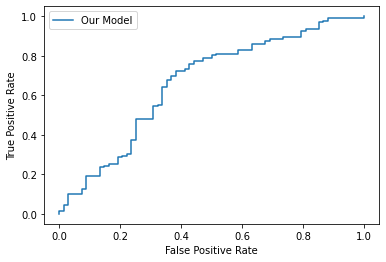

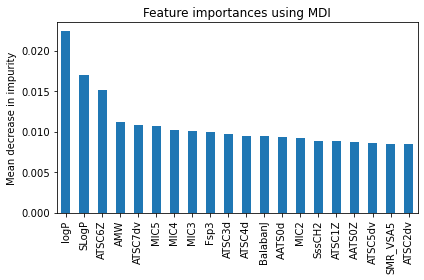

3
Best Threshold=0.661411
[[57 17]
 [49 81]]
              precision    recall  f1-score   support

           0       0.54      0.77      0.63        74
           1       0.83      0.62      0.71       130

    accuracy                           0.68       204
   macro avg       0.68      0.70      0.67       204
weighted avg       0.72      0.68      0.68       204

balanced_accuracy_score  0.6966735966735966
matthews_corrcoef  0.3785276610545915
Sensitivity 0.7702702702702703
Specificity 0.6230769230769231
f1 0.7105263157894738
LR+ 2.0435741864313295
ppv 0.826530612244898
average_precision_score 0.8105475082491342
roc_auc_score 0.7208939708939709


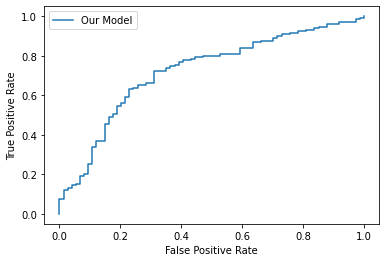

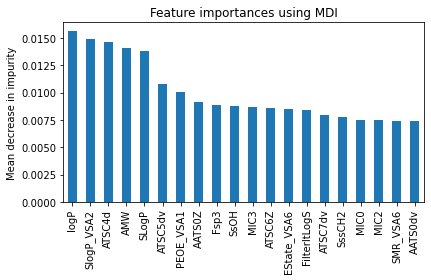

4
Best Threshold=0.601040
[[43 23]
 [52 86]]
              precision    recall  f1-score   support

           0       0.45      0.65      0.53        66
           1       0.79      0.62      0.70       138

    accuracy                           0.63       204
   macro avg       0.62      0.64      0.62       204
weighted avg       0.68      0.63      0.64       204

balanced_accuracy_score  0.6373517786561265
matthews_corrcoef  0.25763255632721666
Sensitivity 0.6515151515151515
Specificity 0.6231884057971014
f1 0.6963562753036437
LR+ 1.729020979020979
ppv 0.7889908256880734
average_precision_score 0.8130625253578381
roc_auc_score 0.6739130434782609


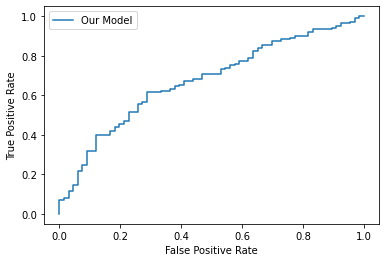

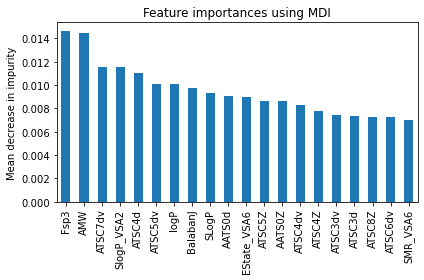

 82%|████████████████████████████████████        | 9/11 [07:43<01:44, 52.06s/it]

51
0
Best Threshold=0.657761
[[44 33]
 [41 86]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54        77
           1       0.72      0.68      0.70       127

    accuracy                           0.64       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.65      0.64      0.64       204

balanced_accuracy_score  0.62429696287964
matthews_corrcoef  0.24443016009829008
Sensitivity 0.5714285714285714
Specificity 0.6771653543307087
f1 0.6991869918699187
LR+ 1.770034843205575
ppv 0.7226890756302521
average_precision_score 0.7600155740911506
roc_auc_score 0.6718478372021679


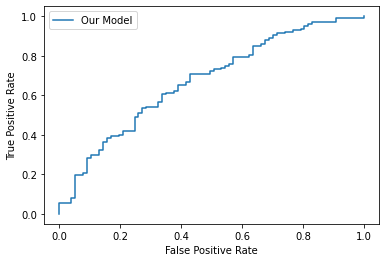

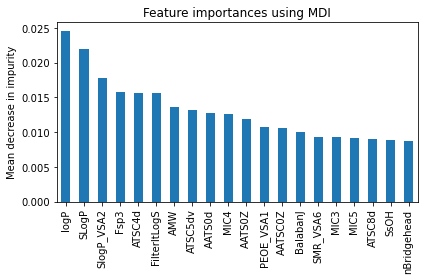

1
Best Threshold=0.585443
[[36 38]
 [32 98]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51        74
           1       0.72      0.75      0.74       130

    accuracy                           0.66       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.65      0.66      0.65       204

balanced_accuracy_score  0.6201663201663201
matthews_corrcoef  0.24511866530960078
Sensitivity 0.4864864864864865
Specificity 0.7538461538461538
f1 0.7368421052631577
LR+ 1.9763513513513513
ppv 0.7205882352941176
average_precision_score 0.7538751968298362
roc_auc_score 0.6622661122661123


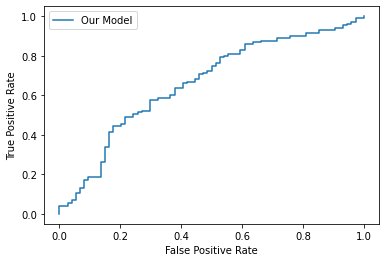

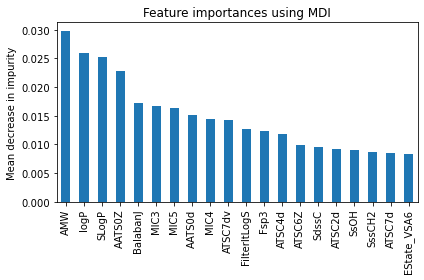

2
Best Threshold=0.624206
[[ 48  16]
 [ 35 105]]
              precision    recall  f1-score   support

           0       0.58      0.75      0.65        64
           1       0.87      0.75      0.80       140

    accuracy                           0.75       204
   macro avg       0.72      0.75      0.73       204
weighted avg       0.78      0.75      0.76       204

balanced_accuracy_score  0.75
matthews_corrcoef  0.47227208685956157
Sensitivity 0.75
Specificity 0.75
f1 0.8045977011494253
LR+ 3.0
ppv 0.8677685950413223
average_precision_score 0.8949618806323321
roc_auc_score 0.8


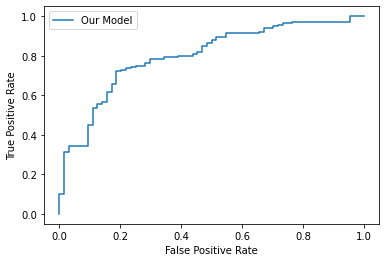

saving model


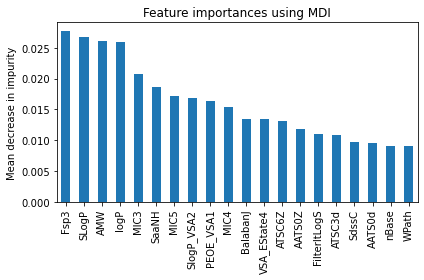

3
Best Threshold=0.615048
[[37 32]
 [39 96]]
              precision    recall  f1-score   support

           0       0.49      0.54      0.51        69
           1       0.75      0.71      0.73       135

    accuracy                           0.65       204
   macro avg       0.62      0.62      0.62       204
weighted avg       0.66      0.65      0.66       204

balanced_accuracy_score  0.6236714975845411
matthews_corrcoef  0.24203560832642065
Sensitivity 0.5362318840579711
Specificity 0.7111111111111111
f1 0.7300380228136881
LR+ 1.8561872909699
ppv 0.75
average_precision_score 0.7735917838693889
roc_auc_score 0.6611916264090176


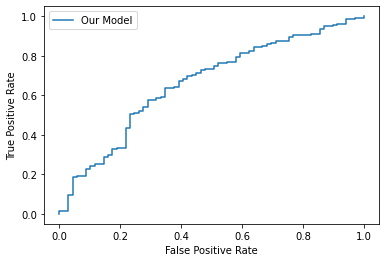

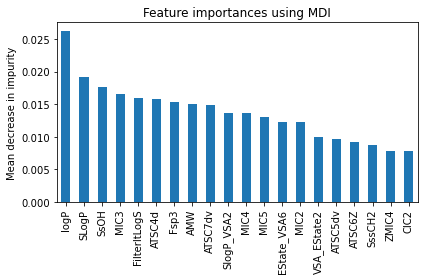

4
Best Threshold=0.671940
[[58 22]
 [48 76]]
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        80
           1       0.78      0.61      0.68       124

    accuracy                           0.66       204
   macro avg       0.66      0.67      0.65       204
weighted avg       0.69      0.66      0.66       204

balanced_accuracy_score  0.6689516129032258
matthews_corrcoef  0.3302039038348005
Sensitivity 0.725
Specificity 0.6129032258064516
f1 0.6846846846846848
LR+ 1.8729166666666666
ppv 0.7755102040816326
average_precision_score 0.7532157380320846
roc_auc_score 0.7047379032258065


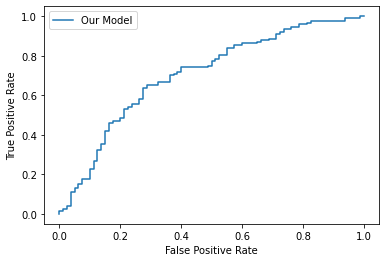

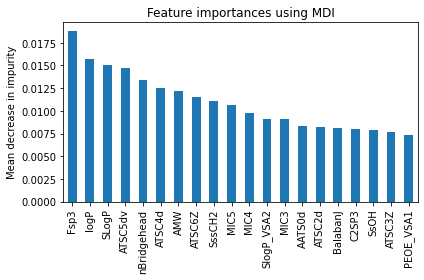

 91%|███████████████████████████████████████    | 10/11 [08:35<00:52, 52.15s/it]

52
0
Best Threshold=0.627725
[[43 23]
 [54 84]]
              precision    recall  f1-score   support

           0       0.44      0.65      0.53        66
           1       0.79      0.61      0.69       138

    accuracy                           0.62       204
   macro avg       0.61      0.63      0.61       204
weighted avg       0.67      0.62      0.63       204

balanced_accuracy_score  0.6301054018445322
matthews_corrcoef  0.24375811290499214
Sensitivity 0.6515151515151515
Specificity 0.6086956521739131
f1 0.6857142857142857
LR+ 1.664983164983165
ppv 0.7850467289719626
average_precision_score 0.832199392714603
roc_auc_score 0.7080588493631972


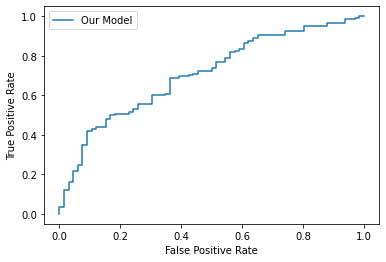

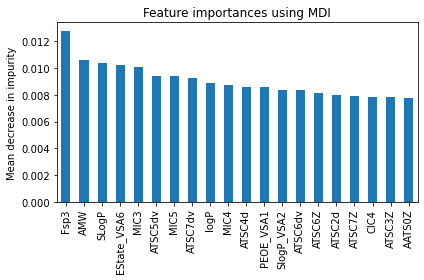

1
Best Threshold=0.581793
[[55 19]
 [50 80]]
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        74
           1       0.81      0.62      0.70       130

    accuracy                           0.66       204
   macro avg       0.67      0.68      0.66       204
weighted avg       0.70      0.66      0.67       204

balanced_accuracy_score  0.6793139293139293
matthews_corrcoef  0.3450001725001294
Sensitivity 0.7432432432432432
Specificity 0.6153846153846154
f1 0.6986899563318778
LR+ 1.9324324324324325
ppv 0.8080808080808081
average_precision_score 0.8424494710624981
roc_auc_score 0.7470893970893971


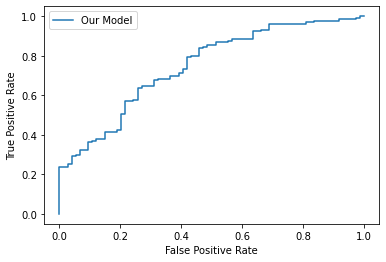

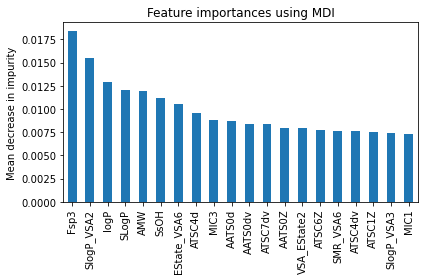

2
Best Threshold=0.577204
[[34 46]
 [27 97]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        80
           1       0.68      0.78      0.73       124

    accuracy                           0.64       204
   macro avg       0.62      0.60      0.60       204
weighted avg       0.63      0.64      0.63       204

balanced_accuracy_score  0.6036290322580645
matthews_corrcoef  0.22102140636368306
Sensitivity 0.425
Specificity 0.782258064516129
f1 0.7265917602996255
LR+ 1.9518518518518515
ppv 0.6783216783216783
average_precision_score 0.7146312608991129
roc_auc_score 0.6643649193548387


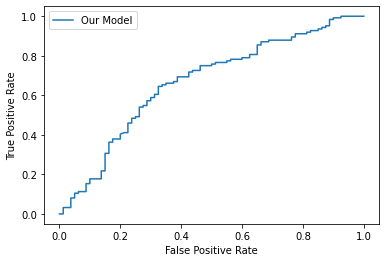

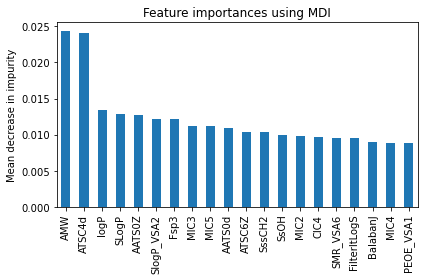

3
Best Threshold=0.667614
[[51 20]
 [58 75]]
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        71
           1       0.79      0.56      0.66       133

    accuracy                           0.62       204
   macro avg       0.63      0.64      0.61       204
weighted avg       0.68      0.62      0.63       204

balanced_accuracy_score  0.6411098167955099
matthews_corrcoef  0.2695052110179322
Sensitivity 0.7183098591549296
Specificity 0.5639097744360902
f1 0.6578947368421052
LR+ 1.647158814958718
ppv 0.7894736842105263
average_precision_score 0.8054958078247321
roc_auc_score 0.6939002435666632


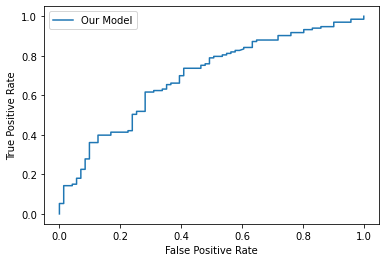

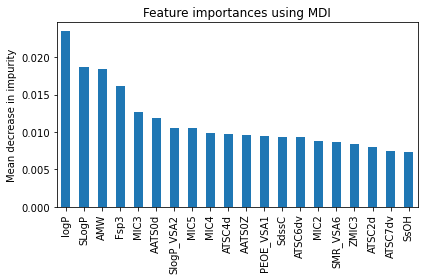

4
Best Threshold=0.664729
[[47 26]
 [32 99]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.62        73
           1       0.79      0.76      0.77       131

    accuracy                           0.72       204
   macro avg       0.69      0.70      0.70       204
weighted avg       0.72      0.72      0.72       204

balanced_accuracy_score  0.6997804036390254
matthews_corrcoef  0.3931980973477837
Sensitivity 0.6438356164383562
Specificity 0.7557251908396947
f1 0.7734375000000001
LR+ 2.635702054794521
ppv 0.792
average_precision_score 0.8152473260577666
roc_auc_score 0.7281710760221688


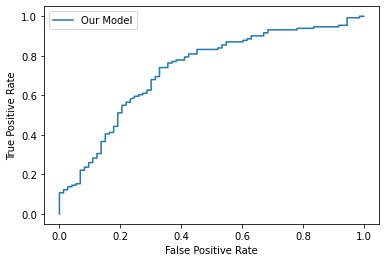

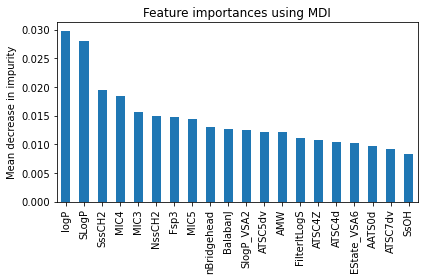

100%|███████████████████████████████████████████| 11/11 [09:27<00:00, 51.60s/it]


In [62]:
#Models to predict DILI with Physicochemical
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)


        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_NCV_bestMordredPC_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [63]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "MordredPC"
results.to_csv("NCV_models_MordredPC.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.672248  0.332608     0.693333     0.651163   
1   NCV  DILI  42      1  0.669118  0.322889     0.647059     0.691176   
2   NCV  DILI  42      2  0.671669  0.332013     0.710526     0.632812   
3   NCV  DILI  42      3  0.584249  0.165820     0.525641     0.642857   
4   NCV  DILI  42      4  0.631115  0.246890     0.641791     0.620438   
5   NCV  DILI  43      0  0.644426  0.261211     0.672414     0.616438   
6   NCV  DILI  43      1  0.700101  0.391783     0.696203     0.704000   
7   NCV  DILI  43      2  0.643992  0.276100     0.684932     0.603053   
8   NCV  DILI  43      3  0.614774  0.230725     0.769231     0.460317   
9   NCV  DILI  43      4  0.636308  0.263610     0.671053     0.601562   
10  NCV  DILI  44      0  0.618940  0.242084     0.506173     0.731707   
11  NCV  DILI  44      1  0.693265  0.368529     0.732394     0.654135   
12  NCV  DILI  44      2  0.612277  0.227584     0.453125     0.771429   
13  NCV  DILI  44      3  0.611412  0.218429     0.604938     0.617886   
14  NCV  DILI  44      4  0.659821  0.308908     0.597015     0.722628   
15  NCV  DILI  45      0  0.587474  0.173081     0.679012     0.495935   
16  NCV  DILI  45      1  0.694419  0.376126     0.706667     0.682171   
17  NCV  DILI  45      2  0.682287  0.360930     0.594203     0.770370   
18  NCV  DILI  45      3  0.634300  0.259185     0.579710     0.688889   
19  NCV  DILI  45      4  0.634328  0.272639     0.500000     0.768657   
20  NCV  DILI  46      0  0.648698  0.289669     0.602740     0.694656   
21  NCV  DILI  46      1  0.617152  0.253859     0.418919     0.815385   
22  NCV  DILI  46      2  0.647504  0.279626     0.724638     0.570370   
23  NCV  DILI  46      3  0.671856  0.344572     0.589744     0.753968   
24  NCV  DILI  46      4  0.588593  0.170089     0.542857     0.634328   
25  NCV  DILI  47      0  0.656133  0.300328     0.689189     0.623077   
26  NCV  DILI  47      1  0.638915  0.269216     0.626667     0.651163   
27  NCV  DILI  47      2  0.607792  0.198325     0.645161     0.570423   
28  NCV  DILI  47      3  0.674865  0.339650     0.688312     0.661417   
29  NCV  DILI  47      4  0.682155  0.352292     0.723684     0.640625   
30  NCV  DILI  48      0  0.610294  0.209427     0.588235     0.632353   
31  NCV  DILI  48      1  0.648962  0.292326     0.615385     0.682540   
32  NCV  DILI  48      2  0.628676  0.253079     0.529412     0.727941   
33  NCV  DILI  48      3  0.573028  0.138849     0.571429     0.574627   
34  NCV  DILI  48      4  0.687500  0.374190     0.625000     0.750000   
35  NCV  DILI  49      0  0.682636  0.362417     0.613333     0.751938   
36  NCV  DILI  49      1  0.583262  0.158125     0.614286     0.552239   
37  NCV  DILI  49      2  0.626812  0.237313     0.666667     0.586957   
38  NCV  DILI  49      3  0.686203  0.363068     0.769231     0.603175   
39  NCV  DILI  49      4  0.654574  0.298479     0.720000     0.589147   
40  NCV  DILI  50      0  0.690332  0.398176     0.554217     0.826446   
41  NCV  DILI  50      1  0.659939  0.307402     0.739726     0.580153   
42  NCV  DILI  50      2  0.610294  0.208333     0.676471     0.544118   
43  NCV  DILI  50      3  0.696674  0.378528     0.770270     0.623077   
44  NCV  DILI  50      4  0.637352  0.257633     0.651515     0.623188   
45  NCV  DILI  51      0  0.624297  0.244430     0.571429     0.677165   
46  NCV  DILI  51      1  0.620166  0.245119     0.486486     0.753846   
47  NCV  DILI  51      2  0.750000  0.472272     0.750000     0.750000   
48  NCV  DILI  51      3  0.623671  0.242036     0.536232     0.711111   
49  NCV  DILI  51      4  0.668952  0.330204     0.725000     0.612903   
50  NCV  DILI  52      0  0.630105  0.243758     0.651515     0.608696   
51  NCV  DILI  52      1  0.679314  0.345000     0.743243     0.615385   
52  NCV  DILI  52      2  0.603629  0.221021     0.425000     0.782258   
53  NCV 

In [64]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.646323   0.284957     0.634065     0.658581   
std     3.191424   1.427248   0.036621   0.071207     0.088495     0.080195   
min    42.000000   0.000000   0.573028   0.138849     0.418919     0.460317   
25%    44.000000   1.000000   0.619553   0.242060     0.583973     0.605935   
50%    47.000000   2.000000   0.643992   0.272639     0.645161     0.642857   
75%    50.000000   3.000000   0.673556   0.342111     0.701435     0.725284   
max    52.000000   4.000000   0.750000   0.472272     0.770270     0.826446   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.700746   0.704983   1.927397   0.766239                 0.793482  
std     0.042631   0.046526   0.385708   0.038167                 0.043984  
min     0.609382   0.574257   1.343358   0.678322                 0.678217  
25%     0.667113   0.674929   1.685434   0.747204                 0.766076  
50%     0.700448   0.705882   1.886644   0.774510                 0.801526  
75%     0.736741   0.738500   2.069406   0.788435                 0.821787  
max     0.800000   0.804598   3.193345   0.867769                 0.894962

In [65]:
loaded_rf = pickle.load(open("dili_NCV_bestMordredPC_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features=38, min_samples_leaf=11,
                       min_samples_split=9, n_estimators=600, n_jobs=40,
                       random_state=42)

Best Threshold=0.622396
[[ 61  30]
 [ 48 116]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        91
           1       0.79      0.71      0.75       164

    accuracy                           0.69       255
   macro avg       0.68      0.69      0.68       255
weighted avg       0.71      0.69      0.70       255

balanced_accuracy_score  0.688823371750201
matthews_corrcoef  0.3657115591208014
Sensitivity 0.6703296703296703
Specificity 0.7073170731707317
f1 0.7483870967741935
LR+ 2.2902930402930397
ppv 0.7945205479452054
average_precision_score 0.7971211186025481
roc_auc_score 0.7160278745644599


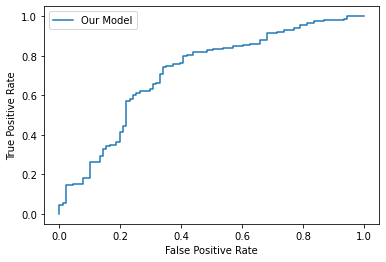

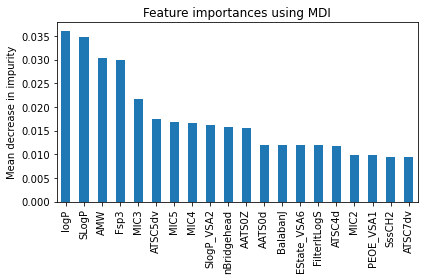

In [66]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)

print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [67]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMordredPC_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMordredPC_model.sav",  'wb'))